# **[1] Importing Modules and Reading data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import calendar
import time
import warnings
import re
import joblib
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/DoctorFeePrediction_Milestone2.csv')

# **[2] Data Exploration and EDA**

In [ ]:
data.head()

Doctor Name         City     Specialization  \
0   Dr. Umair Hafeez   GUJRANWALA     Ent Specialist   
1  Dr. Haris Shakeel    RAJAN-PUR  General Physician   
2    Dr. Iqra Rehman  MIRPUR-KHAS  General Physician   
3     Dr. Erum Memon    HYDERABAD       Gynecologist   
4    Dr. Aisha Ahmad       LAHORE      Dermatologist   

                                Doctor Qualification  Experience(Years)  \
0          MBBS , FCPS ( Otorhinolaryngologic ENT )                 6.0   
1                                               MBBS                1.0   
2      MBBS, RMP, CFP (USA), Certified in Covid 19 +                6.0   
3                MBBS, FCPS (Gynae &amp; Obstetrics)               11.0   
4  MBBS, FCPS (Dermatology), Certified (Aesthetic...               12.0   

   Total_Reviews  Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
0             11                              100                          19   
1              0                               94                          14   
2              9                              100                          10   
3             71                               96                          18   
4            199                              100                          16   

   Wait Time(mins)                             Hospital Address  \
0                6  Central Hospital, Jinnah Colony, Gujranwala   
1               11                         No Address Available   
2                0   Rehman Clinic, tandoadam naka, Mirpur Khas   
3               10       Mehmood Hospital, Qasimabad, Hyderabad   
4                2             Skinnovation, Johar Town, Lahore   

                                        Doctors Link   Fee Category  
0  https://www.marham.pk/doctors/gujranwala/ent-s...      Expensive  
1                                  No Link Available          Cheap  
2  https://www.marham.pk/doctors/mirpur-khas/gene...  Medium-Priced  
3  https://www.marham.pk/doctors/hyderabad/gyneco...          Cheap  
4  https://www.marham.pk/doctors/lahore/dermatolo...  Medium-Priced

In [ ]:
data.shape

(2386, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386 entries, 0 to 2385
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Doctor Name                      2386 non-null   object 
 1   City                             2386 non-null   object 
 2   Specialization                   2386 non-null   object 
 3   Doctor Qualification             2386 non-null   object 
 4   Experience(Years)                2386 non-null   float64
 5   Total_Reviews                    2386 non-null   int64  
 6   Patient Satisfaction Rate(%age)  2386 non-null   int64  
 7   Avg Time to Patients(mins)       2386 non-null   int64  
 8   Wait Time(mins)                  2386 non-null   int64  
 9   Hospital Address                 2386 non-null   object 
 10  Doctors Link                     2386 non-null   object 
 11  Fee Category                     2386 non-null   object 
dtypes: float64(1), int64

In [ ]:
data.describe()

Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
count        2386.000000    2386.000000                      2386.000000   
mean           11.844719      92.473177                        96.657586   
std             8.784449     282.162526                         4.962300   
min             1.000000       0.000000                        33.000000   
25%             6.000000       0.000000                        94.000000   
50%            10.000000       8.000000                        98.000000   
75%            14.000000      54.000000                       100.000000   
max            53.000000    5147.000000                       100.000000   

       Avg Time to Patients(mins)  Wait Time(mins)  
count                 2386.000000      2386.000000  
mean                    14.092205        11.264459  
std                      2.722198         5.636885  
min                      3.000000         0.000000  
25%                     14.000000        10.000000  
50%                     14.000000        11.000000  
75%                     15.000000        11.000000  
max                     50.000000        82.000000

In [ ]:
data.describe(include=['object'])

Doctor Name    City     Specialization Doctor Qualification  \
count                 2386    2386               2386                 2386   
unique                2190     117                150                 1041   
top     Dr. Muhammad Amjad  LAHORE  General Physician                 MBBS   
freq                     4     153                406                  332   

            Hospital Address       Doctors Link   Fee Category  
count                   2386               2386           2386  
unique                  1178               1606              3  
top     No Address Available  No Link Available  Medium-Priced  
freq                     554                645           1042

Getting the Total number of duplicated rows.

In [ ]:
data.duplicated().sum()

13

- The total number of duplicated rows in the dataset is **`[13]`**.


Checking that all duplicated rows are removed.


In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data.duplicated().sum()

0

- Duplicated rows have been dropped from the dataset to ensure data cleanliness and accuracy.


#### 2.1) Correct the inconsistent rows

Getting all the names that their occurrence more than one time.

In [ ]:
data[data['Doctor Name'].isin(data['Doctor Name'].value_counts()[data['Doctor Name'].value_counts() > 1].index)].sort_values(by='Doctor Name')

Doctor Name              City  \
1457                  Assoc. Prof. Dr. Fowad Shahzad            LAHORE   
1156                  Assoc. Prof. Dr. Fowad Shahzad        GUJRANWALA   
10                      Assoc. Prof. Dr. Irfan Munir        FAISALABAD   
1827                    Assoc. Prof. Dr. Irfan Munir        FAISALABAD   
20                   Assoc. Prof. Dr. Mudassar Nazar      BAHAWALNAGAR   
1440                 Assoc. Prof. Dr. Mudassar Nazar        BAHAWALPUR   
53                  Assoc. Prof. Dr. Muhammad Farooq            LAHORE   
2244                Assoc. Prof. Dr. Muhammad Farooq            LAHORE   
1232               Asst. Prof. Dr. Adil Hassan Chang           UMARKOT   
2000               Asst. Prof. Dr. Adil Hassan Chang         HYDERABAD   
2363                    Asst. Prof. Dr. Alamzeb Khan            QUETTA   
2198                    Asst. Prof. Dr. Alamzeb Khan            QUETTA   
1073                      Asst. Prof. Dr. Asif Malik        GUJRANWALA   
617                       Asst. Prof. Dr. Asif Malik        GUJRANWALA   
1197                     Asst. Prof. Dr. Bakht Jamal          PESHAWAR   
797                      Asst. Prof. Dr. Bakht Jamal         CHARSADDA   
248                      Asst. Prof. Dr. Fahad Nazir            LAHORE   
328                      Asst. Prof. Dr. Fahad Nazir        GUJRANWALA   
1858                   Asst. Prof. Dr. Hamayun Anwar          MANSEHRA   
400                    Asst. Prof. Dr. Hamayun Anwar          NOWSHERA   
2334           Asst. Prof. Dr. Hassaan Yousaf Bhutta          KHANEWAL   
170            Asst. Prof. Dr. Hassaan Yousaf Bhutta           SAHIWAL   
1881                     Asst. Prof. Dr. Imran Qadir        FAISALABAD   
1283                     Asst. Prof. Dr. Imran Qadir        FAISALABAD   
2049                  Asst. Prof. Dr. Junaid Mushtaq           SIALKOT   
1840                  Asst. Prof. Dr. Junaid Mushtaq            LAHORE   
777                         Asst. Prof. Dr. Mir Abid          PESHAWAR   
2178                        Asst. Prof. Dr. Mir Abid          PESHAWAR   
1450              Asst. Prof. Dr. Mubeen Ahmed Memon         HYDERABAD   
908               Asst. Prof. Dr. Mubeen Ahmed Memon         NAWABSHAH   
2320              Asst. Prof. Dr. Mubeen Ahmed Memon       MIRPUR-KHAS   
585               Asst. Prof. Dr. Muhammad Ali Usman        ABBOTTABAD   
1818              Asst. Prof. Dr. Muhammad Ali Usman          MANSEHRA   
900                Asst. Prof. Dr. Muhammad Basharat        ABBOTTABAD   
2065               Asst. Prof. Dr. Muhammad Basharat           HARIPUR   
1312                  Asst. Prof. Dr. Muhammad Kabir         TIMERGARA   
1890                  Asst. Prof. Dr. Muhammad Kabir          PESHAWAR   
2272                  Asst. Prof. Dr. Muhammad Sajid         CHISHTIAN   
478                   Asst. Prof. Dr. Muhammad Sajid        BAHAWALPUR   
2354                Asst. Prof. Dr. Muhammad Shahzad        ABBOTTABAD   
1254                Asst. Prof. Dr. Muhammad Shahzad        ABBOTTABAD   
384              Asst. Prof. Dr. Muhammad Waqas Khan            MULTAN   
1992             Asst. Prof. Dr. Muhammad Waqas Khan            MULTAN   
1888                   Asst. Prof. Dr. Mujahid Israr            GUJRAT   
2212                   Asst. Prof. Dr. Mujahid Israr            LAHORE   
1681                   Asst. Prof. Dr. Mujahid Israr            LAHORE   
217                    Asst. Prof. Dr. Mujahid Israr            GUJRAT   
689                     Asst. Prof. Dr. Nabeel Shafi        JAUHARABAD   
709                     Asst. Prof. Dr. Nabeel Shafi           KHUSHAB   
110                   Asst. Prof. Dr. Shoaib Manzoor          DUNYAPUR   
1623                  Asst. Prof. Dr. Shoaib Manzoor        BAHAWALPUR   
1473                  Asst. Prof. Dr. Shoaib Manzoor           LODHRAN   
13                        Asst. Prof. Dr. Tahir Khan            QUETTA   
904                       Asst. Prof. Dr. Tah

- Most of the values are duplicates but with wrong entires.

Filtering the dataset to retrieve entries with `Assoc. Prof. Dr. Fowad Shahzad` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Assoc. Prof. Dr. Fowad Shahzad')]

Doctor Name        City  \
1156  Assoc. Prof. Dr. Fowad Shahzad  GUJRANWALA   
1457  Assoc. Prof. Dr. Fowad Shahzad      LAHORE   

                                 Specialization  \
1156  Nephrologist, Nephrologist, Diabetologist   
1457  Nephrologist, Nephrologist, Diabetologist   

                                   Doctor Qualification  Experience(Years)  \
1156  American Diabetologist (Sugar Specialist), Nep...               18.0   
1457  American Diabetologist (Sugar Specialist), Nep...               18.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
1156             43                               82   
1457             43                               82   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1156                          14               11   
1457                          14               11   

                                       Hospital Address  \
1156         Siddique Family Clinic, Green Town, Lahore   
1457  Doctors Hospital Medical Center, johar town, L...   

                                           Doctors Link Fee Category  
1156  https://www.marham.pk/doctors/lahore/endocrino...    Expensive  
1457  https://www.marham.pk/doctors/lahore/endocrino...    Expensive

- The first entry has wrong Hospital address.

In [ ]:
data.drop([1156],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Assoc. Prof. Dr. Fowad Shahzad')]

Doctor Name    City  \
1457  Assoc. Prof. Dr. Fowad Shahzad  LAHORE   

                                 Specialization  \
1457  Nephrologist, Nephrologist, Diabetologist   

                                   Doctor Qualification  Experience(Years)  \
1457  American Diabetologist (Sugar Specialist), Nep...               18.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
1457             43                               82   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1457                          14               11   

                                       Hospital Address  \
1457  Doctors Hospital Medical Center, johar town, L...   

                                           Doctors Link Fee Category  
1457  https://www.marham.pk/doctors/lahore/endocrino...    Expensive

Filtering the dataset to retrieve entries with `Assoc. Prof. Dr. Irfan Munir` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Assoc. Prof. Dr. Irfan Munir')]

Doctor Name        City  \
10    Assoc. Prof. Dr. Irfan Munir  FAISALABAD   
1827  Assoc. Prof. Dr. Irfan Munir  FAISALABAD   

                          Specialization  \
10    Urologist, Sexologist, Andrologist   
1827  Urologist, Sexologist, Andrologist   

                            Doctor Qualification  Experience(Years)  \
10    MBBS, FCPS, Associate Professor of Urology                8.0   
1827  MBBS, FCPS, Associate Professor of Urology                8.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
10               94                              100   
1827             94                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
10                            14               11   
1827                          14                8   

                                      Hospital Address  \
10    Saad Medical Complex, Peoples Colony, Faisalabad   
1827  Saad Medical Complex, Peoples Colony, Faisalabad   

                                           Doctors Link Fee Category  
10    https://www.marham.pk/doctors/faisalabad/urolo...    Expensive  
1827  https://www.marham.pk/doctors/faisalabad/urolo...    Expensive

- The Wait time are different


Replacing one of the entries with the mean of both values,then dropping the other.

In [ ]:
data.at[10,'Wait Time(mins)'] = int((data.at[10,'Wait Time(mins)']+data.at[1827,'Wait Time(mins)'])/2)
data.drop([1827],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Assoc. Prof. Dr. Irfan Munir')]

Doctor Name        City  \
10  Assoc. Prof. Dr. Irfan Munir  FAISALABAD   

                        Specialization  \
10  Urologist, Sexologist, Andrologist   

                          Doctor Qualification  Experience(Years)  \
10  MBBS, FCPS, Associate Professor of Urology                8.0   

    Total_Reviews  Patient Satisfaction Rate(%age)  \
10             94                              100   

    Avg Time to Patients(mins)  Wait Time(mins)  \
10                          14                9   

                                    Hospital Address  \
10  Saad Medical Complex, Peoples Colony, Faisalabad   

                                         Doctors Link Fee Category  
10  https://www.marham.pk/doctors/faisalabad/urolo...    Expensive

Filtering the dataset to retrieve entries with `Assoc. Prof. Dr. Mudassar Nazar` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Assoc. Prof. Dr. Mudassar Nazar')]

Doctor Name          City      Specialization  \
20    Assoc. Prof. Dr. Mudassar Nazar  BAHAWALNAGAR  Orthopedic Surgeon   
1440  Assoc. Prof. Dr. Mudassar Nazar    BAHAWALPUR  Orthopedic Surgeon   

                                   Doctor Qualification  Experience(Years)  \
20    MBBS, FCPS Trauma &amp; Orthopaedics, FRCS Tra...               12.0   
1440  MBBS, FCPS Trauma &amp; Orthopaedics, FRCS Tra...               12.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
20               10                              100   
1440             10                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
20                            14                9   
1440                          14                9   

                                       Hospital Address  \
20    Life Care Medical Complex, wuqla colony, Bahaw...   
1440  Life Care Medical Complex, wuqla colony, Bahaw...   

                                           Doctors Link   Fee Category  
20    https://www.marham.pk/doctors/bahawalpur/ortho...  Medium-Priced  
1440  https://www.marham.pk/doctors/bahawalpur/ortho...  Medium-Priced

In [ ]:
data.at[20,'Hospital Address'],data.at[1440,'Hospital Address']

('Life Care Medical Complex, wuqla colony, Bahawalnagar',
 'Life Care Medical Complex, wuqla colony, Bahawalnagar')

- the second entry has wrong city.

In [ ]:
data.drop([1440],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Assoc. Prof. Dr. Mudassar Nazar')]

Doctor Name          City      Specialization  \
20  Assoc. Prof. Dr. Mudassar Nazar  BAHAWALNAGAR  Orthopedic Surgeon   

                                 Doctor Qualification  Experience(Years)  \
20  MBBS, FCPS Trauma &amp; Orthopaedics, FRCS Tra...               12.0   

    Total_Reviews  Patient Satisfaction Rate(%age)  \
20             10                              100   

    Avg Time to Patients(mins)  Wait Time(mins)  \
20                          14                9   

                                     Hospital Address  \
20  Life Care Medical Complex, wuqla colony, Bahaw...   

                                         Doctors Link   Fee Category  
20  https://www.marham.pk/doctors/bahawalpur/ortho...  Medium-Priced

Filtering the dataset to retrieve entries with `Assoc. Prof. Dr. Muhammad Farooq	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Assoc. Prof. Dr. Muhammad Farooq')]

Doctor Name    City  \
53    Assoc. Prof. Dr. Muhammad Farooq  LAHORE   
2244  Assoc. Prof. Dr. Muhammad Farooq  LAHORE   

                          Specialization  \
53    Urologist, Sexologist, Andrologist   
2244  Urologist, Sexologist, Andrologist   

                      Doctor Qualification  Experience(Years)  Total_Reviews  \
53    MBBS, FCPS (Urology), FCPS (Surgery)               40.0           2904   
2244  MBBS, FCPS (Urology), FCPS (Surgery)               40.0           2904   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
53                                 98                          14   
2244                               98                          12   

      Wait Time(mins)                          Hospital Address  \
53                 11  Farooq Urology Clinic, Samanabad, Lahore   
2244                7  Punjab Medical Center, Jail Road, Lahore   

                                           Doctors Link   Fee Category  
53    https://www.marham.pk/doctors/lahore/urologist...  Medium-Priced  
2244  https://www.marham.pk/doctors/lahore/urologist...  Medium-Priced

- He Has two Clincs.

Filtering the dataset to retrieve entries with `Asst. Prof. Dr. Adil Hassan Chang` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Adil Hassan Chang')]

Doctor Name       City      Specialization  \
1232  Asst. Prof. Dr. Adil Hassan Chang    UMARKOT  Gastroenterologist   
2000  Asst. Prof. Dr. Adil Hassan Chang  HYDERABAD  Gastroenterologist   

               Doctor Qualification  Experience(Years)  Total_Reviews  \
1232  MBBS, FCPS (Gastroenterology)                8.0             57   
2000  MBBS, FCPS (Gastroenterology)                8.0             57   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1232                              100                          15   
2000                              100                          15   

      Wait Time(mins)                                   Hospital Address  \
1232               12  Royal luxuria Advance mri and diagnostic cente...   
2000               12  Royal luxuria Advance mri and diagnostic cente...   

                                           Doctors Link   Fee Category  
1232  https://www.marham.pk/doctors/hyderabad/gastro...  Medium-Priced  
2000  https://www.marham.pk/doctors/hyderabad/gastro...  Medium-Priced

In [ ]:
data.at[1232,'Hospital Address'],data.at[2000,'Hospital Address']

('Royal luxuria Advance mri and diagnostic center, Sindh, Hyderabad',
 'Royal luxuria Advance mri and diagnostic center, Sindh, Hyderabad')

- First entry has wrong city.

In [ ]:
data.drop([1232],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Adil Hassan Chang')]

Doctor Name       City      Specialization  \
2000  Asst. Prof. Dr. Adil Hassan Chang  HYDERABAD  Gastroenterologist   

               Doctor Qualification  Experience(Years)  Total_Reviews  \
2000  MBBS, FCPS (Gastroenterology)                8.0             57   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
2000                              100                          15   

      Wait Time(mins)                                   Hospital Address  \
2000               12  Royal luxuria Advance mri and diagnostic cente...   

                                           Doctors Link   Fee Category  
2000  https://www.marham.pk/doctors/hyderabad/gastro...  Medium-Priced

Filtering the dataset to retrieve entries with `Asst. Prof. Dr. Alamzeb Khan` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Alamzeb Khan')]

Doctor Name    City              Specialization  \
2198  Asst. Prof. Dr. Alamzeb Khan  QUETTA  Neuro Surgeon, Neurologist   
2363  Asst. Prof. Dr. Alamzeb Khan  QUETTA  Neuro Surgeon, Neurologist   

                                   Doctor Qualification  Experience(Years)  \
2198  M.B.B.S, F.C.P.S, (Neuro Surgery) I.T.F(United...                9.0   
2363  M.B.B.S, F.C.P.S, (Neuro Surgery) I.T.F(United...                9.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
2198             35                               97   
2363             35                               97   

      Avg Time to Patients(mins)  Wait Time(mins)  \
2198                          14                7   
2363                          13               12   

                                       Hospital Address  \
2198  City International Hospital, Zarghon Road, Quetta   
2363  City International Hospital, Zarghon Road, Quetta   

                                           Doctors Link   Fee Category  
2198  https://www.marham.pk/doctors/quetta/neuro-sur...  Medium-Priced  
2363  https://www.marham.pk/doctors/quetta/neuro-sur...  Medium-Priced

- The wait time is inconsistent.

In [ ]:
data.at[2363,'Wait Time(mins)']=int((data.at[2363,'Wait Time(mins)']+data.at[2198,'Wait Time(mins)'])/2)
data.drop([2198],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Alamzeb Khan')]

Doctor Name    City              Specialization  \
2363  Asst. Prof. Dr. Alamzeb Khan  QUETTA  Neuro Surgeon, Neurologist   

                                   Doctor Qualification  Experience(Years)  \
2363  M.B.B.S, F.C.P.S, (Neuro Surgery) I.T.F(United...                9.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
2363             35                               97   

      Avg Time to Patients(mins)  Wait Time(mins)  \
2363                          13                9   

                                       Hospital Address  \
2363  City International Hospital, Zarghon Road, Quetta   

                                           Doctors Link   Fee Category  
2363  https://www.marham.pk/doctors/quetta/neuro-sur...  Medium-Priced

Filtering the dataset to retrieve entries with `Asst. Prof. Dr. Asif Malik` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Asif Malik')]

Doctor Name        City  \
617   Asst. Prof. Dr. Asif Malik  GUJRANWALA   
1073  Asst. Prof. Dr. Asif Malik  GUJRANWALA   

                          Specialization Doctor Qualification  \
617   Urologist, Sexologist, Andrologist   MBBS, MS (Urology)   
1073  Urologist, Sexologist, Andrologist   MBBS, MS (Urology)   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
617                12.0            213                               99   
1073               12.0            213                               99   

      Avg Time to Patients(mins)  Wait Time(mins)  \
617                           16               11   
1073                          14               11   

                                       Hospital Address  \
617   Muhammad Ali Family Hospital, Satellite Town, ...   
1073  Muhammad Ali Family Hospital, Satellite Town, ...   

                                           Doctors Link Fee Category  
617   https://www.marham.pk/doctors/gujranwala/urolo...    Expensive  
1073  https://www.marham.pk/doctors/gujranwala/urolo...    Expensive

- The Avg Time to Patients(mins) are inconsistent.

In [ ]:
data.at[617,'Avg Time to Patients(mins)']=int((data.at[617,'Avg Time to Patients(mins)']+data.at[1073,'Avg Time to Patients(mins)'])/2)
data.drop([1073],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Asif Malik')]

Doctor Name        City  \
617  Asst. Prof. Dr. Asif Malik  GUJRANWALA   

                         Specialization Doctor Qualification  \
617  Urologist, Sexologist, Andrologist   MBBS, MS (Urology)   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
617               12.0            213                               99   

     Avg Time to Patients(mins)  Wait Time(mins)  \
617                          15               11   

                                      Hospital Address  \
617  Muhammad Ali Family Hospital, Satellite Town, ...   

                                          Doctors Link Fee Category  
617  https://www.marham.pk/doctors/gujranwala/urolo...    Expensive

Filtering the dataset to retrieve entries with `Asst. Prof. Dr. Bakht Jamal` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Bakht Jamal')]

Doctor Name       City Specialization  \
797   Asst. Prof. Dr. Bakht Jamal  CHARSADDA  Neuro Surgeon   
1197  Asst. Prof. Dr. Bakht Jamal   PESHAWAR  Neuro Surgeon   

            Doctor Qualification  Experience(Years)  Total_Reviews  \
797   MBBS, FCPS (Neuro Surgery)               14.0              0   
1197  MBBS, FCPS (Neuro Surgery)               14.0              0   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
797                                94                          14   
1197                               94                          14   

      Wait Time(mins)                               Hospital Address  \
797                11  Dr bakht jamal clinic, Mardan Road, Charsadda   
1197               11  Dr bakht jamal clinic, Mardan Road, Charsadda   

           Doctors Link Fee Category  
797   No Link Available    Expensive  
1197  No Link Available    Expensive

- The Second Entry has wrong city.

In [ ]:
data.drop([1197],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Bakht Jamal')]

Doctor Name       City Specialization  \
797  Asst. Prof. Dr. Bakht Jamal  CHARSADDA  Neuro Surgeon   

           Doctor Qualification  Experience(Years)  Total_Reviews  \
797  MBBS, FCPS (Neuro Surgery)               14.0              0   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
797                               94                          14   

     Wait Time(mins)                               Hospital Address  \
797               11  Dr bakht jamal clinic, Mardan Road, Charsadda   

          Doctors Link Fee Category  
797  No Link Available    Expensive

Filtering the dataset to retrieve entries with `Asst. Prof. Dr. Fahad Nazir` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Fahad Nazir')]

Doctor Name        City      Specialization  \
248  Asst. Prof. Dr. Fahad Nazir      LAHORE  Orthopedic Surgeon   
328  Asst. Prof. Dr. Fahad Nazir  GUJRANWALA  Orthopedic Surgeon   

                            Doctor Qualification  Experience(Years)  \
248  MBBS, FCPS (Orthopedic Surgery), MRCS, FACS               11.0   
328  MBBS, FCPS (Orthopedic Surgery), MRCS, FACS               11.0   

     Total_Reviews  Patient Satisfaction Rate(%age)  \
248             64                              100   
328             64                              100   

     Avg Time to Patients(mins)  Wait Time(mins)  \
248                          15               16   
328                          13                7   

                                      Hospital Address  \
248  Iffat Anwar Medical Complex Hospital, Township...   
328  Punjab Medical Complex Hospital, People Colony...   

                                          Doctors Link Fee Category  
248  https://www.marham.pk/doctors/gujranwala/ortho...    Expensive  
328  https://www.marham.pk/doctors/lahore/orthopedi...    Expensive

In [ ]:
data.at[248,'Hospital Address'],data.at[328,'Hospital Address']

('Iffat Anwar Medical Complex Hospital, Township, Lahore',
 'Punjab Medical Complex Hospital, People Colony, Gujranwala')

- He Has two Clincs.

Filtering the dataset to retrieve entries with `Asst. Prof. Dr. Hamayun Anwar` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Hamayun Anwar')]

Doctor Name      City Specialization  \
400   Asst. Prof. Dr. Hamayun Anwar  NOWSHERA   Pediatrician   
1858  Asst. Prof. Dr. Hamayun Anwar  MANSEHRA   Pediatrician   

          Doctor Qualification  Experience(Years)  Total_Reviews  \
400   MBBS, FCPS (PAEDIATRICS)                3.0              3   
1858  MBBS, FCPS (PAEDIATRICS)                3.0              3   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
400                               100                          14   
1858                              100                          20   

      Wait Time(mins)                                Hospital Address  \
400                 8  Health Care Hospital, Grand Trunk Rd, Nowshera   
1858                6  Health Care Hospital, Grand Trunk Rd, Nowshera   

                                           Doctors Link   Fee Category  
400   https://www.marham.pk/doctors/nowshera/pediatr...  Medium-Priced  
1858  https://www.marham.pk/doctors/nowshera/pediatr...  Medium-Priced

- The second entry has wrong city.

In [ ]:
data.drop([1858],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Hamayun Anwar')]

Doctor Name      City Specialization  \
400  Asst. Prof. Dr. Hamayun Anwar  NOWSHERA   Pediatrician   

         Doctor Qualification  Experience(Years)  Total_Reviews  \
400  MBBS, FCPS (PAEDIATRICS)                3.0              3   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
400                              100                          14   

     Wait Time(mins)                                Hospital Address  \
400                8  Health Care Hospital, Grand Trunk Rd, Nowshera   

                                          Doctors Link   Fee Category  
400  https://www.marham.pk/doctors/nowshera/pediatr...  Medium-Priced

Filtering the dataset to retrieve entries with `Asst. Prof. Dr. Hassaan Yousaf Bhutta` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Hassaan Yousaf Bhutta')]

Doctor Name      City      Specialization  \
170   Asst. Prof. Dr. Hassaan Yousaf Bhutta   SAHIWAL  Gastroenterologist   
2334  Asst. Prof. Dr. Hassaan Yousaf Bhutta  KHANEWAL  Gastroenterologist   

               Doctor Qualification  Experience(Years)  Total_Reviews  \
170   MBBS, FCPS (Gastroenterology)               10.0             27   
2334  MBBS, FCPS (Gastroenterology)               10.0             27   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
170                               100                          14   
2334                              100                          14   

      Wait Time(mins)                                   Hospital Address  \
170                14  Wamiq Surgical Hospital, Fateh Sher Colony, Sa...   
2334               14  Wamiq Surgical Hospital, Fateh Sher Colony, Sa...   

                                           Doctors Link   Fee Category  
170   https://www.marham.pk/doctors/khanewal/gastroe...  Medium-Priced  
2334  https://www.marham.pk/doctors/khanewal/gastroe...  Medium-Priced

- The second entry has wrong city.


In [ ]:
data.drop([2334],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Hassaan Yousaf Bhutta')]

Doctor Name     City      Specialization  \
170  Asst. Prof. Dr. Hassaan Yousaf Bhutta  SAHIWAL  Gastroenterologist   

              Doctor Qualification  Experience(Years)  Total_Reviews  \
170  MBBS, FCPS (Gastroenterology)               10.0             27   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
170                              100                          14   

     Wait Time(mins)                                   Hospital Address  \
170               14  Wamiq Surgical Hospital, Fateh Sher Colony, Sa...   

                                          Doctors Link   Fee Category  
170  https://www.marham.pk/doctors/khanewal/gastroe...  Medium-Priced

Filtering the dataset to retrieve entries with `Asst. Prof. Dr. Imran Qadir` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Imran Qadir')]

Doctor Name        City  \
1283  Asst. Prof. Dr. Imran Qadir  FAISALABAD   
1881  Asst. Prof. Dr. Imran Qadir  FAISALABAD   

                                         Specialization Doctor Qualification  \
1283  Urologist, Sexologist, Andrologist, Pediatric ...       MBBS, MD, FCPS   
1881  Urologist, Sexologist, Andrologist, Pediatric ...       MBBS, MD, FCPS   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1283               15.0            437                               96   
1881               15.0            437                               96   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1283                          14               10   
1881                          14               11   

                                       Hospital Address  \
1283  Qadir Medical Complex, people colony no 2, Fai...   
1881  Qadir Medical Complex, people colony no 2, Fai...   

                                           Doctors Link Fee Category  
1283  https://www.marham.pk/doctors/faisalabad/urolo...    Expensive  
1881  https://www.marham.pk/doctors/faisalabad/urolo...    Expensive

In [ ]:
data.drop([1881],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Imran Qadir')]

Doctor Name        City  \
1283  Asst. Prof. Dr. Imran Qadir  FAISALABAD   

                                         Specialization Doctor Qualification  \
1283  Urologist, Sexologist, Andrologist, Pediatric ...       MBBS, MD, FCPS   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1283               15.0            437                               96   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1283                          14               10   

                                       Hospital Address  \
1283  Qadir Medical Complex, people colony no 2, Fai...   

                                           Doctors Link Fee Category  
1283  https://www.marham.pk/doctors/faisalabad/urolo...    Expensive

Filtering the dataset to retrieve entries with `Asst. Prof. Dr. Junaid Mushtaq	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Junaid Mushtaq')]

Doctor Name     City      Specialization  \
1840  Asst. Prof. Dr. Junaid Mushtaq   LAHORE  Gastroenterologist   
2049  Asst. Prof. Dr. Junaid Mushtaq  SIALKOT  Gastroenterologist   

              Doctor Qualification  Experience(Years)  Total_Reviews  \
1840  MBBS, FCPS (Gastroentrology)                8.0             29   
2049  MBBS, FCPS (Gastroentrology)                8.0             29   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1840                              100                          15   
2049                              100                          14   

      Wait Time(mins)                             Hospital Address  \
1840               18  Sharif Medical Complex, Masjidpura, Sialkot   
2049               11  Sharif Medical Complex, Masjidpura, Sialkot   

                                           Doctors Link   Fee Category  
1840  https://www.marham.pk/doctors/sialkot/gastroen...  Medium-Priced  
2049  https://www.marham.pk/doctors/sialkot/gastroen...  Medium-Priced

- The First entry has wrong city.

In [ ]:
data.drop([1840],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Junaid Mushtaq')]

Doctor Name     City      Specialization  \
2049  Asst. Prof. Dr. Junaid Mushtaq  SIALKOT  Gastroenterologist   

              Doctor Qualification  Experience(Years)  Total_Reviews  \
2049  MBBS, FCPS (Gastroentrology)                8.0             29   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
2049                              100                          14   

      Wait Time(mins)                             Hospital Address  \
2049               11  Sharif Medical Complex, Masjidpura, Sialkot   

                                           Doctors Link   Fee Category  
2049  https://www.marham.pk/doctors/sialkot/gastroen...  Medium-Priced

Filtering the dataset to retrieve entries with `Asst. Prof. Dr. Mir Abid` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Mir Abid')]

Doctor Name      City                      Specialization  \
777   Asst. Prof. Dr. Mir Abid  PESHAWAR  Urologist, Sexologist, Andrologist   
2178  Asst. Prof. Dr. Mir Abid  PESHAWAR  Urologist, Sexologist, Andrologist   

                                   Doctor Qualification  Experience(Years)  \
777   MBBS, MCPS (Surgery), FCPS (Urology), CRSM (Se...                6.0   
2178  MBBS, MCPS (Surgery), FCPS (Urology), CRSM (Se...                6.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
777             427                               95   
2178            427                               95   

      Avg Time to Patients(mins)  Wait Time(mins)  \
777                           14               11   
2178                          16               17   

                                       Hospital Address  \
777   Mohmand Medical Complex, Dabgari Garden, Peshawar   
2178  Mohmand Medical Complex, Dabgari Garden, Peshawar   

                                           Doctors Link Fee Category  
777   https://www.marham.pk/doctors/peshawar/urologi...    Expensive  
2178  https://www.marham.pk/doctors/peshawar/urologi...    Expensive

- it has inconsistent Avg Time to Patients and Wait Time.

In [ ]:
data.at[777,'Avg Time to Patients(mins)'] = int((data.at[777,'Avg Time to Patients(mins)']+data.at[2178,'Avg Time to Patients(mins)'])/2)
data.at[777,'Wait Time(mins)']=int((data.at[777,'Wait Time(mins)']+data.at[2178,'Wait Time(mins)'])/2)
data.drop([2178],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Mir Abid')]

Doctor Name      City                      Specialization  \
777  Asst. Prof. Dr. Mir Abid  PESHAWAR  Urologist, Sexologist, Andrologist   

                                  Doctor Qualification  Experience(Years)  \
777  MBBS, MCPS (Surgery), FCPS (Urology), CRSM (Se...                6.0   

     Total_Reviews  Patient Satisfaction Rate(%age)  \
777            427                               95   

     Avg Time to Patients(mins)  Wait Time(mins)  \
777                          15               14   

                                      Hospital Address  \
777  Mohmand Medical Complex, Dabgari Garden, Peshawar   

                                          Doctors Link Fee Category  
777  https://www.marham.pk/doctors/peshawar/urologi...    Expensive

Filtering the dataset to retrieve entries with `Asst. Prof. Dr. Mubeen Ahmed Memon` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Mubeen Ahmed Memon')]

Doctor Name         City  \
908   Asst. Prof. Dr. Mubeen Ahmed Memon    NAWABSHAH   
1450  Asst. Prof. Dr. Mubeen Ahmed Memon    HYDERABAD   
2320  Asst. Prof. Dr. Mubeen Ahmed Memon  MIRPUR-KHAS   

                       Specialization      Doctor Qualification  \
908   Pulmonologist / Lung Specialist  MBBS, FCPS (Pulmonology)   
1450  Pulmonologist / Lung Specialist  MBBS, FCPS (Pulmonology)   
2320  Pulmonologist / Lung Specialist  MBBS, FCPS (Pulmonology)   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
908                10.0             47                               98   
1450               10.0             47                               98   
2320               10.0             47                               98   

      Avg Time to Patients(mins)  Wait Time(mins)  \
908                           13               25   
1450                          13               25   
2320                          13               25   

                            Hospital Address  \
908   Indus Hospital, Ghareebabad, Nawabshah   
1450  Indus Hospital, Ghareebabad, Nawabshah   
2320  Indus Hospital, Ghareebabad, Nawabshah   

                                           Doctors Link   Fee Category  
908   https://www.marham.pk/doctors/hyderabad/pulmon...  Medium-Priced  
1450  https://www.marham.pk/doctors/hyderabad/pulmon...  Medium-Priced  
2320  https://www.marham.pk/doctors/hyderabad/pulmon...  Medium-Priced

- The Second and Third Entries has wrong city.

In [ ]:
data.drop([1450,2320],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Mubeen Ahmed Memon')]

Doctor Name       City  \
908  Asst. Prof. Dr. Mubeen Ahmed Memon  NAWABSHAH   

                      Specialization      Doctor Qualification  \
908  Pulmonologist / Lung Specialist  MBBS, FCPS (Pulmonology)   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
908               10.0             47                               98   

     Avg Time to Patients(mins)  Wait Time(mins)  \
908                          13               25   

                           Hospital Address  \
908  Indus Hospital, Ghareebabad, Nawabshah   

                                          Doctors Link   Fee Category  
908  https://www.marham.pk/doctors/hyderabad/pulmon...  Medium-Priced

Filtering the dataset to retrieve entries with `Asst. Prof. Dr. Muhammad Ali Usman` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Muhammad Ali Usman')]

Doctor Name        City      Specialization  \
585   Asst. Prof. Dr. Muhammad Ali Usman  ABBOTTABAD  Orthopedic Surgeon   
1818  Asst. Prof. Dr. Muhammad Ali Usman    MANSEHRA  Orthopedic Surgeon   

                       Doctor Qualification  Experience(Years)  Total_Reviews  \
585   MD , Master of Surgery in Orthopedics               12.0             47   
1818  MD , Master of Surgery in Orthopedics               12.0             47   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
585                                98                          13   
1818                               98                          13   

      Wait Time(mins)                                   Hospital Address  \
585                14  Abbottabad International Medical Institute, N-...   
1818               14  Abbottabad International Medical Institute, N-...   

                                           Doctors Link   Fee Category  
585   https://www.marham.pk/doctors/mansehra/orthope...  Medium-Priced  
1818  https://www.marham.pk/doctors/mansehra/orthope...  Medium-Priced

In [ ]:
data.at[585,'Hospital Address'],data.at[1818,'Hospital Address']

('Abbottabad International Medical Institute, N-35 Abbottabad, Khyber, Abbottabad',
 'Abbottabad International Medical Institute, N-35 Abbottabad, Khyber, Abbottabad')

- The second entry is wrong

In [ ]:
data.drop([1818],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Muhammad Ali Usman')]

Doctor Name        City      Specialization  \
585  Asst. Prof. Dr. Muhammad Ali Usman  ABBOTTABAD  Orthopedic Surgeon   

                      Doctor Qualification  Experience(Years)  Total_Reviews  \
585  MD , Master of Surgery in Orthopedics               12.0             47   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
585                               98                          13   

     Wait Time(mins)                                   Hospital Address  \
585               14  Abbottabad International Medical Institute, N-...   

                                          Doctors Link   Fee Category  
585  https://www.marham.pk/doctors/mansehra/orthope...  Medium-Priced

Filtering the dataset to retrieve entries with `Asst. Prof. Dr. Muhammad Basharat` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Muhammad Basharat')]

Doctor Name        City      Specialization  \
900   Asst. Prof. Dr. Muhammad Basharat  ABBOTTABAD  Orthopedic Surgeon   
2065  Asst. Prof. Dr. Muhammad Basharat     HARIPUR  Orthopedic Surgeon   

                 Doctor Qualification  Experience(Years)  Total_Reviews  \
900   MBBS, FCPS (Orthopedic Surgeon)               10.0              4   
2065  MBBS, FCPS (Orthopedic Surgeon)               10.0              4   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
900                               100                          15   
2065                              100                          15   

      Wait Time(mins)                                Hospital Address  \
900                13  Yahya Hospital Haripur, Abbottabad Rd, Haripur   
2065               13  Yahya Hospital Haripur, Abbottabad Rd, Haripur   

                                           Doctors Link   Fee Category  
900   https://www.marham.pk/doctors/abbottabad/ortho...  Medium-Priced  
2065  https://www.marham.pk/doctors/abbottabad/ortho...  Medium-Priced

- The first entry is wrong.

In [ ]:
data.drop([900],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Muhammad Basharat')]

Doctor Name     City      Specialization  \
2065  Asst. Prof. Dr. Muhammad Basharat  HARIPUR  Orthopedic Surgeon   

                 Doctor Qualification  Experience(Years)  Total_Reviews  \
2065  MBBS, FCPS (Orthopedic Surgeon)               10.0              4   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
2065                              100                          15   

      Wait Time(mins)                                Hospital Address  \
2065               13  Yahya Hospital Haripur, Abbottabad Rd, Haripur   

                                           Doctors Link   Fee Category  
2065  https://www.marham.pk/doctors/abbottabad/ortho...  Medium-Priced

Filtering the dataset to retrieve entries with `Asst. Prof. Dr. Muhammad Kabir` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Muhammad Kabir')]

Doctor Name       City      Specialization  \
1312  Asst. Prof. Dr. Muhammad Kabir  TIMERGARA  Gastroenterologist   
1890  Asst. Prof. Dr. Muhammad Kabir   PESHAWAR  Gastroenterologist   

               Doctor Qualification  Experience(Years)  Total_Reviews  \
1312  MBBS, FCPS (Gastroenterology)               10.0              3   
1890  MBBS, FCPS (Gastroenterology)               10.0              3   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1312                               57                          20   
1890                               57                          20   

      Wait Time(mins)                                   Hospital Address  \
1312                7  Al Sehat Medical Complex (Timergara), Opposite...   
1890                7  Al Sehat Medical Complex (Timergara), Opposite...   

                                           Doctors Link   Fee Category  
1312  https://www.marham.pk/doctors/timergara/gastro...  Medium-Priced  
1890  https://www.marham.pk/doctors/timergara/gastro...  Medium-Priced

- The second entry is wrong

In [ ]:
data.drop([1890],inplace=True)

Filtering the dataset to retrieve entries with `Asst. Prof. Dr. Muhammad Sajid	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Muhammad Sajid')]

Doctor Name        City Specialization  \
478   Asst. Prof. Dr. Muhammad Sajid  BAHAWALPUR   Pediatrician   
2272  Asst. Prof. Dr. Muhammad Sajid   CHISHTIAN   Pediatrician   

                                Doctor Qualification  Experience(Years)  \
478   MBBS, FCPS (Paeds), MRCP (Ireland), FACP (USA)               12.0   
2272  MBBS, FCPS (Paeds), MRCP (Ireland), FACP (USA)               12.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
478             117                               99   
2272            117                               99   

      Avg Time to Patients(mins)  Wait Time(mins)  \
478                           17                9   
2272                          17                9   

                                       Hospital Address  \
478   Jinnah Medical Hall, Main Bahwalnagar Road, Ch...   
2272  Jinnah Medical Hall, Main Bahwalnagar Road, Ch...   

                                           Doctors Link Fee Category  
478   https://www.marham.pk/doctors/bahawalpur/pedia...        Cheap  
2272  https://www.marham.pk/doctors/bahawalpur/pedia...        Cheap

- the first entry is wrong.

In [ ]:
data.drop([478],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Muhammad Sajid')]

Doctor Name       City Specialization  \
2272  Asst. Prof. Dr. Muhammad Sajid  CHISHTIAN   Pediatrician   

                                Doctor Qualification  Experience(Years)  \
2272  MBBS, FCPS (Paeds), MRCP (Ireland), FACP (USA)               12.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
2272            117                               99   

      Avg Time to Patients(mins)  Wait Time(mins)  \
2272                          17                9   

                                       Hospital Address  \
2272  Jinnah Medical Hall, Main Bahwalnagar Road, Ch...   

                                           Doctors Link Fee Category  
2272  https://www.marham.pk/doctors/bahawalpur/pedia...        Cheap

Filtering the dataset to retrieve entries with `Asst. Prof. Dr. Muhammad Shahzad` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Muhammad Shahzad')]

Doctor Name        City  \
1254  Asst. Prof. Dr. Muhammad Shahzad  ABBOTTABAD   
2354  Asst. Prof. Dr. Muhammad Shahzad  ABBOTTABAD   

                          Specialization     Doctor Qualification  \
1254  Urologist, Sexologist, Andrologist   MBBS , FCPS (Urology)    
2354  Urologist, Sexologist, Andrologist   MBBS , FCPS (Urology)    

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1254               17.0            365                               98   
2354               17.0            365                               98   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1254                          15                8   
2354                          14               11   

                                   Hospital Address  \
1254  Shafiq Medical Centre, Abbottabad, Abbottabad   
2354  Shafiq Medical Centre, Abbottabad, Abbottabad   

                                           Doctors Link   Fee Category  
1254  https://www.marham.pk/doctors/abbottabad/urolo...  Medium-Priced  
2354  https://www.marham.pk/doctors/abbottabad/urolo...  Medium-Priced

- It has inconsistent Avg Time to Patients and Wait Time.

In [ ]:
data.at[1254,'Avg Time to Patients(mins)']=int((data.at[1254,'Avg Time to Patients(mins)']+data.at[2354,'Avg Time to Patients(mins)'])/2)
data.at[1254,'Wait Time(mins)']=int((data.at[1254,'Wait Time(mins)']+data.at[2354,'Wait Time(mins)'])/2)
data.drop([2354],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Muhammad Shahzad')]

Doctor Name        City  \
1254  Asst. Prof. Dr. Muhammad Shahzad  ABBOTTABAD   

                          Specialization     Doctor Qualification  \
1254  Urologist, Sexologist, Andrologist   MBBS , FCPS (Urology)    

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1254               17.0            365                               98   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1254                          14                9   

                                   Hospital Address  \
1254  Shafiq Medical Centre, Abbottabad, Abbottabad   

                                           Doctors Link   Fee Category  
1254  https://www.marham.pk/doctors/abbottabad/urolo...  Medium-Priced

Filtering the dataset to retrieve entries with `Asst. Prof. Dr. Muhammad Waqas Khan` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Muhammad Waqas Khan')]

Doctor Name    City  \
384   Asst. Prof. Dr. Muhammad Waqas Khan  MULTAN   
1992  Asst. Prof. Dr. Muhammad Waqas Khan  MULTAN   

                                         Specialization  \
384   Urologist, General Surgeon, Sexologist, Androl...   
1992  Urologist, General Surgeon, Sexologist, Androl...   

                                   Doctor Qualification  Experience(Years)  \
384   MBBS, MCPS (General Surgery), FCPS (Urology), ...               14.0   
1992  MBBS, MCPS (General Surgery), FCPS (Urology), ...               14.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
384             751                               96   
1992            751                               96   

      Avg Time to Patients(mins)  Wait Time(mins)  \
384                           14                9   
1992                          14               11   

                                       Hospital Address  \
384   Ashraf Naseer Hospital, shah rukne alam colony...   
1992  Ashraf Naseer Hospital, shah rukne alam colony...   

                                           Doctors Link Fee Category  
384   https://www.marham.pk/doctors/multan/urologist...    Expensive  
1992  https://www.marham.pk/doctors/multan/urologist...    Expensive

- It has inconsistent Wait time.

In [ ]:
data.at[384,'Wait Time(mins)']=int((data.at[384,'Wait Time(mins)']+data.at[1992,'Wait Time(mins)'])/2)
data.drop([1992],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Muhammad Waqas Khan')]

Doctor Name    City  \
384  Asst. Prof. Dr. Muhammad Waqas Khan  MULTAN   

                                        Specialization  \
384  Urologist, General Surgeon, Sexologist, Androl...   

                                  Doctor Qualification  Experience(Years)  \
384  MBBS, MCPS (General Surgery), FCPS (Urology), ...               14.0   

     Total_Reviews  Patient Satisfaction Rate(%age)  \
384            751                               96   

     Avg Time to Patients(mins)  Wait Time(mins)  \
384                          14               10   

                                      Hospital Address  \
384  Ashraf Naseer Hospital, shah rukne alam colony...   

                                          Doctors Link Fee Category  
384  https://www.marham.pk/doctors/multan/urologist...    Expensive

Filtering the dataset to retrieve entries with `Asst. Prof. Dr. Mujahid Israr` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Mujahid Israr')]

Doctor Name    City  \
217   Asst. Prof. Dr. Mujahid Israr  GUJRAT   
1681  Asst. Prof. Dr. Mujahid Israr  LAHORE   
1888  Asst. Prof. Dr. Mujahid Israr  GUJRAT   
2212  Asst. Prof. Dr. Mujahid Israr  LAHORE   

                                         Specialization  \
217   Gastroenterologist, Liver Specialist, General ...   
1681  Gastroenterologist, Liver Specialist, General ...   
1888  Gastroenterologist, Liver Specialist, General ...   
2212  Gastroenterologist, Liver Specialist, General ...   

                                   Doctor Qualification  Experience(Years)  \
217   MBBS, FCPS (Gastroenterology), FCPS (Internal ...               15.0   
1681  MBBS, FCPS (Gastroenterology), FCPS (Internal ...               15.0   
1888  MBBS, FCPS (Gastroenterology), FCPS (Internal ...               15.0   
2212  MBBS, FCPS (Gastroenterology), FCPS (Internal ...               15.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
217            1215                               98   
1681           1215                               98   
1888           1215                               98   
2212           1215                               98   

      Avg Time to Patients(mins)  Wait Time(mins)  \
217                           14               16   
1681                          14               16   
1888                          14               11   
2212                          14               11   

                             Hospital Address  \
217   Ikram Hospital, Marghzar Colony, Gujrat   
1681  Ikram Hospital, Marghzar Colony, Gujrat   
1888  Ikram Hospital, Marghzar Colony, Gujrat   
2212  Ikram Hospital, Marghzar Colony, Gujrat   

                                           Doctors Link Fee Category  
217   https://www.marham.pk/doctors/lahore/gastroent...    Expensive  
1681  https://www.marham.pk/doctors/lahore/gastroent...    Expensive  
1888  https://www.marham.pk/doctors/lahore/gastroent...    Expensive  
2212  https://www.marham.pk/doctors/lahore/gastroent...    Expensive

- it looks like there is error with City entries as it doesn't match with the hospital address.

Dropping The inconsistent entries.

In [ ]:
data.at[217,'Wait Time(mins)']=int((data.iloc[217,8]+data.iloc[1888,8])/2)
data.drop([1888,1681,2212],axis=0,inplace=True)

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Mujahid Israr')]

Doctor Name    City  \
217  Asst. Prof. Dr. Mujahid Israr  GUJRAT   

                                        Specialization  \
217  Gastroenterologist, Liver Specialist, General ...   

                                  Doctor Qualification  Experience(Years)  \
217  MBBS, FCPS (Gastroenterology), FCPS (Internal ...               15.0   

     Total_Reviews  Patient Satisfaction Rate(%age)  \
217           1215                               98   

     Avg Time to Patients(mins)  Wait Time(mins)  \
217                          14               17   

                            Hospital Address  \
217  Ikram Hospital, Marghzar Colony, Gujrat   

                                          Doctors Link Fee Category  
217  https://www.marham.pk/doctors/lahore/gastroent...    Expensive

Filtering the dataset to retrieve entries with `Asst. Prof. Dr. Nabeel Shafi` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Nabeel Shafi')]

Doctor Name        City Specialization  \
689  Asst. Prof. Dr. Nabeel Shafi  JAUHARABAD      Urologist   
709  Asst. Prof. Dr. Nabeel Shafi     KHUSHAB      Urologist   

                  Doctor Qualification  Experience(Years)  Total_Reviews  \
689   MBBS , FCPS , BLS , ACLS , MHPE                13.0             97   
709   MBBS , FCPS , BLS , ACLS , MHPE                13.0             97   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
689                              100                          13   
709                              100                          13   

     Wait Time(mins)                    Hospital Address  \
689                6  Awan Hospital, Jauharabad, Khushab   
709                6  Awan Hospital, Jauharabad, Khushab   

                                          Doctors Link   Fee Category  
689  https://www.marham.pk/doctors/khushab/urologis...  Medium-Priced  
709  https://www.marham.pk/doctors/khushab/urologis...  Medium-Priced

- The First entry has wrong city.

In [ ]:
data.drop([689],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Nabeel Shafi')]

Doctor Name     City Specialization  \
709  Asst. Prof. Dr. Nabeel Shafi  KHUSHAB      Urologist   

                  Doctor Qualification  Experience(Years)  Total_Reviews  \
709   MBBS , FCPS , BLS , ACLS , MHPE                13.0             97   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
709                              100                          13   

     Wait Time(mins)                    Hospital Address  \
709                6  Awan Hospital, Jauharabad, Khushab   

                                          Doctors Link   Fee Category  
709  https://www.marham.pk/doctors/khushab/urologis...  Medium-Priced

Filtering the dataset to retrieve entries with `Asst. Prof. Dr. Shoaib Manzoor` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Shoaib Manzoor')]

Doctor Name        City Specialization  \
110   Asst. Prof. Dr. Shoaib Manzoor    DUNYAPUR   Nephrologist   
1473  Asst. Prof. Dr. Shoaib Manzoor     LODHRAN   Nephrologist   
1623  Asst. Prof. Dr. Shoaib Manzoor  BAHAWALPUR   Nephrologist   

     Doctor Qualification  Experience(Years)  Total_Reviews  \
110            MBBS, FCPS               11.0              6   
1473           MBBS, FCPS               11.0              6   
1623           MBBS, FCPS               11.0              6   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
110                               100                          18   
1473                              100                          18   
1623                              100                          18   

      Wait Time(mins)                                Hospital Address  \
110                 8  Manzoor Kidney Centrer, Railway Chowk, Lodhran   
1473                8  Manzoor Kidney Centrer, Railway Chowk, Lodhran   
1623                8  Manzoor Kidney Centrer, Railway Chowk, Lodhran   

                                           Doctors Link   Fee Category  
110   https://www.marham.pk/doctors/bahawalpur/nephr...  Medium-Priced  
1473  https://www.marham.pk/doctors/bahawalpur/nephr...  Medium-Priced  
1623  https://www.marham.pk/doctors/bahawalpur/nephr...  Medium-Priced

- The First and Third entries have wrong cities.

In [ ]:
data.drop([110,1623],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Shoaib Manzoor')]

Doctor Name     City Specialization  \
1473  Asst. Prof. Dr. Shoaib Manzoor  LODHRAN   Nephrologist   

     Doctor Qualification  Experience(Years)  Total_Reviews  \
1473           MBBS, FCPS               11.0              6   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1473                              100                          18   

      Wait Time(mins)                                Hospital Address  \
1473                8  Manzoor Kidney Centrer, Railway Chowk, Lodhran   

                                           Doctors Link   Fee Category  
1473  https://www.marham.pk/doctors/bahawalpur/nephr...  Medium-Priced

Filtering the dataset to retrieve entries with `Asst. Prof. Dr. Tahir Khan` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Tahir Khan')]

Doctor Name    City  \
13   Asst. Prof. Dr. Tahir Khan  QUETTA   
904  Asst. Prof. Dr. Tahir Khan  QUETTA   

                                        Specialization Doctor Qualification  \
13   Pulmonologist / Lung Specialist, General Physi...           MBBS, FCPS   
904  Pulmonologist / Lung Specialist, General Physi...           MBBS, FCPS   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
13                10.0            185                               98   
904               10.0            185                               98   

     Avg Time to Patients(mins)  Wait Time(mins)  \
13                           14               11   
904                          15               10   

                         Hospital Address  \
13   Yaseen Hospital, Quetta City, Quetta   
904  Yaseen Hospital, Quetta City, Quetta   

                                          Doctors Link   Fee Category  
13   https://www.marham.pk/doctors/quetta/pulmonolo...  Medium-Priced  
904  https://www.marham.pk/doctors/quetta/pulmonolo...  Medium-Priced

- it has inconsistent Avg Time to Patients and Wait Time.

In [ ]:
data.at[13,'Avg Time to Patients(mins)']=int((data.at[13,'Avg Time to Patients(mins)']+data.at[904,'Avg Time to Patients(mins)'])/2)
data.at[13,'Wait Time(mins)']=int((data.at[13,'Wait Time(mins)']+data.at[904,'Wait Time(mins)'])/2)
data.drop([904],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Tahir Khan')]

Doctor Name    City  \
13  Asst. Prof. Dr. Tahir Khan  QUETTA   

                                       Specialization Doctor Qualification  \
13  Pulmonologist / Lung Specialist, General Physi...           MBBS, FCPS   

    Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
13               10.0            185                               98   

    Avg Time to Patients(mins)  Wait Time(mins)  \
13                          14               10   

                        Hospital Address  \
13  Yaseen Hospital, Quetta City, Quetta   

                                         Doctors Link   Fee Category  
13  https://www.marham.pk/doctors/quetta/pulmonolo...  Medium-Priced

Filtering the dataset to retrieve entries with `Asst. Prof. Dr. Tarique Ali Sheikh` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Tarique Ali Sheikh')]

Doctor Name    City               Specialization  \
67   Asst. Prof. Dr. Tarique Ali Sheikh   KASUR  Ent Specialist, Ent Surgeon   
944  Asst. Prof. Dr. Tarique Ali Sheikh  LAHORE  Ent Specialist, Ent Surgeon   

    Doctor Qualification  Experience(Years)  Total_Reviews  \
67            MBBS, FCPS               15.0            346   
944           MBBS, FCPS               15.0            346   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
67                                98                          16   
944                               98                          16   

     Wait Time(mins)                                   Hospital Address  \
67                13  Sharif Medical Complex Hospital, Kasur City, K...   
944               13  Sharif Medical Complex Hospital, Kasur City, K...   

                                          Doctors Link Fee Category  
67   https://www.marham.pk/doctors/lahore/ent-speci...    Expensive  
944  https://www.marham.pk/doctors/lahore/ent-speci...    Expensive

- the second entry has wrong city.

In [ ]:
data.drop([944],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Asst. Prof. Dr. Tarique Ali Sheikh')]

Doctor Name   City               Specialization  \
67  Asst. Prof. Dr. Tarique Ali Sheikh  KASUR  Ent Specialist, Ent Surgeon   

   Doctor Qualification  Experience(Years)  Total_Reviews  \
67           MBBS, FCPS               15.0            346   

    Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
67                               98                          16   

    Wait Time(mins)                                   Hospital Address  \
67               13  Sharif Medical Complex Hospital, Kasur City, K...   

                                         Doctors Link Fee Category  
67  https://www.marham.pk/doctors/lahore/ent-speci...    Expensive

Filtering the dataset to retrieve entries with `Dr. Abdul Aziz` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Abdul Aziz')]

Doctor Name       City  \
547   Dr. Abdul Aziz     QUETTA   
2104  Dr. Abdul Aziz  ISLAMABAD   

                                         Specialization  \
547   Endocrinologist, General Physician, Diabetologist   
2104                                  General Physician   

                                   Doctor Qualification  Experience(Years)  \
547   MBBS(Gold Medalist), FCPS(Medicine), FCPS(Diab...                5.0   
2104                                               MBBS               29.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
547              10                              100   
2104             27                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
547                           14               11   
2104                          14               11   

                          Hospital Address  \
547   Yaseen Hospital, Quetta City, Quetta   
2104                  No Address Available   

                                           Doctors Link   Fee Category  
547   https://www.marham.pk/doctors/quetta/endocrino...  Medium-Priced  
2104  https://www.marham.pk/online-consultation/gene...  Medium-Priced

- They are two different doctors.

Filtering the dataset to retrieve entries with `Dr. Abdul Basit` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Abdul Basit')]

Doctor Name           City                   Specialization  \
658   Dr. Abdul Basit         MULTAN                     Pediatrician   
1328  Dr. Abdul Basit  MUZAFFAR-GARH  Pulmonologist / Lung Specialist   
2164  Dr. Abdul Basit      ISLAMABAD               Orthopedic Surgeon   

                              Doctor Qualification  Experience(Years)  \
658                        MBBS, FCPS (Pediatrics)               15.0   
1328                      MBBS, FCPS (Pulmonology)               13.0   
2164  MBBS , FCPS (Orthopedic &amp; Spine Surgery)               17.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
658               2                              100   
1328              1                              100   
2164             33                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
658                           13                1   
1328                          14               11   
2164                          15               10   

                                 Hospital Address  \
658     Haleema Hospital, Al Rahim Colony, Multan   
1328            Nishtar Clinics, 0, Muzaffar Garh   
2164  Islamabad Specialist Clinic, F-8, Islamabad   

                                           Doctors Link   Fee Category  
658   https://www.marham.pk/doctors/multan/pediatric...  Medium-Priced  
1328  https://www.marham.pk/doctors/muzaffar-garh/pu...  Medium-Priced  
2164  https://www.marham.pk/doctors/islamabad/orthop...      Expensive

- They are three different doctors.


Filtering the dataset to retrieve entries with `Dr. Abdul Ghaffar` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Abdul Ghaffar')]

Doctor Name    City                      Specialization  \
1601  Dr. Abdul Ghaffar  MULTAN  Urologist, Sexologist, Andrologist   
2148  Dr. Abdul Ghaffar  MULTAN  Urologist, Sexologist, Andrologist   

      Doctor Qualification  Experience(Years)  Total_Reviews  \
1601  MBBS, FCPS (Urology)               25.0            666   
2148  MBBS, FCPS (Urology)               25.0            666   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1601                               97                          14   
2148                               97                          15   

      Wait Time(mins)                            Hospital Address  \
1601               11  Punjab Hospital, New Multan Colony, Multan   
2148               18  Punjab Hospital, New Multan Colony, Multan   

                                           Doctors Link Fee Category  
1601  https://www.marham.pk/doctors/multan/urologist...    Expensive  
2148  https://www.marham.pk/doctors/multan/urologist...    Expensive

- it has inconsistent Avg Time to Patients and Wait Time.

In [ ]:
data.at[1601,'Avg Time to Patients(mins)']=int((data.at[1601,'Avg Time to Patients(mins)']+data.at[2148,'Avg Time to Patients(mins)'])/2)
data.at[1601,'Wait Time(mins)']=int((data.at[1601,'Wait Time(mins)']+data.at[2148,'Wait Time(mins)'])/2)
data.drop([2148],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Abdul Ghaffar')]

Doctor Name    City                      Specialization  \
1601  Dr. Abdul Ghaffar  MULTAN  Urologist, Sexologist, Andrologist   

      Doctor Qualification  Experience(Years)  Total_Reviews  \
1601  MBBS, FCPS (Urology)               25.0            666   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1601                               97                          14   

      Wait Time(mins)                            Hospital Address  \
1601               14  Punjab Hospital, New Multan Colony, Multan   

                                           Doctors Link Fee Category  
1601  https://www.marham.pk/doctors/multan/urologist...    Expensive

Filtering the dataset to retrieve entries with `Dr. Abdul Haseeb` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Abdul Haseeb')]

Doctor Name      City     Specialization Doctor Qualification  \
1203  Dr. Abdul Haseeb  LALAMUSA  General Physician                 MBBS   
2283  Dr. Abdul Haseeb    GUJRAT  General Physician                 MBBS   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1203                2.0              2                              100   
2283                2.0              2                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1203                          20               30   
2283                          14               11   

                           Hospital Address  \
1203  Sahara Hospital, Main Bazar, Lalamusa   
2283  Sahara Hospital, Main Bazar, Lalamusa   

                                           Doctors Link Fee Category  
1203  https://www.marham.pk/doctors/lalamusa/general...        Cheap  
2283  https://www.marham.pk/doctors/lalamusa/general...        Cheap

- it has inconsistent Avg Time to Patients and Wait Time and city.

In [ ]:
data.at[1203,'Avg Time to Patients(mins)']=int((data.at[1203,'Avg Time to Patients(mins)']+data.at[2283,'Avg Time to Patients(mins)'])/2)
data.at[1203,'Wait Time(mins)']=int((data.at[1203,'Wait Time(mins)']+data.at[2283,'Wait Time(mins)'])/2)
data.drop([2283],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Abdul Haseeb')]

Doctor Name      City     Specialization Doctor Qualification  \
1203  Dr. Abdul Haseeb  LALAMUSA  General Physician                 MBBS   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1203                2.0              2                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1203                          17               20   

                           Hospital Address  \
1203  Sahara Hospital, Main Bazar, Lalamusa   

                                           Doctors Link Fee Category  
1203  https://www.marham.pk/doctors/lalamusa/general...        Cheap

Filtering the dataset to retrieve entries with `Dr. Abdul Manan	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Abdul Manan')]

Doctor Name       City  Specialization Doctor Qualification  \
1933  Dr. Abdul Manan    SAHIWAL  Ent Specialist  MBBS, FCPS (Part 1)   
2349  Dr. Abdul Manan  HYDERABAD   Neuro Surgeon           MBBS, FCPS   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1933                2.0             16                              100   
2349               10.0              0                               94   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1933                          11                8   
2349                          14               11   

                                       Hospital Address  \
1933                               No Address Available   
2349  Isra University Hospital, Mirpur Khas Road, Hy...   

                                           Doctors Link Fee Category  
1933  https://www.marham.pk/online-consultation/ent-...        Cheap  
2349                                  No Link Available        Cheap

- They are two different doctors.

Filtering the dataset to retrieve entries with `Dr. Abdul Sattar Memon` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Abdul Sattar Memon')]

Doctor Name       City               Specialization  \
938   Dr. Abdul Sattar Memon  HYDERABAD           Gastroenterologist   
2084  Dr. Abdul Sattar Memon    KARACHI  Eye Surgeon, Eye Specialist   

     Doctor Qualification  Experience(Years)  Total_Reviews  \
938            MBBS, FCPS               25.0              0   
2084           MBBS, DOMS               32.0            257   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
938                                94                          14   
2084                               97                          15   

      Wait Time(mins)                                   Hospital Address  \
938                11  Advance Mri And Diagnostic Centre, Saddar, Hyd...   
2084                8      Taj medical complex Room 13, Karachi, Karachi   

                                           Doctors Link   Fee Category  
938                                   No Link Available  Medium-Priced  
2084  https://www.marham.pk/doctors/karachi/eye-surg...          Cheap

- They are two different doctors.

Filtering the dataset to retrieve entries with `Dr. Ahkardar` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Ahkardar')]

Doctor Name        City                      Specialization  \
867   Dr. Ahkardar  FAISALABAD  Urologist, Sexologist, Andrologist   
2011  Dr. Ahkardar  FAISALABAD  Urologist, Sexologist, Andrologist   

                                  Doctor Qualification  Experience(Years)  \
867   MBBS , FRCS (Glasgow) , Diploma Urology (London)               34.0   
2011  MBBS , FRCS (Glasgow) , Diploma Urology (London)               34.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
867             934                               98   
2011            934                               98   

      Avg Time to Patients(mins)  Wait Time(mins)  \
867                           16               13   
2011                          14               11   

                                       Hospital Address  \
867   Kardar Specialist Hospital, Jaranwala Road, Fa...   
2011  Kardar Specialist Hospital, Jaranwala Road, Fa...   

                                           Doctors Link Fee Category  
867   https://www.marham.pk/doctors/faisalabad/urolo...    Expensive  
2011  https://www.marham.pk/doctors/faisalabad/urolo...    Expensive

- it has inconsistent Avg Time to Patients and Wait Time.

In [ ]:
data.at[867,'Avg Time to Patients(mins)']=int((data.at[867,'Avg Time to Patients(mins)']+data.at[2011,'Avg Time to Patients(mins)'])/2)
data.at[867,'Wait Time(mins)']=int((data.at[867,'Wait Time(mins)']+data.at[2011,'Wait Time(mins)'])/2)
data.drop([2011],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Ahkardar')]

Doctor Name        City                      Specialization  \
867  Dr. Ahkardar  FAISALABAD  Urologist, Sexologist, Andrologist   

                                 Doctor Qualification  Experience(Years)  \
867  MBBS , FRCS (Glasgow) , Diploma Urology (London)               34.0   

     Total_Reviews  Patient Satisfaction Rate(%age)  \
867            934                               98   

     Avg Time to Patients(mins)  Wait Time(mins)  \
867                          15               12   

                                      Hospital Address  \
867  Kardar Specialist Hospital, Jaranwala Road, Fa...   

                                          Doctors Link Fee Category  
867  https://www.marham.pk/doctors/faisalabad/urolo...    Expensive

Filtering the dataset to retrieve entries with `Dr. Ahmad Bilal` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Ahmad Bilal')]

Doctor Name    City                      Specialization  \
1218  Dr. Ahmad Bilal  MULTAN  Urologist, Sexologist, Andrologist   
2294  Dr. Ahmad Bilal  MULTAN  Urologist, Sexologist, Andrologist   

        Doctor Qualification  Experience(Years)  Total_Reviews  \
1218  MBBS, FCPS ( Urology )               13.0             48   
2294  MBBS, FCPS ( Urology )               13.0             48   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1218                              100                          14   
2294                              100                          15   

      Wait Time(mins)                                  Hospital Address  \
1218               11  Gulgasht Hospital, North Gulgasht Colony, Multan   
2294                9  Gulgasht Hospital, North Gulgasht Colony, Multan   

                                           Doctors Link   Fee Category  
1218  https://www.marham.pk/doctors/multan/urologist...  Medium-Priced  
2294  https://www.marham.pk/doctors/multan/urologist...  Medium-Priced

- It has inconsistent Avg Time to Patients and Wait Time.

In [ ]:
data.at[1218,'Avg Time to Patients(mins)']=int((data.at[1218,'Avg Time to Patients(mins)']+data.at[2294,'Avg Time to Patients(mins)'])/2)
data.at[1218,'Wait Time(mins)']=int((data.at[1218,'Wait Time(mins)']+data.at[2294,'Wait Time(mins)'])/2)
data.drop([2294],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Ahmad Bilal')]

Doctor Name    City                      Specialization  \
1218  Dr. Ahmad Bilal  MULTAN  Urologist, Sexologist, Andrologist   

        Doctor Qualification  Experience(Years)  Total_Reviews  \
1218  MBBS, FCPS ( Urology )               13.0             48   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1218                              100                          14   

      Wait Time(mins)                                  Hospital Address  \
1218               10  Gulgasht Hospital, North Gulgasht Colony, Multan   

                                           Doctors Link   Fee Category  
1218  https://www.marham.pk/doctors/multan/urologist...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Akhtar Nawaz` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Akhtar Nawaz')]

Doctor Name      City                      Specialization  \
1812  Dr. Akhtar Nawaz  PESHAWAR  Urologist, Sexologist, Andrologist   
2136  Dr. Akhtar Nawaz  PESHAWAR  Urologist, Sexologist, Andrologist   

                                   Doctor Qualification  Experience(Years)  \
1812  MBBS, FCPS (Urology) FMAS (Fellowship in Minim...               14.0   
2136  MBBS, FCPS (Urology) FMAS (Fellowship in Minim...               14.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
1812            184                               98   
2136            184                               98   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1812                          15               17   
2136                          14               11   

                                       Hospital Address  \
1812  Institute Of Kidney Diseases, Hayatabad, Peshawar   
2136  Institute Of Kidney Diseases, Hayatabad, Peshawar   

                                           Doctors Link   Fee Category  
1812  https://www.marham.pk/doctors/peshawar/urologi...  Medium-Priced  
2136  https://www.marham.pk/doctors/peshawar/urologi...  Medium-Priced

- it has inconsistent Avg Time to Patients and Wait Time.

In [ ]:
data.at[1812,'Avg Time to Patients(mins)']=int((data.at[1812,'Avg Time to Patients(mins)']+data.at[2136,'Avg Time to Patients(mins)'])/2)
data.at[1812,'Wait Time(mins)']=int((data.at[1812,'Wait Time(mins)']+data.at[2136,'Wait Time(mins)'])/2)
data.drop([2136],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Akhtar Nawaz')]

Doctor Name      City                      Specialization  \
1812  Dr. Akhtar Nawaz  PESHAWAR  Urologist, Sexologist, Andrologist   

                                   Doctor Qualification  Experience(Years)  \
1812  MBBS, FCPS (Urology) FMAS (Fellowship in Minim...               14.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
1812            184                               98   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1812                          14               14   

                                       Hospital Address  \
1812  Institute Of Kidney Diseases, Hayatabad, Peshawar   

                                           Doctors Link   Fee Category  
1812  https://www.marham.pk/doctors/peshawar/urologi...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Ali Shandar Durrani	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Ali Shandar Durrani')]

Doctor Name        City                      Specialization  \
724   Dr. Ali Shandar Durrani  GUJRANWALA  Urologist, Sexologist, Andrologist   
1743  Dr. Ali Shandar Durrani  GUJRANWALA  Urologist, Sexologist, Andrologist   

       Doctor Qualification  Experience(Years)  Total_Reviews  \
724   MBBS , FCPS (Urology)               10.0             67   
1743  MBBS , FCPS (Urology)               10.0             67   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
724                                97                          12   
1743                               97                          14   

      Wait Time(mins)                            Hospital Address  \
724                13  Chatha Hospital, , Civil Lines, Gujranwala   
1743               11  Chatha Hospital, , Civil Lines, Gujranwala   

                                           Doctors Link Fee Category  
724   https://www.marham.pk/doctors/lahore/urologist...    Expensive  
1743  https://www.marham.pk/doctors/lahore/urologist...    Expensive

- it has inconsistent Avg Time to Patients and Wait Time.

In [ ]:
data.at[724,'Avg Time to Patients(mins)']=int((data.at[724,'Avg Time to Patients(mins)']+data.at[1743,'Avg Time to Patients(mins)'])/2)
data.at[724,'Wait Time(mins)']=int((data.at[724,'Wait Time(mins)']+data.at[1743,'Wait Time(mins)'])/2)
data.drop([1743],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Ali Shandar Durrani')]

Doctor Name        City                      Specialization  \
724  Dr. Ali Shandar Durrani  GUJRANWALA  Urologist, Sexologist, Andrologist   

      Doctor Qualification  Experience(Years)  Total_Reviews  \
724  MBBS , FCPS (Urology)               10.0             67   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
724                               97                          13   

     Wait Time(mins)                            Hospital Address  \
724               12  Chatha Hospital, , Civil Lines, Gujranwala   

                                          Doctors Link Fee Category  
724  https://www.marham.pk/doctors/lahore/urologist...    Expensive

Filtering the dataset to retrieve entries with `Dr. Ali Zain	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Ali Zain')]

Doctor Name        City     Specialization Doctor Qualification  \
672  Dr. Ali Zain   WAZIRABAD  General Physician                 MBBS   
772  Dr. Ali Zain  GUJRANWALA  General Physician                 MBBS   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
672                7.0              1                              100   
772                7.0              1                              100   

     Avg Time to Patients(mins)  Wait Time(mins)  \
672                          20                9   
772                          17               15   

                       Hospital Address  \
672  Batool family clinic, 0, Wazirabad   
772  Batool family clinic, 0, Wazirabad   

                                          Doctors Link Fee Category  
672  https://www.marham.pk/doctors/wazirabad/genera...        Cheap  
772  https://www.marham.pk/doctors/wazirabad/genera...        Cheap

- The Second entry has wrong city.

In [ ]:
data.drop([772],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Ali Zain')]

Doctor Name       City     Specialization Doctor Qualification  \
672  Dr. Ali Zain  WAZIRABAD  General Physician                 MBBS   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
672                7.0              1                              100   

     Avg Time to Patients(mins)  Wait Time(mins)  \
672                          20                9   

                       Hospital Address  \
672  Batool family clinic, 0, Wazirabad   

                                          Doctors Link Fee Category  
672  https://www.marham.pk/doctors/wazirabad/genera...        Cheap

Filtering the dataset to retrieve entries with `Dr. Amjad Mahmood` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Amjad Mahmood')]

Doctor Name         City     Specialization Doctor Qualification  \
567  Dr. Amjad Mahmood      MURIDKE  General Physician       MBBS, FCPS, MD   
758  Dr. Amjad Mahmood  CHICHAWATNI  General Physician       MBBS, FCPS, MD   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
567               22.0              4                               80   
758               22.0              4                               80   

     Avg Time to Patients(mins)  Wait Time(mins)  \
567                          14               11   
758                          14               11   

                       Hospital Address  \
567  Life Care Clinic, Muridke, Muridke   
758  Life Care Clinic, Muridke, Muridke   

                                          Doctors Link Fee Category  
567  https://www.marham.pk/doctors/sahiwal/general-...        Cheap  
758  https://www.marham.pk/doctors/sahiwal/general-...        Cheap

- The second entry has wrong city.

In [ ]:
data.drop([758],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Amjad Mahmood')]

Doctor Name     City     Specialization Doctor Qualification  \
567  Dr. Amjad Mahmood  MURIDKE  General Physician       MBBS, FCPS, MD   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
567               22.0              4                               80   

     Avg Time to Patients(mins)  Wait Time(mins)  \
567                          14               11   

                       Hospital Address  \
567  Life Care Clinic, Muridke, Muridke   

                                          Doctors Link Fee Category  
567  https://www.marham.pk/doctors/sahiwal/general-...        Cheap

Filtering the dataset to retrieve entries with `Dr. Ammar Yasir` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Ammar Yasir')]

Doctor Name    City Specialization    Doctor Qualification  \
1002  Dr. Ammar Yasir  LAHORE    Neurologist  MBBS, FCPS (Neurology)   
1905  Dr. Ammar Yasir   KASUR    Neurologist  MBBS, FCPS (Neurology)   
2040  Dr. Ammar Yasir   OKARA    Neurologist  MBBS, FCPS (Neurology)   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1002               10.0             21                              100   
1905               10.0             21                              100   
2040               10.0             21                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1002                          14               15   
1905                          14               15   
2040                          14               15   

                                Hospital Address  \
1002    IDC Jinnah Hospital, Faisal Town, Lahore   
1905  Allama Iqbal Hospital, DHQ hospital, Kasur   
2040  Allama Iqbal Hospital, DHQ hospital, Kasur   

                                           Doctors Link   Fee Category  
1002  https://www.marham.pk/doctors/kasur/neuro-phys...  Medium-Priced  
1905  https://www.marham.pk/doctors/lahore/neuro-phy...  Medium-Priced  
2040  https://www.marham.pk/doctors/lahore/neuro-phy...  Medium-Priced

- The third entry has wrong city

In [ ]:
data.drop([2040],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Ammar Yasir')]

Doctor Name    City Specialization    Doctor Qualification  \
1002  Dr. Ammar Yasir  LAHORE    Neurologist  MBBS, FCPS (Neurology)   
1905  Dr. Ammar Yasir   KASUR    Neurologist  MBBS, FCPS (Neurology)   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1002               10.0             21                              100   
1905               10.0             21                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1002                          14               15   
1905                          14               15   

                                Hospital Address  \
1002    IDC Jinnah Hospital, Faisal Town, Lahore   
1905  Allama Iqbal Hospital, DHQ hospital, Kasur   

                                           Doctors Link   Fee Category  
1002  https://www.marham.pk/doctors/kasur/neuro-phys...  Medium-Priced  
1905  https://www.marham.pk/doctors/lahore/neuro-phy...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Anwar Ul Haq` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Anwar Ul Haq')]

Doctor Name              City     Specialization  \
65   Dr. Anwar Ul Haq           SAHIWAL      Dermatologist   
368  Dr. Anwar Ul Haq  DERA-ISMAIL-KHAN  General Physician   

    Doctor Qualification  Experience(Years)  Total_Reviews  \
65             MBBS,MCPS               30.0              0   
368                 MBBS                6.0              0   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
65                                94                          14   
368                               94                          14   

     Wait Time(mins)                              Hospital Address  \
65                11  Skin Care Center, Fateh Sher Colony, Sahiwal   
368               11                          No Address Available   

          Doctors Link   Fee Category  
65   No Link Available  Medium-Priced  
368  No Link Available          Cheap

- They are different doctors.

Filtering the dataset to retrieve entries with `Dr. Areeba Rehman` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Areeba Rehman')]

Doctor Name        City     Specialization Doctor Qualification  \
705   Dr. Areeba Rehman     KARACHI  General Physician                 MBBS   
1268  Dr. Areeba Rehman  ABBOTTABAD  General Physician                 MBBS   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
705                 2.0            316                               95   
1268                2.0            316                               95   

      Avg Time to Patients(mins)  Wait Time(mins)  \
705                           34               69   
1268                          34               69   

                                       Hospital Address  \
705   Allied Specialist Clinics, , Manshera Road, Ab...   
1268  Allied Specialist Clinics, , Manshera Road, Ab...   

                                           Doctors Link Fee Category  
705   https://www.marham.pk/doctors/abbottabad/gener...        Cheap  
1268  https://www.marham.pk/doctors/abbottabad/gener...        Cheap

In [ ]:
data.at[705,'Hospital Address'],data.at[1268,'Hospital Address']

('Allied Specialist Clinics, , Manshera Road, Abbottabad, Abbottabad',
 'Allied Specialist Clinics, , Manshera Road, Abbottabad, Abbottabad')

- The first entry has wrong city.

In [ ]:
data.drop([705],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Areeba Rehman')]

Doctor Name        City     Specialization Doctor Qualification  \
1268  Dr. Areeba Rehman  ABBOTTABAD  General Physician                 MBBS   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1268                2.0            316                               95   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1268                          34               69   

                                       Hospital Address  \
1268  Allied Specialist Clinics, , Manshera Road, Ab...   

                                           Doctors Link Fee Category  
1268  https://www.marham.pk/doctors/abbottabad/gener...        Cheap

Filtering the dataset to retrieve entries with `Dr. Arshad Khan` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Arshad Khan')]

Doctor Name      City Specialization  \
1173  Dr. Arshad Khan     BANNU  Neuro Surgeon   
1213  Dr. Arshad Khan  PESHAWAR  Neuro Surgeon   

                                   Doctor Qualification  Experience(Years)  \
1173  MBBS, FCPS (Neuro Surgery), Master in Public H...                9.0   
1213  MBBS, FCPS (Neuro Surgery), Master in Public H...                9.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
1173              5                              100   
1213              5                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1173                           9               16   
1213                           9               16   

                                      Hospital Address  \
1173  Bukhari Medical and Surgical Complex, KPK, Bannu   
1213  Bukhari Medical and Surgical Complex, KPK, Bannu   

                                           Doctors Link Fee Category  
1173  https://www.marham.pk/doctors/peshawar/neuro-s...        Cheap  
1213  https://www.marham.pk/doctors/peshawar/neuro-s...        Cheap

- The second entry has wrong city.

In [ ]:
data.drop([1213],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Arshad Khan')]

Doctor Name   City Specialization  \
1173  Dr. Arshad Khan  BANNU  Neuro Surgeon   

                                   Doctor Qualification  Experience(Years)  \
1173  MBBS, FCPS (Neuro Surgery), Master in Public H...                9.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
1173              5                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1173                           9               16   

                                      Hospital Address  \
1173  Bukhari Medical and Surgical Complex, KPK, Bannu   

                                           Doctors Link Fee Category  
1173  https://www.marham.pk/doctors/peshawar/neuro-s...        Cheap

Filtering the dataset to retrieve entries with `Dr. Arslan Ali	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Arslan Ali')]

Doctor Name     City      Specialization  \
565   Dr. Arslan Ali    OKARA  Orthopedic Surgeon   
1380  Dr. Arslan Ali  SAHIWAL  Orthopedic Surgeon   

                 Doctor Qualification  Experience(Years)  Total_Reviews  \
565   MBBS, FCPS (Orthopedic Surgery)               13.0              8   
1380  MBBS, FCPS (Orthopedic Surgery)               13.0              8   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
565                               100                          11   
1380                              100                          11   

      Wait Time(mins)                                 Hospital Address  \
565                14  Saeed surgical complex, rehmatullah town, Okara   
1380               14  Saeed surgical complex, rehmatullah town, Okara   

                                           Doctors Link   Fee Category  
565   https://www.marham.pk/doctors/sahiwal/orthoped...  Medium-Priced  
1380  https://www.marham.pk/doctors/sahiwal/orthoped...  Medium-Priced

- The second entry is wrong.

In [ ]:
data.drop([1380],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Arslan Ali')]

Doctor Name   City      Specialization  \
565  Dr. Arslan Ali  OKARA  Orthopedic Surgeon   

                Doctor Qualification  Experience(Years)  Total_Reviews  \
565  MBBS, FCPS (Orthopedic Surgery)               13.0              8   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
565                              100                          11   

     Wait Time(mins)                                 Hospital Address  \
565               14  Saeed surgical complex, rehmatullah town, Okara   

                                          Doctors Link   Fee Category  
565  https://www.marham.pk/doctors/sahiwal/orthoped...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Asif Ali` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Asif Ali')]

Doctor Name        City      Specialization      Doctor Qualification  \
1378  Dr. Asif Ali   HYDERABAD  Orthopedic Surgeon  MBBS, FCPS (Orthopaedic)   
2128  Dr. Asif Ali  SHAHDADPUR  Orthopedic Surgeon  MBBS, FCPS (Orthopaedic)   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1378                5.0              3                              100   
2128                5.0              3                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1378                          15                5   
2128                          15                5   

                               Hospital Address  \
1378  Ibne Qasim hospital, Qasimabad, Hyderabad   
2128  Ibne Qasim hospital, Qasimabad, Hyderabad   

                                           Doctors Link Fee Category  
1378  https://www.marham.pk/doctors/hyderabad/orthop...        Cheap  
2128  https://www.marham.pk/doctors/hyderabad/orthop...        Cheap

- The second entry has wrong city.

In [ ]:
data.drop([2128],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Asif Ali')]

Doctor Name       City      Specialization      Doctor Qualification  \
1378  Dr. Asif Ali  HYDERABAD  Orthopedic Surgeon  MBBS, FCPS (Orthopaedic)   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1378                5.0              3                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1378                          15                5   

                               Hospital Address  \
1378  Ibne Qasim hospital, Qasimabad, Hyderabad   

                                           Doctors Link Fee Category  
1378  https://www.marham.pk/doctors/hyderabad/orthop...        Cheap

Filtering the dataset to retrieve entries with `Dr. Asim Munir Alvi Consultant Endocrinologist` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Asim Munir Alvi Consultant Endocrinologist')]

Doctor Name            City  \
920   Dr. Asim Munir Alvi Consultant Endocrinologist  RAHIM-YAR-KHAN   
1313  Dr. Asim Munir Alvi Consultant Endocrinologist        KHANEWAL   
1519  Dr. Asim Munir Alvi Consultant Endocrinologist          MULTAN   

         Specialization                               Doctor Qualification  \
920   General Physician  MBBS, FCPS (Medicine), FCPS (Endocrinology) , ...   
1313  General Physician  MBBS, FCPS (Medicine), FCPS (Endocrinology) , ...   
1519  General Physician  MBBS, FCPS (Medicine), FCPS (Endocrinology) , ...   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
920                10.0             29                               97   
1313               10.0             29                               97   
1519               10.0             29                               97   

      Avg Time to Patients(mins)  Wait Time(mins)  \
920                           15               20   
1313                          15               20   
1519                          15               20   

                                   Hospital Address  \
920   Medicare Hospital, Tipu Sultan Colony, Multan   
1313  Medicare Hospital, Tipu Sultan Colony, Multan   
1519  Medicare Hospital, Tipu Sultan Colony, Multan   

                                           Doctors Link Fee Category  
920   https://www.marham.pk/doctors/rahim-yar-khan/g...    Expensive  
1313  https://www.marham.pk/doctors/rahim-yar-khan/g...    Expensive  
1519  https://www.marham.pk/doctors/rahim-yar-khan/g...    Expensive

- The first and second entries has wrong cities.

In [ ]:
data.drop([920,1313],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Asim Munir Alvi Consultant Endocrinologist')]

Doctor Name    City  \
1519  Dr. Asim Munir Alvi Consultant Endocrinologist  MULTAN   

         Specialization                               Doctor Qualification  \
1519  General Physician  MBBS, FCPS (Medicine), FCPS (Endocrinology) , ...   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1519               10.0             29                               97   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1519                          15               20   

                                   Hospital Address  \
1519  Medicare Hospital, Tipu Sultan Colony, Multan   

                                           Doctors Link Fee Category  
1519  https://www.marham.pk/doctors/rahim-yar-khan/g...    Expensive

Filtering the dataset to retrieve entries with `Dr. Ata Ullah` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Ata Ullah')]

Doctor Name        City   Specialization Doctor Qualification  \
973   Dr. Ata Ullah     LODHRAN  General Surgeon                 MBBS   
2091  Dr. Ata Ullah  BAHAWALPUR  General Surgeon                 MBBS   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
973                 3.0              1                              100   
2091                3.0              1                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
973                           10               10   
2091                          14               11   

                                       Hospital Address  \
973   Shamin hospital and surgical complex, Kahror P...   
2091  Shamin hospital and surgical complex, Kahror P...   

                                           Doctors Link   Fee Category  
973   https://www.marham.pk/doctors/lodhran/general-...  Medium-Priced  
2091  https://www.marham.pk/doctors/lodhran/general-...  Medium-Priced

In [ ]:
data.at[973,'Hospital Address'],data.at[2091,'Hospital Address']

('Shamin hospital and surgical complex, Kahror Pakka, Lodhran',
 'Shamin hospital and surgical complex, Kahror Pakka, Lodhran')

- The second entry has wrong city name.

In [ ]:
data.drop([2091],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Ata Ullah')]

Doctor Name     City   Specialization Doctor Qualification  \
973  Dr. Ata Ullah  LODHRAN  General Surgeon                 MBBS   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
973                3.0              1                              100   

     Avg Time to Patients(mins)  Wait Time(mins)  \
973                          10               10   

                                      Hospital Address  \
973  Shamin hospital and surgical complex, Kahror P...   

                                          Doctors Link   Fee Category  
973  https://www.marham.pk/doctors/lodhran/general-...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Awais Aslam` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Awais Aslam')]

Doctor Name        City                   Specialization  \
862   Dr. Awais Aslam  FAISALABAD  Pulmonologist / Lung Specialist   
1023  Dr. Awais Aslam       GOJRA  Pulmonologist / Lung Specialist   

          Doctor Qualification  Experience(Years)  Total_Reviews  \
862   MBBS, FCPS (Pulmonology)               15.0            542   
1023  MBBS, FCPS (Pulmonology)               15.0            542   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
862                                97                          15   
1023                               97                          15   

      Wait Time(mins)                                   Hospital Address  \
862                18  Prime Diagnostic Centre, Toba Tek Singh, Faisa...   
1023               18  Prime Diagnostic Centre, Toba Tek Singh, Faisa...   

                                           Doctors Link   Fee Category  
862   https://www.marham.pk/doctors/faisalabad/pulmo...  Medium-Priced  
1023  https://www.marham.pk/doctors/faisalabad/pulmo...  Medium-Priced

- the second entry has wrong city.

In [ ]:
data.drop([1023],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Awais Aslam')]

Doctor Name        City                   Specialization  \
862  Dr. Awais Aslam  FAISALABAD  Pulmonologist / Lung Specialist   

         Doctor Qualification  Experience(Years)  Total_Reviews  \
862  MBBS, FCPS (Pulmonology)               15.0            542   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
862                               97                          15   

     Wait Time(mins)                                   Hospital Address  \
862               18  Prime Diagnostic Centre, Toba Tek Singh, Faisa...   

                                          Doctors Link   Fee Category  
862  https://www.marham.pk/doctors/faisalabad/pulmo...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Ayesha Tariq` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Ayesha Tariq')]

Doctor Name            City                      Specialization  \
2169  Dr. Ayesha Tariq  TOBA-TEK-SINGH                        Pediatrician   
2366  Dr. Ayesha Tariq       ISLAMABAD  Dermatologist, Aesthetic Physician   

               Doctor Qualification  Experience(Years)  Total_Reviews  \
2169  MBBS, FCPS (Pediatrics), PGPN                6.0             10   
2366        MBBS,FCPS (Dermatology)               10.0              0   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
2169                              100                          16   
2366                               94                          14   

      Wait Time(mins)                                   Hospital Address  \
2169                8  Rameen Medical Complex, Rajana Road, Toba Tek ...   
2366               11  AT Skin &amp; Aesthetic Clinic, Phase 7 Bahria...   

                                           Doctors Link Fee Category  
2169  https://www.marham.pk/doctors/toba-tek-singh/p...        Cheap  
2366                                  No Link Available    Expensive

- They are different doctors

Filtering the dataset to retrieve entries with `Dr. Azimullah Asif Goraya` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Azimullah Asif Goraya')]

Doctor Name       City Specialization  \
387   Dr. Azimullah Asif Goraya  ISLAMABAD     Sexologist   
1220  Dr. Azimullah Asif Goraya     QUETTA     Sexologist   

                   Doctor Qualification  Experience(Years)  Total_Reviews  \
387   MBBS, MPH, M.PHIL , PHD(Sexology)               44.0            173   
1220  MBBS, MPH, M.PHIL , PHD(Sexology)               44.0            173   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
387                                95                          15   
1220                               95                          15   

      Wait Time(mins)                     Hospital Address  \
387                19  Dr Azimullah Clinic, G-9, Islamabad   
1220               19  Dr Azimullah Clinic, G-9, Islamabad   

                                           Doctors Link Fee Category  
387   https://www.marham.pk/doctors/quetta/sexologis...    Expensive  
1220  https://www.marham.pk/doctors/quetta/sexologis...    Expensive

- The second entry has wrong city.

In [ ]:
data.drop([1220],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Azimullah Asif Goraya')]

Doctor Name       City Specialization  \
387  Dr. Azimullah Asif Goraya  ISLAMABAD     Sexologist   

                  Doctor Qualification  Experience(Years)  Total_Reviews  \
387  MBBS, MPH, M.PHIL , PHD(Sexology)               44.0            173   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
387                               95                          15   

     Wait Time(mins)                     Hospital Address  \
387               19  Dr Azimullah Clinic, G-9, Islamabad   

                                          Doctors Link Fee Category  
387  https://www.marham.pk/doctors/quetta/sexologis...    Expensive

Filtering the dataset to retrieve entries with `Dr. Faisal Ahmed Zaeem` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Faisal Ahmed Zaeem')]

Doctor Name    City            Specialization  \
347   Dr. Faisal Ahmed Zaeem  LAHORE  Endourologist, Urologist   
1592  Dr. Faisal Ahmed Zaeem  GUJRAT  Endourologist, Urologist   

                           Doctor Qualification  Experience(Years)  \
347   MD, MS (Urology), Certified Urodynamicist               13.0   
1592  MD, MS (Urology), Certified Urodynamicist               13.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
347              97                               94   
1592             97                               94   

      Avg Time to Patients(mins)  Wait Time(mins)  \
347                           15               10   
1592                          10               10   

                         Hospital Address  \
347   ACE Medical Centre, GT Road, Gujrat   
1592  ACE Medical Centre, GT Road, Gujrat   

                                           Doctors Link Fee Category  
347   https://www.marham.pk/doctors/lahore/endourolo...    Expensive  
1592  https://www.marham.pk/doctors/lahore/endourolo...    Expensive

- The first entry has wrong city and avg time

In [ ]:
data.drop([347],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Faisal Ahmed Zaeem')]

Doctor Name    City            Specialization  \
1592  Dr. Faisal Ahmed Zaeem  GUJRAT  Endourologist, Urologist   

                           Doctor Qualification  Experience(Years)  \
1592  MD, MS (Urology), Certified Urodynamicist               13.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
1592             97                               94   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1592                          10               10   

                         Hospital Address  \
1592  ACE Medical Centre, GT Road, Gujrat   

                                           Doctors Link Fee Category  
1592  https://www.marham.pk/doctors/lahore/endourolo...    Expensive

Filtering the dataset to retrieve entries with `Dr. Faisal Iqbal` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Faisal Iqbal')]

Doctor Name       City               Specialization  \
2008  Dr. Faisal Iqbal  PAKPATTAN            General Physician   
2249  Dr. Faisal Iqbal     LAHORE  Eye Surgeon, Eye Specialist   

                                   Doctor Qualification  Experience(Years)  \
2008                                              MBBS                 6.0   
2249  MBBS, FCPS Vitreoretina ( Ophthalmologist ) Fe...                9.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
2008              2                              100   
2249             59                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
2008                          10                5   
2249                          15                7   

                                       Hospital Address  \
2008  Ghulam Muhammad Memorial Hospital, Hospital Rd...   
2249               Ittefaq hospital, Model Town, Lahore   

                                           Doctors Link Fee Category  
2008  https://www.marham.pk/doctors/pakpattan/genera...        Cheap  
2249  https://www.marham.pk/doctors/lahore/eye-surge...    Expensive

- They are two different doctors.

Filtering the dataset to retrieve entries with `Dr. Faizan Haider Rizvi` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Faizan Haider Rizvi')]

Doctor Name    City Specialization   Doctor Qualification  \
601   Dr. Faizan Haider Rizvi  LAHORE      Urologist  MBBS, FCPS* (Urology)   
2204  Dr. Faizan Haider Rizvi  MULTAN      Urologist  MBBS, FCPS* (Urology)   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
601                 7.0            118                              100   
2204                7.0            118                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
601                           16                7   
2204                          14               11   

                                       Hospital Address  \
601   Children Family and Urology Clinic, Raiwind Ro...   
2204  Children Family and Urology Clinic, Raiwind Ro...   

                                           Doctors Link Fee Category  
601   https://www.marham.pk/doctors/lahore/urologist...        Cheap  
2204  https://www.marham.pk/doctors/lahore/urologist...        Cheap

In [ ]:
data.at[601,'Hospital Address'],data.at[2204,'Hospital Address']

('Children Family and Urology Clinic, Raiwind Road, Lahore',
 'Children Family and Urology Clinic, Raiwind Road, Lahore')

- The Second entry has wrong city.

In [ ]:
data.drop([2204],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Faizan Haider Rizvi')]

Doctor Name    City Specialization   Doctor Qualification  \
601  Dr. Faizan Haider Rizvi  LAHORE      Urologist  MBBS, FCPS* (Urology)   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
601                7.0            118                              100   

     Avg Time to Patients(mins)  Wait Time(mins)  \
601                          16                7   

                                      Hospital Address  \
601  Children Family and Urology Clinic, Raiwind Ro...   

                                          Doctors Link Fee Category  
601  https://www.marham.pk/doctors/lahore/urologist...        Cheap

Filtering the dataset to retrieve entries with `Dr. Farah Khan` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Farah Khan')]

Doctor Name        City Specialization  \
844   Dr. Farah Khan     HARIPUR   Gynecologist   
1708  Dr. Farah Khan  ABBOTTABAD   Gynecologist   

                            Doctor Qualification  Experience(Years)  \
844   MBBS, FCPS (Obstetrics &amp; Gynaecology)*                4.0   
1708  MBBS, FCPS (Obstetrics &amp; Gynaecology)*                4.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
844               5                              100   
1708              5                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
844                            9                2   
1708                           9                2   

                                       Hospital Address  \
844   Zaitoon Medical Center, Near DHQ hospital, Abb...   
1708  Zaitoon Medical Center, Near DHQ hospital, Abb...   

                                           Doctors Link Fee Category  
844   https://www.marham.pk/doctors/haripur/gynecolo...        Cheap  
1708  https://www.marham.pk/doctors/haripur/gynecolo...        Cheap

In [ ]:
data.at[844,'Hospital Address'],data.at[1708,'Hospital Address']

('Zaitoon Medical Center, Near DHQ hospital, Abbottabad',
 'Zaitoon Medical Center, Near DHQ hospital, Abbottabad')

- First entry has wrong city.

In [ ]:
data.drop([844],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Farah Khan')]

Doctor Name        City Specialization  \
1708  Dr. Farah Khan  ABBOTTABAD   Gynecologist   

                            Doctor Qualification  Experience(Years)  \
1708  MBBS, FCPS (Obstetrics &amp; Gynaecology)*                4.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
1708              5                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1708                           9                2   

                                       Hospital Address  \
1708  Zaitoon Medical Center, Near DHQ hospital, Abb...   

                                           Doctors Link Fee Category  
1708  https://www.marham.pk/doctors/haripur/gynecolo...        Cheap

Filtering the dataset to retrieve entries with `Dr. Farid Khan	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Farid Khan')]

Doctor Name      City               Specialization  \
421   Dr. Farid Khan     BUNER  Ent Specialist, Ent Surgeon   
1321  Dr. Farid Khan  PESHAWAR  Ent Specialist, Ent Surgeon   

     Doctor Qualification  Experience(Years)  Total_Reviews  \
421        MBBS, DLO, RMP                2.0             16   
1321       MBBS, DLO, RMP                2.0             16   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
421                                94                           8   
1321                               94                           8   

      Wait Time(mins)                            Hospital Address  \
421                 7  Buner Medical Complex Daggar, buner, Buner   
1321                7  Buner Medical Complex Daggar, buner, Buner   

                                           Doctors Link Fee Category  
421   https://www.marham.pk/doctors/buner/ent-specia...        Cheap  
1321  https://www.marham.pk/doctors/buner/ent-specia...        Cheap

- The second entry has wrong city.

In [ ]:
data.drop([1321],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Farid Khan')]

Doctor Name   City               Specialization Doctor Qualification  \
421  Dr. Farid Khan  BUNER  Ent Specialist, Ent Surgeon       MBBS, DLO, RMP   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
421                2.0             16                               94   

     Avg Time to Patients(mins)  Wait Time(mins)  \
421                           8                7   

                               Hospital Address  \
421  Buner Medical Complex Daggar, buner, Buner   

                                          Doctors Link Fee Category  
421  https://www.marham.pk/doctors/buner/ent-specia...        Cheap

Filtering the dataset to retrieve entries with `Dr. Fayyaz H Ali Bangash` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Fayyaz H Ali Bangash')]

Doctor Name       City                      Specialization  \
457   Dr. Fayyaz H Ali Bangash  ISLAMABAD  Urologist, Sexologist, Andrologist   
2343  Dr. Fayyaz H Ali Bangash  ISLAMABAD  Urologist, Sexologist, Andrologist   

     Doctor Qualification  Experience(Years)  Total_Reviews  \
457    MBBS, MS (Urology)                6.0            232   
2343   MBBS, MS (Urology)                6.0            232   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
457                                96                          14   
2343                               96                          18   

      Wait Time(mins)                             Hospital Address  \
457                11  Care+ Medical Center, G-8 Markaz, Islamabad   
2343               14  Care+ Medical Center, G-8 Markaz, Islamabad   

                                           Doctors Link Fee Category  
457   https://www.marham.pk/doctors/islamabad/urolog...    Expensive  
2343  https://www.marham.pk/doctors/islamabad/urolog...    Expensive

In [ ]:
data.at[457,'Doctors Link'],data.at[2343,'Doctors Link']

('https://www.marham.pk/doctors/islamabad/urologist/dr-fayyaz-h-ali-bangash#reviews-scroll',
 'https://www.marham.pk/doctors/islamabad/urologist/dr-fayyaz-h-ali-bangash#reviews-scroll')

In [ ]:
data.at[457,'Avg Time to Patients(mins)']=int((data.at[457,'Avg Time to Patients(mins)']+data.at[2343,'Avg Time to Patients(mins)'])/2)
data.at[457,'Wait Time(mins)']=int((data.at[457,'Wait Time(mins)']+data.at[2343,'Wait Time(mins)'])/2)
data.drop([2343],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Fayyaz H Ali Bangash')]

Doctor Name       City                      Specialization  \
457  Dr. Fayyaz H Ali Bangash  ISLAMABAD  Urologist, Sexologist, Andrologist   

    Doctor Qualification  Experience(Years)  Total_Reviews  \
457   MBBS, MS (Urology)                6.0            232   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
457                               96                          16   

     Wait Time(mins)                             Hospital Address  \
457               12  Care+ Medical Center, G-8 Markaz, Islamabad   

                                          Doctors Link Fee Category  
457  https://www.marham.pk/doctors/islamabad/urolog...    Expensive

Filtering the dataset to retrieve entries with `Dr. Hafeez Ur Rehman` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Hafeez Ur Rehman')]

Doctor Name       City  \
343   Dr. Hafeez Ur Rehman  ISLAMABAD   
2217  Dr. Hafeez Ur Rehman     JHELUM   

                                         Specialization  \
343   Medical Specialist, Pulmonologist / Lung Speci...   
2217                    Pulmonologist / Lung Specialist   

                                   Doctor Qualification  Experience(Years)  \
343    MBBS , DTCD (TB &amp; Cheast Disease) , FCPS ...               40.0   
2217                                    MBBS, MCPS, PhD               33.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
343              63                               98   
2217            239                               98   

      Avg Time to Patients(mins)  Wait Time(mins)  \
343                           14               11   
2217                          14               22   

                                Hospital Address  \
343            MedOne HealthCare, I-8, Islamabad   
2217  Sarmad Hospital, Mohalla Islampura, Jhelum   

                                           Doctors Link   Fee Category  
343   https://www.marham.pk/doctors/islamabad/medica...      Expensive  
2217  https://www.marham.pk/doctors/jhelum/pulmonolo...  Medium-Priced

- They are two different doctors.

Filtering the dataset to retrieve entries with `Dr. Hafiz Abdul Momin` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Hafiz Abdul Momin')]

Doctor Name    City                      Specialization  \
1084  Dr. Hafiz Abdul Momin  LAHORE  Urologist, Sexologist, Andrologist   
2181  Dr. Hafiz Abdul Momin  LAHORE  Urologist, Sexologist, Andrologist   

            Doctor Qualification  Experience(Years)  Total_Reviews  \
1084  MBBS, FCPS (Gold Medalist)               12.0            104   
2181  MBBS, FCPS (Gold Medalist)               12.0            104   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1084                               96                          14   
2181                               96                          12   

      Wait Time(mins)                                   Hospital Address  \
1084               11  Bajwa Hospital &amp; Cardiac Center, Allama Iq...   
2181               11  Bajwa Hospital &amp; Cardiac Center, Allama Iq...   

                                           Doctors Link   Fee Category  
1084  https://www.marham.pk/doctors/lahore/urologist...  Medium-Priced  
2181  https://www.marham.pk/doctors/lahore/urologist...  Medium-Priced

- It Have different Avg time to patients.

In [ ]:
data.at[1084,'Avg Time to Patients(mins)']=int((data.at[1084,'Avg Time to Patients(mins)']+data.at[2181,'Avg Time to Patients(mins)'])/2)
data.drop([2181],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Hafiz Abdul Momin')]

Doctor Name    City                      Specialization  \
1084  Dr. Hafiz Abdul Momin  LAHORE  Urologist, Sexologist, Andrologist   

            Doctor Qualification  Experience(Years)  Total_Reviews  \
1084  MBBS, FCPS (Gold Medalist)               12.0            104   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1084                               96                          13   

      Wait Time(mins)                                   Hospital Address  \
1084               11  Bajwa Hospital &amp; Cardiac Center, Allama Iq...   

                                           Doctors Link   Fee Category  
1084  https://www.marham.pk/doctors/lahore/urologist...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Hafiz Muhammad Junaid` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Hafiz Muhammad Junaid')]

Doctor Name        City Specialization  \
1780  Dr. Hafiz Muhammad Junaid  FAISALABAD  Neuro Surgeon   
1924  Dr. Hafiz Muhammad Junaid     CHINIOT  Neuro Surgeon   

            Doctor Qualification  Experience(Years)  Total_Reviews  \
1780  MBBS, FCPS (Neuro Surgery)                7.0              7   
1924  MBBS, FCPS (Neuro Surgery)                7.0              7   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1780                              100                          10   
1924                              100                          10   

      Wait Time(mins)                                   Hospital Address  \
1780               17  Siddiq Medical Complex Hospital, Gulistan Colo...   
1924               17  Siddiq Medical Complex Hospital, Gulistan Colo...   

                                           Doctors Link   Fee Category  
1780  https://www.marham.pk/doctors/chiniot/neuro-su...  Medium-Priced  
1924  https://www.marham.pk/doctors/chiniot/neuro-su...  Medium-Priced

In [ ]:
data.at[1780,'Hospital Address'],data.at[1924,'Hospital Address']

('Siddiq Medical Complex Hospital, Gulistan Colony, Faisalabad',
 'Siddiq Medical Complex Hospital, Gulistan Colony, Faisalabad')

- The second entry has wrong city.

In [ ]:
data.drop([1924],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Hafiz Muhammad Junaid')]

Doctor Name        City Specialization  \
1780  Dr. Hafiz Muhammad Junaid  FAISALABAD  Neuro Surgeon   

            Doctor Qualification  Experience(Years)  Total_Reviews  \
1780  MBBS, FCPS (Neuro Surgery)                7.0              7   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1780                              100                          10   

      Wait Time(mins)                                   Hospital Address  \
1780               17  Siddiq Medical Complex Hospital, Gulistan Colo...   

                                           Doctors Link   Fee Category  
1780  https://www.marham.pk/doctors/chiniot/neuro-su...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Hafiz Muhammad Tayyab` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Hafiz Muhammad Tayyab')]

Doctor Name              City     Specialization  \
1724  Dr. Hafiz Muhammad Tayyab  DERA-ISMAIL-KHAN  General Physician   
2255  Dr. Hafiz Muhammad Tayyab    RAHIM-YAR-KHAN       Pediatrician   

     Doctor Qualification  Experience(Years)  Total_Reviews  \
1724                 MBBS                5.0              0   
2255           MBBS, FCPS                6.0              9   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1724                               94                          14   
2255                              100                          14   

      Wait Time(mins)                             Hospital Address  \
1724               11                         No Address Available   
2255                9  Hameed Hospital, Model Town, Rahim Yar Khan   

                                           Doctors Link Fee Category  
1724                                  No Link Available        Cheap  
2255  https://www.marham.pk/doctors/rahim-yar-khan/p...        Cheap

- They are two different doctors.

Filtering the dataset to retrieve entries with `Dr. Hafiz Saif Ur Rehman` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Hafiz Saif Ur Rehman')]

Doctor Name        City  \
125   Dr. Hafiz Saif Ur Rehman  FAISALABAD   
1636  Dr. Hafiz Saif Ur Rehman  FAISALABAD   

                          Specialization     Doctor Qualification  \
125   Urologist, Andrologist, Sexologist   MBBS , FCPS (Urology)    
1636  Urologist, Andrologist, Sexologist   MBBS , FCPS (Urology)    

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
125                18.0              7                              100   
1636               18.0              7                              100   

      Avg Time to Patients(mins)  Wait Time(mins)      Hospital Address  \
125                           13                3  No Address Available   
1636                          14               11  No Address Available   

                                           Doctors Link   Fee Category  
125   https://www.marham.pk/online-consultation/urol...  Medium-Priced  
1636  https://www.marham.pk/online-consultation/urol...  Medium-Priced

- It has inconsistent Avg time to patients and wait time.

In [ ]:
data.at[125,'Avg Time to Patients(mins)']=int((data.at[125,'Avg Time to Patients(mins)']+data.at[1636,'Avg Time to Patients(mins)'])/2)
data.at[125,'Wait Time(mins)']=int((data.at[125,'Wait Time(mins)']+data.at[1636,'Wait Time(mins)'])/2)
data.drop([1636],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Hafiz Saif Ur Rehman')]

Doctor Name        City                      Specialization  \
125  Dr. Hafiz Saif Ur Rehman  FAISALABAD  Urologist, Andrologist, Sexologist   

        Doctor Qualification  Experience(Years)  Total_Reviews  \
125   MBBS , FCPS (Urology)                18.0              7   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
125                              100                          13   

     Wait Time(mins)      Hospital Address  \
125                7  No Address Available   

                                          Doctors Link   Fee Category  
125  https://www.marham.pk/online-consultation/urol...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Haider Ali	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Haider Ali')]

Doctor Name      City      Specialization  \
700  Dr. Haider Ali      SWAT       Neuro Surgeon   
952  Dr. Haider Ali  MANSEHRA  Orthopedic Surgeon   

                Doctor Qualification  Experience(Years)  Total_Reviews  \
700           MBBS, FCPS (Neurology)                6.0              0   
952  MBBS, FCPS (Orthopedic Surgery)                5.0             34   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
700                               94                          14   
952                              100                          15   

     Wait Time(mins)                                   Hospital Address  \
700               11           Shifa Medical Center, Saidu Sharif, Swat   
952                5  Qudrat Plaza, Opposite King Abdullaha Teaching...   

                                          Doctors Link   Fee Category  
700                                  No Link Available          Cheap  
952  https://www.marham.pk/doctors/mansehra/orthope...  Medium-Priced

- They are two different doctors.

Filtering the dataset to retrieve entries with `Dr. Hanan Noor` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Hanan Noor')]

Doctor Name        City                      Specialization  \
209  Dr. Hanan Noor  FAISALABAD  Urologist, Sexologist, Andrologist   
633  Dr. Hanan Noor  FAISALABAD  Urologist, Sexologist, Andrologist   

    Doctor Qualification  Experience(Years)  Total_Reviews  \
209           MBBS, FCPS               10.0             65   
633           MBBS, FCPS               10.0             65   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
209                               97                          14   
633                               97                          13   

     Wait Time(mins)                                  Hospital Address  \
209               11  Saad Medical Complex, Peoples Colony, Faisalabad   
633               16  Saad Medical Complex, Peoples Colony, Faisalabad   

                                          Doctors Link Fee Category  
209  https://www.marham.pk/doctors/faisalabad/urolo...    Expensive  
633  https://www.marham.pk/doctors/faisalabad/urolo...    Expensive

- It has inconsistent Avg time to patients and wait time.

In [ ]:
data.at[209,'Avg Time to Patients(mins)']=int((data.at[209,'Avg Time to Patients(mins)']+data.at[633,'Avg Time to Patients(mins)'])/2)
data.at[209,'Wait Time(mins)']=int((data.at[209,'Wait Time(mins)']+data.at[633,'Wait Time(mins)'])/2)
data.drop([633],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Hanan Noor')]

Doctor Name        City                      Specialization  \
209  Dr. Hanan Noor  FAISALABAD  Urologist, Sexologist, Andrologist   

    Doctor Qualification  Experience(Years)  Total_Reviews  \
209           MBBS, FCPS               10.0             65   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
209                               97                          13   

     Wait Time(mins)                                  Hospital Address  \
209               13  Saad Medical Complex, Peoples Colony, Faisalabad   

                                          Doctors Link Fee Category  
209  https://www.marham.pk/doctors/faisalabad/urolo...    Expensive

Filtering the dataset to retrieve entries with `Dr. Hassan Gul	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Hassan Gul')]

Doctor Name   City  \
316   Dr. Hassan Gul  KOHAT   
1851  Dr. Hassan Gul  KOHAT   

                                         Specialization  Doctor Qualification  \
316   General Physician, Pulmonologist / Lung Specia...  MBBS, MCPS (Trainee)   
1851  General Physician, Pulmonologist / Lung Specia...  MBBS, MCPS (Trainee)   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
316                12.0            157                               94   
1851               12.0            157                               94   

      Avg Time to Patients(mins)  Wait Time(mins)  \
316                           14               11   
1851                          11                9   

                                       Hospital Address  \
316   DR HASSAN GUL CLINIC KDA, Khyber Pakhtunkhwa, ...   
1851  DR HASSAN GUL CLINIC KDA, Khyber Pakhtunkhwa, ...   

                                           Doctors Link Fee Category  
316   https://www.marham.pk/doctors/kohat/general-ph...        Cheap  
1851  https://www.marham.pk/doctors/kohat/general-ph...        Cheap

- It has inconsistent Avg time to patients and wait time.

In [ ]:
data.at[316,'Avg Time to Patients(mins)']=int((data.at[316,'Avg Time to Patients(mins)']+data.at[1851,'Avg Time to Patients(mins)'])/2)
data.at[316,'Wait Time(mins)']=int((data.at[316,'Wait Time(mins)']+data.at[1851,'Wait Time(mins)'])/2)
data.drop([1851],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Hassan Gul')]

Doctor Name   City                                     Specialization  \
316  Dr. Hassan Gul  KOHAT  General Physician, Pulmonologist / Lung Specia...   

     Doctor Qualification  Experience(Years)  Total_Reviews  \
316  MBBS, MCPS (Trainee)               12.0            157   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
316                               94                          12   

     Wait Time(mins)                                   Hospital Address  \
316               10  DR HASSAN GUL CLINIC KDA, Khyber Pakhtunkhwa, ...   

                                          Doctors Link Fee Category  
316  https://www.marham.pk/doctors/kohat/general-ph...        Cheap

Filtering the dataset to retrieve entries with `Dr. Hussain Wahab` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Hussain Wahab')]

Doctor Name       City      Specialization Doctor Qualification  \
1729  Dr. Hussain Wahab   PESHAWAR  Orthopedic Surgeon           MBBS, FCPS   
1967  Dr. Hussain Wahab  ISLAMABAD  Orthopedic Surgeon           MBBS, FCPS   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1729                7.0              7                               88   
1967                7.0              7                               88   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1729                           9               16   
1967                          14               11   

                                       Hospital Address  \
1729  Rawalpindi International Hospital, Satellite T...   
1967  Rawalpindi International Hospital, Satellite T...   

                                           Doctors Link Fee Category  
1729  https://www.marham.pk/doctors/peshawar/orthope...        Cheap  
1967  https://www.marham.pk/doctors/peshawar/orthope...        Cheap

- It has inconsistent Avg time to patients and wait time.

In [ ]:
data.at[1729,'Avg Time to Patients(mins)']=int((data.at[1729,'Avg Time to Patients(mins)']+data.at[1967,'Avg Time to Patients(mins)'])/2)
data.at[1729,'Wait Time(mins)']=int((data.at[1729,'Wait Time(mins)']+data.at[1967,'Wait Time(mins)'])/2)
data.drop([1967],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Hussain Wahab')]

Doctor Name      City      Specialization Doctor Qualification  \
1729  Dr. Hussain Wahab  PESHAWAR  Orthopedic Surgeon           MBBS, FCPS   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1729                7.0              7                               88   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1729                          11               13   

                                       Hospital Address  \
1729  Rawalpindi International Hospital, Satellite T...   

                                           Doctors Link Fee Category  
1729  https://www.marham.pk/doctors/peshawar/orthope...        Cheap

Filtering the dataset to retrieve entries with `Dr. Imran Taqi` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Imran Taqi')]

Doctor Name   City  \
439   Dr. Imran Taqi  OKARA   
2359  Dr. Imran Taqi  OKARA   

                                         Specialization  \
439   Gastroenterologist, General Physician, Gastroe...   
2359  Gastroenterologist, General Physician, Gastroe...   

          Doctor Qualification  Experience(Years)  Total_Reviews  \
439    MBBS , FCPS (Medicine)                18.0            173   
2359   MBBS , FCPS (Medicine)                18.0            173   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
439                                97                          14   
2359                               97                          18   

      Wait Time(mins)                         Hospital Address  \
439                11  National care hospital okara., 0, Okara   
2359               11  National care hospital okara., 0, Okara   

                                           Doctors Link Fee Category  
439   https://www.marham.pk/doctors/lahore/gastroent...    Expensive  
2359  https://www.marham.pk/doctors/lahore/gastroent...    Expensive

- It has inconsistent Avg time to patients.

In [ ]:
data.at[439,'Avg Time to Patients(mins)']=int((data.at[439,'Avg Time to Patients(mins)']+data.at[2359,'Avg Time to Patients(mins)'])/2)
data.drop([2359],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Imran Taqi')]

Doctor Name   City                                     Specialization  \
439  Dr. Imran Taqi  OKARA  Gastroenterologist, General Physician, Gastroe...   

         Doctor Qualification  Experience(Years)  Total_Reviews  \
439   MBBS , FCPS (Medicine)                18.0            173   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
439                               97                          16   

     Wait Time(mins)                         Hospital Address  \
439               11  National care hospital okara., 0, Okara   

                                          Doctors Link Fee Category  
439  https://www.marham.pk/doctors/lahore/gastroent...    Expensive

Filtering the dataset to retrieve entries with `Dr. Inam Ul Haq` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Inam Ul Haq')]

Doctor Name        City      Specialization  \
930   Dr. Inam Ul Haq  FAISALABAD  Gastroenterologist   
1672  Dr. Inam Ul Haq   JARANWALA  Gastroenterologist   

                  Doctor Qualification  Experience(Years)  Total_Reviews  \
930    MBBS , FCPS (Gastroenterology)                 8.0             54   
1672   MBBS , FCPS (Gastroenterology)                 8.0             54   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
930                               100                          16   
1672                              100                          16   

      Wait Time(mins)                                  Hospital Address  \
930                10  Saad Medical Complex, Peoples Colony, Faisalabad   
1672               10       Doctors Center, water works road, Jaranwala   

                                           Doctors Link   Fee Category  
930   https://www.marham.pk/doctors/jaranwala/gastro...  Medium-Priced  
1672  https://www.marham.pk/doctors/faisalabad/gastr...  Medium-Priced

- It have two different clincs.

Filtering the dataset to retrieve entries with `Dr. Irfan Ali Shah` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Irfan Ali Shah')]

Doctor Name       City Specialization       Doctor Qualification  \
397   Dr. Irfan Ali Shah  HYDERABAD  Neuro Surgeon  MBBS, FCPS (Neurosurgery)   
1045  Dr. Irfan Ali Shah    KARACHI  Neuro Surgeon  MBBS, FCPS (Neurosurgery)   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
397                 6.0             60                               98   
1045                6.0             60                               98   

      Avg Time to Patients(mins)  Wait Time(mins)  \
397                           14               12   
1045                          14               12   

                        Hospital Address  \
397   City Hospital, Saadi Town, Karachi   
1045  City Hospital, Saadi Town, Karachi   

                                           Doctors Link   Fee Category  
397   https://www.marham.pk/doctors/karachi/neuro-su...  Medium-Priced  
1045  https://www.marham.pk/doctors/karachi/neuro-su...  Medium-Priced

- The First entry has wrong city.

In [ ]:
data.drop([397],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Irfan Ali Shah')]

Doctor Name     City Specialization       Doctor Qualification  \
1045  Dr. Irfan Ali Shah  KARACHI  Neuro Surgeon  MBBS, FCPS (Neurosurgery)   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1045                6.0             60                               98   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1045                          14               12   

                        Hospital Address  \
1045  City Hospital, Saadi Town, Karachi   

                                           Doctors Link   Fee Category  
1045  https://www.marham.pk/doctors/karachi/neuro-su...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Ishtiaque Ahmed` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Ishtiaque Ahmed')]

Doctor Name      City     Specialization Doctor Qualification  \
150  Dr. Ishtiaque Ahmed  KANDIARO      Dermatologist                 MBBS   
923  Dr. Ishtiaque Ahmed  KHAIRPUR  General Physician                 MBBS   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
150                2.0              2                              100   
923                2.0              2                              100   

     Avg Time to Patients(mins)  Wait Time(mins)  \
150                          14               11   
923                          20                5   

                                      Hospital Address  \
150  Mehran Medical Centr Hospital, Dist. Noasharo ...   
923  Mehran Medical Centr Hospital, Dist. Noasharo ...   

                                          Doctors Link Fee Category  
150  https://www.marham.pk/doctors/khairpur/general...        Cheap  
923  https://www.marham.pk/doctors/khairpur/general...        Cheap

In [ ]:
data.at[150,'Doctors Link'],data.at[923,'Doctors Link']

('https://www.marham.pk/doctors/khairpur/general-physician/dr-ishtiaque-ahmed#reviews-scroll',
 'https://www.marham.pk/doctors/khairpur/general-physician/dr-ishtiaque-ahmed#reviews-scroll')

- from the link it looks like the first entry is wrong.

In [ ]:
data.at[923,'City']=data.at[150,'City']
data.drop([150],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Ishtiaque Ahmed')]

Doctor Name      City     Specialization Doctor Qualification  \
923  Dr. Ishtiaque Ahmed  KANDIARO  General Physician                 MBBS   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
923                2.0              2                              100   

     Avg Time to Patients(mins)  Wait Time(mins)  \
923                          20                5   

                                      Hospital Address  \
923  Mehran Medical Centr Hospital, Dist. Noasharo ...   

                                          Doctors Link Fee Category  
923  https://www.marham.pk/doctors/khairpur/general...        Cheap

Filtering the dataset to retrieve entries with `Dr. Israr Ahmed` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Israr Ahmed')]

Doctor Name             City        Specialization  \
1167  Dr. Israr Ahmed  MANDI-BAHAUDDIN  General Practitioner   
1778  Dr. Israr Ahmed           JHELUM     General Physician   

     Doctor Qualification  Experience(Years)  Total_Reviews  \
1167                 MBBS               10.0             23   
1778                 MBBS                2.0              0   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1167                              100                          14   
1778                               94                          14   

      Wait Time(mins)      Hospital Address  \
1167               11  No Address Available   
1778               11  No Address Available   

                                           Doctors Link Fee Category  
1167  https://www.marham.pk/online-consultation/gene...        Cheap  
1778                                  No Link Available        Cheap

- They are two different doctors.

Filtering the dataset to retrieve entries with `Dr. Jahanzeb Kakar` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Jahanzeb Kakar')]

Doctor Name    City              Specialization  \
667  Dr. Jahanzeb Kakar  QUETTA  Neuro Surgeon, Neurologist   
774  Dr. Jahanzeb Kakar  QUETTA  Neuro Surgeon, Neurologist   

                       Doctor Qualification  Experience(Years)  Total_Reviews  \
667  MBBS, FRCS(Ireland) FCPS(Neurosurgery)                6.0             53   
774  MBBS, FRCS(Ireland) FCPS(Neurosurgery)                6.0             53   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
667                              100                          14   
774                              100                          14   

     Wait Time(mins)                     Hospital Address  \
667                8  Akram Hospital, Quetta City, Quetta   
774               11  Akram Hospital, Quetta City, Quetta   

                                          Doctors Link Fee Category  
667  https://www.marham.pk/doctors/quetta/neuro-sur...    Expensive  
774  https://www.marham.pk/doctors/quetta/neuro-sur...    Expensive

- It has inconsistent wait time.

In [ ]:
data.at[667,'Doctors Link'],data.at[774,'Doctors Link']

('https://www.marham.pk/doctors/quetta/neuro-surgeon/dr-jahanzeb-kakar#reviews-scroll',
 'https://www.marham.pk/doctors/quetta/neuro-surgeon/dr-jahanzeb-kakar#reviews-scroll')

- From the link the second entry is wrong.

In [ ]:
data.drop([774],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Jahanzeb Kakar')]

Doctor Name    City              Specialization  \
667  Dr. Jahanzeb Kakar  QUETTA  Neuro Surgeon, Neurologist   

                       Doctor Qualification  Experience(Years)  Total_Reviews  \
667  MBBS, FRCS(Ireland) FCPS(Neurosurgery)                6.0             53   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
667                              100                          14   

     Wait Time(mins)                     Hospital Address  \
667                8  Akram Hospital, Quetta City, Quetta   

                                          Doctors Link Fee Category  
667  https://www.marham.pk/doctors/quetta/neuro-sur...    Expensive

Filtering the dataset to retrieve entries with `Dr. Khawaja Muhammad Ali` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Khawaja Muhammad Ali')]

Doctor Name    City Specialization    Doctor Qualification  \
32   Dr. Khawaja Muhammad Ali  LAHORE    Neurologist  MBBS, FCPS (Neurology)   
745  Dr. Khawaja Muhammad Ali   KASUR    Neurologist  MBBS, FCPS (Neurology)   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
32                10.0             38                               98   
745               10.0             38                               98   

     Avg Time to Patients(mins)  Wait Time(mins)  \
32                           16               14   
745                          10               10   

                                      Hospital Address  \
32                    Bajwa Hospital, Shahdara, Lahore   
745  Al Rehman Hospital, Al Rehman Garden Phase 2, ...   

                                          Doctors Link   Fee Category  
32   https://www.marham.pk/doctors/lahore/neuro-phy...  Medium-Priced  
745  https://www.marham.pk/doctors/lahore/neuro-phy...  Medium-Priced

In [ ]:
data.at[32,'Doctors Link'],data.at[745,'Doctors Link']

('https://www.marham.pk/doctors/lahore/neuro-physician/dr-khawaja-muhammad-ali#reviews-scroll',
 'https://www.marham.pk/doctors/lahore/neuro-physician/dr-khawaja-muhammad-ali#reviews-scroll')

- From the link the first entry is wrong.

In [ ]:
data.at[745,'City']=data.at[32,'City']
data.drop([32],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Khawaja Muhammad Ali')]

Doctor Name    City Specialization    Doctor Qualification  \
745  Dr. Khawaja Muhammad Ali  LAHORE    Neurologist  MBBS, FCPS (Neurology)   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
745               10.0             38                               98   

     Avg Time to Patients(mins)  Wait Time(mins)  \
745                          10               10   

                                      Hospital Address  \
745  Al Rehman Hospital, Al Rehman Garden Phase 2, ...   

                                          Doctors Link   Fee Category  
745  https://www.marham.pk/doctors/lahore/neuro-phy...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Khawar Anwar` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Khawar Anwar')]

Doctor Name        City Specialization     Doctor Qualification  \
465   Dr. Khawar Anwar      LAHORE  Neuro Surgeon  MBBS, MS (Neurosurgery)   
1371  Dr. Khawar Anwar  GUJRANWALA  Neuro Surgeon  MBBS, MS (Neurosurgery)   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
465                 8.0            105                               98   
1371                8.0            105                               98   

      Avg Time to Patients(mins)  Wait Time(mins)  \
465                           14               11   
1371                          14               11   

                                       Hospital Address  \
465   Siddique Family Hospital, Rahwali Cantt, Gujra...   
1371                 Farooq Hospital (DHA), DHA, Lahore   

                                           Doctors Link Fee Category  
465   https://www.marham.pk/doctors/lahore/neuro-sur...    Expensive  
1371  https://www.marham.pk/doctors/lahore/neuro-sur...    Expensive

In [ ]:
data.at[465,'Doctors Link'],data.at[1371,'Doctors Link']

('https://www.marham.pk/doctors/lahore/neuro-surgeon/dr-khawar-anwar#reviews-scroll',
 'https://www.marham.pk/doctors/lahore/neuro-surgeon/dr-khawar-anwar#reviews-scroll')

In [ ]:
data.at[1371,'City']='LAHORE'
data.drop([465],inplace=True)

Filtering the dataset to retrieve entries with `Dr. Khurram Bashir` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Khurram Bashir')]

Doctor Name        City      Specialization  \
634   Dr. Khurram Bashir  GUJRANWALA  Orthopedic Surgeon   
1005  Dr. Khurram Bashir      KAMOKE  Orthopedic Surgeon   

                 Doctor Qualification  Experience(Years)  Total_Reviews  \
634   MBBS, FCPS (Orthopedic Surgery)                5.0              2   
1005  MBBS, FCPS (Orthopedic Surgery)                5.0              2   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
634                               100                           8   
1005                              100                           8   

      Wait Time(mins)                                   Hospital Address  \
634                28  Rahat Abdul Gufar Medical Complex, Eminabad, G...   
1005               28  Rahat Abdul Gufar Medical Complex, Eminabad, G...   

                                           Doctors Link   Fee Category  
634   https://www.marham.pk/doctors/kamoke/orthopedi...  Medium-Priced  
1005  https://www.marham.pk/doctors/kamoke/orthopedi...  Medium-Priced

In [ ]:
data.at[634,'Hospital Address'],data.at[1005,'Hospital Address']

('Rahat Abdul Gufar Medical Complex, Eminabad, Gujranwala',
 'Rahat Abdul Gufar Medical Complex, Eminabad, Gujranwala')

- The second entry is wrong.

In [ ]:
data.drop([1005],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Khurram Bashir')]

Doctor Name        City      Specialization  \
634  Dr. Khurram Bashir  GUJRANWALA  Orthopedic Surgeon   

                Doctor Qualification  Experience(Years)  Total_Reviews  \
634  MBBS, FCPS (Orthopedic Surgery)                5.0              2   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
634                              100                           8   

     Wait Time(mins)                                   Hospital Address  \
634               28  Rahat Abdul Gufar Medical Complex, Eminabad, G...   

                                          Doctors Link   Fee Category  
634  https://www.marham.pk/doctors/kamoke/orthopedi...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Khurram Shahzad	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Khurram Shahzad')]

Doctor Name     City      Specialization  \
1193  Dr. Khurram Shahzad  SIALKOT   General Physician   
1382  Dr. Khurram Shahzad   MARDAN  Orthopedic Surgeon   

                                   Doctor Qualification  Experience(Years)  \
1193                                          MBBS, MPH               10.0   
1382  MBBS, MS (Orthopedics), Research Scholar (Rege...               10.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
1193              0                               94   
1382             26                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1193                          14               11   
1382                          14               10   

                          Hospital Address  \
1193                  No Address Available   
1382  Jinnah Hospital, Shamsi Road, Mardan   

                                           Doctors Link   Fee Category  
1193                                  No Link Available          Cheap  
1382  https://www.marham.pk/doctors/mardan/orthopedi...  Medium-Priced

- They are two different doctors.

Filtering the dataset to retrieve entries with `Dr. Mahnoor` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Mahnoor')]

Doctor Name        City     Specialization Doctor Qualification  \
420  Dr. Mahnoor      SUKKUR  General Physician                 MBBS   
458  Dr. Mahnoor  ABBOTTABAD  General Physician                 MBBS   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
420                2.0              0                               94   
458                1.0              0                               94   

     Avg Time to Patients(mins)  Wait Time(mins)      Hospital Address  \
420                          14               11  No Address Available   
458                          14               11  No Address Available   

          Doctors Link Fee Category  
420  No Link Available        Cheap  
458  No Link Available        Cheap

- It has inconsistent City and Experience.

In [ ]:
data.at[420,'Experience(Years)'] = 1.5
data.drop([458],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Mahnoor')]

Doctor Name    City     Specialization Doctor Qualification  \
420  Dr. Mahnoor  SUKKUR  General Physician                 MBBS   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
420                1.5              0                               94   

     Avg Time to Patients(mins)  Wait Time(mins)      Hospital Address  \
420                          14               11  No Address Available   

          Doctors Link Fee Category  
420  No Link Available        Cheap

Filtering the dataset to retrieve entries with `Dr. Malik Aftab Afzal` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Malik Aftab Afzal')]

Doctor Name       City Specialization  \
1557  Dr. Malik Aftab Afzal     JHELUM  Dermatologist   
2319  Dr. Malik Aftab Afzal  ISLAMABAD  Dermatologist   

                                   Doctor Qualification  Experience(Years)  \
1557  MD , Diploma (Dermatology), Master of Science ...               15.0   
2319  MD , Diploma (Dermatology), Master of Science ...               15.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
1557            709                               97   
2319            709                               97   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1557                          15                7   
2319                          15                7   

                                    Hospital Address  \
1557  Aesthetics Lounge (F 11), Islamabad, Islamabad   
2319  Aesthetics Lounge (F 11), Islamabad, Islamabad   

                                           Doctors Link Fee Category  
1557  https://www.marham.pk/doctors/jhelum/dermatolo...    Expensive  
2319  https://www.marham.pk/doctors/jhelum/dermatolo...    Expensive

- The first entry has wrong city.

In [ ]:
data.drop([1557],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Malik Aftab Afzal')]

Doctor Name       City Specialization  \
2319  Dr. Malik Aftab Afzal  ISLAMABAD  Dermatologist   

                                   Doctor Qualification  Experience(Years)  \
2319  MD , Diploma (Dermatology), Master of Science ...               15.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
2319            709                               97   

      Avg Time to Patients(mins)  Wait Time(mins)  \
2319                          15                7   

                                    Hospital Address  \
2319  Aesthetics Lounge (F 11), Islamabad, Islamabad   

                                           Doctors Link Fee Category  
2319  https://www.marham.pk/doctors/jhelum/dermatolo...    Expensive

Filtering the dataset to retrieve entries with `Dr. Malik Ehsan` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Malik Ehsan')]

Doctor Name       City Specialization  Doctor Qualification  \
244  Dr. Malik Ehsan    HARIPUR    Neurologist  MBBS, MD (Neurology)   
558  Dr. Malik Ehsan  ISLAMABAD    Neurologist  MBBS, MD (Neurology)   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
244               12.0              7                              100   
558                9.0              8                              100   

     Avg Time to Patients(mins)  Wait Time(mins)  \
244                          11                9   
558                          21               11   

                                   Hospital Address  \
244  Allama Iqbal Hospital Haripur, Harbor, Haripur   
558     Care+ Medical Center, G-8 Markaz, Islamabad   

                                          Doctors Link Fee Category  
244  https://www.marham.pk/doctors/haripur/neuro-ph...    Expensive  
558  https://www.marham.pk/doctors/islamabad/neuro-...    Expensive

- They are two different doctors.

Filtering the dataset to retrieve entries with `Dr. Maria Anwar` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Maria Anwar')]

Doctor Name        City Specialization  \
61    Dr. Maria Anwar    SARGODHA   Gynecologist   
1096  Dr. Maria Anwar  GUJRANWALA  Dermatologist   

                                   Doctor Qualification  Experience(Years)  \
61    MBBS, FCPS (Gynecology), Diploma IVF and Repro...               11.0   
1096                           MBBS, FCPS (Dermatology)               10.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
61              600                               93   
1096             80                               96   

      Avg Time to Patients(mins)  Wait Time(mins)  \
61                            15               19   
1096                          12               19   

                                       Hospital Address  \
61    Maria Khalil Hospital, Main University Road, S...   
1096  Muhammad Ali Family Hospital, Satellite Town, ...   

                                           Doctors Link   Fee Category  
61    https://www.marham.pk/doctors/sargodha/gynecol...  Medium-Priced  
1096  https://www.marham.pk/doctors/gujranwala/derma...  Medium-Priced

- They are two different doctors.

Filtering the dataset to retrieve entries with `Dr. Maria Khalid	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Maria Khalid')]

Doctor Name        City Specialization Doctor Qualification  \
1318  Dr. Maria Khalid  GUJRANWALA      Urologist  MBBS, MS* (Urology)   
1995  Dr. Maria Khalid       OKARA   Pediatrician       MBBS, FCPS - I   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1318                7.0              9                              100   
1995                2.0              8                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1318                          14               11   
1995                          14               11   

                                       Hospital Address  \
1318  Gujranwala Medical Complex (New), punjab, Gujr...   
1995                               No Address Available   

                                           Doctors Link   Fee Category  
1318  https://www.marham.pk/doctors/gujranwala/urolo...      Expensive  
1995  https://www.marham.pk/online-consultation/pedi...  Medium-Priced

- They are two different doctors.

Filtering the dataset to retrieve entries with `Dr. Mashood Zia	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Mashood Zia')]

Doctor Name    City         Specialization  Doctor Qualification  \
129  Dr. Mashood Zia  TAXILA  Urologist, Sexologist  MBBS, FCPS (Urology)   
216  Dr. Mashood Zia  TAXILA  Urologist, Sexologist  MBBS, FCPS (Urology)   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
129                9.0             55                               98   
216                9.0             55                               98   

     Avg Time to Patients(mins)  Wait Time(mins)  \
129                          14               11   
216                          14                5   

                                      Hospital Address  \
129  Islamabad International Hospital &amp; Researc...   
216  Islamabad International Hospital &amp; Researc...   

                                          Doctors Link Fee Category  
129  https://www.marham.pk/doctors/islamabad/urolog...    Expensive  
216  https://www.marham.pk/doctors/islamabad/urolog...    Expensive

In [ ]:
data.at[129,'Hospital Address'],data.at[216,'Hospital Address']

('Islamabad International Hospital &amp; Research Center, Sector E, Islamabad',
 'Islamabad International Hospital &amp; Research Center, Sector E, Islamabad')

- They have inconsistent cities and wait time.

In [ ]:
data.at[129,'City']='ISLAMABAD'
data.at[129,'Wait Time(mins)']=int((data.at[129,'Wait Time(mins)']+data.at[216,'Wait Time(mins)'])/2)
data.drop([216],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Mashood Zia')]

Doctor Name       City         Specialization  Doctor Qualification  \
129  Dr. Mashood Zia  ISLAMABAD  Urologist, Sexologist  MBBS, FCPS (Urology)   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
129                9.0             55                               98   

     Avg Time to Patients(mins)  Wait Time(mins)  \
129                          14                8   

                                      Hospital Address  \
129  Islamabad International Hospital &amp; Researc...   

                                          Doctors Link Fee Category  
129  https://www.marham.pk/doctors/islamabad/urolog...    Expensive

Filtering the dataset to retrieve entries with `Dr. Mian Awais` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Mian Awais')]

Doctor Name            City                 Specialization  \
726   Dr. Mian Awais         CHINIOT  Neuro Surgeon, Spinal Surgeon   
1756  Dr. Mian Awais      FAISALABAD  Neuro Surgeon, Spinal Surgeon   
2144  Dr. Mian Awais  TOBA-TEK-SINGH  Neuro Surgeon, Spinal Surgeon   

                                   Doctor Qualification  Experience(Years)  \
726   MBBS, MRCS (Glasgow), FICS (USA), FACS (USA). ...               10.0   
1756  MBBS, MRCS (Glasgow), FICS (USA), FACS (USA). ...               10.0   
2144  MBBS, MRCS (Glasgow), FICS (USA), FACS (USA). ...               10.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
726             193                               94   
1756            193                               94   
2144            193                               94   

      Avg Time to Patients(mins)  Wait Time(mins)  \
726                           15               15   
1756                          15               15   
2144                          15               15   

                                       Hospital Address  \
726   Saad Medicare Clinic, Rajana Road, Toba Tek Singh   
1756  Saad Medicare Clinic, Rajana Road, Toba Tek Singh   
2144  Saad Medicare Clinic, Rajana Road, Toba Tek Singh   

                                           Doctors Link   Fee Category  
726   https://www.marham.pk/doctors/faisalabad/neuro...  Medium-Priced  
1756  https://www.marham.pk/doctors/faisalabad/neuro...  Medium-Priced  
2144  https://www.marham.pk/doctors/faisalabad/neuro...  Medium-Priced

- The first and second entries has wrong cities.

In [ ]:
data.drop([726,1756],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Mian Awais')]

Doctor Name            City                 Specialization  \
2144  Dr. Mian Awais  TOBA-TEK-SINGH  Neuro Surgeon, Spinal Surgeon   

                                   Doctor Qualification  Experience(Years)  \
2144  MBBS, MRCS (Glasgow), FICS (USA), FACS (USA). ...               10.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
2144            193                               94   

      Avg Time to Patients(mins)  Wait Time(mins)  \
2144                          15               15   

                                       Hospital Address  \
2144  Saad Medicare Clinic, Rajana Road, Toba Tek Singh   

                                           Doctors Link   Fee Category  
2144  https://www.marham.pk/doctors/faisalabad/neuro...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Mian Muhammad Asif Nawaz` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Mian Muhammad Asif Nawaz')]

Doctor Name    City  \
204   Dr. Mian Muhammad Asif Nawaz  MULTAN   
1459  Dr. Mian Muhammad Asif Nawaz  MULTAN   

                                         Specialization  \
204   Urologist, General Physician, Sexologist, Andr...   
1459  Urologist, General Physician, Sexologist, Andr...   

               Doctor Qualification  Experience(Years)  Total_Reviews  \
204   MBBS, MD(USA), FCPS (Urology)               13.0             99   
1459  MBBS, MD(USA), FCPS (Urology)               13.0             99   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
204                                97                          22   
1459                               97                          14   

      Wait Time(mins)      Hospital Address  \
204                 3  No Address Available   
1459               11  No Address Available   

                                           Doctors Link   Fee Category  
204   https://www.marham.pk/online-consultation/urol...  Medium-Priced  
1459  https://www.marham.pk/online-consultation/urol...  Medium-Priced

* Same doctor and same clinic but wait time is different

In [ ]:
data.at[204,'Doctors Link'],data.at[1459,'Doctors Link']

('https://www.marham.pk/online-consultation/urologist/multan/dr-mian-muhammad-asif-nawaz-15236#reviews-scroll',
 'https://www.marham.pk/online-consultation/urologist/multan/dr-mian-muhammad-asif-nawaz-15236#reviews-scroll')

* based on the links,they are already the same link,indictaing no different clinic.Based on the data of the doctor,the first entry has got the right wait time to the doctor,while the second seems wrong.

In [ ]:
data.drop([1459],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Mian Muhammad Asif Nawaz')]

Doctor Name    City  \
204  Dr. Mian Muhammad Asif Nawaz  MULTAN   

                                        Specialization  \
204  Urologist, General Physician, Sexologist, Andr...   

              Doctor Qualification  Experience(Years)  Total_Reviews  \
204  MBBS, MD(USA), FCPS (Urology)               13.0             99   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
204                               97                          22   

     Wait Time(mins)      Hospital Address  \
204                3  No Address Available   

                                          Doctors Link   Fee Category  
204  https://www.marham.pk/online-consultation/urol...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Moazzam Javaid Cheema` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Moazzam Javaid Cheema')]

Doctor Name             City Specialization  \
793   Dr. Moazzam Javaid Cheema  MANDI-BAHAUDDIN    Neurologist   
1143  Dr. Moazzam Javaid Cheema      SHEIKHUPURA    Neurologist   
1515  Dr. Moazzam Javaid Cheema       GUJRANWALA    Neurologist   

        Doctor Qualification  Experience(Years)  Total_Reviews  \
793   MBBS, FCPS (Neurology)               10.0            238   
1143  MBBS, FCPS (Neurology)               10.0            238   
1515  MBBS, FCPS (Neurology)               10.0            238   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
793                                98                          13   
1143                               98                          13   
1515                               98                          13   

      Wait Time(mins)                                  Hospital Address  \
793                19  Central Hospital Gujranwala, GT Road, Gujranwala   
1143               19  Central Hospital Gujranwala, GT Road, Gujranwala   
1515               19  Central Hospital Gujranwala, GT Road, Gujranwala   

                                           Doctors Link   Fee Category  
793   https://www.marham.pk/doctors/sheikhupura/neur...  Medium-Priced  
1143  https://www.marham.pk/doctors/sheikhupura/neur...  Medium-Priced  
1515  https://www.marham.pk/doctors/sheikhupura/neur...  Medium-Priced

* Same entry with 3 different cities,the first and the second entries are wrong cities based on hospital address.

In [ ]:
data.drop([793,1143],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Moazzam Javaid Cheema')]

Doctor Name        City Specialization  \
1515  Dr. Moazzam Javaid Cheema  GUJRANWALA    Neurologist   

        Doctor Qualification  Experience(Years)  Total_Reviews  \
1515  MBBS, FCPS (Neurology)               10.0            238   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1515                               98                          13   

      Wait Time(mins)                                  Hospital Address  \
1515               19  Central Hospital Gujranwala, GT Road, Gujranwala   

                                           Doctors Link   Fee Category  
1515  https://www.marham.pk/doctors/sheikhupura/neur...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Mubashir Malik` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Mubashir Malik')]

Doctor Name        City Specialization  \
161  Dr. Mubashir Malik  BAHAWALPUR  Neuro Surgeon   
780  Dr. Mubashir Malik      LAHORE  Neuro Surgeon   

           Doctor Qualification  Experience(Years)  Total_Reviews  \
161   MBBS , MS (Neurosurgery)                 7.0              3   
780   MBBS , MS (Neurosurgery)                 7.0              3   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
161                              100                          17   
780                              100                          14   

     Wait Time(mins)                      Hospital Address  \
161               13  Masood Hospital, Garden Town, Lahore   
780               11  Masood Hospital, Garden Town, Lahore   

                                          Doctors Link   Fee Category  
161  https://www.marham.pk/doctors/bahawalpur/neuro...  Medium-Priced  
780  https://www.marham.pk/doctors/bahawalpur/neuro...  Medium-Priced

In [ ]:
data.at[161,'Doctors Link'],data.at[780,'Doctors Link']

('https://www.marham.pk/doctors/bahawalpur/neuro-surgeon/dr-mubashir-malik#reviews-scroll',
 'https://www.marham.pk/doctors/bahawalpur/neuro-surgeon/dr-mubashir-malik#reviews-scroll')

* Based on the doctors data available in links data entries,the hosptial address of the first entry is worng we will replace it with the right address in the **BAHAWALPUR** clinic available in doctor's website.

In [ ]:
data.at[161,'Hospital Address'] = 'Main Circular Rd, Adjacent to Bahawalpur MRI Opposite QAMC, Old City Bahawalpur, Main Circular Rd, Bahawalpur'
data.at[780,'Avg Time to Patients(mins)'] = 17
data.at[780,'Wait Time(mins)'] = 13

In [ ]:
data[(data['Doctor Name']=='Dr. Mubashir Malik')]

Doctor Name        City Specialization  \
161  Dr. Mubashir Malik  BAHAWALPUR  Neuro Surgeon   
780  Dr. Mubashir Malik      LAHORE  Neuro Surgeon   

           Doctor Qualification  Experience(Years)  Total_Reviews  \
161   MBBS , MS (Neurosurgery)                 7.0              3   
780   MBBS , MS (Neurosurgery)                 7.0              3   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
161                              100                          17   
780                              100                          17   

     Wait Time(mins)                                   Hospital Address  \
161               13  Main Circular Rd, Adjacent to Bahawalpur MRI O...   
780               13               Masood Hospital, Garden Town, Lahore   

                                          Doctors Link   Fee Category  
161  https://www.marham.pk/doctors/bahawalpur/neuro...  Medium-Priced  
780  https://www.marham.pk/doctors/bahawalpur/neuro...  Medium-Priced

* Now this doctor 2 clinics are updated.

Filtering the dataset to retrieve entries with `Dr. Muhammad Adnan` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Adnan')]

Doctor Name     City               Specialization  \
326  Dr. Muhammad Adnan  KARACHI  Eye Surgeon, Eye Specialist   
713  Dr. Muhammad Adnan  HARIPUR            General Physician   

           Doctor Qualification  Experience(Years)  Total_Reviews  \
326  MBBS, FCPS (Ophthalmology)               12.0             46   
713                        MBBS                2.0              1   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
326                               96                          13   
713                              100                          10   

     Wait Time(mins)                          Hospital Address  \
326                7  Vision Care Eye Clinic, Clifton, Karachi   
713               30                      No Address Available   

                                          Doctors Link   Fee Category  
326  https://www.marham.pk/doctors/karachi/eye-surg...  Medium-Priced  
713  https://www.marham.pk/online-consultation/gene...          Cheap

In [ ]:
data.at[326,'Doctors Link'],data.at[713,'Doctors Link']

('https://www.marham.pk/doctors/karachi/eye-surgeon/dr-muhammad-adnan#reviews-scroll',
 'https://www.marham.pk/online-consultation/general-physician/haripur/dr-muhammad-adnan-13684#reviews-scroll')

* They are 2 different doctors with the same name.

Filtering the dataset to retrieve entries with `Dr. Muhammad Ahmad Shafiq` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Ahmad Shafiq')]

Doctor Name    City     Specialization  \
990   Dr. Muhammad Ahmad Shafiq  VEHARI  General Physician   
1550  Dr. Muhammad Ahmad Shafiq  MULTAN  General Physician   

     Doctor Qualification  Experience(Years)  Total_Reviews  \
990                  MBBS                2.0              3   
1550                 MBBS                2.0              3   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
990                               100                           8   
1550                              100                           8   

      Wait Time(mins)                                   Hospital Address  \
990                 9  Smile Dental &amp; Medical Complex, Mailsi, Ve...   
1550                9  Smile Dental &amp; Medical Complex, Mailsi, Ve...   

                                           Doctors Link Fee Category  
990   https://www.marham.pk/doctors/vehari/general-p...        Cheap  
1550  https://www.marham.pk/doctors/vehari/general-p...        Cheap

In [ ]:
data.at[990,'Hospital Address'],data.at[1550,'Hospital Address']

('Smile Dental &amp; Medical Complex, Mailsi, Vehari',
 'Smile Dental &amp; Medical Complex, Mailsi, Vehari')

In [ ]:
data.at[990,'Doctors Link'],data.at[1550,'Doctors Link']

('https://www.marham.pk/doctors/vehari/general-physician/dr-muhammad-ahmad-shafiq#reviews-scroll',
 'https://www.marham.pk/doctors/vehari/general-physician/dr-muhammad-ahmad-shafiq#reviews-scroll')

* Based on the doctor's data availabe,he has only one clinic which is at **VEHARI**,so the second entry is wrong.

In [ ]:
data.drop([1550],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Ahmad Shafiq')]

Doctor Name    City     Specialization  \
990  Dr. Muhammad Ahmad Shafiq  VEHARI  General Physician   

    Doctor Qualification  Experience(Years)  Total_Reviews  \
990                 MBBS                2.0              3   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
990                              100                           8   

     Wait Time(mins)                                   Hospital Address  \
990                9  Smile Dental &amp; Medical Complex, Mailsi, Ve...   

                                          Doctors Link Fee Category  
990  https://www.marham.pk/doctors/vehari/general-p...        Cheap

Filtering the dataset to retrieve entries with `Dr. Muhammad Amjad` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Amjad')]

Doctor Name            City Specialization  \
235   Dr. Muhammad Amjad       ISLAMABAD    Neurologist   
1585  Dr. Muhammad Amjad          LAHORE  Dermatologist   
1747  Dr. Muhammad Amjad       ISLAMABAD    Eye Surgeon   
2202  Dr. Muhammad Amjad  TOBA-TEK-SINGH   Pediatrician   

                                   Doctor Qualification  Experience(Years)  \
235                                    MBBS, MCPS, FCPS               10.0   
1585       MBBS, MCPS (Dermatology), FCPS (Dermatology)               35.0   
1747  MBBS, CCT (Ophthalmology), Pediatric Vitreoret...               17.0   
2202                                   MBBS, DCH, FCHSM               12.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
235               0                               94   
1585            106                               99   
1747              7                              100   
2202             40                               98   

      Avg Time to Patients(mins)  Wait Time(mins)  \
235                           14               11   
1585                          13                4   
1747                          16                9   
2202                          14               11   

                                       Hospital Address  \
235   Shifa International Hospital Ltd., H-8/4, Isla...   
1585        Zarar Shaheed Trust Hospital, Barki, Lahore   
1747          Alshifa eye clinics, Blue Area, Islamabad   
2202                               No Address Available   

                                           Doctors Link   Fee Category  
235                                   No Link Available      Expensive  
1585  https://www.marham.pk/doctors/lahore/dermatolo...  Medium-Priced  
1747  https://www.marham.pk/doctors/rawalpindi/eye-s...      Expensive  
2202  https://www.marham.pk/online-consultation/pedi...  Medium-Priced

* It looks that they are 4 different doctors with the same name.

In [ ]:
data.at[235,'Hospital Address'],data.at[1585,'Hospital Address'],data.at[1747,'Hospital Address'],data.at[2202,'Hospital Address']

('Shifa International Hospital Ltd., H-8/4, Islamabad',
 'Zarar Shaheed Trust Hospital, Barki, Lahore',
 'Alshifa eye clinics, Blue Area, Islamabad',
 'No Address Available')

In [ ]:
data.at[235,'Doctors Link'],data.at[1585,'Doctors Link'],data.at[1747,'Doctors Link'],data.at[2202,'Doctors Link']

('No Link Available',
 'https://www.marham.pk/doctors/lahore/dermatologist/dr-muhammad-amjad#reviews-scroll',
 'https://www.marham.pk/doctors/rawalpindi/eye-surgeon/dr-muhammad-amjad#reviews-scroll',
 'https://www.marham.pk/online-consultation/pediatrician/toba-tek-singh/dr-muhammad-amjad-26296#reviews-scroll')

* Based on the doctors data,it is confirmed each is a different doctor with same name.

Filtering the dataset to retrieve entries with `Dr. Muhammad Asif` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Asif')]

Doctor Name      City         Specialization  \
94    Dr. Muhammad Asif    MARDAN  Urologist, Sexologist   
1751  Dr. Muhammad Asif  KHAIRPUR            Neurologist   

           Doctor Qualification  Experience(Years)  Total_Reviews  \
94     MBBS , FCPS ( Urology )                 6.0              7   
1751     MBBS, FCPS (Neurology)               14.0              2   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
94                                100                          14   
1751                              100                           8   

      Wait Time(mins)                                   Hospital Address  \
94                 11                               No Address Available   
1751               28  Al Noor Medical Store and Center, Sindh, Khairpur   

                                           Doctors Link   Fee Category  
94    https://www.marham.pk/online-consultation/urol...  Medium-Priced  
1751  https://www.marham.pk/doctors/khairpur/neuro-p...  Medium-Priced

* They are 2 different doctors with the same name.

Filtering the dataset to retrieve entries with `Dr. Muhammad Awais` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Awais')]

Doctor Name        City Specialization      Doctor Qualification  \
1376  Dr. Muhammad Awais   HAFIZABAD   Pediatrician  MBBS , FCPS (Pediatrics)   
1957  Dr. Muhammad Awais  GUJRANWALA   Pediatrician  MBBS , FCPS (Pediatrics)   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1376                5.0              9                               90   
1957                5.0              9                               90   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1376                           5                5   
1957                           5                5   

                                  Hospital Address  \
1376  BabyCare Clinic, Madrianwala Road, Hafizabad   
1957  BabyCare Clinic, Madrianwala Road, Hafizabad   

                                           Doctors Link Fee Category  
1376  https://www.marham.pk/doctors/hafizabad/pediat...        Cheap  
1957  https://www.marham.pk/doctors/hafizabad/pediat...        Cheap

* Same doctor,and the second entry is wrong based on the hositpal address available.

In [ ]:
data.at[1376,'Doctors Link'],data.at[1957,'Doctors Link']

('https://www.marham.pk/doctors/hafizabad/pediatrician/dr-muhammad-awais#reviews-scroll',
 'https://www.marham.pk/doctors/hafizabad/pediatrician/dr-muhammad-awais#reviews-scroll')

* Based on the doctor's data available,it is confirmed that he has currently only one  clinic **BabyCare** at *HAFIZABAD* city

In [ ]:
data.drop([1957],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Awais')]

Doctor Name       City Specialization      Doctor Qualification  \
1376  Dr. Muhammad Awais  HAFIZABAD   Pediatrician  MBBS , FCPS (Pediatrics)   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1376                5.0              9                               90   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1376                           5                5   

                                  Hospital Address  \
1376  BabyCare Clinic, Madrianwala Road, Hafizabad   

                                           Doctors Link Fee Category  
1376  https://www.marham.pk/doctors/hafizabad/pediat...        Cheap

Filtering the dataset to retrieve entries with `Dr. Muhammad Azeem Tahir Azeemi` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Azeem Tahir Azeemi')]

Doctor Name        City  \
1766  Dr. Muhammad Azeem Tahir Azeemi  FAISALABAD   
2157  Dr. Muhammad Azeem Tahir Azeemi      DIJKOT   

                                  Specialization  \
1766  Family Medicine, Andrologist, Pediatrician   
2157  Family Medicine, Andrologist, Pediatrician   

              Doctor Qualification  Experience(Years)  Total_Reviews  \
1766  MBBS, MCPS (Family Medicine)               25.0             26   
2157  MBBS, MCPS (Family Medicine)               25.0             26   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1766                               96                          14   
2157                               96                          14   

      Wait Time(mins)                                   Hospital Address  \
1766               11  Ahmad Specialist Clinic, partaab nagar, Faisal...   
2157               11  Ahmad Specialist Clinic, partaab nagar, Faisal...   

                                           Doctors Link   Fee Category  
1766  https://www.marham.pk/doctors/dijkot/family-me...  Medium-Priced  
2157  https://www.marham.pk/doctors/dijkot/family-me...  Medium-Priced

In [ ]:
data.at[1766,'Hospital Address'],data.at[2157,'Hospital Address']

('Ahmad Specialist Clinic, partaab nagar, Faisalabad',
 'Ahmad Specialist Clinic, partaab nagar, Faisalabad')

In [ ]:
data.at[1766,'Doctors Link'],data.at[2157,'Doctors Link']

('https://www.marham.pk/doctors/dijkot/family-medicine/dr-muhammad-azeem-tahir-azeemi#reviews-scroll',
 'https://www.marham.pk/doctors/dijkot/family-medicine/dr-muhammad-azeem-tahir-azeemi#reviews-scroll')

* Based on doctors data available,he has currently 2 clinics in 2 cities,but the address of the second city is not correct,so we will replace it with the correct one

In [ ]:
data.at[2157,'Hospital Address'] = 'Civil hospital road adjacent to MCB Bank, Dijkot, Dijkot'
# data.at[2157,'Fee(PKR)'] = 500

In [ ]:
# data.at[1766,'Fee(PKR)'] = 600

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Azeem Tahir Azeemi')]

Doctor Name        City  \
1766  Dr. Muhammad Azeem Tahir Azeemi  FAISALABAD   
2157  Dr. Muhammad Azeem Tahir Azeemi      DIJKOT   

                                  Specialization  \
1766  Family Medicine, Andrologist, Pediatrician   
2157  Family Medicine, Andrologist, Pediatrician   

              Doctor Qualification  Experience(Years)  Total_Reviews  \
1766  MBBS, MCPS (Family Medicine)               25.0             26   
2157  MBBS, MCPS (Family Medicine)               25.0             26   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1766                               96                          14   
2157                               96                          14   

      Wait Time(mins)                                   Hospital Address  \
1766               11  Ahmad Specialist Clinic, partaab nagar, Faisal...   
2157               11  Civil hospital road adjacent to MCB Bank, Dijk...   

                                           Doctors Link   Fee Category  
1766  https://www.marham.pk/doctors/dijkot/family-me...  Medium-Priced  
2157  https://www.marham.pk/doctors/dijkot/family-me...  Medium-Priced

* Now each clinic is updated with correct data

Filtering the dataset to retrieve entries with `Dr. Muhammad Faisal` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Faisal')]

Doctor Name      City     Specialization Doctor Qualification  \
1504  Dr. Muhammad Faisal  PESHAWAR  General Physician                 MBBS   
2318  Dr. Muhammad Faisal     KOHAT  General Physician                 MBBS   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1504                2.0              3                              100   
2318                2.0              3                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1504                          14               11   
2318                          14               11   

                          Hospital Address  \
1504  Sugar Hospital, Hayatabaad, Peshawar   
2318  Sugar Hospital, Hayatabaad, Peshawar   

                                           Doctors Link Fee Category  
1504  https://www.marham.pk/doctors/peshawar/general...        Cheap  
2318  https://www.marham.pk/doctors/peshawar/general...        Cheap

* The same doctor in 2 different cities,based on the address,the second entry is wrong.

In [ ]:
data.drop([2318],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Faisal')]

Doctor Name      City     Specialization Doctor Qualification  \
1504  Dr. Muhammad Faisal  PESHAWAR  General Physician                 MBBS   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1504                2.0              3                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1504                          14               11   

                          Hospital Address  \
1504  Sugar Hospital, Hayatabaad, Peshawar   

                                           Doctors Link Fee Category  
1504  https://www.marham.pk/doctors/peshawar/general...        Cheap

Filtering the dataset to retrieve entries with `Dr. Muhammad Farooq Sherzada 	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Farooq Sherzada')]

Doctor Name      City Specialization  \
755  Dr. Muhammad Farooq Sherzada      SWAT  Neuro Surgeon   
945  Dr. Muhammad Farooq Sherzada  PESHAWAR  Neuro Surgeon   

                                  Doctor Qualification  Experience(Years)  \
755  MBBS, FCPS, Clinical Fellowship In Spine Surge...                8.0   
945  MBBS, FCPS, Clinical Fellowship In Spine Surge...                8.0   

     Total_Reviews  Patient Satisfaction Rate(%age)  \
755             91                              100   
945             91                              100   

     Avg Time to Patients(mins)  Wait Time(mins)  \
755                          15               19   
945                          15               19   

                                      Hospital Address  \
755  Quaid-E-Azam International Hospital, Main Pesh...   
945  Quaid-E-Azam International Hospital, Main Pesh...   

                                          Doctors Link Fee Category  
755  https://www.marham.pk/doctors/peshawar/neuro-s...    Expensive  
945  https://www.marham.pk/doctors/peshawar/neuro-s...    Expensive

In [ ]:
data.at[755,'Hospital Address'],data.at[945,'Hospital Address']

('Quaid-E-Azam International Hospital, Main Peshawar Road, Islamabad',
 'Quaid-E-Azam International Hospital, Main Peshawar Road, Islamabad')

* Based on address available,we will update one entry with city **Islambad**


In [ ]:
data.at[755,'City'] = 'ISLAMABAD'
data.drop([945],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Farooq Sherzada')]

Doctor Name       City Specialization  \
755  Dr. Muhammad Farooq Sherzada  ISLAMABAD  Neuro Surgeon   

                                  Doctor Qualification  Experience(Years)  \
755  MBBS, FCPS, Clinical Fellowship In Spine Surge...                8.0   

     Total_Reviews  Patient Satisfaction Rate(%age)  \
755             91                              100   

     Avg Time to Patients(mins)  Wait Time(mins)  \
755                          15               19   

                                      Hospital Address  \
755  Quaid-E-Azam International Hospital, Main Pesh...   

                                          Doctors Link Fee Category  
755  https://www.marham.pk/doctors/peshawar/neuro-s...    Expensive

Filtering the dataset to retrieve entries with `Dr. Muhammad Hassan Nadeem` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Hassan Nadeem')]

Doctor Name        City Specialization  \
133   Dr. Muhammad Hassan Nadeem  FAISALABAD    Eye Surgeon   
2117  Dr. Muhammad Hassan Nadeem       GOJRA    Eye Surgeon   

                                   Doctor Qualification  Experience(Years)  \
133   MBBS, CIC, DRC (Ophthalmology), FRCS (Ophthalm...               12.0   
2117  MBBS, CIC, DRC (Ophthalmology), FRCS (Ophthalm...               12.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
133              79                               99   
2117             79                               99   

      Avg Time to Patients(mins)  Wait Time(mins)  \
133                           13               19   
2117                          13               19   

                                       Hospital Address  \
133   Nadeem Eye And Skin Care Hospital, Quaid-e-Aza...   
2117  Nadeem Eye And Skin Care Hospital, Quaid-e-Aza...   

                                           Doctors Link Fee Category  
133   https://www.marham.pk/doctors/faisalabad/eye-s...    Expensive  
2117  https://www.marham.pk/doctors/faisalabad/eye-s...    Expensive

In [ ]:
data.at[133,'Hospital Address'],data.at[2117,'Hospital Address']

('Nadeem Eye And Skin Care Hospital, Quaid-e-Azam Rd, Gojra',
 'Nadeem Eye And Skin Care Hospital, Quaid-e-Azam Rd, Gojra')

* Based on the available address,the first entry has wrong city.

In [ ]:
data.drop([133],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Hassan Nadeem')]

Doctor Name   City Specialization  \
2117  Dr. Muhammad Hassan Nadeem  GOJRA    Eye Surgeon   

                                   Doctor Qualification  Experience(Years)  \
2117  MBBS, CIC, DRC (Ophthalmology), FRCS (Ophthalm...               12.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
2117             79                               99   

      Avg Time to Patients(mins)  Wait Time(mins)  \
2117                          13               19   

                                       Hospital Address  \
2117  Nadeem Eye And Skin Care Hospital, Quaid-e-Aza...   

                                           Doctors Link Fee Category  
2117  https://www.marham.pk/doctors/faisalabad/eye-s...    Expensive

Filtering the dataset to retrieve entries with `Dr. Muhammad Hussain` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Hussain')]

Doctor Name    City                   Specialization  \
917   Dr. Muhammad Hussain  LAHORE  Pulmonologist / Lung Specialist   
1586  Dr. Muhammad Hussain  QUETTA      Pediatrician, Neonatologist   

                                   Doctor Qualification  Experience(Years)  \
917    MBBS , FCPS (Medicine) , FCPS (Pulmonology) ,...               15.0   
1586                                   MBBS, MCPS, FCPS               10.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
917             162                               99   
1586            366                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
917                           17               14   
1586                          15               10   

                           Hospital Address  \
917    Masood Hospital, Garden Town, Lahore   
1586  Doctors Hospital, Quetta City, Quetta   

                                           Doctors Link   Fee Category  
917   https://www.marham.pk/doctors/lahore/pulmonolo...      Expensive  
1586  https://www.marham.pk/doctors/quetta/pediatric...  Medium-Priced

* They are 2 different doctors with the same name

Filtering the dataset to retrieve entries with `Dr. Muhammad Ilyas` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Ilyas')]

Doctor Name             City     Specialization  \
1738  Dr. Muhammad Ilyas  DERA-GHAZI-KHAN  General Physician   
1900  Dr. Muhammad Ilyas   RAHIM-YAR-KHAN  General Physician   

     Doctor Qualification  Experience(Years)  Total_Reviews  \
1738                 MBBS                5.0              2   
1900                 MBBS                3.0              0   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1738                              100                          14   
1900                               94                          14   

      Wait Time(mins)                                   Hospital Address  \
1738               11  Abdul Majeed Khosa Medical and Surgical Comple...   
1900               11  Iqbalabad Hospital, Rahim Yar Khan, Rahim Yar ...   

                                           Doctors Link Fee Category  
1738  https://www.marham.pk/doctors/dera-ghazi-khan/...        Cheap  
1900                                  No Link Available        Cheap

In [ ]:
data.at[1738,'Hospital Address'],data.at[1900,'Hospital Address']

('Abdul Majeed Khosa Medical and Surgical Complex, punjab, Dera Ghazi Khan',
 'Iqbalabad Hospital, Rahim Yar Khan, Rahim Yar Khan')

In [ ]:
data.at[1738,'Doctors Link'],data.at[1900,'Doctors Link']

('https://www.marham.pk/doctors/dera-ghazi-khan/general-physician/dr-muhammad-ilyas#reviews-scroll',
 'No Link Available')

* They are 2 different doctors with the same name.

Filtering the dataset to retrieve entries with `Dr. Muhammad Imran` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Imran')]

Doctor Name    City   Specialization  \
352  Dr. Muhammad Imran   KOHAT  General Surgeon   
437  Dr. Muhammad Imran  LAHORE      Eye Surgeon   

                                  Doctor Qualification  Experience(Years)  \
352                                               MBBS                7.0   
437  MBBS, Diploma In Ophthalmic Medicine &amp; Sur...               33.0   

     Total_Reviews  Patient Satisfaction Rate(%age)  \
352              1                              100   
437              1                              100   

     Avg Time to Patients(mins)  Wait Time(mins)  \
352                          14               11   
437                          10                9   

                                    Hospital Address  \
352                             No Address Available   
437  Liver Clinic (Muslim Town), Muslim Town, Lahore   

                                          Doctors Link Fee Category  
352  https://www.marham.pk/online-consultation/gene...        Cheap  
437  https://www.marham.pk/doctors/lahore/eye-surge...    Expensive

* They are 2 different doctors with the same name.

Filtering the dataset to retrieve entries with `Dr. Muhammad Imran Malik` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Imran Malik')]

Doctor Name       City  Specialization  \
2156  Dr. Muhammad Imran Malik    KARACHI       Urologist   
2282  Dr. Muhammad Imran Malik  ISLAMABAD  Ent Specialist   

     Doctor Qualification  Experience(Years)  Total_Reviews  \
2156           MBBS, FCPS                8.0            234   
2282     MBBS, FCPS (ENT)                5.0              4   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
2156                               95                           9   
2282                              100                           9   

      Wait Time(mins)                                   Hospital Address  \
2156                9        Karachi Adventist Hospital, Saddar, Karachi   
2282                9  Shaafi International Hospital, PWD Town, Islam...   

                                           Doctors Link Fee Category  
2156  https://www.marham.pk/doctors/karachi/urologis...        Cheap  
2282  https://www.marham.pk/doctors/islamabad/ent-sp...    Expensive

* They are also  2 different doctors with the same name.

Filtering the dataset to retrieve entries with `Dr. Muhammad Imran Sohail` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Imran Sohail')]

Doctor Name            City  \
81    Dr. Muhammad Imran Sohail  RAHIM-YAR-KHAN   
1615  Dr. Muhammad Imran Sohail       SADIQABAD   

                       Specialization           Doctor Qualification  \
81    Pulmonologist / Lung Specialist   MBBS , MCPS ( Pulmonology )    
1615  Pulmonologist / Lung Specialist   MBBS , MCPS ( Pulmonology )    

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
81                 14.0             31                               97   
1615               14.0             31                               97   

      Avg Time to Patients(mins)  Wait Time(mins)  \
81                            12                9   
1615                          12                9   

                                 Hospital Address  \
81    Amin Medical Complex, Shahi Road, Sadiqabad   
1615  Amin Medical Complex, Shahi Road, Sadiqabad   

                                           Doctors Link   Fee Category  
81    https://www.marham.pk/doctors/rahim-yar-khan/p...  Medium-Priced  
1615  https://www.marham.pk/doctors/rahim-yar-khan/p...  Medium-Priced

* The same doctor with 2 different cities,based on the address available, the first entry is wrong.

In [ ]:
data.drop([81],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Imran Sohail')]

Doctor Name       City                   Specialization  \
1615  Dr. Muhammad Imran Sohail  SADIQABAD  Pulmonologist / Lung Specialist   

               Doctor Qualification  Experience(Years)  Total_Reviews  \
1615   MBBS , MCPS ( Pulmonology )                14.0             31   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1615                               97                          12   

      Wait Time(mins)                             Hospital Address  \
1615                9  Amin Medical Complex, Shahi Road, Sadiqabad   

                                           Doctors Link   Fee Category  
1615  https://www.marham.pk/doctors/rahim-yar-khan/p...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Muhammad Irfan` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Irfan')]

Doctor Name        City      Specialization  \
195   Dr. Muhammad Irfan  FAISALABAD        Pediatrician   
2307  Dr. Muhammad Irfan  FAISALABAD  Gastroenterologist   

                                  Doctor Qualification  Experience(Years)  \
195                                         MBBS, FCPS                9.0   
2307  MBBS, FCPS (Gastroentrology), MRCPS (Glasgow UK)               15.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
195              14                              100   
2307            112                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
195                           13                8   
2307                          14                6   

                                       Hospital Address  \
195   Ishaque Memorial Children Clinic, Khurrianwala...   
2307  Chiniot General Hospital, Canal Block, Shadman...   

                                           Doctors Link   Fee Category  
195   https://www.marham.pk/doctors/faisalabad/pedia...  Medium-Priced  
2307  https://www.marham.pk/doctors/faisalabad/gastr...  Medium-Priced

In [ ]:
data.at[195,'Hospital Address'],data.at[2307,'Hospital Address']

('Ishaque Memorial Children Clinic, Khurrianwala, Faisalabad',
 'Chiniot General Hospital, Canal Block, Shadman Town, Faisalabad')

* They are 2 different doctors with the same name.

Filtering the dataset to retrieve entries with `Dr. Muhammad Jahangir Khan Afridi` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Jahangir Khan Afridi')]

Doctor Name      City Specialization  \
1674  Dr. Muhammad Jahangir Khan Afridi  PESHAWAR   Pediatrician   
2257  Dr. Muhammad Jahangir Khan Afridi   HARIPUR   Pediatrician   

         Doctor Qualification  Experience(Years)  Total_Reviews  \
1674  MBBS, MCPS (Pediatrics)               15.0              1   
2257  MBBS, MCPS (Pediatrics)               15.0              1   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1674                              100                          10   
2257                              100                          10   

      Wait Time(mins)                        Hospital Address  \
1674               20  City Hospital, Gisako Colony, Peshawar   
2257               20  City Hospital, Gisako Colony, Peshawar   

                                           Doctors Link   Fee Category  
1674  https://www.marham.pk/doctors/haripur/pediatri...  Medium-Priced  
2257  https://www.marham.pk/doctors/haripur/pediatri...  Medium-Priced

* The same doctor in 2 different cities,based on the address available,the second entry is wrong

In [ ]:
data.drop([2257],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Jahangir Khan Afridi')]

Doctor Name      City Specialization  \
1674  Dr. Muhammad Jahangir Khan Afridi  PESHAWAR   Pediatrician   

         Doctor Qualification  Experience(Years)  Total_Reviews  \
1674  MBBS, MCPS (Pediatrics)               15.0              1   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1674                              100                          10   

      Wait Time(mins)                        Hospital Address  \
1674               20  City Hospital, Gisako Colony, Peshawar   

                                           Doctors Link   Fee Category  
1674  https://www.marham.pk/doctors/haripur/pediatri...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Muhammad Kashif` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Kashif')]

Doctor Name            City     Specialization  \
820   Dr. Muhammad Kashif       SADIQABAD      Dermatologist   
2376  Dr. Muhammad Kashif       WAH-CANTT  General Physician   
2383  Dr. Muhammad Kashif  RAHIM-YAR-KHAN      Dermatologist   

                              Doctor Qualification  Experience(Years)  \
820   MBBS, Fellow American Aesthetic Association.               10.0   
2376                                          MBBS               12.0   
2383  MBBS, Fellow American Aesthetic Association.               10.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
820             103                               95   
2376              0                               94   
2383            103                               95   

      Avg Time to Patients(mins)  Wait Time(mins)  \
820                           15               12   
2376                          14               11   
2383                          15               12   

                                       Hospital Address  \
820   Moosa Skin &amp; Laser Clinic, punjab, Rahim Y...   
2376      Ayaz Memorial Hospital, Wah Cantt, Rawalpindi   
2383  Moosa Skin &amp; Laser Clinic, punjab, Rahim Y...   

                                           Doctors Link   Fee Category  
820   https://www.marham.pk/doctors/sadiqabad/dermat...  Medium-Priced  
2376                                  No Link Available  Medium-Priced  
2383  https://www.marham.pk/doctors/sadiqabad/dermat...  Medium-Priced

In [ ]:
data.at[820,'Hospital Address'],data.at[2383,'Hospital Address']

('Moosa Skin &amp; Laser Clinic, punjab, Rahim Yar Khan',
 'Moosa Skin &amp; Laser Clinic, punjab, Rahim Yar Khan')

* The first and third entry are the same doctor with different cities,based on the address available, the first one is wrong
* The second entry represent a different doctor with the same name

In [ ]:
data.drop([820],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Kashif')]

Doctor Name            City     Specialization  \
2376  Dr. Muhammad Kashif       WAH-CANTT  General Physician   
2383  Dr. Muhammad Kashif  RAHIM-YAR-KHAN      Dermatologist   

                              Doctor Qualification  Experience(Years)  \
2376                                          MBBS               12.0   
2383  MBBS, Fellow American Aesthetic Association.               10.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
2376              0                               94   
2383            103                               95   

      Avg Time to Patients(mins)  Wait Time(mins)  \
2376                          14               11   
2383                          15               12   

                                       Hospital Address  \
2376      Ayaz Memorial Hospital, Wah Cantt, Rawalpindi   
2383  Moosa Skin &amp; Laser Clinic, punjab, Rahim Y...   

                                           Doctors Link   Fee Category  
2376                                  No Link Available  Medium-Priced  
2383  https://www.marham.pk/doctors/sadiqabad/dermat...  Medium-Priced

* Now we have only 2 different doctors with same name.

Filtering the dataset to retrieve entries with `Dr. Muhammad Kashif Bashir` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Kashif Bashir')]

Doctor Name     City      Specialization  \
1330  Dr. Muhammad Kashif Bashir  MURIDKE  Gastroenterologist   
1792  Dr. Muhammad Kashif Bashir    DASKA  Gastroenterologist   

               Doctor Qualification  Experience(Years)  Total_Reviews  \
1330  MBBS, FCPS (Gastroenterology)               14.0             20   
1792  MBBS, FCPS (Gastroenterology)               14.0             20   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1330                               92                          11   
1792                               92                          11   

      Wait Time(mins)                        Hospital Address  \
1330               12  Chaudhary Hospital, Bilal Ganj, Lahore   
1792               12  Chaudhary Hospital, Bilal Ganj, Lahore   

                                           Doctors Link   Fee Category  
1330  https://www.marham.pk/doctors/muridke/gastroen...  Medium-Priced  
1792  https://www.marham.pk/doctors/muridke/gastroen...  Medium-Priced

In [ ]:
data.at[1330,'Doctors Link'],data.at[1792,'Doctors Link']

('https://www.marham.pk/doctors/muridke/gastroenterologist/dr-muhammad-kashif-bashir#reviews-scroll',
 'https://www.marham.pk/doctors/muridke/gastroenterologist/dr-muhammad-kashif-bashir#reviews-scroll')

* Based on the addresses available,the doctor clinic is at Lahore.

In [ ]:
data.at[1330,'City']='LAHORE'
data.drop([1792],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Kashif Bashir')]

Doctor Name    City      Specialization  \
1330  Dr. Muhammad Kashif Bashir  LAHORE  Gastroenterologist   

               Doctor Qualification  Experience(Years)  Total_Reviews  \
1330  MBBS, FCPS (Gastroenterology)               14.0             20   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1330                               92                          11   

      Wait Time(mins)                        Hospital Address  \
1330               12  Chaudhary Hospital, Bilal Ganj, Lahore   

                                           Doctors Link   Fee Category  
1330  https://www.marham.pk/doctors/muridke/gastroen...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Muhammad Kashif Imran` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Kashif Imran')]

Doctor Name            City Specialization  \
757   Dr. Muhammad Kashif Imran  RAHIM-YAR-KHAN  Dermatologist   
1825  Dr. Muhammad Kashif Imran          LAYYAH   Pediatrician   

            Doctor Qualification  Experience(Years)  Total_Reviews  \
757              MBBS, FCPS, DIP               10.0              0   
1825   MBBS , FCPS (Pediatrics)                 6.0              1   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
757                                94                          14   
1825                              100                          10   

      Wait Time(mins)                                   Hospital Address  \
757                11  Al-Noor Hospital And Eye Complex, Officers Col...   
1825                0                               No Address Available   

                                           Doctors Link   Fee Category  
757                                   No Link Available          Cheap  
1825  https://www.marham.pk/online-consultation/pedi...  Medium-Priced

* They are different doctors with the same name.

Filtering the dataset to retrieve entries with `Dr. Muhammad Ramzan` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Ramzan')]

Doctor Name       City      Specialization  \
2196  Dr. Muhammad Ramzan   KHAIRPUR  Gastroenterologist   
2345  Dr. Muhammad Ramzan  ISLAMABAD        Nephrologist   

                Doctor Qualification  Experience(Years)  Total_Reviews  \
2196  MBBS, FCPS* (Gastroenterology)                4.0              0   
2345                        MBBS, MD               20.0             14   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
2196                               94                          14   
2345                              100                          14   

      Wait Time(mins)                                   Hospital Address  \
2196               11  Gambat institute of medical sciences, Sindh, K...   
2345               16  Saeed International Hospital, G-8 Markaz, Isla...   

                                           Doctors Link   Fee Category  
2196                                  No Link Available  Medium-Priced  
2345  https://www.marham.pk/doctors/islamabad/nephro...      Expensive

* They are different doctors with the same name.

Filtering the dataset to retrieve entries with `Dr. Muhammad Saddiq Haris` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Saddiq Haris')]

Doctor Name            City Specialization  \
1025  Dr. Muhammad Saddiq Haris          LAHORE      Urologist   
2300  Dr. Muhammad Saddiq Haris  RAHIM-YAR-KHAN      Urologist   
2378  Dr. Muhammad Saddiq Haris       SADIQABAD      Urologist   

      Doctor Qualification  Experience(Years)  Total_Reviews  \
1025  MBBS, FCPS (Urology)                9.0             43   
2300  MBBS, FCPS (Urology)                9.0             43   
2378  MBBS, FCPS (Urology)                9.0             43   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1025                              100                          16   
2300                              100                          14   
2378                              100                          14   

      Wait Time(mins)                                Hospital Address  \
1025               18  Doctors Clinic, Mazhar Farid Colony, Sadiqabad   
2300                9  Doctors Clinic, Mazhar Farid Colony, Sadiqabad   
2378                9  Doctors Clinic, Mazhar Farid Colony, Sadiqabad   

                                           Doctors Link   Fee Category  
1025  https://www.marham.pk/doctors/rahim-yar-khan/u...  Medium-Priced  
2300  https://www.marham.pk/doctors/rahim-yar-khan/u...  Medium-Priced  
2378  https://www.marham.pk/doctors/rahim-yar-khan/u...  Medium-Priced

* The same doctor in 3 different cities,based on the address,the first and second entries are wrong.

In [ ]:
data.drop([1025,2300],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Saddiq Haris')]

Doctor Name       City Specialization  \
2378  Dr. Muhammad Saddiq Haris  SADIQABAD      Urologist   

      Doctor Qualification  Experience(Years)  Total_Reviews  \
2378  MBBS, FCPS (Urology)                9.0             43   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
2378                              100                          14   

      Wait Time(mins)                                Hospital Address  \
2378                9  Doctors Clinic, Mazhar Farid Colony, Sadiqabad   

                                           Doctors Link   Fee Category  
2378  https://www.marham.pk/doctors/rahim-yar-khan/u...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Muhammad Sheraz Javed` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Sheraz Javed')]

Doctor Name        City  \
1844  Dr. Muhammad Sheraz Javed  FAISALABAD   
1873  Dr. Muhammad Sheraz Javed  FAISALABAD   

                          Specialization         Doctor Qualification  \
1844  Urologist, Sexologist, Andrologist  MBBS, FCPS (Urology), AFACS   
1873  Urologist, Sexologist, Andrologist  MBBS, FCPS (Urology), AFACS   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1844               12.0            109                               99   
1873               12.0            109                               99   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1844                          14               11   
1873                          15                9   

                                 Hospital Address  \
1844  Faisal Hospital, Peoples Colony, Faisalabad   
1873  Faisal Hospital, Peoples Colony, Faisalabad   

                                           Doctors Link Fee Category  
1844  https://www.marham.pk/doctors/faisalabad/urolo...    Expensive  
1873  https://www.marham.pk/doctors/faisalabad/urolo...    Expensive

In [ ]:
data.at[1844,'Wait Time(mins)']=int((data.at[1844,'Wait Time(mins)']+data.at[1873,'Wait Time(mins)'])/2)
data.at[1844,'Avg Time to Patients(mins)']=int((data.at[1844,'Avg Time to Patients(mins)']+data.at[1873,'Avg Time to Patients(mins)'])/2)

data.drop([1873],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Sheraz Javed')]

Doctor Name        City  \
1844  Dr. Muhammad Sheraz Javed  FAISALABAD   

                          Specialization         Doctor Qualification  \
1844  Urologist, Sexologist, Andrologist  MBBS, FCPS (Urology), AFACS   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1844               12.0            109                               99   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1844                          14               10   

                                 Hospital Address  \
1844  Faisal Hospital, Peoples Colony, Faisalabad   

                                           Doctors Link Fee Category  
1844  https://www.marham.pk/doctors/faisalabad/urolo...    Expensive

Filtering the dataset to retrieve entries with `Dr. Muhammad Shoaib Mithani` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Shoaib Mithani')]

Doctor Name     City                      Specialization  \
35   Dr. Muhammad Shoaib Mithani  KARACHI  Urologist, Sexologist, Andrologist   
959  Dr. Muhammad Shoaib Mithani  KARACHI  Urologist, Sexologist, Andrologist   

                            Doctor Qualification  Experience(Years)  \
35   MBBS, FCPS, Fellow (European Board Urology)               20.0   
959  MBBS, FCPS, Fellow (European Board Urology)               20.0   

     Total_Reviews  Patient Satisfaction Rate(%age)  \
35            1083                               98   
959           1083                               98   

     Avg Time to Patients(mins)  Wait Time(mins)  \
35                           14               11   
959                          14                9   

                      Hospital Address  \
35   The Kidney Centre, Cantt, Karachi   
959  The Kidney Centre, Cantt, Karachi   

                                          Doctors Link   Fee Category  
35   https://www.marham.pk/doctors/karachi/urologis...  Medium-Priced  
959  https://www.marham.pk/doctors/karachi/urologis...  Medium-Priced

* Same Doctor with different wait time in the same clinic.

In [ ]:
data.at[35,'Wait Time(mins)']=int((data.at[35,'Wait Time(mins)']+data.at[959,'Wait Time(mins)'])/2)

data.drop([959],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Shoaib Mithani')]

Doctor Name     City                      Specialization  \
35  Dr. Muhammad Shoaib Mithani  KARACHI  Urologist, Sexologist, Andrologist   

                           Doctor Qualification  Experience(Years)  \
35  MBBS, FCPS, Fellow (European Board Urology)               20.0   

    Total_Reviews  Patient Satisfaction Rate(%age)  \
35           1083                               98   

    Avg Time to Patients(mins)  Wait Time(mins)  \
35                          14               10   

                     Hospital Address  \
35  The Kidney Centre, Cantt, Karachi   

                                         Doctors Link   Fee Category  
35  https://www.marham.pk/doctors/karachi/urologis...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Muhammad Siddique` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Siddique')]

Doctor Name       City Specialization  \
309  Dr. Muhammad Siddique    CHAKWAL    Eye Surgeon   
450  Dr. Muhammad Siddique  ISLAMABAD    Eye Surgeon   

                                  Doctor Qualification  Experience(Years)  \
309  MBBS, Diploma in Ophthalmic Medicine &amp; Sur...               10.0   
450  MBBS, Diploma in Ophthalmic Medicine &amp; Sur...               10.0   

     Total_Reviews  Patient Satisfaction Rate(%age)  \
309              4                              100   
450              4                              100   

     Avg Time to Patients(mins)  Wait Time(mins)  \
309                          15               10   
450                          15               10   

                                Hospital Address  \
309  Munawar Memorial Hospital, Chakwal, Chakwal   
450  Munawar Memorial Hospital, Chakwal, Chakwal   

                                          Doctors Link   Fee Category  
309  https://www.marham.pk/doctors/islamabad/eye-su...  Medium-Priced  
450  https://www.marham.pk/doctors/islamabad/eye-su...  Medium-Priced

* the same doctor in 2 different cities,based on address available,the second entry is wrong

In [ ]:
data.drop([450],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Siddique')]

Doctor Name     City Specialization  \
309  Dr. Muhammad Siddique  CHAKWAL    Eye Surgeon   

                                  Doctor Qualification  Experience(Years)  \
309  MBBS, Diploma in Ophthalmic Medicine &amp; Sur...               10.0   

     Total_Reviews  Patient Satisfaction Rate(%age)  \
309              4                              100   

     Avg Time to Patients(mins)  Wait Time(mins)  \
309                          15               10   

                                Hospital Address  \
309  Munawar Memorial Hospital, Chakwal, Chakwal   

                                          Doctors Link   Fee Category  
309  https://www.marham.pk/doctors/islamabad/eye-su...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Muhammad Sohail 	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Sohail')]

Doctor Name    City  \
1511  Dr. Muhammad Sohail  MARDAN   
1895  Dr. Muhammad Sohail  LAHORE   

                                         Specialization  \
1511                                 Gastroenterologist   
1895  Urologist, Sexologist, Endourologist, Andrologist   

              Doctor Qualification  Experience(Years)  Total_Reviews  \
1511  MBBS FCPS (Gastroenterology)               10.0             13   
1895            MBBS, MS (Urology)               12.0             89   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1511                              100                          14   
1895                               97                          17   

      Wait Time(mins)                                 Hospital Address  \
1511                9  Clock Tower Medical Center, Shamsi Road, Mardan   
1895               13            Health Bridge Hospital, Cantt, Lahore   

                                           Doctors Link   Fee Category  
1511  https://www.marham.pk/doctors/mardan/gastroent...          Cheap  
1895  https://www.marham.pk/doctors/lahore/urologist...  Medium-Priced

* 2 different doctors with the same name

Filtering the dataset to retrieve entries with `Dr. Muhammad Sufian Pasha` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Sufian Pasha')]

Doctor Name    City     Specialization  \
1157  Dr. Muhammad Sufian Pasha  JHELUM  General Physician   
2260  Dr. Muhammad Sufian Pasha  MULTAN  General Physician   

     Doctor Qualification  Experience(Years)  Total_Reviews  \
1157                 MBBS                6.0              5   
2260                 MBBS                6.0              5   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1157                               83                          14   
2260                               83                          16   

      Wait Time(mins)                                   Hospital Address  \
1157               11  Ch. Pervaiz Elahi Institute Of Cardiology Hosp...   
2260                4                        Cmh Hospital, Cantt, Jhelum   

                                           Doctors Link Fee Category  
1157  https://www.marham.pk/online-consultation/gene...        Cheap  
2260  https://www.marham.pk/online-consultation/gene...        Cheap

In [ ]:
data.at[1157,'Hospital Address'],data.at[2260,'Hospital Address']

('Ch. Pervaiz Elahi Institute Of Cardiology Hospital, Dera Adda, Multan',
 'Cmh Hospital, Cantt, Jhelum')

* Based on the addresses and cities,they are correct but they must be exchanged.

In [ ]:
data.at[2260,'Hospital Address'] = data.at[1157,'Hospital Address']
data.at[1157,'Hospital Address'] = 'Cmh Hospital, Cantt, Jhelum'

In [ ]:
data.at[1157,'Hospital Address'],data.at[2260,'Hospital Address']

('Cmh Hospital, Cantt, Jhelum',
 'Ch. Pervaiz Elahi Institute Of Cardiology Hospital, Dera Adda, Multan')

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Sufian Pasha')]

Doctor Name    City     Specialization  \
1157  Dr. Muhammad Sufian Pasha  JHELUM  General Physician   
2260  Dr. Muhammad Sufian Pasha  MULTAN  General Physician   

     Doctor Qualification  Experience(Years)  Total_Reviews  \
1157                 MBBS                6.0              5   
2260                 MBBS                6.0              5   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1157                               83                          14   
2260                               83                          16   

      Wait Time(mins)                                   Hospital Address  \
1157               11                        Cmh Hospital, Cantt, Jhelum   
2260                4  Ch. Pervaiz Elahi Institute Of Cardiology Hosp...   

                                           Doctors Link Fee Category  
1157  https://www.marham.pk/online-consultation/gene...        Cheap  
2260  https://www.marham.pk/online-consultation/gene...        Cheap

Filtering the dataset to retrieve entries with `Dr. Muhammad Tufail` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Tufail')]

Doctor Name        City Specialization  \
878   Dr. Muhammad Tufail      DIJKOT   Pediatrician   
2213  Dr. Muhammad Tufail  FAISALABAD   Pediatrician   

                                   Doctor Qualification  Experience(Years)  \
878   MBBS, MD (Pediatric Medicine) The Sickkids Glo...                8.0   
2213  MBBS, MD (Pediatric Medicine) The Sickkids Glo...                8.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
878               3                              100   
2213              3                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
878                           10               20   
2213                          10               20   

                                       Hospital Address  \
878   Punjab Medical Complex, Civil Hospial Road, Di...   
2213         Farooq Medical Complex, punjab, Faisalabad   

                                           Doctors Link Fee Category  
878   https://www.marham.pk/doctors/faisalabad/pedia...        Cheap  
2213  https://www.marham.pk/doctors/dijkot/pediatric...        Cheap

In [ ]:
data.at[878,'Hospital Address'],data.at[2213,'Hospital Address']

('Punjab Medical Complex, Civil Hospial Road, Dijkot',
 'Farooq Medical Complex, punjab, Faisalabad')

* Same doctor with 2 different clinics each in different city.

Filtering the dataset to retrieve entries with `Dr. Muhammad Umar` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Umar')]

Doctor Name        City Specialization Doctor Qualification  \
1547  Dr. Muhammad Umar  GUJRANWALA      Urologist   MBBS, MS (Urology)   
2151  Dr. Muhammad Umar       DASKA      Urologist   MBBS, MS (Urology)   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1547                5.0              0                               94   
2151                5.0              0                               94   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1547                          14               11   
2151                          14               11   

                         Hospital Address       Doctors Link Fee Category  
1547  Shabbir Hospital, Model Town, Daska  No Link Available        Cheap  
2151  Shabbir Hospital, Model Town, Daska  No Link Available        Cheap

* Same doctor with 2 different cities,based on the address the first entry is wrong.

In [ ]:
data.drop([1547],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Umar')]

Doctor Name   City Specialization Doctor Qualification  \
2151  Dr. Muhammad Umar  DASKA      Urologist   MBBS, MS (Urology)   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
2151                5.0              0                               94   

      Avg Time to Patients(mins)  Wait Time(mins)  \
2151                          14               11   

                         Hospital Address       Doctors Link Fee Category  
2151  Shabbir Hospital, Model Town, Daska  No Link Available        Cheap

Filtering the dataset to retrieve entries with `Dr. Muhammad Usman` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Usman')]

Doctor Name        City Specialization  \
1309  Dr. Muhammad Usman  FAISALABAD   Nephrologist   
2138  Dr. Muhammad Usman  FAISALABAD  Dermatologist   

                                Doctor Qualification  Experience(Years)  \
1309                         MBBS, FCPS (Nephrology)               14.0   
2138  MBBS , MCPS (Dermatology) , D.Derm Dermatology                5.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
1309             89                               97   
2138             54                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1309                          15                9   
2138                          14               15   

                                 Hospital Address  \
1309  Faisal Hospital, Peoples Colony, Faisalabad   
2138                         No Address Available   

                                           Doctors Link   Fee Category  
1309  https://www.marham.pk/doctors/faisalabad/nephr...  Medium-Priced  
2138  https://www.marham.pk/online-consultation/derm...  Medium-Priced

* They are 2 different doctors with the same name.

Filtering the dataset to retrieve entries with `Dr. Muhammad Waqas ` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Waqas')]

Doctor Name    City      Specialization  \
237   Dr. Muhammad Waqas  MULTAN           Urologist   
2042  Dr. Muhammad Waqas   JHANG  Orthopedic Surgeon   

                    Doctor Qualification  Experience(Years)  Total_Reviews  \
237   MBBS, FCPS (Andro- Urology), FECSM               12.0            121   
2042    MBBS, FCPS (Orthopaedic Surgery)                9.0              0   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
237                                99                          13   
2042                               94                          14   

      Wait Time(mins)                                 Hospital Address  \
237                 9  South Punjab Hospital, Suraj Miani Road, Multan   
2042               11                             No Address Available   

                                           Doctors Link Fee Category  
237   https://www.marham.pk/doctors/bahawalpur/urolo...    Expensive  
2042                                  No Link Available        Cheap

* They are different doctors with the same name.

Filtering the dataset to retrieve entries with `Dr. Muhammad Zubair` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammad Zubair')]

Doctor Name       City      Specialization  \
221   Dr. Muhammad Zubair     SUKKUR        Pediatrician   
869   Dr. Muhammad Zubair  RAWALAKOT  Gastroenterologist   
1015  Dr. Muhammad Zubair      SWABI  Gastroenterologist   

                    Doctor Qualification  Experience(Years)  Total_Reviews  \
221    MD (Basic Medical Qualification)                 7.0              2   
869                                   MD                4.0              0   
1015       MBBS, FCPS (Gastroenterology)                5.0              4   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
221                               100                          14   
869                                94                          14   
1015                              100                          15   

      Wait Time(mins)                             Hospital Address  \
221                11                         No Address Available   
869                11                         No Address Available   
1015               13  Dawood Medical Center, Main GIKI Road, Topi   

                                           Doctors Link   Fee Category  
221   https://www.marham.pk/online-consultation/pedi...          Cheap  
869                                   No Link Available  Medium-Priced  
1015  https://www.marham.pk/doctors/topi/gastroenter...      Expensive

In [ ]:
data.at[221,'Doctors Link'],data.at[869,'Doctors Link'],data.at[1015,'Doctors Link']

('https://www.marham.pk/online-consultation/pediatrician/sukkur/dr-muhammad-zubair-28922#reviews-scroll',
 'No Link Available',
 'https://www.marham.pk/doctors/topi/gastroenterologist/dr-muhammad-zubair#reviews-scroll')

* They are 3 different doctors with the same name.

Filtering the dataset to retrieve entries with `Dr. Muhammed Shahnawaz 	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammed Shahnawaz')]

Doctor Name        City     Specialization  \
622   Dr. Muhammed Shahnawaz    SAMUNDRI  General Physician   
2289  Dr. Muhammed Shahnawaz  FAISALABAD  General Physician   

     Doctor Qualification  Experience(Years)  Total_Reviews  \
622       MBBS, FCPS(IMM)                6.0             38   
2289      MBBS, FCPS(IMM)                6.0             38   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
622                               100                          14   
2289                              100                          14   

      Wait Time(mins)                             Hospital Address  \
622                 4  Chawla Medical Center, Samundri, Faisalabad   
2289                4  Chawla Medical Center, Samundri, Faisalabad   

                                           Doctors Link Fee Category  
622   https://www.marham.pk/doctors/faisalabad/gener...        Cheap  
2289  https://www.marham.pk/doctors/faisalabad/gener...        Cheap

* The same doctor in 2 different cities,based on the address available,the first entry is wrong.

In [ ]:
data.drop([622],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Muhammed Shahnawaz')]

Doctor Name        City     Specialization  \
2289  Dr. Muhammed Shahnawaz  FAISALABAD  General Physician   

     Doctor Qualification  Experience(Years)  Total_Reviews  \
2289      MBBS, FCPS(IMM)                6.0             38   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
2289                              100                          14   

      Wait Time(mins)                             Hospital Address  \
2289                4  Chawla Medical Center, Samundri, Faisalabad   

                                           Doctors Link Fee Category  
2289  https://www.marham.pk/doctors/faisalabad/gener...        Cheap

Filtering the dataset to retrieve entries with `Dr. Mushtaq Ahmed` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Mushtaq Ahmed')]

Doctor Name     City  \
657  Dr. Mushtaq Ahmed   QUETTA   
789  Dr. Mushtaq Ahmed  KARACHI   

                                       Specialization  \
657  Dermatologist, Dermatologist, Allergy Specialist   
789                                      Pediatrician   

         Doctor Qualification  Experience(Years)  Total_Reviews  \
657  MBBS, Dip In Dermatology                9.0            113   
789                 MBBS, DCH               29.0            792   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
657                               93                          15   
789                               98                          14   

     Wait Time(mins)                                   Hospital Address  \
657               13  Saleem Medical Complex Hospital, Quetta City, ...   
789               13       Child Care Clinic, near yadgar fish, Karachi   

                                          Doctors Link   Fee Category  
657  https://www.marham.pk/doctors/quetta/dermatolo...  Medium-Priced  
789  https://www.marham.pk/doctors/karachi/pediatri...  Medium-Priced

* They are 2 different doctors with the same name.

Filtering the dataset to retrieve entries with `Dr. Nadeem Sohail` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Nadeem Sohail')]

Doctor Name      City               Specialization  \
1217  Dr. Nadeem Sohail  PESHAWAR            General Physician   
1946  Dr. Nadeem Sohail    KAMOKE  Eye Specialist, Eye Surgeon   

                                   Doctor Qualification  Experience(Years)  \
1217                                         MBBS, FCPS                4.0   
1946  MBBS, DOMS (Diploma in Ophthalmic Medicine &am...               20.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
1217             21                              100   
1946             32                               95   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1217                          14               11   
1946                          14               11   

                                Hospital Address  \
1217      City Hospital, Gisako Colony, Peshawar   
1946  Shifa Eye Hospital Kamoke, GT Road, Kamoke   

                                           Doctors Link   Fee Category  
1217  https://www.marham.pk/doctors/peshawar/general...          Cheap  
1946  https://www.marham.pk/doctors/kamoke/eye-speci...  Medium-Priced

* These also are 2 doctors with the same name

Filtering the dataset to retrieve entries with `Dr. Naimat Ullah Tareen` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Naimat Ullah Tareen')]

Doctor Name    City         Specialization  \
1492  Dr. Naimat Ullah Tareen  QUETTA  Urologist, Sexologist   
1937  Dr. Naimat Ullah Tareen  QUETTA  Urologist, Sexologist   

      Doctor Qualification  Experience(Years)  Total_Reviews  \
1492  MBBS, FCPS (Urology)               10.0            647   
1937  MBBS, FCPS (Urology)               10.0            647   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1492                               99                          14   
1937                               99                          14   

      Wait Time(mins)                                   Hospital Address  \
1492               11  City International Hospital, Zarghon Road, Quetta   
1937               12  City International Hospital, Zarghon Road, Quetta   

                                           Doctors Link   Fee Category  
1492  https://www.marham.pk/doctors/quetta/urologist...  Medium-Priced  
1937  https://www.marham.pk/doctors/quetta/urologist...  Medium-Priced

* The same doctor with same clinic but different wait time.so we will replace one entry with average wait time and remove other.

In [ ]:
data.at[1492,'Wait Time(mins)']=int((data.at[1492,'Wait Time(mins)']+data.at[1937,'Wait Time(mins)'])/2)

data.drop([1937],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Naimat Ullah Tareen')]

Doctor Name    City         Specialization  \
1492  Dr. Naimat Ullah Tareen  QUETTA  Urologist, Sexologist   

      Doctor Qualification  Experience(Years)  Total_Reviews  \
1492  MBBS, FCPS (Urology)               10.0            647   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1492                               99                          14   

      Wait Time(mins)                                   Hospital Address  \
1492               11  City International Hospital, Zarghon Road, Quetta   

                                           Doctors Link   Fee Category  
1492  https://www.marham.pk/doctors/quetta/urologist...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Najam Siddiqui 	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Najam Siddiqui')]

Doctor Name        City Specialization Doctor Qualification  \
888   Dr. Najam Siddiqui  ABBOTTABAD   Pediatrician           MBBS, FCPS   
1826  Dr. Najam Siddiqui     HARIPUR   Pediatrician           MBBS, FCPS   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
888                 2.0              7                               88   
1826                2.0              7                               88   

      Avg Time to Patients(mins)  Wait Time(mins)  \
888                           14               11   
1826                          10                5   

                                    Hospital Address  \
888   Allama Iqbal Hospital Haripur, Harbor, Haripur   
1826  Allama Iqbal Hospital Haripur, Harbor, Haripur   

                                           Doctors Link Fee Category  
888   https://www.marham.pk/doctors/haripur/pediatri...        Cheap  
1826  https://www.marham.pk/doctors/haripur/pediatri...        Cheap

* The same doctor with same address but different wait time and also different cities.so we will replace one entry with average wait time and remove the one with different city**`[888]`**.

In [ ]:
data.at[1826,'Wait Time(mins)']=int((data.at[888,'Wait Time(mins)']+data.at[1826,'Wait Time(mins)'])/2)
data.at[1826,'Avg Time to Patients(mins)']=int((data.at[888,'Avg Time to Patients(mins)']+data.at[1826,'Avg Time to Patients(mins)'])/2)

data.drop([888],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Najam Siddiqui')]

Doctor Name     City Specialization Doctor Qualification  \
1826  Dr. Najam Siddiqui  HARIPUR   Pediatrician           MBBS, FCPS   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1826                2.0              7                               88   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1826                          12                8   

                                    Hospital Address  \
1826  Allama Iqbal Hospital Haripur, Harbor, Haripur   

                                           Doctors Link Fee Category  
1826  https://www.marham.pk/doctors/haripur/pediatri...        Cheap

Filtering the dataset to retrieve entries with `Dr. Nasrullah Langove` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Nasrullah Langove')]

Doctor Name    City              Specialization  \
348  Dr. Nasrullah Langove  QUETTA  Neuro Surgeon, Neurologist   
584  Dr. Nasrullah Langove  QUETTA  Neuro Surgeon, Neurologist   

             Doctor Qualification  Experience(Years)  Total_Reviews  \
348  MBBS, FCPS ( Neuro Surgeon )               12.0            143   
584  MBBS, FCPS ( Neuro Surgeon )               12.0            143   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
348                               99                          15   
584                               99                          14   

     Wait Time(mins)                          Hospital Address  \
348                9  Gillani Hopsital, Satellite Town, Quetta   
584               11  Gillani Hopsital, Satellite Town, Quetta   

                                          Doctors Link   Fee Category  
348  https://www.marham.pk/doctors/quetta/neuro-sur...  Medium-Priced  
584  https://www.marham.pk/doctors/quetta/neuro-sur...  Medium-Priced

* Same Doctor with same clinic but different wait time and avg time,so we will replace by the average value and drop one of the entries.

In [ ]:
data.at[348,'Wait Time(mins)']=int((data.at[348,'Wait Time(mins)']+data.at[584,'Wait Time(mins)'])/2)
data.at[348,'Avg Time to Patients(mins)']=int((data.at[348,'Avg Time to Patients(mins)']+data.at[584,'Avg Time to Patients(mins)'])/2)

data.drop([584],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Nasrullah Langove')]

Doctor Name    City              Specialization  \
348  Dr. Nasrullah Langove  QUETTA  Neuro Surgeon, Neurologist   

             Doctor Qualification  Experience(Years)  Total_Reviews  \
348  MBBS, FCPS ( Neuro Surgeon )               12.0            143   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
348                               99                          14   

     Wait Time(mins)                          Hospital Address  \
348               10  Gillani Hopsital, Satellite Town, Quetta   

                                          Doctors Link   Fee Category  
348  https://www.marham.pk/doctors/quetta/neuro-sur...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Naveed Javed` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Naveed Javed')]

Doctor Name    City             Specialization  \
1095  Dr. Naveed Javed  MULTAN  Psychiatrist, Neurologist   
2057  Dr. Naveed Javed  QUETTA  Psychiatrist, Neurologist   

                                   Doctor Qualification  Experience(Years)  \
1095  MBBS (UK), MD(USA), MRCP, PhD (UK), Diplomate ...               12.0   
2057  MBBS (UK), MD(USA), MRCP, PhD (UK), Diplomate ...               12.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
1095             49                               98   
2057             49                               98   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1095                          14               11   
2057                          14               11   

                                       Hospital Address  \
1095  National Diagnostic Center., Suraj Miani Road,...   
2057  National Diagnostic Center., Suraj Miani Road,...   

                                           Doctors Link Fee Category  
1095  https://www.marham.pk/doctors/multan/psychiatr...    Expensive  
2057  https://www.marham.pk/doctors/multan/psychiatr...    Expensive

In [ ]:
data.at[1095,'Hospital Address'],data.at[2057,'Hospital Address']

('National Diagnostic Center., Suraj Miani Road, Multan',
 'National Diagnostic Center., Suraj Miani Road, Multan')

* Same doctor with different cities,based on the address available,the second entry is wrong.

In [ ]:
data.drop([2057],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Naveed Javed')]

Doctor Name    City             Specialization  \
1095  Dr. Naveed Javed  MULTAN  Psychiatrist, Neurologist   

                                   Doctor Qualification  Experience(Years)  \
1095  MBBS (UK), MD(USA), MRCP, PhD (UK), Diplomate ...               12.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
1095             49                               98   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1095                          14               11   

                                       Hospital Address  \
1095  National Diagnostic Center., Suraj Miani Road,...   

                                           Doctors Link Fee Category  
1095  https://www.marham.pk/doctors/multan/psychiatr...    Expensive

Filtering the dataset to retrieve entries with `Dr. Noorullaha` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Noorullah')]

Doctor Name       City                Specialization  \
1004  Dr. Noorullah  HYDERABAD  Chest Respiratory Specialist   
1613  Dr. Noorullah     CHAMAN             General Physician   

                           Doctor Qualification  Experience(Years)  \
1004   MBBS, Diploma in TB &amp; Chest Diseases               25.0   
1613  MBBS, Dip-PM (UK), MCPS (Family Medicine)               11.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
1004              1                              100   
1613              0                               94   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1004                          14               11   
1613                          14               11   

                                       Hospital Address  \
1004                               No Address Available   
1613  Fatima Memorial Hospital (Fmh), Shadman 1, Lahore   

                                           Doctors Link Fee Category  
1004  https://www.marham.pk/online-consultation/pulm...        Cheap  
1613                                  No Link Available        Cheap

* They are 2 different doctors with the same name.

Filtering the dataset to retrieve entries with `Dr. Noreen Akhtar Rana` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Noreen Akhtar Rana')]

Doctor Name             City Specialization  \
378   Dr. Noreen Akhtar Rana  DERA-GHAZI-KHAN   Gynecologist   
2154  Dr. Noreen Akhtar Rana           MULTAN   Gynecologist   

                          Doctor Qualification  Experience(Years)  \
378   MBBS, FCPS (Obstetrics &amp; Gynecology)               12.0   
2154  MBBS, FCPS (Obstetrics &amp; Gynecology)               12.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
378              13                              100   
2154             13                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
378                           12                7   
2154                          12                7   

                                       Hospital Address  \
378   Al Shifa Surgical Hospital DG Khan, jampur Roa...   
2154  Al Shifa Surgical Hospital DG Khan, jampur Roa...   

                                           Doctors Link Fee Category  
378   https://www.marham.pk/doctors/dera-ghazi-khan/...        Cheap  
2154  https://www.marham.pk/doctors/dera-ghazi-khan/...        Cheap

In [ ]:
data.at[378,'Hospital Address'],data.at[2154,'Hospital Address']

('Al Shifa Surgical Hospital DG Khan, jampur Road, Dera Ghazi Khan',
 'Al Shifa Surgical Hospital DG Khan, jampur Road, Dera Ghazi Khan')

* Same doctor with different cities,based on the address the second entry is wrong.

In [ ]:
data.drop([2154],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Noreen Akhtar Rana')]

Doctor Name             City Specialization  \
378  Dr. Noreen Akhtar Rana  DERA-GHAZI-KHAN   Gynecologist   

                         Doctor Qualification  Experience(Years)  \
378  MBBS, FCPS (Obstetrics &amp; Gynecology)               12.0   

     Total_Reviews  Patient Satisfaction Rate(%age)  \
378             13                              100   

     Avg Time to Patients(mins)  Wait Time(mins)  \
378                          12                7   

                                      Hospital Address  \
378  Al Shifa Surgical Hospital DG Khan, jampur Roa...   

                                          Doctors Link Fee Category  
378  https://www.marham.pk/doctors/dera-ghazi-khan/...        Cheap

Filtering the dataset to retrieve entries with `Dr. Rabia Ishfaq` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Rabia Ishfaq')]

Doctor Name    City Specialization      Doctor Qualification  \
1495  Dr. Rabia Ishfaq  KAMOKE  Dermatologist  MBBS, FCPS (Dermatology)   
2298  Dr. Rabia Ishfaq  LAHORE  Dermatologist  MBBS, FCPS (Dermatology)   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1495               12.0            471                               98   
2298               12.0            471                               98   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1495                          14               12   
2298                          14               12   

                                       Hospital Address  \
1495         Al Shifa Surgical Hospital, Kamoke, Kamoke   
2298  Health City Hospital, Wapda Town Extension, La...   

                                           Doctors Link Fee Category  
1495  https://www.marham.pk/doctors/lahore/dermatolo...        Cheap  
2298  https://www.marham.pk/doctors/kamoke/dermatolo...        Cheap

In [ ]:
data.at[1495,'Hospital Address'],data.at[2298,'Hospital Address']

('Al Shifa Surgical Hospital, Kamoke, Kamoke',
 'Health City Hospital, Wapda Town Extension, Lahore')

* Same doctor but has 2 clinics in 2 cities.

Filtering the dataset to retrieve entries with `Dr. Raheel Akbar Baloch` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Raheel Akbar Baloch')]

Doctor Name       City      Specialization  \
544   Dr. Raheel Akbar Baloch  HYDERABAD  Orthopedic Surgeon   
1719  Dr. Raheel Akbar Baloch     MIRPUR  Orthopedic Surgeon   

               Doctor Qualification  Experience(Years)  Total_Reviews  \
544   MBBS, MS (Orthopedic Surgery)                8.0              3   
1719  MBBS, MS (Orthopedic Surgery)                8.0              3   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
544                               100                          17   
1719                              100                          17   

      Wait Time(mins)                                   Hospital Address  \
544                10  Ameen Diagnostic Center, Old civil line near e...   
1719               10  Ameen Diagnostic Center, Old civil line near e...   

                                           Doctors Link   Fee Category  
544   https://www.marham.pk/doctors/tando-allahyar/o...  Medium-Priced  
1719  https://www.marham.pk/doctors/tando-allahyar/o...  Medium-Priced

In [ ]:
data.at[544,'Hospital Address'],data.at[1719,'Hospital Address']

('Ameen Diagnostic Center, Old civil line near excise office, Mirpur',
 'Ameen Diagnostic Center, Old civil line near excise office, Mirpur')

* Same doctor with different cites,but based on the address the first entry is wrong.

In [ ]:
data.drop([544],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Raheel Akbar Baloch')]

Doctor Name    City      Specialization  \
1719  Dr. Raheel Akbar Baloch  MIRPUR  Orthopedic Surgeon   

               Doctor Qualification  Experience(Years)  Total_Reviews  \
1719  MBBS, MS (Orthopedic Surgery)                8.0              3   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1719                              100                          17   

      Wait Time(mins)                                   Hospital Address  \
1719               10  Ameen Diagnostic Center, Old civil line near e...   

                                           Doctors Link   Fee Category  
1719  https://www.marham.pk/doctors/tando-allahyar/o...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Rashid Abbas 	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Rashid Abbas')]

Doctor Name     City                      Specialization  \
685   Dr. Rashid Abbas  KARACHI  Urologist, Sexologist, Andrologist   
1114  Dr. Rashid Abbas  KARACHI  Urologist, Sexologist, Andrologist   

         Doctor Qualification  Experience(Years)  Total_Reviews  \
685    MBBS , FCPS (Urology)                14.0            103   
1114   MBBS , FCPS (Urology)                14.0            103   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
685                                96                          14   
1114                               96                          14   

      Wait Time(mins)                       Hospital Address  \
685                11  South City Hospital, Clifton, Karachi   
1114               12  South City Hospital, Clifton, Karachi   

                                           Doctors Link Fee Category  
685   https://www.marham.pk/doctors/karachi/urologis...    Expensive  
1114  https://www.marham.pk/doctors/karachi/urologis...    Expensive

* Same doctor with 2 identical entries except the wait time ,since they are very close,we will remove any of them.

In [ ]:
data.drop([1114],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Rashid Abbas')]

Doctor Name     City                      Specialization  \
685  Dr. Rashid Abbas  KARACHI  Urologist, Sexologist, Andrologist   

        Doctor Qualification  Experience(Years)  Total_Reviews  \
685   MBBS , FCPS (Urology)                14.0            103   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
685                               96                          14   

     Wait Time(mins)                       Hospital Address  \
685               11  South City Hospital, Clifton, Karachi   

                                          Doctors Link Fee Category  
685  https://www.marham.pk/doctors/karachi/urologis...    Expensive

Filtering the dataset to retrieve entries with `Dr. Rukhsana` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Rukhsana')]

Doctor Name    City Specialization  \
211   Dr. Rukhsana  QUETTA   Gynecologist   
2246  Dr. Rukhsana   SWABI   Gynecologist   

                            Doctor Qualification  Experience(Years)  \
211   MBBS, FCPS ( Obstetrics &amp; Gynaecology)                7.0   
2246                                        MBBS               10.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
211              26                              100   
2246              0                               94   

      Avg Time to Patients(mins)  Wait Time(mins)  \
211                           14               10   
2246                          14               11   

                                       Hospital Address  \
211   City International Hospital, Zarghon Road, Quetta   
2246  Sardar Memorial Hospital, Gharibabad Maniri, S...   

                                           Doctors Link   Fee Category  
211   https://www.marham.pk/doctors/quetta/gynecolog...  Medium-Priced  
2246                                  No Link Available          Cheap

In [ ]:
data.at[211,'Hospital Address'],data.at[2246,'Hospital Address']

('City International Hospital, Zarghon Road, Quetta',
 'Sardar Memorial Hospital, Gharibabad Maniri, Swabi')

* They are 2 different doctors with the same name.

Filtering the dataset to retrieve entries with `Dr. Sadia Nadeem` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Sadia Nadeem')]

Doctor Name            City     Specialization  \
1179  Dr. Sadia Nadeem           GOJRA  General Physician   
1460  Dr. Sadia Nadeem  TOBA-TEK-SINGH  General Physician   

     Doctor Qualification  Experience(Years)  Total_Reviews  \
1179                 MBBS                5.0              0   
1460                 MBBS                5.0              0   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1179                               94                          14   
1460                               94                          14   

      Wait Time(mins)                                   Hospital Address  \
1179               11  Doctor Sadia Nadeem Ultrasound Center, punjab,...   
1460               11  Doctor Sadia Nadeem Ultrasound Center, punjab,...   

           Doctors Link Fee Category  
1179  No Link Available        Cheap  
1460  No Link Available        Cheap

In [ ]:
data.at[1179,'Hospital Address'],data.at[1460,'Hospital Address']

('Doctor Sadia Nadeem Ultrasound Center, punjab, Toba Tek Singh',
 'Doctor Sadia Nadeem Ultrasound Center, punjab, Toba Tek Singh')

* The same doctor in different cities,but based on the address,the first entry is wrong.

In [ ]:
data.drop([1179],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Sadia Nadeem')]

Doctor Name            City     Specialization  \
1460  Dr. Sadia Nadeem  TOBA-TEK-SINGH  General Physician   

     Doctor Qualification  Experience(Years)  Total_Reviews  \
1460                 MBBS                5.0              0   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1460                               94                          14   

      Wait Time(mins)                                   Hospital Address  \
1460               11  Doctor Sadia Nadeem Ultrasound Center, punjab,...   

           Doctors Link Fee Category  
1460  No Link Available        Cheap

Filtering the dataset to retrieve entries with `Dr. Sajid Khan` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Sajid Khan')]

Doctor Name       City Specialization Doctor Qualification  \
1362  Dr. Sajid Khan      BANNU   Pediatrician            MBBS, DCH   
1704  Dr. Sajid Khan  ISLAMABAD    Neurologist                MBBS    

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1362                4.0              2                              100   
1704                5.0              2                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1362                          20               13   
1704                          10                9   

                                       Hospital Address  \
1362  Dr. Sajid Muhammad Khan Children Clinic, Hospi...   
1704                               No Address Available   

                                           Doctors Link   Fee Category  
1362  https://www.marham.pk/doctors/bannu/pediatrici...          Cheap  
1704  https://www.marham.pk/online-consultation/neur...  Medium-Priced

In [ ]:
data.at[1362,'Hospital Address']

'Dr. Sajid Muhammad Khan Children Clinic, Hospital Road, Bannu'

* They are 2 different doctors with the same name.

Filtering the dataset to retrieve entries with `Dr. Sajida Anwar` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Sajida Anwar')]

Doctor Name       City  Specialization Doctor Qualification  \
102   Dr. Sajida Anwar      OKARA  Ent Specialist         MBBS , MCPS    
2037  Dr. Sajida Anwar  PAKPATTAN    Pediatrician         MBBS , MCPS    

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
102                 5.0              8                               90   
2037                5.0              8                               90   

      Avg Time to Patients(mins)  Wait Time(mins)  \
102                           14               11   
2037                          24               33   

                                    Hospital Address  \
102   Hamza Cardex Hospital, Kacheri Road, Pakpattan   
2037  Hamza Cardex Hospital, Kacheri Road, Pakpattan   

                                           Doctors Link Fee Category  
102   https://www.marham.pk/online-consultation/ent-...        Cheap  
2037  https://www.marham.pk/online-consultation/ent-...        Cheap

* Same doctor in 2 different cities and also 2 different specializations. And also wait time and avg time is different for both.

In [ ]:
data.at[102,'Doctors Link'],data.at[2037,'Doctors Link']

('https://www.marham.pk/online-consultation/ent-specialist/okara/dr-sajida-anwar-30764#reviews-scroll',
 'https://www.marham.pk/online-consultation/ent-specialist/okara/dr-sajida-anwar-30764#reviews-scroll')

* Based on `Dr. Sajida Anwar` data available,her specialization is **Ent Specialist**,also the wait time is **33** and avg is **24** and she is currently in **PAKPATTAN** so the second entry is all correct except for the specialization.

In [ ]:
data.at[2037,'Specialization'] = data.at[102,'Specialization']

In [ ]:
data.drop([102],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Sajida Anwar')]

Doctor Name       City  Specialization Doctor Qualification  \
2037  Dr. Sajida Anwar  PAKPATTAN  Ent Specialist         MBBS , MCPS    

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
2037                5.0              8                               90   

      Avg Time to Patients(mins)  Wait Time(mins)  \
2037                          24               33   

                                    Hospital Address  \
2037  Hamza Cardex Hospital, Kacheri Road, Pakpattan   

                                           Doctors Link Fee Category  
2037  https://www.marham.pk/online-consultation/ent-...        Cheap

* Now all `Dr. Sajida Anwar` data is updated bas on her data found.

Filtering the dataset to retrieve entries with `Dr. Saleem Malik 	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Saleem Malik')]

Doctor Name    City                      Specialization  \
1083  Dr. Saleem Malik  LAHORE  Urologist, Sexologist, Andrologist   
1238  Dr. Saleem Malik  LAHORE  Urologist, Sexologist, Andrologist   

      Doctor Qualification  Experience(Years)  Total_Reviews  \
1083  MBBS, FCPS (Urology)               12.0            385   
1238  MBBS, FCPS (Urology)               12.0            385   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1083                               94                          14   
1238                               94                          14   

      Wait Time(mins)                           Hospital Address  \
1083               11  Alim khatoon Medicare, Green Town, Lahore   
1238               22  Alim khatoon Medicare, Green Town, Lahore   

                                           Doctors Link Fee Category  
1083  https://www.marham.pk/doctors/lahore/urologist...        Cheap  
1238  https://www.marham.pk/doctors/lahore/urologist...        Cheap

* same doctor with different wait time

In [ ]:
data.at[1083,'Doctors Link'],data.at[1238,'Doctors Link']

('https://www.marham.pk/doctors/lahore/urologist/dr-saleem-malik#reviews-scroll',
 'https://www.marham.pk/doctors/lahore/urologist/dr-saleem-malik#reviews-scroll')

* Based on his data available,we can't choose which one is more correct,so we will replace it with average and remove the other.

In [ ]:
data.at[1083,'Wait Time(mins)']=int((data.at[1083,'Wait Time(mins)']+data.at[1238,'Wait Time(mins)'])/2)

data.drop([1238],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Saleem Malik')]

Doctor Name    City                      Specialization  \
1083  Dr. Saleem Malik  LAHORE  Urologist, Sexologist, Andrologist   

      Doctor Qualification  Experience(Years)  Total_Reviews  \
1083  MBBS, FCPS (Urology)               12.0            385   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1083                               94                          14   

      Wait Time(mins)                           Hospital Address  \
1083               16  Alim khatoon Medicare, Green Town, Lahore   

                                           Doctors Link Fee Category  
1083  https://www.marham.pk/doctors/lahore/urologist...        Cheap

Filtering the dataset to retrieve entries with `Dr. Sarah Anwar` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Sarah Anwar')]

Doctor Name            City Specialization  \
825   Dr. Sarah Anwar       SADIQABAD  Dermatologist   
1118  Dr. Sarah Anwar  RAHIM-YAR-KHAN  Dermatologist   

               Doctor Qualification  Experience(Years)  Total_Reviews  \
825    MBBS , , FCPS DERMATOLOGIST                 5.0             12   
1118   MBBS , , FCPS DERMATOLOGIST                 5.0             12   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
825                                92                          14   
1118                               92                          16   

      Wait Time(mins)                                  Hospital Address  \
825                11  Harris hospita, Quaide azam road, Rahim Yar Khan   
1118               10  Harris hospita, Quaide azam road, Rahim Yar Khan   

                                           Doctors Link   Fee Category  
825   https://www.marham.pk/doctors/rahim-yar-khan/d...  Medium-Priced  
1118  https://www.marham.pk/doctors/rahim-yar-khan/d...  Medium-Priced

* Same doctor with 2 different cities,based on the address the first entry is wrong.

In [ ]:
data.drop([825],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Sarah Anwar')]

Doctor Name            City Specialization  \
1118  Dr. Sarah Anwar  RAHIM-YAR-KHAN  Dermatologist   

               Doctor Qualification  Experience(Years)  Total_Reviews  \
1118   MBBS , , FCPS DERMATOLOGIST                 5.0             12   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1118                               92                          16   

      Wait Time(mins)                                  Hospital Address  \
1118               10  Harris hospita, Quaide azam road, Rahim Yar Khan   

                                           Doctors Link   Fee Category  
1118  https://www.marham.pk/doctors/rahim-yar-khan/d...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Shahzaib` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Shahzaib')]

Doctor Name         City     Specialization  Doctor Qualification  \
1501  Dr. Shahzaib  SHEIKHUPURA      Neuro Surgeon  MBBS, MS Neurosugery   
1618  Dr. Shahzaib   GUJAR-KHAN  General Physician                  MBBS   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1501                5.0             64                              100   
1618                1.0              0                               94   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1501                          14               18   
1618                          14               11   

                                       Hospital Address  \
1501  Sultan Hospital, Housing collony chowk, Sheikh...   
1618                               No Address Available   

                                           Doctors Link Fee Category  
1501  https://www.marham.pk/doctors/sheikhupura/neur...    Expensive  
1618                                  No Link Available        Cheap

* They are 2 different doctors with the same name.

Filtering the dataset to retrieve entries with `Dr. Shakir Ullah 	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Shakir Ullah')]

Doctor Name       City                   Specialization  \
1741  Dr. Shakir Ullah   PESHAWAR                   Ent Specialist   
1749  Dr. Shakir Ullah  ISLAMABAD  Pulmonologist / Lung Specialist   

                    Doctor Qualification  Experience(Years)  Total_Reviews  \
1741  MBBS, FCPS (Oto Rhino Laryngology)                1.0              0   
1749                                MBBS                1.5              0   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1741                               94                          14   
1749                               94                          14   

      Wait Time(mins)                                 Hospital Address  \
1741               11    Al-Khidmat Hospital, Dabgari Garden, Peshawar   
1749               11  Haris Family Hospital, Shamas Colony, Islamabad   

           Doctors Link   Fee Category  
1741  No Link Available  Medium-Priced  
1749  No Link Available          Cheap

* They are 2 different doctors with same name based on the City,Fee,Specialization and Qualifcation.

In [ ]:
data.at[1741,'Doctors Link'],data.at[1749,'Doctors Link']

('No Link Available', 'No Link Available')

Filtering the dataset to retrieve entries with `Dr. Shakirullah	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Shakirullah')]

Doctor Name       City Specialization        Doctor Qualification  \
1358  Dr. Shakirullah   PESHAWAR  Neuro Surgeon  MBBS, FCPS (Neuro Surgery)   
2306  Dr. Shakirullah  CHARSADDA  Neuro Surgeon  MBBS, FCPS (Neuro Surgery)   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1358               10.0              7                               80   
2306               10.0              7                               80   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1358                          13               28   
2306                          14               11   

                                       Hospital Address  \
1358  Akbar Medical Center (Peshawar), Dabgari Garde...   
2306  Akbar Medical Center (Peshawar), Dabgari Garde...   

                                           Doctors Link   Fee Category  
1358  https://www.marham.pk/doctors/peshawar/neuro-s...  Medium-Priced  
2306  https://www.marham.pk/doctors/peshawar/neuro-s...  Medium-Priced

* Same Doctor with different cities.

In [ ]:
data.at[1358,'Hospital Address'],data.at[2306,'Hospital Address']

('Akbar Medical Center (Peshawar), Dabgari Garden, Peshawar',
 'Akbar Medical Center (Peshawar), Dabgari Garden, Peshawar')

* Based on the addresses available,the second entry is wrong.

In [ ]:
data.drop([2306],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Shakirullah')]

Doctor Name      City Specialization        Doctor Qualification  \
1358  Dr. Shakirullah  PESHAWAR  Neuro Surgeon  MBBS, FCPS (Neuro Surgery)   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1358               10.0              7                               80   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1358                          13               28   

                                       Hospital Address  \
1358  Akbar Medical Center (Peshawar), Dabgari Garde...   

                                           Doctors Link   Fee Category  
1358  https://www.marham.pk/doctors/peshawar/neuro-s...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Shams Ullah	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Shams Ullah')]

Doctor Name    City      Specialization Doctor Qualification  \
983   Dr. Shams Ullah  CHAMAN  Orthopedic Surgeon           MBBS, FCPS   
1849  Dr. Shams Ullah  QUETTA  Orthopedic Surgeon           MBBS, FCPS   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
983                 5.0              3                              100   
1849                5.0              3                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
983                           13                6   
1849                          13                6   

                                  Hospital Address  \
983   Doctors medical camplex, Power House, Chaman   
1849  Doctors medical camplex, Power House, Chaman   

                                           Doctors Link   Fee Category  
983   https://www.marham.pk/doctors/quetta/orthopedi...  Medium-Priced  
1849  https://www.marham.pk/doctors/quetta/orthopedi...  Medium-Priced

* The Same Doctor with different cities,Based on the addresses available,the second entry is wrong.

In [ ]:
data.drop([1849],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Shams Ullah')]

Doctor Name    City      Specialization Doctor Qualification  \
983  Dr. Shams Ullah  CHAMAN  Orthopedic Surgeon           MBBS, FCPS   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
983                5.0              3                              100   

     Avg Time to Patients(mins)  Wait Time(mins)  \
983                          13                6   

                                 Hospital Address  \
983  Doctors medical camplex, Power House, Chaman   

                                          Doctors Link   Fee Category  
983  https://www.marham.pk/doctors/quetta/orthopedi...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Shohab Hyder Shaikh 		` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Shohab Hyder Shaikh')]

Doctor Name       City      Specialization  \
36   Dr. Shohab Hyder Shaikh    KARACHI  Orthopedic Surgeon   
258  Dr. Shohab Hyder Shaikh  NAWABSHAH  Orthopedic Surgeon   

                                  Doctor Qualification  Experience(Years)  \
36   MBBS , MRCS , FRCS (Trauma &amp; Orthopedic Su...               15.0   
258  MBBS , MRCS , FRCS (Trauma &amp; Orthopedic Su...               15.0   

     Total_Reviews  Patient Satisfaction Rate(%age)  \
36             112                               95   
258            112                               95   

     Avg Time to Patients(mins)  Wait Time(mins)  \
36                           15               27   
258                          15               27   

                                    Hospital Address  \
36   Najeeb Medical Complex, Sakrand road, Nawabshah   
258  Najeeb Medical Complex, Sakrand road, Nawabshah   

                                          Doctors Link Fee Category  
36   https://www.marham.pk/doctors/karachi/orthoped...    Expensive  
258  https://www.marham.pk/doctors/karachi/orthoped...    Expensive

* The Same Doctor with different cities,Based on the addresses available,the first entry is wrong.

In [ ]:
data.drop([36],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Shohab Hyder Shaikh')]

Doctor Name       City      Specialization  \
258  Dr. Shohab Hyder Shaikh  NAWABSHAH  Orthopedic Surgeon   

                                  Doctor Qualification  Experience(Years)  \
258  MBBS , MRCS , FRCS (Trauma &amp; Orthopedic Su...               15.0   

     Total_Reviews  Patient Satisfaction Rate(%age)  \
258            112                               95   

     Avg Time to Patients(mins)  Wait Time(mins)  \
258                          15               27   

                                    Hospital Address  \
258  Najeeb Medical Complex, Sakrand road, Nawabshah   

                                          Doctors Link Fee Category  
258  https://www.marham.pk/doctors/karachi/orthoped...    Expensive

Filtering the dataset to retrieve entries with `Dr. Sohaib Khalid	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Sohaib Khalid')]

Doctor Name    City     Specialization Doctor Qualification  \
1054  Dr. Sohaib Khalid  JHELUM  General Physician                  MD    
2087  Dr. Sohaib Khalid  MIRPUR  General Physician                  MD    

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1054               12.0              1                              100   
2087               12.0              1                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1054                          14               11   
2087                          10                0   

                                       Hospital Address  \
1054  Wapda Hospital (Mangla), Sector D-3 New Mirpur...   
2087  Wapda Hospital (Mangla), Sector D-3 New Mirpur...   

                                           Doctors Link Fee Category  
1054  https://www.marham.pk/doctors/mirpur/general-p...        Cheap  
2087  https://www.marham.pk/doctors/mirpur/general-p...        Cheap

In [ ]:
data.at[1054,'Hospital Address'],data.at[2087,'Hospital Address']

('Wapda Hospital (Mangla), Sector D-3 New Mirpur City, Azad Jammu and Kashmir, Mirpur',
 'Wapda Hospital (Mangla), Sector D-3 New Mirpur City, Azad Jammu and Kashmir, Mirpur')

* The Same Doctor with different cities,Based on the addresses available,the first entry is wrong.
* There is also difference in times,so we will check which is the correct entry

In [ ]:
data.at[1054,'Doctors Link'],data.at[2087,'Doctors Link']

('https://www.marham.pk/doctors/mirpur/general-physician/dr-sohaib-khalid#reviews-scroll',
 'https://www.marham.pk/doctors/mirpur/general-physician/dr-sohaib-khalid#reviews-scroll')

* Based on the doctor data available the second entry has all correct data for avg time,wait time,so we will remove first entry.

In [ ]:
data.drop([1054],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Sohaib Khalid')]

Doctor Name    City     Specialization Doctor Qualification  \
2087  Dr. Sohaib Khalid  MIRPUR  General Physician                  MD    

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
2087               12.0              1                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
2087                          10                0   

                                       Hospital Address  \
2087  Wapda Hospital (Mangla), Sector D-3 New Mirpur...   

                                           Doctors Link Fee Category  
2087  https://www.marham.pk/doctors/mirpur/general-p...        Cheap

Filtering the dataset to retrieve entries with `Dr. Sohail Ahmed Khan` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Sohail Ahmed Khan')]

Doctor Name       City      Specialization  \
86    Dr. Sohail Ahmed Khan  JACOBABAD       Dermatologist   
1205  Dr. Sohail Ahmed Khan     MULTAN  Gastroenterologist   

               Doctor Qualification  Experience(Years)  Total_Reviews  \
86         MBBS, MCPS (Dermatology)               14.0             21   
1205  MBBS, FCPS (Gastroenterology)               12.0              5   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
86                                100                          14   
1205                              100                          11   

      Wait Time(mins)                                   Hospital Address  \
86                 11                               No Address Available   
1205                7  Ahmed Gastro nd Liver Clinic, Nishar Road, Multan   

                                           Doctors Link   Fee Category  
86    https://www.marham.pk/online-consultation/derm...  Medium-Priced  
1205  https://www.marham.pk/doctors/multan/gastroent...  Medium-Priced

* They are 2 different doctors with same name.

Filtering the dataset to retrieve entries with `Dr. Sumera Yousaf` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Sumera Yousaf')]

Doctor Name            City Specialization  \
406   Dr. Sumera Yousaf         KHANPUR  Dermatologist   
974   Dr. Sumera Yousaf  RAHIM-YAR-KHAN  Dermatologist   
1133  Dr. Sumera Yousaf       SADIQABAD  Dermatologist   

                                   Doctor Qualification  Experience(Years)  \
406   MBBS, MCPS (Dermatology ), Diplomate In Aesthe...               15.0   
974   MBBS, MCPS (Dermatology ), Diplomate In Aesthe...               15.0   
1133  MBBS, MCPS (Dermatology ), Diplomate In Aesthe...               15.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
406             226                              100   
974             226                              100   
1133            226                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
406                           14                9   
974                           14                9   
1133                          14                9   

                                       Hospital Address  \
406   Abdullah Medical complex(Khanpur), Khanpur, Kh...   
974   Abdullah Medical complex(Khanpur), Khanpur, Kh...   
1133  Abdullah Medical complex(Khanpur), Khanpur, Kh...   

                                           Doctors Link Fee Category  
406   https://www.marham.pk/doctors/rahim-yar-khan/d...    Expensive  
974   https://www.marham.pk/doctors/rahim-yar-khan/d...    Expensive  
1133  https://www.marham.pk/doctors/rahim-yar-khan/d...    Expensive

* Same doctor in 3 different cities.

In [ ]:
data.at[406,'Hospital Address'],data.at[974,'Hospital Address'],data.at[1133,'Hospital Address']

('Abdullah Medical complex(Khanpur), Khanpur, Khanpur',
 'Abdullah Medical complex(Khanpur), Khanpur, Khanpur',
 'Abdullah Medical complex(Khanpur), Khanpur, Khanpur')

* All is in city **Khanpur**,so second and third entries are wrong.

In [ ]:
data.drop([974,1133],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Sumera Yousaf')]

Doctor Name     City Specialization  \
406  Dr. Sumera Yousaf  KHANPUR  Dermatologist   

                                  Doctor Qualification  Experience(Years)  \
406  MBBS, MCPS (Dermatology ), Diplomate In Aesthe...               15.0   

     Total_Reviews  Patient Satisfaction Rate(%age)  \
406            226                              100   

     Avg Time to Patients(mins)  Wait Time(mins)  \
406                          14                9   

                                      Hospital Address  \
406  Abdullah Medical complex(Khanpur), Khanpur, Kh...   

                                          Doctors Link Fee Category  
406  https://www.marham.pk/doctors/rahim-yar-khan/d...    Expensive

Filtering the dataset to retrieve entries with `Dr. Suresh Kumar 	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Suresh Kumar')]

Doctor Name       City      Specialization  \
907   Dr. Suresh Kumar    KARACHI  Orthopedic Surgeon   
1951  Dr. Suresh Kumar  HYDERABAD        Pediatrician   

                            Doctor Qualification  Experience(Years)  \
907              MBBS, FCPS (Orthopedic Surgery)               14.0   
1951  MBBS, FCPS (Paediatrics), MD (Paediatrics)               20.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
907               5                              100   
1951             10                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
907                           10               12   
1951                          17                7   

                                       Hospital Address  \
907   Al Mumtaz Medical Complex Hospital, Malir, Kar...   
1951       St. Elizabeth Hospital, Latifabad, Hyderabad   

                                           Doctors Link   Fee Category  
907   https://www.marham.pk/doctors/karachi/orthoped...  Medium-Priced  
1951  https://www.marham.pk/doctors/hyderabad/pediat...          Cheap

* They are 2 different doctors with same name.

Filtering the dataset to retrieve entries with `DDr. Tanveer Shaikh` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Tanveer Shaikh')]

Doctor Name       City Specialization Doctor Qualification  \
51   Dr. Tanveer Shaikh  HYDERABAD   Nephrologist  MBBS, MD Nephrology   
517  Dr. Tanveer Shaikh     SUKKUR   Nephrologist  MBBS, MD Nephrology   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
51                 4.0             24                               96   
517                4.0             24                               96   

     Avg Time to Patients(mins)  Wait Time(mins)  \
51                           13                8   
517                          13                8   

                                      Hospital Address  \
51   Red Crescent General Hospital / Hilal-e-Ahmer,...   
517  Red Crescent General Hospital / Hilal-e-Ahmer,...   

                                          Doctors Link   Fee Category  
51   https://www.marham.pk/doctors/sukkur/nephrolog...  Medium-Priced  
517  https://www.marham.pk/doctors/sukkur/nephrolog...  Medium-Priced

In [ ]:
data.at[51,'Hospital Address'],data.at[517,'Hospital Address']

('Red Crescent General Hospital / Hilal-e-Ahmer, minara road, Sukkur',
 'Red Crescent General Hospital / Hilal-e-Ahmer, minara road, Sukkur')

* Same doctor but different cities,based on the provided address,the first entry is wrong

In [ ]:
data.drop([51],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Tanveer Shaikh')]

Doctor Name    City Specialization Doctor Qualification  \
517  Dr. Tanveer Shaikh  SUKKUR   Nephrologist  MBBS, MD Nephrology   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
517                4.0             24                               96   

     Avg Time to Patients(mins)  Wait Time(mins)  \
517                          13                8   

                                      Hospital Address  \
517  Red Crescent General Hospital / Hilal-e-Ahmer,...   

                                          Doctors Link   Fee Category  
517  https://www.marham.pk/doctors/sukkur/nephrolog...  Medium-Priced

Filtering the dataset to retrieve entries with `Dr. Tariq Javed Chaudhary 	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Tariq Javed Chaudhary')]

Doctor Name     City Specialization Doctor Qualification  \
691  Dr. Tariq Javed Chaudhary   PASRUR   Pediatrician           MBBS, MCPS   
889  Dr. Tariq Javed Chaudhary  SIALKOT   Pediatrician           MBBS, MCPS   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
691                6.0              4                              100   
889                6.0              4                              100   

     Avg Time to Patients(mins)  Wait Time(mins)  \
691                          15                8   
889                          14               11   

                                      Hospital Address  \
691  Javed Zamir Children Clinic, Timber Market, Pa...   
889  Javed Zamir Children Clinic, Timber Market, Pa...   

                                          Doctors Link Fee Category  
691  https://www.marham.pk/doctors/pasrur/pediatric...        Cheap  
889  https://www.marham.pk/doctors/pasrur/pediatric...        Cheap

In [ ]:
data.at[691,'Hospital Address'],data.at[889,'Hospital Address']

('Javed Zamir Children Clinic, Timber Market, Pasrur',
 'Javed Zamir Children Clinic, Timber Market, Pasrur')

In [ ]:
data.at[889,'Doctors Link']

'https://www.marham.pk/doctors/pasrur/pediatrician/dr-tariq-javed-chaudhary#reviews-scroll'

* Same doctor but different cities,based on the provided address and the values of wait time ,the second entry is wrong

In [ ]:
data.drop([889],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Tariq Javed Chaudhary')]

Doctor Name    City Specialization Doctor Qualification  \
691  Dr. Tariq Javed Chaudhary  PASRUR   Pediatrician           MBBS, MCPS   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
691                6.0              4                              100   

     Avg Time to Patients(mins)  Wait Time(mins)  \
691                          15                8   

                                      Hospital Address  \
691  Javed Zamir Children Clinic, Timber Market, Pa...   

                                          Doctors Link Fee Category  
691  https://www.marham.pk/doctors/pasrur/pediatric...        Cheap

Filtering the dataset to retrieve entries with `Dr. Tooba Tasawar` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Tooba Tasawar')]

Doctor Name         City     Specialization Doctor Qualification  \
653   Dr. Tooba Tasawar        BADEN  General Physician                MBBS    
1997  Dr. Tooba Tasawar  MIRPUR-KHAS       Pediatrician                MBBS    

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
653                 1.0              0                               94   
1997                1.0              0                               94   

      Avg Time to Patients(mins)  Wait Time(mins)  \
653                           14               11   
1997                          14               11   

                        Hospital Address       Doctors Link Fee Category  
653   Indus Hospital Badin, Sindh, Baden  No Link Available        Cheap  
1997  Indus Hospital Badin, Sindh, Baden  No Link Available        Cheap

* Same doctor with different cities and specialization,based on the address and since there is no link available, second entry is wrong.

In [ ]:
data.drop([1997],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Dr. Tooba Tasawar')]

Doctor Name   City     Specialization Doctor Qualification  \
653  Dr. Tooba Tasawar  BADEN  General Physician                MBBS    

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
653                1.0              0                               94   

     Avg Time to Patients(mins)  Wait Time(mins)  \
653                          14               11   

                       Hospital Address       Doctors Link Fee Category  
653  Indus Hospital Badin, Sindh, Baden  No Link Available        Cheap

Filtering the dataset to retrieve entries with `'Prof. Dr. Zahida Rani 	` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Prof. Dr. Zahida Rani')]

Doctor Name     City Specialization      Doctor Qualification  \
2242  Prof. Dr. Zahida Rani   LAHORE  Dermatologist  MBBS, FCPS (Dermatology)   
2331  Prof. Dr. Zahida Rani  SIALKOT  Dermatologist  MBBS, FCPS (Dermatology)   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
2242               30.0            375                               99   
2331               30.0            375                               99   

      Avg Time to Patients(mins)  Wait Time(mins)  \
2242                          13               13   
2331                          13               13   

                                       Hospital Address  \
2242  Khan Skin &amp; Laser Center, Commissioner roa...   
2331  Khan Skin &amp; Laser Center, Commissioner roa...   

                                           Doctors Link   Fee Category  
2242  https://www.marham.pk/doctors/lahore/dermatolo...  Medium-Priced  
2331  https://www.marham.pk/doctors/lahore/dermatolo...      Expensive

In [ ]:
data.at[2242,'Hospital Address'],data.at[2331,'Hospital Address']

('Khan Skin &amp; Laser Center, Commissioner road, Sialkot',
 'Khan Skin &amp; Laser Center, Commissioner road, Sialkot')

In [ ]:
data.at[2242,'Doctors Link'],data.at[2331,'Doctors Link']

('https://www.marham.pk/doctors/lahore/dermatologist/prof-dr-zahida-rani#reviews-scroll',
 'https://www.marham.pk/doctors/lahore/dermatologist/prof-dr-zahida-rani#reviews-scroll')

In [ ]:
data.drop([2242],inplace=True)

Based on the doctor's data found , we found that her true hospital address is in SIALKOT with fee(PKR] =2000

Filtering the dataset to retrieve entries with `'Prof. Dr. Talat Naheed'` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Prof. Dr. Talat Naheed')]

Doctor Name    City  \
1377  Prof. Dr. Talat Naheed  LAHORE   
1634  Prof. Dr. Talat Naheed  LAHORE   

                                         Specialization  \
1377  General Physician, Internal Medicine Specialis...   
1634  General Physician, Internal Medicine Specialis...   

                                   Doctor Qualification  Experience(Years)  \
1377  MBBS, MCPS (Medicine), MD Medicine, Doctorate ...               40.0   
1634  MBBS, MCPS (Medicine), MD Medicine, Doctorate ...               40.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
1377           1006                               95   
1634           1006                               95   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1377                          15                8   
1634                          15                8   

                                Hospital Address  \
1377      Khan Clinic, Allama Iqbal Town, Lahore   
1634  Hameed Latif Hospital, Garden Town, Lahore   

                                           Doctors Link Fee Category  
1377  https://www.marham.pk/doctors/lahore/general-p...    Expensive  
1634  https://www.marham.pk/doctors/lahore/general-p...    Expensive

Prof. Dr. Talat Naheed has two different clinics in the same city 'Lahore'

Filtering the dataset to retrieve entries with `'Prof. Dr. Shahzad Ali'` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Prof. Dr. Shahzad Ali')]

Doctor Name     City                      Specialization  \
484  Prof. Dr. Shahzad Ali  KARACHI  Urologist, Sexologist, Andrologist   
520  Prof. Dr. Shahzad Ali  KARACHI  Urologist, Sexologist, Andrologist   

           Doctor Qualification  Experience(Years)  Total_Reviews  \
484  MBBS, FCPS, FRCS (Glasgow)               30.0            636   
520  MBBS, FCPS, FRCS (Glasgow)               30.0            636   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
484                               98                          15   
520                               98                          14   

     Wait Time(mins)                                   Hospital Address  \
484               15                     NCCI Hospital, Saddar, Karachi   
520               11  Omi Hospital - Saddar, Depot Lines, Saddar, Ka...   

                                          Doctors Link Fee Category  
484  https://www.marham.pk/doctors/karachi/urologis...    Expensive  
520  https://www.marham.pk/doctors/karachi/urologis...    Expensive

In [ ]:
data.at[484,'Hospital Address'],data.at[520,'Hospital Address']

('NCCI Hospital, Saddar, Karachi',
 'Omi Hospital - Saddar, Depot Lines, Saddar, Karachi')

In [ ]:
data.at[484,'Doctors Link'],data.at[520,'Doctors Link']

('https://www.marham.pk/doctors/karachi/urologist/prof-dr-shahzad-ali#reviews-scroll',
 'https://www.marham.pk/doctors/karachi/urologist/prof-dr-shahzad-ali#reviews-scroll')

In [ ]:
data.loc[520, 'Avg Time to Patients(mins)'] = 15
data.loc[520, 'Wait Time(mins)'] = 15

We found that the correct Avg Time and Wait Time are 15 mins so we replaced the wrong values

Filtering the dataset to retrieve entries with `'Prof. Dr. Salman Ahmed Tipu'` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Prof. Dr. Salman Ahmed Tipu')]

Doctor Name       City  \
1165  Prof. Dr. Salman Ahmed Tipu  ISLAMABAD   
1801  Prof. Dr. Salman Ahmed Tipu  ISLAMABAD   

                          Specialization  \
1165  Urologist, Sexologist, Andrologist   
1801  Urologist, Sexologist, Andrologist   

                              Doctor Qualification  Experience(Years)  \
1165  MBBS, FRCS (General Surgery), FCPS (Urology)               25.0   
1801  MBBS, FRCS (General Surgery), FCPS (Urology)               25.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
1165           1342                               95   
1801           1342                               95   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1165                          15               15   
1801                          14               11   

                                       Hospital Address  \
1165  Executive Clinics &amp; Pharmacy, bahria town,...   
1801  Executive Clinics &amp; Pharmacy, bahria town,...   

                                           Doctors Link Fee Category  
1165  https://www.marham.pk/doctors/rawalpindi/urolo...    Expensive  
1801  https://www.marham.pk/doctors/rawalpindi/urolo...    Expensive

We found that the correct Avg Time and Wait Time are 15 mins so we dropped the second row which had wrong values

In [ ]:
data.drop([1801],inplace=True)

Filtering the dataset to retrieve entries with `'Prof. Dr. Rooh Ul Amin Durrani'` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Prof. Dr. Rooh Ul Amin Durrani')]

Doctor Name       City  \
1720  Prof. Dr. Rooh Ul Amin Durrani  ISLAMABAD   
2027  Prof. Dr. Rooh Ul Amin Durrani  ISLAMABAD   

                                         Specialization  \
1720  Gastroenterologist, Pulmonologist / Lung Speci...   
2027  Gastroenterologist, Pulmonologist / Lung Speci...   

                                   Doctor Qualification  Experience(Years)  \
1720  MBBS, MD, MCPS (Medicine), FCPS (Medicine), DC...               15.0   
2027  MBBS, MD, MCPS (Medicine), FCPS (Medicine), DC...               15.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
1720            217                               93   
2027            217                               93   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1720                          16               12   
2027                          14               11   

                               Hospital Address  \
1720  Capital Diagnostic Center, G-8, Islamabad   
2027  Capital Diagnostic Center, G-8, Islamabad   

                                           Doctors Link Fee Category  
1720  https://www.marham.pk/doctors/islamabad/gastro...    Expensive  
2027  https://www.marham.pk/doctors/islamabad/gastro...    Expensive

In [ ]:
data.at[1720,'Doctors Link'],data.at[2027,'Doctors Link']

('https://www.marham.pk/doctors/islamabad/gastroenterologist/prof-dr-rooh-ul-amin-durrani#reviews-scroll',
 'https://www.marham.pk/doctors/islamabad/gastroenterologist/prof-dr-rooh-ul-amin-durrani#reviews-scroll')

In [ ]:
data.loc[1720, 'Wait Time(mins)'] = 11
data.drop([2027],inplace=True)

The data is for the same doctor so we will drop onw row and we will modify the other one due to our given information that his link provided.

Filtering the dataset to retrieve entries with `'Prof. Dr. Muhammad Irfan Nazir'` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Prof. Dr. Muhammad Irfan Nazir')]

Doctor Name    City  \
296  Prof. Dr. Muhammad Irfan Nazir  LAHORE   
977  Prof. Dr. Muhammad Irfan Nazir  LAHORE   

                         Specialization    Doctor Qualification  \
296  Urologist, Sexologist, Andrologist  MBBS, MCPS, FCPS, FACS   
977  Urologist, Sexologist, Andrologist  MBBS, MCPS, FCPS, FACS   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
296               20.0            177                               92   
977               20.0            177                               92   

     Avg Time to Patients(mins)  Wait Time(mins)  \
296                          14               11   
977                          15               13   

                         Hospital Address  \
296  Doctors Hospital, Johar Town, Lahore   
977  Doctors Hospital, Johar Town, Lahore   

                                          Doctors Link Fee Category  
296  https://www.marham.pk/doctors/lahore/urologist...    Expensive  
977  https://www.marham.pk/doctors/lahore/urologist...    Expensive

In [ ]:
data.at[296,'Doctors Link'],data.at[977,'Doctors Link']

('https://www.marham.pk/doctors/lahore/urologist/prof-dr-muhammad-irfan-nazir#reviews-scroll',
 'https://www.marham.pk/doctors/lahore/urologist/prof-dr-muhammad-irfan-nazir#reviews-scroll')

In [ ]:
data.drop([296],inplace=True)

Checking the previous links we found out that the correct Wait Time(mins) is 13 , Avg Time to Patients(mins) is 15 so the ideal solution was to remove the entry with the wrong values.

Filtering the dataset to retrieve entries with `'Prof. Dr. Khizer Hayat Gondal'` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Prof. Dr. Khizer Hayat Gondal')]

Doctor Name    City  \
1065  Prof. Dr. Khizer Hayat Gondal  LAHORE   
1860  Prof. Dr. Khizer Hayat Gondal  LAHORE   

                          Specialization  \
1065  Urologist, Sexologist, Andrologist   
1860  Urologist, Sexologist, Andrologist   

                          Doctor Qualification  Experience(Years)  \
1065  MBBS, FCPS, Training Laproscopis surgery               26.0   
1860  MBBS, FCPS, Training Laproscopis surgery               26.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
1065            512                               95   
1860            512                               95   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1065                          14               11   
1860                          15                8   

                          Hospital Address  \
1065  Doctors Hospital, Johar Town, Lahore   
1860  Doctors Hospital, Johar Town, Lahore   

                                           Doctors Link Fee Category  
1065  https://www.marham.pk/doctors/lahore/urologist...    Expensive  
1860  https://www.marham.pk/doctors/lahore/urologist...    Expensive

In [ ]:
data.at[1065,'Doctors Link'],data.at[1860,'Doctors Link']

('https://www.marham.pk/doctors/lahore/urologist/prof-dr-khizer-hayat-gondal#reviews-scroll',
 'https://www.marham.pk/doctors/lahore/urologist/prof-dr-khizer-hayat-gondal#reviews-scroll')

In [ ]:
data.drop([1065],inplace=True)

Checking the previous links we found out that the correct Wait Time(mins) is 8 , Avg Time to Patients(mins) is 15 so the ideal solution was to remove the entry with the wrong values.

Filtering the dataset to retrieve entries with `'Dr. Inayat Ullah Khan'` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Prof. Dr. Inayat Ullah Khan')]

Doctor Name       City Specialization  \
1147  Prof. Dr. Inayat Ullah Khan  ISLAMABAD  Neuro Surgeon   
1259  Prof. Dr. Inayat Ullah Khan     MARDAN  Neuro Surgeon   

                            Doctor Qualification  Experience(Years)  \
1147  MBBS, FRCS (Neuro Surgery), FRCS (Surgery)               30.0   
1259  MBBS, FRCS (Neuro Surgery), FRCS (Surgery)               30.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
1147           1089                               96   
1259           1089                               96   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1147                          14               17   
1259                          14               17   

                                       Hospital Address  \
1147  Kulsum International Hospital, Blue Area G-7, ...   
1259  Kulsum International Hospital, Blue Area G-7, ...   

                                           Doctors Link Fee Category  
1147  https://www.marham.pk/doctors/islamabad/neuro-...    Expensive  
1259  https://www.marham.pk/doctors/islamabad/neuro-...    Expensive

In [ ]:
data.at[1147,'Hospital Address'],data.at[1259,'Hospital Address']

('Kulsum International Hospital, Blue Area G-7, Islamabad',
 'Kulsum International Hospital, Blue Area G-7, Islamabad')

In [ ]:
data.drop([1259],inplace=True)

Dropping the row with the wrong city value based on the hospital address.

Filtering the dataset to retrieve entries with `'Prof. Dr. Ihsan Ullah	'` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Prof. Dr. Ihsan Ullah')]

Doctor Name      City  Specialization  \
2070  Prof. Dr. Ihsan Ullah      SWAT  Ent Specialist   
2192  Prof. Dr. Ihsan Ullah  PESHAWAR  Ent Specialist   

                                   Doctor Qualification  Experience(Years)  \
2070  MD, FCPS (Otorhinolaryngology), DLO (Otorhinol...               25.0   
2192  MD, FCPS (Otorhinolaryngology), DLO (Otorhinol...               25.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
2070             41                              100   
2192             41                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
2070                          14               12   
2192                          14               11   

                               Hospital Address  \
2070  Dr Ihsan Ullah Clinic, Saidu Sharif, Swat   
2192  Dr Ihsan Ullah Clinic, Saidu Sharif, Swat   

                                           Doctors Link   Fee Category  
2070  https://www.marham.pk/doctors/swat/ent-special...  Medium-Priced  
2192  https://www.marham.pk/doctors/swat/ent-special...  Medium-Priced

In [ ]:
data.at[2070,'Hospital Address'],data.at[2192,'Hospital Address']

('Dr Ihsan Ullah Clinic, Saidu Sharif, Swat',
 'Dr Ihsan Ullah Clinic, Saidu Sharif, Swat')

In [ ]:
data.drop([2192],inplace=True)

Dropping the row with the wrong city value based on the hospital address.

Filtering the dataset to retrieve entries with `'Prof. Dr. Amin Ul Haq'` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Prof. Dr. Amin Ul Haq')]

Doctor Name      City                      Specialization  \
1343  Prof. Dr. Amin Ul Haq  PESHAWAR  Urologist, Sexologist, Andrologist   
1647  Prof. Dr. Amin Ul Haq  PESHAWAR  Urologist, Sexologist, Andrologist   

                    Doctor Qualification  Experience(Years)  Total_Reviews  \
1343  MBBS, Masters of Surgery (Urology)               35.0            190   
1647  MBBS, Masters of Surgery (Urology)               35.0            190   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1343                               99                          14   
1647                               99                          14   

      Wait Time(mins)                              Hospital Address  \
1343               11  Habib Medical Center, Dubgari Road, Peshawar   
1647                7  Habib Medical Center, Dubgari Road, Peshawar   

                                           Doctors Link   Fee Category  
1343  https://www.marham.pk/doctors/peshawar/urologi...  Medium-Priced  
1647  https://www.marham.pk/doctors/peshawar/urologi...  Medium-Priced

In [ ]:
data.at[1343,'Doctors Link'],data.at[1647,'Doctors Link']

('https://www.marham.pk/doctors/peshawar/urologist/prof-dr-amin-ul-haq#reviews-scroll',
 'https://www.marham.pk/doctors/peshawar/urologist/prof-dr-amin-ul-haq#reviews-scroll')

In [ ]:
data.drop([1343],inplace=True)

Dropping the row with the wrong Wait Time(mins) value based on the dr link information

Filtering the dataset to retrieve entries with `'Prof. Dr. Abdul Razaq'` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Prof. Dr. Abdul Razaq')]

Doctor Name    City                 Specialization  \
308   Prof. Dr. Abdul Razaq  MULTAN  General Physician, Sexologist   
1691  Prof. Dr. Abdul Razaq  MULTAN  General Physician, Sexologist   

                             Doctor Qualification  Experience(Years)  \
308   MBBS, MCPS, FCPS, CRSM (Community Medicine)               38.0   
1691  MBBS, MCPS, FCPS, CRSM (Community Medicine)               38.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
308              51                              100   
1691             51                              100   

      Avg Time to Patients(mins)  Wait Time(mins)  \
308                           19                7   
1691                          14               11   

                                       Hospital Address  \
308   Hussain Memorial Hospital, Sodiwal Samanabad, ...   
1691  Hussain Memorial Hospital, Sodiwal Samanabad, ...   

                                           Doctors Link Fee Category  
308   https://www.marham.pk/doctors/multan/general-p...    Expensive  
1691  https://www.marham.pk/doctors/multan/general-p...    Expensive

In [ ]:
data.at[308,'Doctors Link'],data.at[1691,'Doctors Link']

('https://www.marham.pk/doctors/multan/general-physician/prof-dr-abdul-razaq#reviews-scroll',
 'https://www.marham.pk/doctors/multan/general-physician/prof-dr-abdul-razaq#reviews-scroll')

In [ ]:
data.drop([1691],inplace=True)

Dropping the row with the wrong Wait Time(mins) and Avg Time to Patients(mins) value based on the dr link information

Filtering the dataset to retrieve entries with `'Dr. Zulfiqar Ali'` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Zulfiqar Ali')]

Doctor Name       City Specialization Doctor Qualification  \
638  Dr. Zulfiqar Ali  PAKPATTAN   Pediatrician         MBBS , FCPS    
701  Dr. Zulfiqar Ali  HYDERABAD  Dermatologist         MBBS, D.Derm   

     Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
638                2.0              8                              100   
701                6.0             51                               98   

     Avg Time to Patients(mins)  Wait Time(mins)  \
638                          10                6   
701                          15                8   

                                     Hospital Address  \
638  Adeel Surgimed Hospital, sahiwal road, Pakpattan   
701  Cutis Skin &amp; Laser Centre, Saddar, Hyderabad   

                                          Doctors Link   Fee Category  
638  https://www.marham.pk/doctors/pakpattan/pediat...  Medium-Priced  
701  https://www.marham.pk/doctors/hyderabad/dermat...  Medium-Priced

In [ ]:
data.at[638,'Doctors Link'],data.at[701,'Doctors Link']

('https://www.marham.pk/doctors/pakpattan/pediatrician/dr-zulfiqar-ali#reviews-scroll',
 'https://www.marham.pk/doctors/hyderabad/dermatologist/dr-zulfiqar-ali#reviews-scroll')

These are 2 different doctors

Filtering the dataset to retrieve entries with `'Dr. Zainab'` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Zainab')]

Doctor Name       City      Specialization  \
100  Dr. Zainab  HAFIZABAD        Gynecologist   
894  Dr. Zainab  HYDERABAD  Gastroenterologist   

                     Doctor Qualification  Experience(Years)  Total_Reviews  \
100                                 MBBS                 2.0              4   
894  MBBS, FCPS (Gastroenterology), ESEGH                7.0             13   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
100                              100                          10   
894                              100                          24   

     Wait Time(mins)      Hospital Address  \
100               30  No Address Available   
894               25  No Address Available   

                                          Doctors Link Fee Category  
100  https://www.marham.pk/online-consultation/gene...        Cheap  
894  https://www.marham.pk/online-consultation/gast...        Cheap

In [ ]:
data.at[100,'Doctors Link'],data.at[894,'Doctors Link']

('https://www.marham.pk/online-consultation/general-physician/hafizabad/dr-zainab-28357#reviews-scroll',
 'https://www.marham.pk/online-consultation/gastroenterologist/hyderabad/dr-zainab-34299#reviews-scroll')

These are 2 different doctors

Filtering the dataset to retrieve entries with `'Dr. Zain Ullah'` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Zain Ullah')]

Doctor Name       City      Specialization  \
1302  Dr. Zain Ullah  CHARSADDA  Orthopedic Surgeon   
2267  Dr. Zain Ullah   PESHAWAR  Orthopedic Surgeon   

                 Doctor Qualification  Experience(Years)  Total_Reviews  \
1302  MBBS, FCPS (Orthopedic Surgery)               10.0             10   
2267  MBBS, FCPS (Orthopedic Surgery)               10.0             10   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1302                               91                          12   
2267                               91                          12   

      Wait Time(mins)                                   Hospital Address  \
1302               17  SUDAIS Medical Complex, Khyber Pakhtunkhwa, Ch...   
2267               17  SUDAIS Medical Complex, Khyber Pakhtunkhwa, Ch...   

                                           Doctors Link Fee Category  
1302  https://www.marham.pk/doctors/peshawar/orthope...        Cheap  
2267  https://www.marham.pk/doctors/peshawar/orthope...        Cheap

In [ ]:
data.at[1302,'Hospital Address'],data.at[2267,'Hospital Address']

('SUDAIS Medical Complex, Khyber Pakhtunkhwa, Charsadda',
 'SUDAIS Medical Complex, Khyber Pakhtunkhwa, Charsadda')

In [ ]:
data.drop([2267],inplace=True)

Dropping the row with the wrong city value based on the Hospital Address

Filtering the dataset to retrieve entries with `'Dr. Zahid Shehzad'` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Zahid Shehzad')]

Doctor Name        City Specialization  \
167  Dr. Zahid Shehzad  BAHAWALPUR      Urologist   
804  Dr. Zahid Shehzad  BAHAWALPUR     Sexologist   

                   Doctor Qualification  Experience(Years)  Total_Reviews  \
167                           MBBS-FCPS               10.0              0   
804  MBBS, FCPS(Urology)*, MSPH, M-Phil               18.0            147   

     Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
167                               94                          14   
804                               99                          16   

     Wait Time(mins)                                   Hospital Address  \
167               11  Hafiz Irshad Physiotherapy Clinic, Bahawalpur ...   
804                9        Dr Zahid Clinic, Medical Colony, Bahawalpur   

                                          Doctors Link   Fee Category  
167                                  No Link Available  Medium-Priced  
804  https://www.marham.pk/doctors/bahawalpur/sexol...  Medium-Priced

These are 2 different doctors with the same name

Filtering the dataset to retrieve entries with `'Dr. Zahid Hassan'` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Zahid Hassan')]

Doctor Name        City Specialization  \
1429  Dr. Zahid Hassan  ABBOTTABAD    Neurologist   
1493  Dr. Zahid Hassan     HARIPUR    Neurologist   
2062  Dr. Zahid Hassan    MANSEHRA    Neurologist   

                                   Doctor Qualification  Experience(Years)  \
1429  MBBS, FCPS (Neurology), Fellowship In Stroke &...                5.0   
1493  MBBS, FCPS (Neurology), Fellowship In Stroke &...                5.0   
2062  MBBS, FCPS (Neurology), Fellowship In Stroke &...                5.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
1429             53                               96   
1493             53                               96   
2062             53                               96   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1429                          15               14   
1493                          15               14   
2062                          15               14   

                              Hospital Address  \
1429  IDC- ABBOTABAD, ground floor, Abbottabad   
1493  IDC- ABBOTABAD, ground floor, Abbottabad   
2062  IDC- ABBOTABAD, ground floor, Abbottabad   

                                           Doctors Link Fee Category  
1429  https://www.marham.pk/doctors/haripur/neuro-ph...    Expensive  
1493  https://www.marham.pk/doctors/haripur/neuro-ph...    Expensive  
2062  https://www.marham.pk/doctors/haripur/neuro-ph...    Expensive

In [ ]:
data.at[1429,'Hospital Address'],data.at[1493,'Hospital Address'],data.at[2062,'Hospital Address']

('IDC- ABBOTABAD, ground floor, Abbottabad',
 'IDC- ABBOTABAD, ground floor, Abbottabad',
 'IDC- ABBOTABAD, ground floor, Abbottabad')

In [ ]:
data.drop([1493],inplace=True)
data.drop([2062],inplace=True)

Dropping the rows with the wrong city values based on the Hospital Address

Filtering the dataset to retrieve entries with `'Dr. Yaad Zaman'` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Yaad Zaman')]

Doctor Name       City      Specialization  \
851   Dr. Yaad Zaman  TIMERGARA  Orthopedic Surgeon   
1263  Dr. Yaad Zaman   PESHAWAR  Orthopedic Surgeon   

                 Doctor Qualification  Experience(Years)  Total_Reviews  \
851   MBBS, FCPS (Orthopedic Surgery)                5.0              8   
1263  MBBS, FCPS (Orthopedic Surgery)                5.0              8   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
851                                89                           7   
1263                               89                           7   

      Wait Time(mins)                                   Hospital Address  \
851                 0  Imran Hospital, N-45, Timergara, Lower Dir, Kh...   
1263                0  Imran Hospital, N-45, Timergara, Lower Dir, Kh...   

                                           Doctors Link Fee Category  
851   https://www.marham.pk/doctors/timergara/orthop...        Cheap  
1263  https://www.marham.pk/doctors/timergara/orthop...        Cheap

In [ ]:
data.at[851,'Hospital Address'],data.at[1263,'Hospital Address']

('Imran Hospital, N-45, Timergara, Lower Dir, Khyber Pakhtunkhwa, Timergara',
 'Imran Hospital, N-45, Timergara, Lower Dir, Khyber Pakhtunkhwa, Timergara')

In [ ]:
data.drop([1263],inplace=True)

Dropping the row with the wrong city value based on the Hospital Address

Filtering the dataset to retrieve entries with `'Dr. Wasim Akram	'` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Wasim Akram')]

Doctor Name   City     Specialization Doctor Qualification  \
1168  Dr. Wasim Akram   SWAT      Neuro Surgeon                 MBBS   
1828  Dr. Wasim Akram  SWABI  General Physician                 MBBS   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
1168                8.0              0                               94   
1828                8.0              0                               94   

      Avg Time to Patients(mins)  Wait Time(mins)  \
1168                          14               11   
1828                          14               11   

                                 Hospital Address       Doctors Link  \
1168  Ibrahimi Hospital, Khyber Pakhtunkhwa, Swat  No Link Available   
1828  Ibrahimi Hospital, Khyber Pakhtunkhwa, Swat  No Link Available   

     Fee Category  
1168        Cheap  
1828        Cheap

* Based on Hopsital address,the second entry is has wrong city,and since there is no link available,we will consider the specialization to be the first entry.

In [ ]:
data.drop([1828],inplace=True)

Filtering the dataset to retrieve entries with `'Dr. Usman Saleem'` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Usman Saleem')]

Doctor Name    City      Specialization  \
444   Dr. Usman Saleem  MULTAN  Orthopedic Surgeon   
2361  Dr. Usman Saleem   KASUR   General Physician   

                                   Doctor Qualification  Experience(Years)  \
444   MBBS, FRCS (Orthopedic Surgery), MCPS, MRCS (G...               20.0   
2361                                          MBBS,FCPS               10.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
444              29                              100   
2361              0                               94   

      Avg Time to Patients(mins)  Wait Time(mins)  \
444                           18               10   
2361                          14               11   

                                       Hospital Address  \
444           Dr Usman Saleem Clinic, Jamilabad, Multan   
2361  Arif Memorial Speciality Clinics And Diagnosti...   

                                           Doctors Link   Fee Category  
444   https://www.marham.pk/doctors/multan/orthopedi...      Expensive  
2361                                  No Link Available  Medium-Priced

These are 2 different doctors with the same name

Filtering the dataset to retrieve entries with `'Dr. Usman Ahmed'` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Usman Ahmed')]

Doctor Name        City  \
1728  Dr. Usman Ahmed  GUJRANWALA   
2277  Dr. Usman Ahmed      LAHORE   

                                        Specialization  \
1728                                Orthopedic Surgeon   
2277  Orthopedic Surgeon, Pediatric Orthopedic Surgeon   

                Doctor Qualification  Experience(Years)  Total_Reviews  \
1728  MD, FCPS (Orthopaedic Surgery)               13.0              0   
2277   MBBS, MS (Orthopedic Surgery)               20.0            278   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1728                               94                          14   
2277                               98                          17   

      Wait Time(mins)                           Hospital Address  \
1728               11   Max Health Hospital, Sector G, Islamabad   
2277                9  Ihsan Mumtaz Hospital, Johar Town, Lahore   

                                           Doctors Link Fee Category  
1728                                  No Link Available    Expensive  
2277  https://www.marham.pk/doctors/lahore/orthopedi...    Expensive

These are 2 different doctors with the same name

Filtering the dataset to retrieve entries with `'Dr. Umar Farooq	'` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Dr. Umar Farooq')]

Doctor Name         City                Specialization  \
1286  Dr. Umar Farooq  CHICHAWATNI  Chest Respiratory Specialist   
2161  Dr. Umar Farooq       LAYYAH             General Physician   

     Doctor Qualification  Experience(Years)  Total_Reviews  \
1286                 MBBS                2.0              0   
2161                 MBBS                4.0              0   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
1286                               94                          14   
2161                               94                          14   

      Wait Time(mins)                       Hospital Address  \
1286               11                   No Address Available   
2161               11  Dhq Hospital, Officers Colony, Layyah   

           Doctors Link   Fee Category  
1286  No Link Available  Medium-Priced  
2161  No Link Available          Cheap

These are 2 different doctors with the same name

Filtering the dataset to retrieve entries with `'Prof. Dr. Fawad Nasrullah'` in the Doctor Name column

In [ ]:
data[(data['Doctor Name']=='Prof. Dr. Fawad Nasrullah')]

Doctor Name    City  \
62    Prof. Dr. Fawad Nasrullah  LAHORE   
1469  Prof. Dr. Fawad Nasrullah  LAHORE   

                                         Specialization  \
62    Urologist, Sexologist, Urologist, Endourologis...   
1469  Urologist, Sexologist, Urologist, Endourologis...   

                  Doctor Qualification  Experience(Years)  Total_Reviews  \
62    MBBS, FCPS (Urology), FACS (USA)               28.0            859   
1469  MBBS, FCPS (Urology), FACS (USA)               28.0            859   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
62                                 92                          14   
1469                               92                          14   

      Wait Time(mins)                                   Hospital Address  \
62                 15  Chughtai Medical Center Johar Town, Johar Town...   
1469               11  Chughtai Medical Center Johar Town, Johar Town...   

                                           Doctors Link Fee Category  
62    https://www.marham.pk/doctors/lahore/urologist...    Expensive  
1469  https://www.marham.pk/doctors/lahore/urologist...    Expensive

In [ ]:
data.at[62,'Doctors Link'],data.at[1469,'Doctors Link']

('https://www.marham.pk/doctors/lahore/urologist/prof-dr-fawad-nasrullah#reviews-scroll',
 'https://www.marham.pk/doctors/lahore/urologist/prof-dr-fawad-nasrullah#reviews-scroll')

In [ ]:
data.loc[62, 'Wait Time(mins)'] = 21
data.drop([1469],inplace=True)

In [ ]:
data[(data['Doctor Name']=='Prof. Dr. Fawad Nasrullah')]

Doctor Name    City  \
62  Prof. Dr. Fawad Nasrullah  LAHORE   

                                       Specialization  \
62  Urologist, Sexologist, Urologist, Endourologis...   

                Doctor Qualification  Experience(Years)  Total_Reviews  \
62  MBBS, FCPS (Urology), FACS (USA)               28.0            859   

    Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
62                               92                          14   

    Wait Time(mins)                                   Hospital Address  \
62               21  Chughtai Medical Center Johar Town, Johar Town...   

                                         Doctors Link Fee Category  
62  https://www.marham.pk/doctors/lahore/urologist...    Expensive

Modefying the value of the Wait Time(mins) in one row and dropping the other one as they have the same content for the same dr

 Re-Checking the doctors occured more than once,to confirm that remaining occurences might be different doctors with same same or has multiple clincis at different addresses.

In [ ]:
data[data['Doctor Name'].isin(data['Doctor Name'].value_counts()[data['Doctor Name'].value_counts() > 1].index)].sort_values(by='Doctor Name')

Doctor Name              City  \
53    Assoc. Prof. Dr. Muhammad Farooq            LAHORE   
2244  Assoc. Prof. Dr. Muhammad Farooq            LAHORE   
328        Asst. Prof. Dr. Fahad Nazir        GUJRANWALA   
248        Asst. Prof. Dr. Fahad Nazir            LAHORE   
2104                    Dr. Abdul Aziz         ISLAMABAD   
547                     Dr. Abdul Aziz            QUETTA   
2164                   Dr. Abdul Basit         ISLAMABAD   
1328                   Dr. Abdul Basit     MUZAFFAR-GARH   
658                    Dr. Abdul Basit            MULTAN   
2349                   Dr. Abdul Manan         HYDERABAD   
1933                   Dr. Abdul Manan           SAHIWAL   
938             Dr. Abdul Sattar Memon         HYDERABAD   
2084            Dr. Abdul Sattar Memon           KARACHI   
1905                   Dr. Ammar Yasir             KASUR   
1002                   Dr. Ammar Yasir            LAHORE   
368                   Dr. Anwar Ul Haq  DERA-ISMAIL-KHAN   
65                    Dr. Anwar Ul Haq           SAHIWAL   
2169                  Dr. Ayesha Tariq    TOBA-TEK-SINGH   
2366                  Dr. Ayesha Tariq         ISLAMABAD   
2249                  Dr. Faisal Iqbal            LAHORE   
2008                  Dr. Faisal Iqbal         PAKPATTAN   
2217              Dr. Hafeez Ur Rehman            JHELUM   
343               Dr. Hafeez Ur Rehman         ISLAMABAD   
1724         Dr. Hafiz Muhammad Tayyab  DERA-ISMAIL-KHAN   
2255         Dr. Hafiz Muhammad Tayyab    RAHIM-YAR-KHAN   
952                     Dr. Haider Ali          MANSEHRA   
700                     Dr. Haider Ali              SWAT   
930                    Dr. Inam Ul Haq        FAISALABAD   
1672                   Dr. Inam Ul Haq         JARANWALA   
1167                   Dr. Israr Ahmed   MANDI-BAHAUDDIN   
1778                   Dr. Israr Ahmed            JHELUM   
1193               Dr. Khurram Shahzad           SIALKOT   
1382               Dr. Khurram Shahzad            MARDAN   
244                    Dr. Malik Ehsan           HARIPUR   
558                    Dr. Malik Ehsan         ISLAMABAD   
1096                   Dr. Maria Anwar        GUJRANWALA   
61                     Dr. Maria Anwar          SARGODHA   
1995                  Dr. Maria Khalid             OKARA   
1318                  Dr. Maria Khalid        GUJRANWALA   
780                 Dr. Mubashir Malik            LAHORE   
161                 Dr. Mubashir Malik        BAHAWALPUR   
713                 Dr. Muhammad Adnan           HARIPUR   
326                 Dr. Muhammad Adnan           KARACHI   
1747                Dr. Muhammad Amjad         ISLAMABAD   
1585                Dr. Muhammad Amjad            LAHORE   
2202                Dr. Muhammad Amjad    TOBA-TEK-SINGH   
235                 Dr. Muhammad Amjad         ISLAMABAD   
1751                 Dr. Muhammad Asif          KHAIRPUR   
94                   Dr. Muhammad Asif            MARDAN   
1766   Dr. Muhammad Azeem Tahir Azeemi        FAISALABAD   
2157   Dr. Muhammad Azeem Tahir Azeemi            DIJKOT   
1586              Dr. Muhammad Hussain            QUETTA   
917               Dr. Muhammad Hussain            LAHORE   
1900                Dr. Muhammad Ilyas    RAHIM-YAR-KHAN   
1738                Dr. Muhammad Ilyas   DERA-GHAZI-KHAN   
437                 Dr. Muhammad Imran            LAHORE   
352                 Dr. Muhammad Imran             KOHAT   
2156          Dr. Muhammad Imran Malik           KARACHI   
2282          Dr. Muhammad Imran Malik         ISLAMABAD   
195                 Dr. Muhammad Irfan        FAISALABAD   
2307                Dr. Muhammad Irfan        FAISALABAD   
2383               Dr. Muhammad Kashif    RAHIM-YAR-KHAN   
2376               Dr. Muhammad Kashif         WAH-CANTT   
757          Dr. Muhammad Kashif Imran    RAHIM-YAR-KHAN   
1825         Dr. Muhammad Kashif Imran            LAYYAH   
2345               Dr. Muhammad Ramzan         ISLAMABAD   
2196   

* By inspecting the remaining occurences of doctors occuring more than once,we found that after filtering and removing any wrong and duplicated entries,that all the remaining entries seams reasoanble representing 2 different doctors with the same name, or the same doctor with same data but having multiple clinic at different places.  

#### 2.2) Further Exploration of Additional Columns


Obtaining the number of unique values in the City column.

In [ ]:
data['City'].nunique()

115

Checking the **`City`** column unique values to examine if any city is repeated or written differently.

In [ ]:
data['City'].unique()

array(['GUJRANWALA', 'RAJAN-PUR', 'MIRPUR-KHAS', 'HYDERABAD', 'LAHORE',
       'ISLAMABAD', 'KHAIRPUR', 'NOWSHERA', 'JHELUM', 'FAISALABAD',
       'VEHARI', 'OKARA', 'QUETTA', 'KARACHI', 'MULTAN', 'SAHIWAL',
       'PESHAWAR', 'BAHAWALNAGAR', 'BAHAWALPUR', 'SWABI',
       'DERA-GHAZI-KHAN', 'MANSEHRA', 'BANNU', 'SARGODHA', 'CHINIOT',
       'MARDAN', 'ATTOCK', 'ISTANBUL', 'RAHIM-YAR-KHAN', 'SADIQABAD',
       'DASKA', 'GUJRAT', 'GILGIT', 'LALAMUSA', 'KASUR', 'NAROWAL',
       'JACOBABAD', 'WAH-CANTT', 'NANKANA-SAHIB', 'HAFIZABAD',
       'ABBOTTABAD', 'SHEIKHUPURA', 'THATTA', 'SIALKOT', 'KHANPUR',
       'JAMSHORO', 'HANGU', 'KHARIAN', 'LARKANA', 'MUZAFFAR-GARH',
       'HARIPUR', 'SWAT', 'KOHAT', 'JHANG', 'KOT-ADDU', 'RAWALAKOT',
       'NAWABSHAH', 'BUREWALA', 'LAYYAH', 'SUKKUR', 'DERA-ISMAIL-KHAN',
       'MANDI-BAHAUDDIN', 'RENALA-KHURD', 'BHAKKAR', 'TAXILA', 'CHAKWAL',
       'JAUHARABAD', 'TIMERGARA', 'UMARKOT', 'MALAKAND', 'BUNER',
       'GUJAR-KHAN', 'KOTLI', 'WAZIRABAD', 'PAK

In [ ]:
unique_values = data['City'].unique()

lowercase_values = np.char.lower(np.array([str(value) for value in unique_values]))

num_duplicates = 0
duplicates = {}
for i, value in enumerate(lowercase_values):
    if value in duplicates:
        duplicates[value].append(unique_values[i])
        num_duplicates += 1
    else:
        duplicates[value] = [unique_values[i]]

print("Number of duplicated Cities:", num_duplicates)


Number of duplicated Cities: 0


Obtaining the number of unique values in the Specialization column.

In [ ]:
data['Specialization'].nunique()

150

In [ ]:
data['Specialization'].unique()

array(['Ent Specialist', 'General Physician', 'Gynecologist',
       'Dermatologist', 'Urologist', 'Urologist, Sexologist, Andrologist',
       'Pulmonologist / Lung Specialist, General Physician, Allergy Specialist',
       'Pediatrician', 'Pulmonologist / Lung Specialist',
       'Orthopedic Surgeon', 'Dermatologist, Nutritionist',
       'Nephrologist', 'Gastroenterologist', 'Eye Surgeon',
       'Urologist, Sexologist', 'Neurologist',
       'Urologist, Sexologist, Urologist, Endourologist, Andrologist',
       'Family Medicine', 'Ent Specialist, Ent Surgeon',
       'Pediatrician, Anesthetist',
       'Endocrinologist, General Physician, Internal Medicine Specialist',
       'Psychologist, Homeopath, Sexologist', 'General Practitioner',
       'Gastroenterologist, Endocrinologist, Gastroenterologist',
       'Neuro Surgeon', 'Pediatrician, Pediatric Nephrologist',
       'Urologist, Andrologist, Sexologist',
       'Psychologist, Sexologist, Counselor, Child Psychologist',
       

Obtaining the number of unique values in the Doctor Qualification column.

In [ ]:
data['Doctor Qualification'].nunique()

1041

Visualizing the distribution of the top 10 most frequent Doctors Qualifications.

In [ ]:
fig = px.bar(x=data['Doctor Qualification'].value_counts().nlargest(10).sort_values(ascending=False).index, y=data['Specialization'].value_counts().nlargest(10).sort_values(ascending=False).values,
             barmode='group', title='Top 10 most frequent Doctors Qualifications')

fig.update_traces(marker=dict(color=px.colors.qualitative.Pastel))
fig.update_layout(xaxis_title='Doctor Qualification', yaxis_title='Count', legend_title='y',xaxis={'tickangle': -20})
fig.show()

* `MBBS` degree is the most found and frequent degrees among the doctors within the data.
* We have identified a potential error and entries in this column,for having 2 bar plots with same values for **`MBBS`** and **`MBBS,FCPS`** this suggests the existence of some errors and the repetition of this values with different formats,which need handling to ensure consitency of data.

In [ ]:
data['Doctor Qualification'].unique()

array([' MBBS , FCPS ( Otorhinolaryngologic ENT ) ', 'MBBS',
       'MBBS, RMP, CFP (USA), Certified in Covid 19 +', ...,
       'MBBS, FCPS (OBSTETRICS &amp; GYNAECOLOGY), MS (Infertility &amp; Reproductive Medicine)',
       'MBBS, FCPS (VITREO-RETINA)',
       'MBBS, Fellow American Aesthetic Association.'], dtype=object)

In [ ]:
data['Doctor Qualification'].value_counts().nlargest(50)

Doctor Qualification
MBBS                                            322
MBBS, FCPS                                      125
 MBBS                                            77
MBBS,FCPS                                        68
MBBS, FCPS (Obstetrics &amp; Gynecology)         38
MBBS, FCPS (Gastroenterology)                    36
MBBS, FCPS (Orthopedic Surgery)                  34
MBBS, FCPS (Dermatology)                         32
MBBS, FCPS (Urology)                             30
MBBS, FCPS (Pulmonology)                         21
MBBS, FCPS (Neurology)                           20
MBBS, FCPS (Neuro Surgery)                       19
MBBS, FCPS (Pediatrics)                          18
MBBS, FCPS (Nephrology)                          17
MBBS, MCPS                                       17
MBBS, FCPS (Orthopaedic Surgery)                 15
MD                                               14
 MBBS , FCPS                                     14
 MBBS , FCPS (Obstetrics &amp; Gynecology) 

In [ ]:
data['Doctor Qualification'].nunique()

1041

In [ ]:
data['Doctor Qualification'] = data['Doctor Qualification'].str.lower()

In [ ]:
data['Doctor Qualification'] = data['Doctor Qualification'].str.replace('&amp;', 'and', regex=False)

In [ ]:
data['Doctor Qualification'] = data['Doctor Qualification'].str.replace(r'\s+', '', regex=True)  # Remove all whitespace
data['Doctor Qualification'] = data['Doctor Qualification'].str.replace(r'\s*,\s*', ',', regex=True)  # Remove whitespace before and after comma

In [ ]:
data['Doctor Qualification'].nunique()

901

In [ ]:
data['Doctor Qualification'].value_counts().nlargest(50)

Doctor Qualification
mbbs                                                                399
mbbs,fcps                                                           211
mbbs,fcps(obstetricsandgynecology)                                   65
mbbs,fcps(orthopedicsurgery)                                         54
mbbs,fcps(urology)                                                   43
mbbs,fcps(dermatology)                                               42
mbbs,fcps(gastroenterology)                                          41
mbbs,fcps(neurosurgery)                                              33
mbbs,fcps(obstetricsandgynaecology)                                  28
mbbs,fcps(pediatrics)                                                27
mbbs,fcps(pulmonology)                                               27
mbbs,mcps                                                            26
mbbs,fcps(neurology)                                                 24
mbbs,fcps(nephrology)                      

In [ ]:
data['Doctor Qualification'] = data['Doctor Qualification'].str.replace('*', '', regex=False)
data['Doctor Qualification'] = data['Doctor Qualification'].str.replace('-', ',', regex=False)
data['Doctor Qualification'] = data['Doctor Qualification'].str.replace('-i', '', regex=False)
data['Doctor Qualification'] = data['Doctor Qualification'].str.replace('i', '', regex=False)
data['Doctor Qualification'] = data['Doctor Qualification'].str.replace(',,', ',', regex=False)
data['Doctor Qualification'] = data['Doctor Qualification'].str.replace('.', ',', regex=False)

In [ ]:
data['Doctor Qualification'].value_counts().nlargest(50)

Doctor Qualification
mbbs                                                              399
mbbs,fcps                                                         221
mbbs,fcps(obstetrcsandgynecology)                                  69
mbbs,fcps(orthopedcsurgery)                                        54
mbbs,fcps(urology)                                                 47
mbbs,fcps(dermatology)                                             47
mbbs,fcps(gastroenterology)                                        45
mbbs,fcps(neurosurgery)                                            35
mbbs,fcps(pedatrcs)                                                33
mbbs,fcps(obstetrcsandgynaecology)                                 31
mbbs,mcps                                                          29
mbbs,fcps(pulmonology)                                             27
mbbs,fcps(nephrology)                                              26
mbbs,fcps(neurology)                                               25

In [ ]:
data['Doctor Qualification'].nunique()

859

In [ ]:
from difflib import get_close_matches
unique_values=data['Doctor Qualification'].value_counts().index

for value in unique_values:
  matches = get_close_matches(value,unique_values)
  data['Doctor Qualification'] = data['Doctor Qualification'].replace(matches, value)
  unique_values=list(filter(lambda x: x not in matches, unique_values))

In [ ]:
data['Doctor Qualification'].value_counts()

Doctor Qualification
mbbs                                                                                                                                                                                                                                                                                 402
mbbs,fcps                                                                                                                                                                                                                                                                            226
mbbs,fcps(obstetrcsandgynecology)                                                                                                                                                                                                                                                    106
mbbs,fcps(urology)                                                                                                                      

In [ ]:
data.loc[data['Doctor Qualification']=='mbbs,fcps,mcps','Doctor Qualification']='mbbs,mcps,fcps'
data.loc[data['Doctor Qualification']=='mbbs,','Doctor Qualification']='mbbs'

Re-Visualizing the distribution of the top 10 most frequent Doctors Qualifications after cleaning.

In [ ]:
fig = px.bar(x=data['Doctor Qualification'].value_counts().nlargest(10).sort_values(ascending=False).index, y=data['Specialization'].value_counts().nlargest(10).sort_values(ascending=False).values,
             barmode='group', title='Top 10 most frequent Doctors Qualifications')

fig.update_traces(marker=dict(color=px.colors.qualitative.Pastel))
fig.update_layout(xaxis_title='Doctor Qualification', yaxis_title='Count', legend_title='y',xaxis={'tickangle': -20})
fig.show()

Post-Modification:
* Doctords holding degrees **```MBBS```** and **```MBBS,FCPS```** are the most domininat degrees,this suggests that most of these doctors are fresh Graduates of Medicine where they are awarded the MBBS.






In [ ]:
data['Experience(Years)'].value_counts()

Experience(Years)
10.0    401
5.0     181
7.0     171
8.0     140
12.0    116
6.0     102
2.0      99
4.0      97
15.0     82
3.0      70
9.0      70
14.0     67
1.0      65
20.0     60
13.0     56
11.0     56
30.0     39
25.0     35
18.0     31
16.0     30
17.0     28
35.0     24
32.0     23
22.0     23
40.0     19
28.0     17
21.0     17
27.0     17
33.0     12
23.0     10
31.0      9
19.0      9
36.0      9
38.0      8
24.0      8
26.0      7
29.0      7
34.0      6
1.5       4
37.0      4
45.0      3
39.0      3
41.0      3
50.0      2
42.0      2
4.5       2
3.5       1
44.0      1
47.0      1
43.0      1
53.0      1
16.5      1
Name: count, dtype: int64

In [ ]:
data.head()

Doctor Name         City     Specialization  \
0   Dr. Umair Hafeez   GUJRANWALA     Ent Specialist   
1  Dr. Haris Shakeel    RAJAN-PUR  General Physician   
2    Dr. Iqra Rehman  MIRPUR-KHAS  General Physician   
3     Dr. Erum Memon    HYDERABAD       Gynecologist   
4    Dr. Aisha Ahmad       LAHORE      Dermatologist   

                           Doctor Qualification  Experience(Years)  \
0               mbbs,fcps(oto,rhno,laryngology)                6.0   
1                                          mbbs                1.0   
2             mbbs,rmp,cfp(usa),certfedncovd19+                6.0   
3                        mbbs,fcps(gynaeandobs)               11.0   
4  mbbs,msc(clncaldermatology),dplomanaesthetcs               12.0   

   Total_Reviews  Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
0             11                              100                          19   
1              0                               94                          14   
2              9                              100                          10   
3             71                               96                          18   
4            199                              100                          16   

   Wait Time(mins)                             Hospital Address  \
0                6  Central Hospital, Jinnah Colony, Gujranwala   
1               11                         No Address Available   
2                0   Rehman Clinic, tandoadam naka, Mirpur Khas   
3               10       Mehmood Hospital, Qasimabad, Hyderabad   
4                2             Skinnovation, Johar Town, Lahore   

                                        Doctors Link   Fee Category  
0  https://www.marham.pk/doctors/gujranwala/ent-s...      Expensive  
1                                  No Link Available          Cheap  
2  https://www.marham.pk/doctors/mirpur-khas/gene...  Medium-Priced  
3  https://www.marham.pk/doctors/hyderabad/gyneco...          Cheap  
4  https://www.marham.pk/doctors/lahore/dermatolo...  Medium-Priced

Based on the columns **`Doctors Link`** and **`Hosptial Address`** both columns have entries with No address available or No Link available for certain doctors,so to facililate preprocessing the columns we will assign the two columns values representing the availabilty and the unavailability of the doctors links and hosptial address.

In [ ]:
data['Doctors Link'] = np.where(data['Doctors Link']=='No Link Available',data['Doctors Link'],'Available')
data['Hospital Address'] = np.where(data['Hospital Address']=='No Address Available',data['Hospital Address'],'Available')

Assessing the distribution of classes within the target variable to verify balance.

In [ ]:
data['Fee Category'].value_counts()

Fee Category
Medium-Priced    982
Cheap            833
Expensive        435
Name: count, dtype: int64

In [ ]:
fig = px.pie(names=data['Fee Category'].value_counts().index,values=data['Fee Category'].value_counts().values,title='Percentage for each Fee Category',labels=data['Fee Category'].value_counts().index)
fig.update_traces(marker=dict(colors=px.colors.qualitative.Pastel))
fig.show()

In [ ]:
((data['Fee Category'].value_counts()) / len(data)) *100

Fee Category
Medium-Priced    43.644444
Cheap            37.022222
Expensive        19.333333
Name: count, dtype: float64

* Almost half of the doctors presented in data has Medium Priced Fees,while 20% of the available doctors has Expensive fees.
* Classes are almost balanced.

Re-checking for any present duplicates post columns cleaning

In [ ]:
data.duplicated().sum()

2

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(2248, 12)

--------

# **[3] PreProcessing**

### 3.1)  Split Data Into Train , Test and Validation.

Splitting the whole dataset into **80% training** and **20% for testing**.

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42,shuffle=True)

In [ ]:
train_data.shape, test_data.shape

((1798, 12), (450, 12))

In [ ]:
test_data.to_csv('classification_test_data.csv', index=False)

Splitting the Training data into 90% Training and 10% validation to assess model perfromance,model selection and fine tune Models hyper parameters

In [ ]:
train_data, val_data = train_test_split(train_data, test_size=0.10, random_state=42,shuffle=True)

In [ ]:
train_data.shape, val_data.shape,test_data.shape

((1618, 12), (180, 12), (450, 12))

### 3.2) Missing Values.

In [ ]:
train_data.isnull().sum()

Doctor Name                        0
City                               0
Specialization                     0
Doctor Qualification               0
Experience(Years)                  0
Total_Reviews                      0
Patient Satisfaction Rate(%age)    0
Avg Time to Patients(mins)         0
Wait Time(mins)                    0
Hospital Address                   0
Doctors Link                       0
Fee Category                       0
dtype: int64

In [ ]:
val_data.isnull().sum()

Doctor Name                        0
City                               0
Specialization                     0
Doctor Qualification               0
Experience(Years)                  0
Total_Reviews                      0
Patient Satisfaction Rate(%age)    0
Avg Time to Patients(mins)         0
Wait Time(mins)                    0
Hospital Address                   0
Doctors Link                       0
Fee Category                       0
dtype: int64

In [ ]:
test_data.isnull().sum()

Doctor Name                        0
City                               0
Specialization                     0
Doctor Qualification               0
Experience(Years)                  0
Total_Reviews                      0
Patient Satisfaction Rate(%age)    0
Avg Time to Patients(mins)         0
Wait Time(mins)                    0
Hospital Address                   0
Doctors Link                       0
Fee Category                       0
dtype: int64

* Data is free from any missing values.

In [ ]:
categorical_columns = train_data.select_dtypes(include=['object']).columns
numerical_columns = train_data.select_dtypes(include=['number']).columns

# Calculate mode for categorical columns and mean for numerical columns
mode_values = train_data[categorical_columns].mode().iloc[0]
mean_values = train_data[numerical_columns].mean()

# Save mode and mean values for each column
mode_dict = mode_values.to_dict()
mean_dict = mean_values.to_dict()

print("Mode values:", mode_dict)
print("Mean values:", mean_dict)

Mode values: {'Doctor Name': 'Dr. Muhammad Amjad', 'City': 'LAHORE', 'Specialization': 'General Physician', 'Doctor Qualification': 'mbbs', 'Hospital Address': 'Available', 'Doctors Link': 'Available', 'Fee Category': 'Medium-Priced'}
Mean values: {'Experience(Years)': 11.795735475896167, 'Total_Reviews': 94.50309023485785, 'Patient Satisfaction Rate(%age)': 96.7317676143387, 'Avg Time to Patients(mins)': 14.08096415327565, 'Wait Time(mins)': 11.097651421508035}


### 3.3) Duplicates

In [ ]:
train_data.duplicated().sum()

0

* No duplication were identified in training set.

In [ ]:
val_data.duplicated().sum()

0

* No duplication were identified in validation set.

In [ ]:
test_data.duplicated().sum()

0

* No duplication were identified in test set.

### 3.4) Outliers

In [ ]:
# method to ease the inspection of the outliers in each column for identyfing if they are real or random values
def inspect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate upper and lower limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Calculate 10th and 90th percentiles
    percentile_10 = column.quantile(0.10)
    percentile_90 = column.quantile(0.90)

    outliers = column[(column < lower_limit) | (column > upper_limit)]
    total_outliers = len(outliers)
    total_data_points = len(column)
    percentage_outliers = (total_outliers / total_data_points) * 100

    print("Column:", column.name)
    print("Lower Limit:", lower_limit)
    print("Upper Limit:", upper_limit)
    print("10th Percentile:", percentile_10)
    print("90th Percentile:", percentile_90)
    print("Number of outliers:", total_outliers)
    print("Percentage of outliers:", "{:.2f}%".format(percentage_outliers))
    print("Outliers:")
    print(outliers)
    print("\n")



def find_outliers(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

  return outliers

def calculate_outliers(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

def show_distributions(data,col):
    plt.figure(figsize=(8, 4))
    # Plotting the distribution with log
    plt.subplot(1, 3, 1)
    sns.histplot(np.log1p(data[col]), kde=True, color='skyblue')
    plt.title('log transformation')


    # plotting the distribution with cubic root
    plt.subplot(1, 3, 2)
    sns.histplot(np.cbrt(data[col]),kde=True,  color='salmon')
    plt.title('cubic root transformation')

    # plotting the distribution with sqaure root
    plt.subplot(1, 3, 3)
    sns.histplot(np.sqrt(data[col]),kde=True, color='green')
    plt.title('sqaure root transformation')
    plt.suptitle(f'Distributions for column {col}', fontsize=16, y=1.05)

    plt.tight_layout()
    plt.show()
    print(f"Skewness with log = {round(np.log1p(data[col]).skew(),4)} and with cubic root = {round(np.cbrt(data[col]).skew(),4)} and with square root = {round(np.sqrt(data[col]).skew(),4)}")

Examining the box plot for the  numerical columns for the presence of outliers.

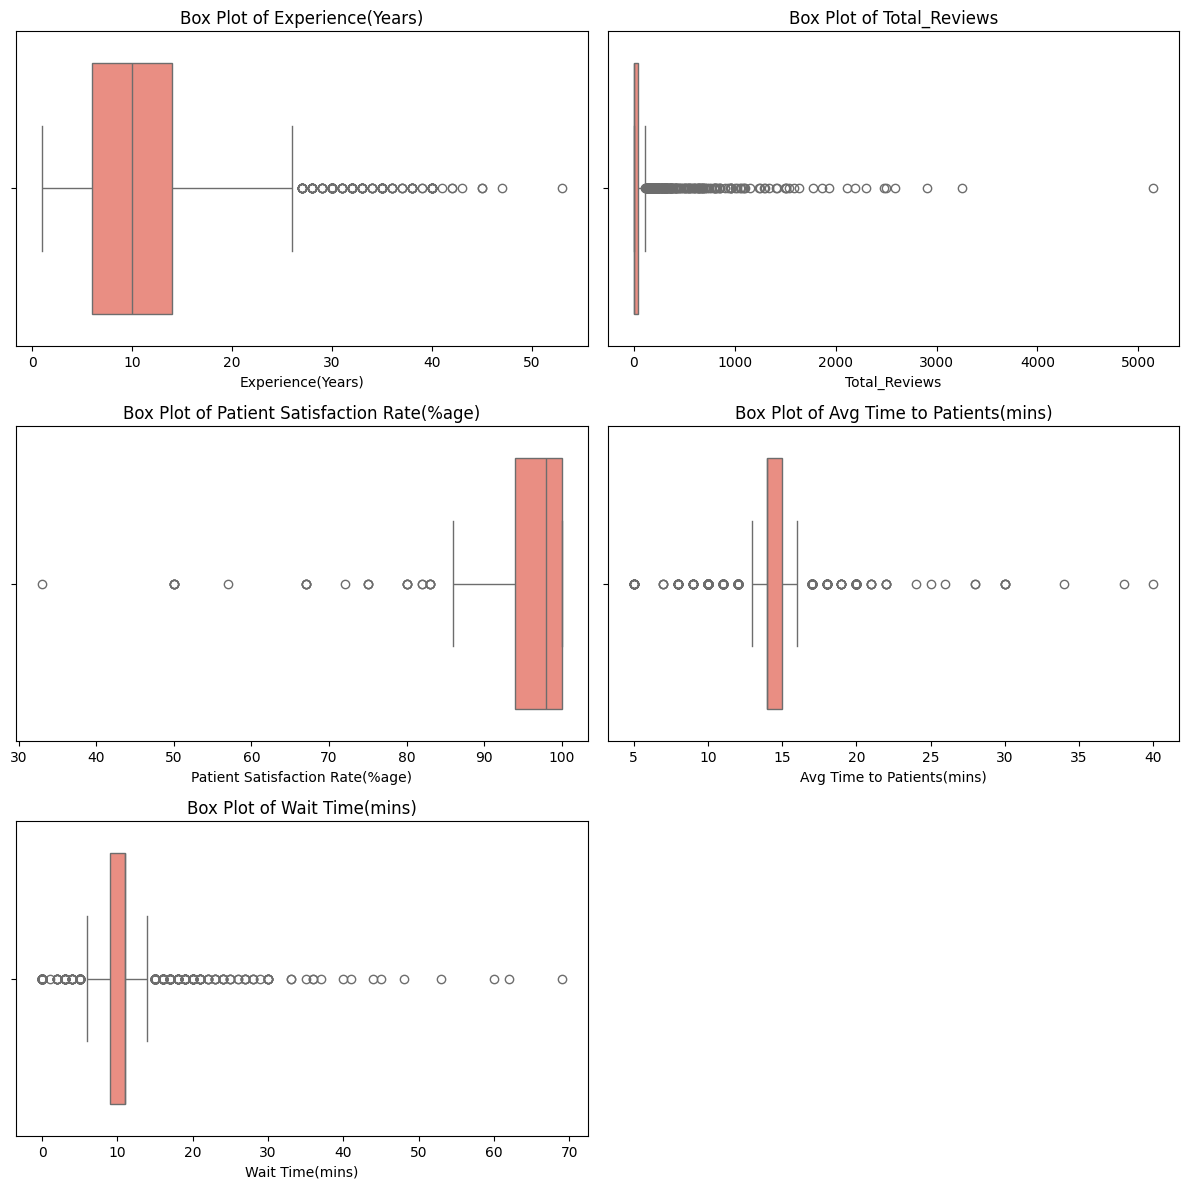

In [ ]:
numerical_columns = train_data.select_dtypes(exclude=['object', 'datetime64[ns]']).columns

num_cols = len(numerical_columns)
num_rows = (num_cols + 1) // 2

plt.figure(figsize=(12, 12))

for i, col in enumerate(numerical_columns, 1):
    if(col=='Experience_Range' or col=='Fee(PKR)'): continue
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x=train_data[col],color='salmon')
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


* Expectedly,all columns contains large number of outlers and this iis expected due to their nature and the variations in wait times,number of reviews and the experience years.

Inspecting the outliers within each column through examination to determine their percentage within the column.Detecting whether these outliers are genuine anomalies or random occurrences. therefore, choosing an appropriate method to handle them effectively.

In [ ]:
for col in numerical_columns:
  inspect_outliers(train_data[col])

Column: Experience(Years)
Lower Limit: -6.0
Upper Limit: 26.0
10th Percentile: 3.3500000000000085
90th Percentile: 25.0
Number of outliers: 153
Percentage of outliers: 9.46%
Outliers:
2177    35.0
643     35.0
1949    32.0
1817    30.0
664     30.0
1365    28.0
1177    27.0
2225    32.0
1266    27.0
801     32.0
1852    53.0
1335    30.0
88      43.0
392     30.0
471     30.0
1894    36.0
1175    28.0
1988    38.0
852     30.0
1959    30.0
1031    30.0
1489    42.0
752     40.0
950     38.0
1057    38.0
1377    40.0
2100    28.0
1364    34.0
178     28.0
1279    35.0
596     28.0
166     27.0
2230    30.0
2063    28.0
1644    33.0
7       33.0
343     40.0
2074    37.0
2173    30.0
1730    31.0
410     47.0
714     32.0
488     39.0
274     35.0
1871    35.0
1966    27.0
1147    30.0
2217    33.0
394     28.0
2325    29.0
2331    30.0
2190    40.0
533     36.0
1789    32.0
2350    35.0
619     45.0
1585    35.0
1521    38.0
2145    32.0
1694    29.0
1605    34.0
1647    35.0
2180    40

* Based on examining and analyzing  the outliers in each column, these values represent real and typical within their respective columns. The observed variations, especially in columns related to time and years, align with expectations and aren't random. therefore, simply removing these outliers might not be the best strategy, especially given the large portions they represent within the dataset. Exploring alternative solutions would be more appropriate.

Before proceeding with outlier handling methods to optimize the model's performance, let's first examine the distribution of these columns to determine if any transformation methods would be appropriate.

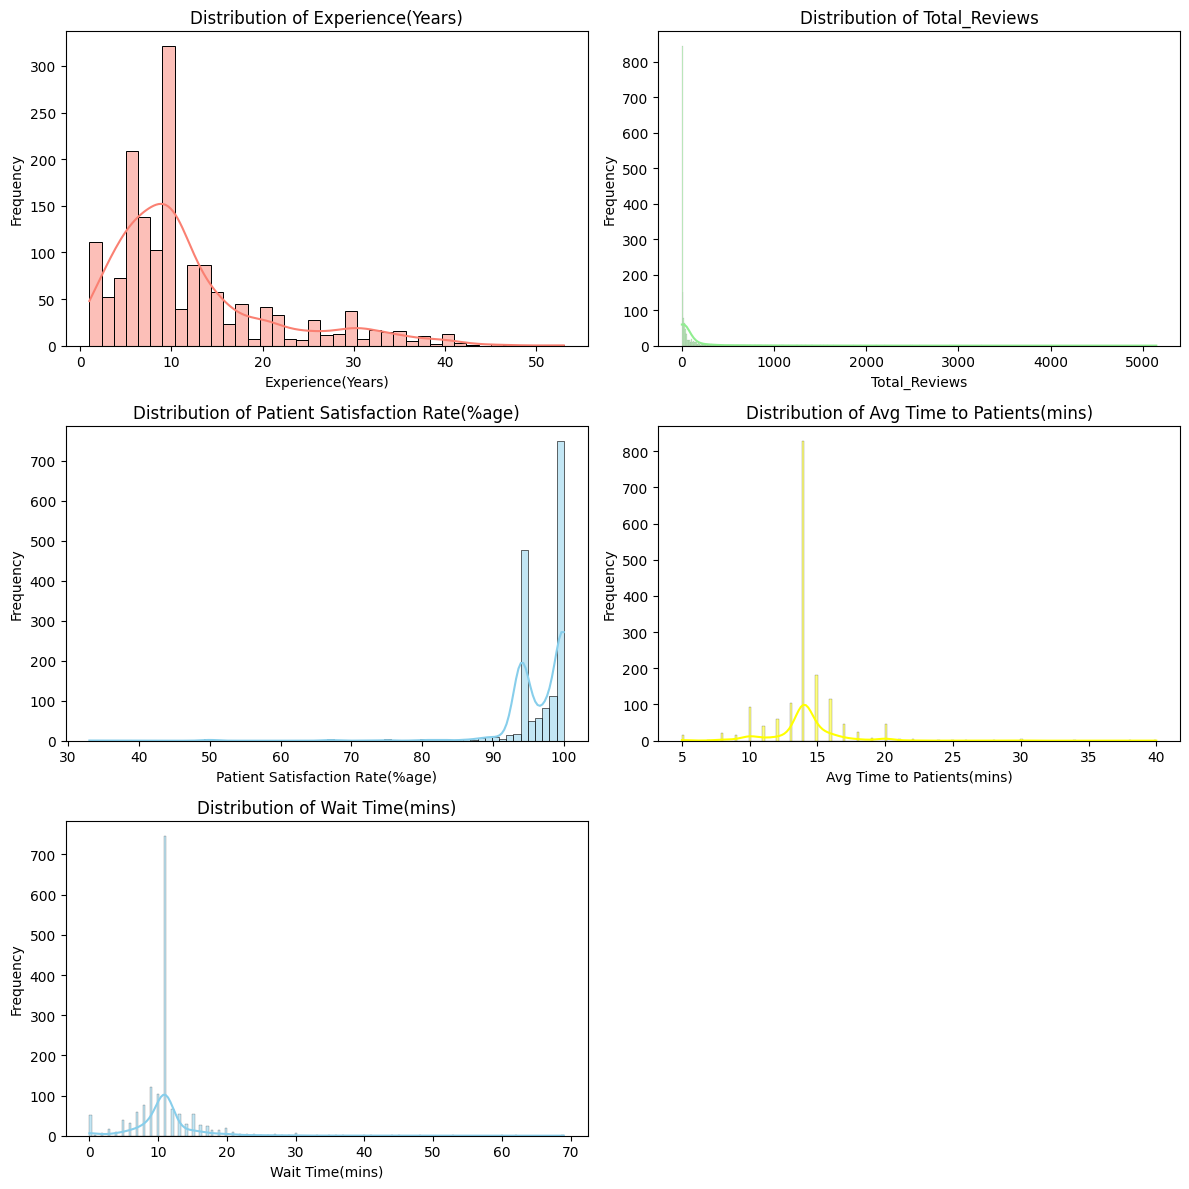

In [ ]:
num_cols = len(numerical_columns)
num_rows = (num_cols + 1) // 2

plt.figure(figsize=(12, 12))

custom_colors = ['skyblue', 'salmon', 'lightgreen', 'skyblue', 'yellow']

for i, col in enumerate(numerical_columns, 1):
    if(col=='Experience_Range' or col=='Fee(PKR)'): continue
    plt.subplot(num_rows, 2, i)
    sns.histplot(train_data[col], kde=True, color=custom_colors[i % len(custom_colors)])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

* Most of the columns showing right skewed distributionsexcpet for the **`Patient Satisfaction Rate`** showing a left skewed one, exploring some transformation methods for each column to address the skewness issue effectively. Selecting the appropriate transformation can aid in reducing outliers and achieving a more normally distributed column.

<font size="+2" color="black"> **`Experience Years`**</font>

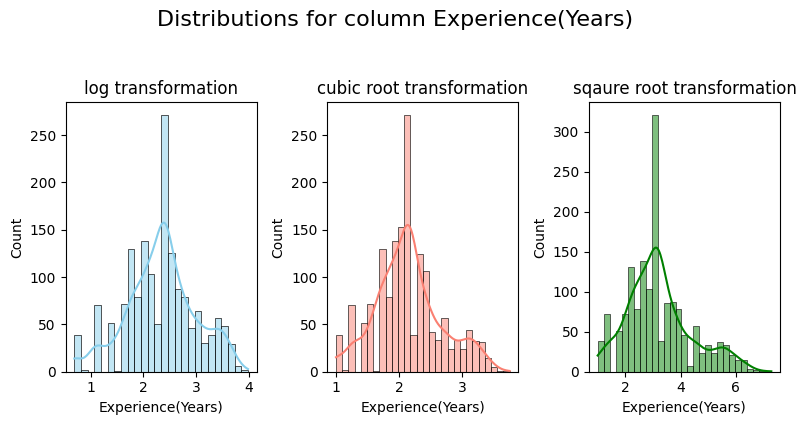

Skewness with log = -0.1495 and with cubic root = 0.307 and with square root = 0.6493


In [ ]:
show_distributions(train_data,'Experience(Years)')

* From the observed plots, the **log** transformation method effectively addresses the right-skewed issue with the lowest skewness, thereby making the column approximately normally distributed.

Determining the percentage of outliers in the **```Experience Years```** column before and after using transformation

In [ ]:
outliers = find_outliers(train_data['Experience(Years)'])
print("Number of outliers in Experience(Years) ",":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(train_data)),"%")
print("\n")

outliers = find_outliers(np.log1p(train_data['Experience(Years)']))
print("Number of outliers using log transformation in Experience(Years) ",":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(train_data)),"%")
print("\n")

Number of outliers in Experience(Years)  : 153 ,It's Percentage is :  9.456118665018542 %


Number of outliers using log transformation in Experience(Years)  : 41 ,It's Percentage is :  2.533992583436341 %




* Using **log** transormation also handled the outliers presented in the column.

Applying Log Transformation method to the **`Experience Years`**

In [ ]:
train_data['Experience(Years)'] = np.log1p(train_data['Experience(Years)'])

val_data['Experience(Years)'] = np.log1p(val_data['Experience(Years)'])

test_data['Experience(Years)']=np.log1p(test_data['Experience(Years)'])

Rechecking for outliers in the column post transformation applying.

In [ ]:
outliers = find_outliers(train_data['Experience(Years)'])
print("Number of outliers in Experience(Years) ",":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(train_data)),"%")
print("\n")

Number of outliers in Experience(Years)  : 41 ,It's Percentage is :  2.533992583436341 %




* Outliers are now removed and column is less skewed.

In [ ]:
lower_bound,upper_bound=calculate_outliers(train_data['Experience(Years)'])
train_data['Experience(Years)'] = train_data['Experience(Years)'].apply(lambda x: lower_bound if (x < lower_bound) else x)

train_data['Experience(Years)'] = train_data['Experience(Years)'].apply(lambda x: upper_bound if (x > upper_bound) else x)

<font size="+2" color="black"> **`Total Reviews`**</font>

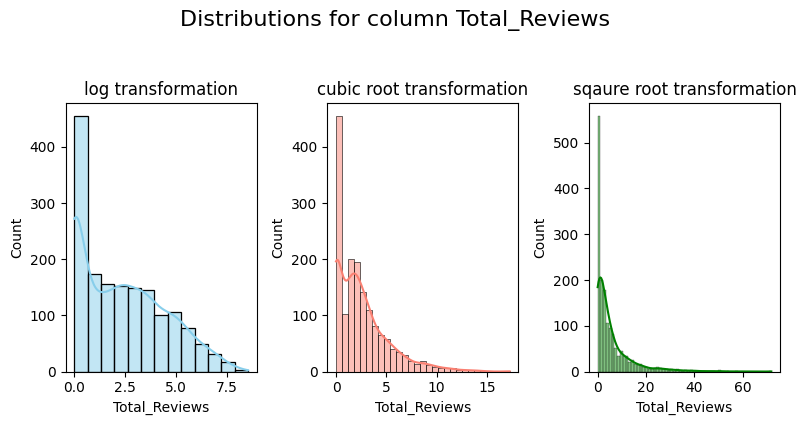

Skewness with log = 0.5341 and with cubic root = 1.5159 and with square root = 2.8019


In [ ]:
show_distributions(train_data,'Total_Reviews')

* From the observed plots, the **log** transformation method effectively addresses the right-skewed issue with the lowest skewness.

Determining the percentage of outliers in the **```Total Reviews```** column before and after using transformation

In [ ]:
outliers = find_outliers(train_data['Total_Reviews'])
print("Number of outliers in Total_Reviews ",":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(train_data)),"%")
print("\n")

outliers = find_outliers(np.log1p(train_data['Total_Reviews']))
print("Number of outliers using log transformation in Total_Reviews ",":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(train_data)),"%")
print("\n")

Number of outliers in Total_Reviews  : 252 ,It's Percentage is :  15.57478368355995 %


Number of outliers using log transformation in Total_Reviews  : 0 ,It's Percentage is :  0.0 %




* Using **log** transormation also handled the outliers presented in the column.

Applying Log Transformation method to the **`Total Reviews`**

In [ ]:
train_data['Total_Reviews'] = np.log1p(train_data['Total_Reviews'])

val_data['Total_Reviews'] = np.log1p(val_data['Total_Reviews'])

test_data['Total_Reviews']=np.log1p(test_data['Total_Reviews'])

Rechecking for outliers in the column post transformation applying.

In [ ]:
outliers = find_outliers(train_data['Total_Reviews'])
print("Number of outliers in Total_Reviews ",":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(data)),"%")
print("\n")

Number of outliers in Total_Reviews  : 0 ,It's Percentage is :  0.0 %




* Now no outliers presented in the column,with less skeweness.

<font size="+2" color="black"> **`Patient Satisfaction Rate(%age)`**</font>

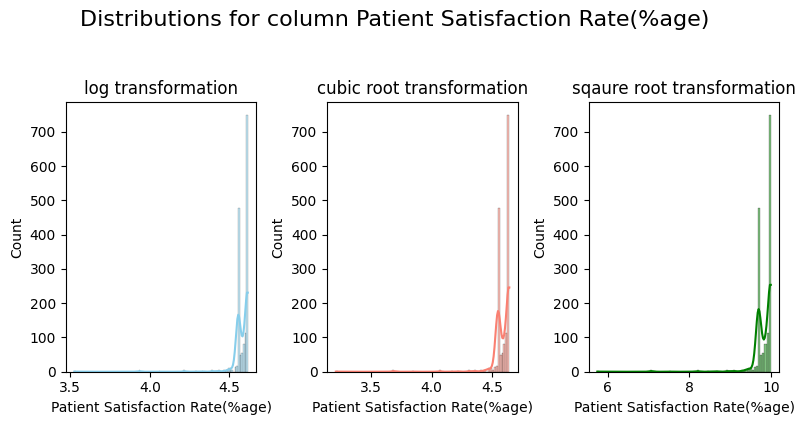

Skewness with log = -8.0101 and with cubic root = -7.0398 and with square root = -6.5864


In [ ]:
show_distributions(train_data,'Patient Satisfaction Rate(%age)')

* Based on the observed plots,these transformations don't address the left skewed problem effictevly,with sqaure root holding the lowest skeweness observed.

Determining the percentage of outliers in the **```Patient Satisfaction Rate(%age)```** column before and after using transformation

In [ ]:
outliers = find_outliers(train_data['Patient Satisfaction Rate(%age)'])
print("Number of outliers in Patient Satisfaction Rate(%age) ",":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(train_data)),"%")
print("\n")

outliers = find_outliers(np.sqrt(train_data['Patient Satisfaction Rate(%age)']))
print("Number of outliers using sqaure root transformation in Patient Satisfaction Rate(%age) ",":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(train_data)),"%")
print("\n")

Number of outliers in Patient Satisfaction Rate(%age)  : 25 ,It's Percentage is :  1.5451174289245984 %


Number of outliers using sqaure root transformation in Patient Satisfaction Rate(%age)  : 25 ,It's Percentage is :  1.5451174289245984 %




* Applying sqaure root transformation has effect either on the distrubution nor the outliers,so replacing these outliers with the lower and upper limit of the column values,might be most appropriate.

Replacing the **17** outlier presented in the **```Patient Satisfaction Rate(%age)```** column with the upper and lower limit of the column based on the IQR method.

In [ ]:
lower_bound,upper_bound = calculate_outliers(train_data['Patient Satisfaction Rate(%age)'])
train_data['Patient Satisfaction Rate(%age)'] = train_data['Patient Satisfaction Rate(%age)'].apply(lambda x: lower_bound if (x < lower_bound) else x)

train_data['Patient Satisfaction Rate(%age)'] = train_data['Patient Satisfaction Rate(%age)'].apply(lambda x: upper_bound if (x > upper_bound) else x)

Rechecking for outliers in the column post lower,upper limits replacement.

In [ ]:
outliers = find_outliers(train_data['Patient Satisfaction Rate(%age)'])
print("Number of outliers in Patient Satisfaction Rate(%age) ",":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(train_data)),"%")
print("\n")

Number of outliers in Patient Satisfaction Rate(%age)  : 0 ,It's Percentage is :  0.0 %




* All the outliers have been replaced.

<font size="+2" color="black"> **`Avg Time to Patients(mins)`**</font>

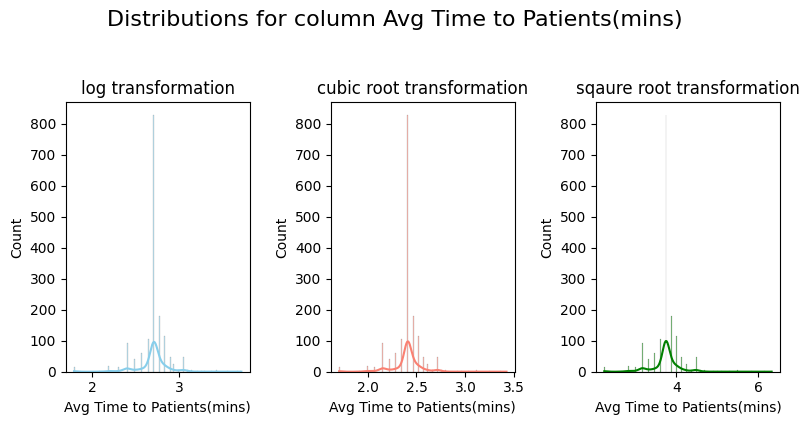

Skewness with log = -0.9713 and with cubic root = -0.2921 and with square root = 0.168


In [ ]:
show_distributions(train_data,'Avg Time to Patients(mins)')

* From the observed plots, the **log** transformation method  addresses the right-skewed issue with the lowest skewness, thereby making the column approximately normally distributed.

Determining the percentage of outliers in the **```Avg Time to Patients(mins)```** column before and after using transformation




In [ ]:
outliers = find_outliers(train_data['Avg Time to Patients(mins)'])
print("Number of outliers in Avg Time to Patients(mins) ",":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(train_data)),"%")
print("\n")

outliers = find_outliers(np.cos(train_data['Avg Time to Patients(mins)']))
print("Number of outliers using cosine transformation in Avg Time to Patients(mins) ",":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(train_data)),"%")
print("\n")

Number of outliers in Avg Time to Patients(mins)  : 392 ,It's Percentage is :  24.2274412855377 %


Number of outliers using cosine transformation in Avg Time to Patients(mins)  : 0 ,It's Percentage is :  0.0 %




* After applying the log transformation method, the number of outliers in the column increased to more than 256,making the transformation unuseful and increased variation .Therefore, we experimented with additional transformation techniques, such as trigonometric transformations (sin, cos), which effectively removed the outliers.

Re-Checking the column distribution with applying trigonometric transformations **(cos).**

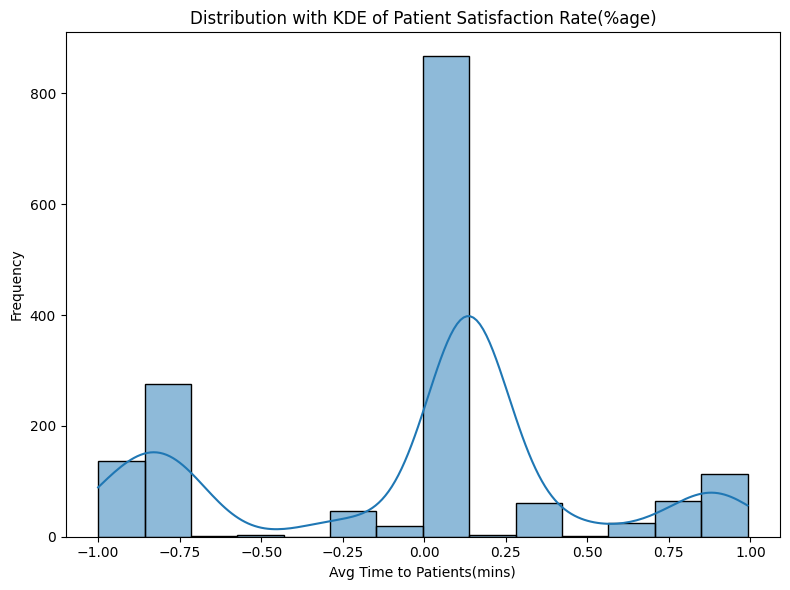

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(np.cos(train_data['Avg Time to Patients(mins)']), kde=True)
plt.title(f'Distribution with KDE of Patient Satisfaction Rate(%age)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

* Column is approximately normally distributed,with outliers removal.

Applying **cosine** Transformation method to the **`Avg Time to Patients(mins)`**

In [ ]:
train_data['Avg Time to Patients(mins)'] = np.cos(train_data['Avg Time to Patients(mins)'])

val_data['Avg Time to Patients(mins)'] = np.cos(val_data['Avg Time to Patients(mins)'])

test_data['Avg Time to Patients(mins)'] = np.cos(test_data['Avg Time to Patients(mins)'])

Rechecking for outliers in the column post transformation applying.

In [ ]:
outliers = find_outliers(train_data['Avg Time to Patients(mins)'])
print("Number of outliers in Avg Time to Patients(mins) ",":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(train_data)),"%")
print("\n")

Number of outliers in Avg Time to Patients(mins)  : 0 ,It's Percentage is :  0.0 %




* All the outliers have been removed.

<font size="+2" color="black"> **`Wait Time(mins)`**</font>

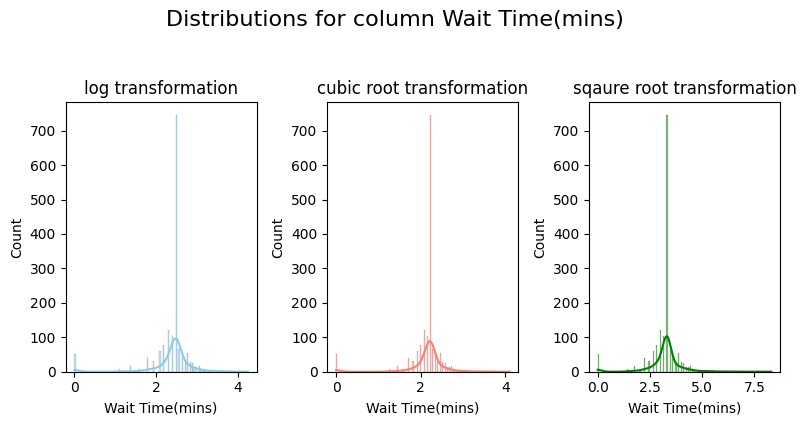

Skewness with log = -2.5772 and with cubic root = -2.646 and with square root = -0.8393


In [ ]:
show_distributions(train_data,'Wait Time(mins)')

* From the observed plots, the **sqaure root** transformation method  addresses the right-skewed issue with the lowest skewness.

Determining the percentage of outliers in the **```Wait Time(mins)```** column before and after using transformation




In [ ]:
outliers = find_outliers(train_data['Wait Time(mins)'])
print("Number of outliers in Wait Time(mins) ",":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(train_data)),"%")
print("\n")

outliers = find_outliers(np.sin(train_data['Wait Time(mins)']))
print("Number of outliers using suitable transformation in Wait Time(mins) ",":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(train_data)),"%")
print("\n")

Number of outliers in Wait Time(mins)  : 332 ,It's Percentage is :  20.519159456118665 %


Number of outliers using suitable transformation in Wait Time(mins)  : 0 ,It's Percentage is :  0.0 %




* After applying the sqaure root transformation method, the number of outliers in the column increased to more than 419,making the transformation unuseful and increased variation .Therefore, we experimented with additional transformation techniques, such as trigonometric transformations (sin, cos), which effectively removed the outliers.

Re-Checking the column distribution with applying trigonometric transformations **(sin).**

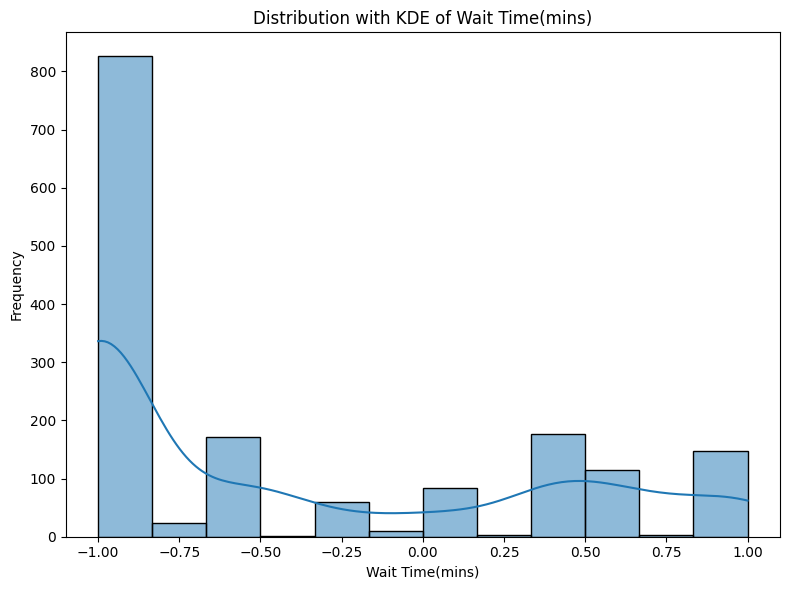

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(np.sin(train_data['Wait Time(mins)']), kde=True)
plt.title(f'Distribution with KDE of Wait Time(mins)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

* Column is approximately normally distributed,with outliers removal.

Applying **sine** Transformation method to the **`Wait Time(mins)`**

In [ ]:
train_data['Wait Time(mins)'] = np.sin(train_data['Wait Time(mins)'])

val_data['Wait Time(mins)'] = np.sin(val_data['Wait Time(mins)'])

test_data['Wait Time(mins)']=np.sin(test_data['Wait Time(mins)'])

Rechecking for outliers in the column post transformation applying.

In [ ]:
outliers = find_outliers(train_data['Wait Time(mins)'])
print("Number of outliers in Wait Time(mins) ",":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(train_data)),"%")
print("\n")

Number of outliers in Wait Time(mins)  : 0 ,It's Percentage is :  0.0 %




Recheking the box plot post outliers handling and transformations applied.

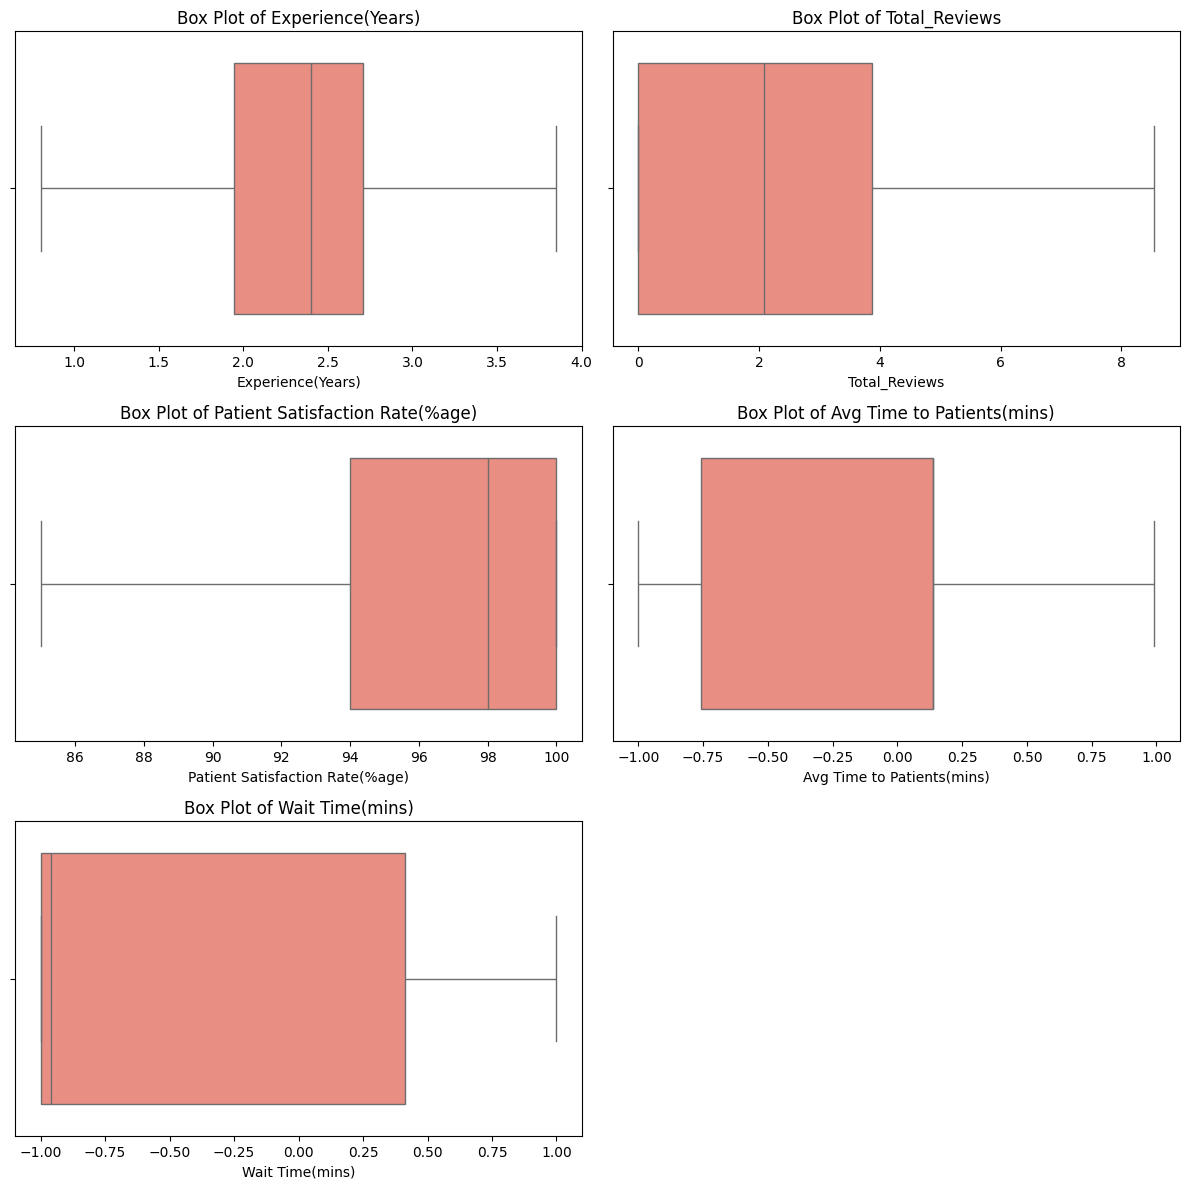

In [ ]:
numerical_columns = train_data.select_dtypes(exclude=['object', 'datetime64[ns]']).columns

num_cols = len(numerical_columns)
num_rows = (num_cols + 1) // 2

plt.figure(figsize=(12, 12))

for i, col in enumerate(numerical_columns, 1):
    if(col=='Experience_Range' or col=='Fee(PKR)'): continue
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x=train_data[col],color='salmon')
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


* Now no outliers observed within any column

Rechecking all the distrubtions of the column post transformation applied

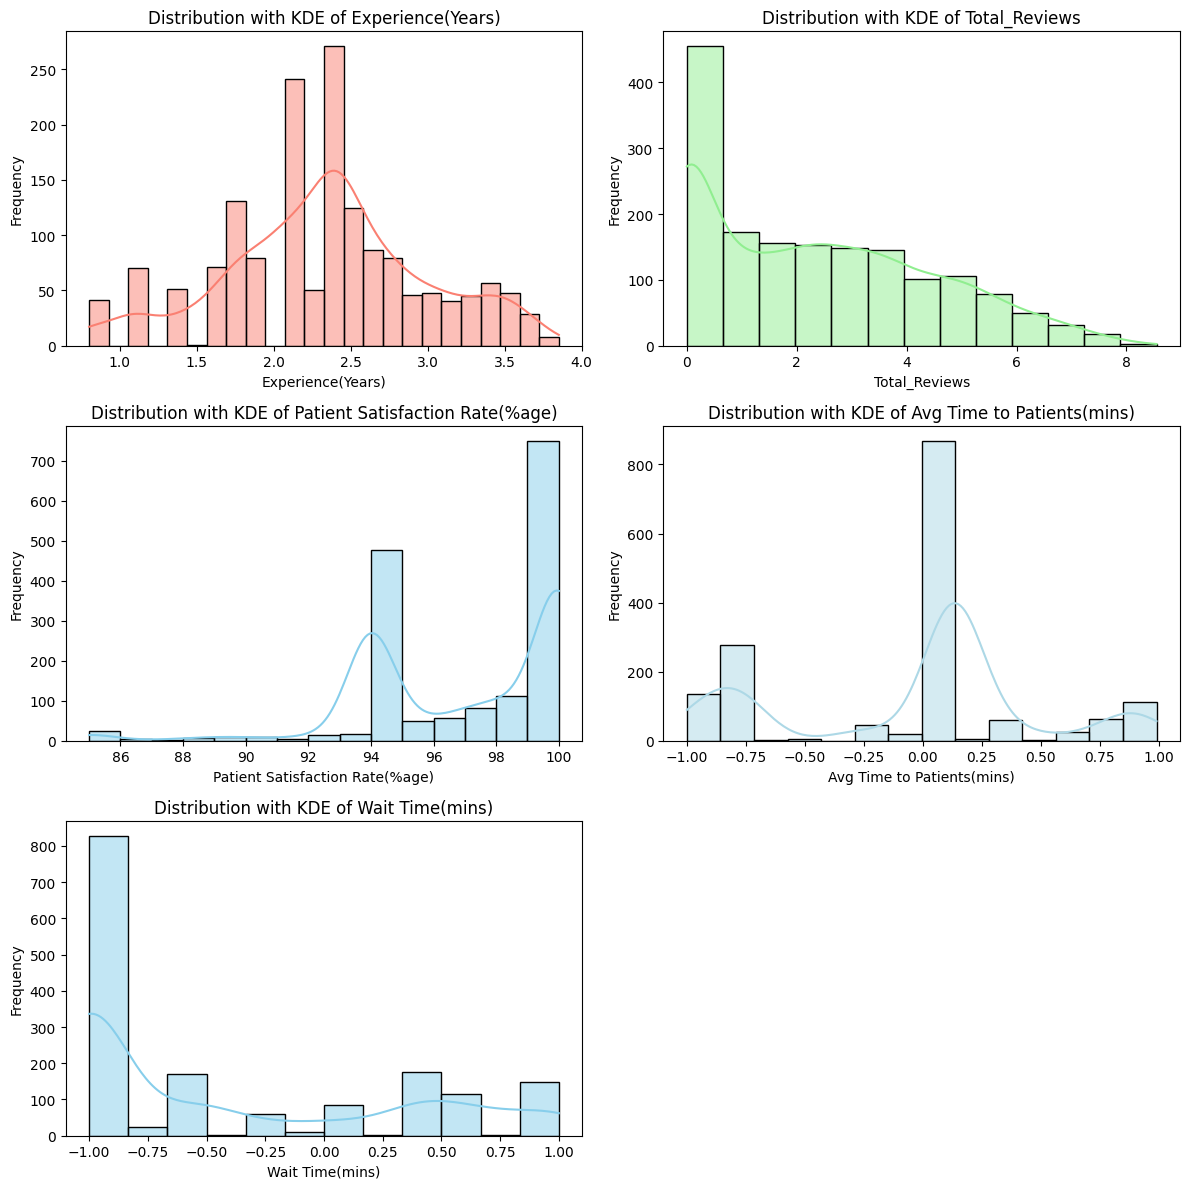

In [ ]:
numerical_columns = train_data.select_dtypes(exclude=['object', 'datetime64[ns]']).columns

num_cols = len(numerical_columns)
num_rows = (num_cols + 1) // 2

plt.figure(figsize=(12, 12))

custom_colors = ['skyblue', 'salmon', 'lightgreen', 'skyblue', 'lightblue']

for i, col in enumerate(numerical_columns, 1):
    if(col=='Experience_Range' or col=='Fee(PKR)'): continue
    plt.subplot(num_rows, 2, i)
    sns.histplot(train_data[col], kde=True, color=custom_colors[i % len(custom_colors)])
    plt.title(f'Distribution with KDE of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

* All skewed columns seems to be less skewed.

In [ ]:
for col in numerical_columns:
  if col !='Fee(PKR)':
   inspect_outliers(train_data[col])

Column: Experience(Years)
Lower Limit: 0.8027000709849681
Upper Limit: 3.851260279172555
10th Percentile: 1.4687424860793612
90th Percentile: 3.258096538021482
Number of outliers: 0
Percentage of outliers: 0.00%
Outliers:
Series([], Name: Experience(Years), dtype: float64)


Column: Total_Reviews
Lower Limit: -5.806801516361836
Upper Limit: 9.678002527269726
10th Percentile: 0.0
90th Percentile: 5.370152416577433
Number of outliers: 0
Percentage of outliers: 0.00%
Outliers:
Series([], Name: Total_Reviews, dtype: float64)


Column: Patient Satisfaction Rate(%age)
Lower Limit: 85.0
Upper Limit: 109.0
10th Percentile: 94.0
90th Percentile: 100.0
Number of outliers: 0
Percentage of outliers: 0.00%
Outliers:
Series([], Name: Patient Satisfaction Rate(%age), dtype: float64)


Column: Avg Time to Patients(mins)
Lower Limit: -2.1043256094588036
Upper Limit: 1.481374914807816
10th Percentile: -0.8390715290764524
90th Percentile: 0.8438539587324921
Number of outliers: 0
Percentage of outliers: 0

### 3.5) Encoding

In [ ]:
%%capture
!pip install category_encoders
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import TargetEncoder

In [ ]:
train_data.head()

Doctor Name        City                      Specialization  \
2243       Dr. Tayyaba Usman  GUJRANWALA                        Gynecologist   
1246  Dr. Saqib Munir Suleri     SIALKOT  Urologist, Sexologist, Andrologist   
134       Dr. Ayesha Maqsood  GUJRANWALA                        Pediatrician   
667       Dr. Jahanzeb Kakar      QUETTA          Neuro Surgeon, Neurologist   
1965         Dr. Ibnat Islam     KARACHI                       Dermatologist   

                    Doctor Qualification  Experience(Years)  Total_Reviews  \
2243  mbbs,fcps(obstetrcsandgynaecology)           2.564949       2.995732   
1246                    mbbs,ms(urology)           2.708050       4.820282   
134                            mbbs,mcps           2.397895       0.000000   
667         mbbs,fcps(neurosurgery),mrcs           1.945910       3.988984   
1965              mbbs,fcps(dermatology)           2.302585       5.036953   

      Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
2243                            100.0                    0.004426   
1246                             98.0                    0.136737   
134                              94.0                    0.136737   
667                             100.0                    0.136737   
1965                             98.0                    0.907447   

      Wait Time(mins)      Hospital Address       Doctors Link   Fee Category  
2243        -0.846220             Available          Available  Medium-Priced  
1246        -0.999990             Available          Available  Medium-Priced  
134         -0.999990  No Address Available  No Link Available  Medium-Priced  
667          0.989358             Available          Available      Expensive  
1965        -0.544021             Available          Available          Cheap

* We have 6 categorical columns that need encoding,for each column we will select best encoding technique that suits the nature of the column.


In [ ]:
data['Doctor Name'].nunique()

2190

* Since **`Doctor Name`** column contains great number of unique values as observed earlier where there might exist a doctor for every record, encoding will not be very effective and therefore this feature will not be very informative to the model so we will remove it

In [ ]:
train_data.drop(['Doctor Name'], axis=1 ,inplace = True)
val_data.drop(['Doctor Name'], axis=1 ,inplace = True)
test_data.drop(['Doctor Name'], axis=1 ,inplace = True)

In [ ]:
train_data.head(1)

City Specialization                Doctor Qualification  \
2243  GUJRANWALA   Gynecologist  mbbs,fcps(obstetrcsandgynaecology)   

      Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
2243           2.564949       2.995732                            100.0   

      Avg Time to Patients(mins)  Wait Time(mins) Hospital Address  \
2243                    0.004426         -0.84622        Available   

     Doctors Link   Fee Category  
2243    Available  Medium-Priced

<font size="+2" color="black"> **`Fee Category`**</font>

In [ ]:
data['Fee Category'].unique()

array(['Expensive', 'Cheap', 'Medium-Priced'], dtype=object)

* Encoding the Traget variable using ordinal mapping due to the order it inherits between the categories if fee as [Expensive,Cheap,Medium-Priced] where giving expensive fees higher values.

In [ ]:
fee_categories_mapping = {'Cheap': 0,
                          'Medium-Priced': 1,
                          'Expensive': 2}

train_data['Fee Category'] = train_data['Fee Category'].map(fee_categories_mapping)
val_data['Fee Category'] = val_data['Fee Category'].map(fee_categories_mapping)
test_data['Fee Category'] = test_data['Fee Category'].map(fee_categories_mapping)

<font size="+2" color="black"> **`Doctor Qualification`**</font>

In [ ]:
data['Doctor Qualification'].nunique()

399

* We have **399** unique Qualifications presented in data

In [ ]:
data['Doctor Qualification'].value_counts()

Doctor Qualification
mbbs                                                                                                                                                                                                                                                                                 406
mbbs,fcps                                                                                                                                                                                                                                                                            226
mbbs,fcps(obstetrcsandgynecology)                                                                                                                                                                                                                                                    106
mbbs,fcps(urology)                                                                                                                      

We choose to apply encoding based on the number of degrees each
doctor have,by counting the number of commas separating each
degree,Since this column has large unique values and to maintain the
importance of higher qualifications giving them higher value

In [ ]:
train_data['Doctor Qualification'] = train_data['Doctor Qualification'].apply(lambda x : len(x.split(',')))
val_data['Doctor Qualification'] = val_data['Doctor Qualification'].apply(lambda x : len(x.split(',')))
test_data['Doctor Qualification']= test_data['Doctor Qualification'].apply(lambda x : len(x.split(',')))

In [ ]:
train_data['Doctor Qualification'].value_counts()

Doctor Qualification
2     895
1     323
3     240
4      88
5      33
6      18
7       9
8       5
11      2
9       2
10      1
13      1
24      1
Name: count, dtype: int64

<font size="+2" color="black"> **` Specialization`**</font>

In [ ]:
train_data['Specialization'].nunique()

127

Given that the column **"Specialization"** has 136 unique values, which is still a large number, and considering the nature of the column where different specializations may have different fee categories, with some specializations being more expensive and others being cheaper, we choose to map each category to the **mode** of the fee category present.

In [ ]:
spec_mode_per_category = train_data.groupby('Specialization')['Fee Category'].agg(lambda x: x.mode().iloc[0])

train_data['Specialization'] = train_data['Specialization'].map(spec_mode_per_category)
val_data['Specialization'] = val_data['Specialization'].map(spec_mode_per_category).fillna(-1)
test_data['Specialization'] = test_data['Specialization'].map(spec_mode_per_category).fillna(-1)

In [ ]:
joblib.dump(spec_mode_per_category,'Specialization mode_per_category.joblib')

['Specialization mode_per_category.joblib']

In [ ]:
train_data['Specialization'].value_counts()

Specialization
1    983
0    547
2     88
Name: count, dtype: int64

<font size="+2" color="black"> **`Hsoptial Address`**</font>

In [ ]:
data['Hospital Address'].nunique()

2

* Hospital Address column as we modified in the analysis stage has only 2 values indicating the availabltiy or unavailability of clinic address for the Doctor.

Given the small number of unique values of the Hosptial Address column,indictaing either True or False values ,**one hot encoding** will be optimal encoding tehcnique

In [ ]:
data['Hospital Address'].value_counts()

Hospital Address
Available               1699
No Address Available     549
Name: count, dtype: int64

In [ ]:
train_data = pd.get_dummies(train_data,columns=['Hospital Address'],dtype=int)

val_data = pd.get_dummies(val_data,columns=['Hospital Address'],dtype=int)

test_data = pd.get_dummies(test_data,columns=['Hospital Address'],dtype=int)

In [ ]:
train_data.head()

City  Specialization  Doctor Qualification  Experience(Years)  \
2243  GUJRANWALA               1                     2           2.564949   
1246     SIALKOT               2                     2           2.708050   
134   GUJRANWALA               0                     2           2.397895   
667       QUETTA               1                     3           1.945910   
1965     KARACHI               1                     2           2.302585   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
2243       2.995732                            100.0   
1246       4.820282                             98.0   
134        0.000000                             94.0   
667        3.988984                            100.0   
1965       5.036953                             98.0   

      Avg Time to Patients(mins)  Wait Time(mins)       Doctors Link  \
2243                    0.004426        -0.846220          Available   
1246                    0.136737        -0.999990          Available   
134                     0.136737        -0.999990  No Link Available   
667                     0.136737         0.989358          Available   
1965                    0.907447        -0.544021          Available   

      Fee Category  Hospital Address_Available  \
2243             1                           1   
1246             1                           1   
134              1                           0   
667              2                           1   
1965             0                           1   

      Hospital Address_No Address Available  
2243                                      0  
1246                                      0  
134                                       1  
667                                       0  
1965                                      0

<font size="+2" color="black"> **`Doctors Link`**</font>


In [ ]:
data['Doctors Link'].nunique()

2

* Doctors Link column as we modified in the analysis stage has only 2 values indicating the availabltiy or unavailability of the link for the Doctor.

Given the small number of unique values of the Doctors Link column,indictaing either True or False values ,**one hot encoding** will be optimal encoding tehcnique

In [ ]:
data['Doctors Link'].value_counts()

Doctors Link
Available            1609
No Link Available     639
Name: count, dtype: int64

In [ ]:
train_data = pd.get_dummies(train_data,columns=['Doctors Link'],dtype=int)

val_data = pd.get_dummies(val_data,columns=['Doctors Link'],dtype=int)

test_data = pd.get_dummies(test_data,columns=['Doctors Link'],dtype=int)

In [ ]:
train_data.head(1)

City  Specialization  Doctor Qualification  Experience(Years)  \
2243  GUJRANWALA               1                     2           2.564949   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
2243       2.995732                            100.0   

      Avg Time to Patients(mins)  Wait Time(mins)  Fee Category  \
2243                    0.004426         -0.84622             1   

      Hospital Address_Available  Hospital Address_No Address Available  \
2243                           1                                      0   

      Doctors Link_Available  Doctors Link_No Link Available  
2243                       1                               0

<font size="+2" color="black"> **`City`**</font>


In [ ]:
data['City'].nunique()

115

* We have 115 cities in the data

Given that the column **"City"** has 136 unique values, which is still a large number, and considering the nature of the column where cities get affected by fee categories, with some places being more expensive and others being cheaper, we choose to map each category to the **mode** of the Fee category present.

In [ ]:
city_mode_per_category = train_data.groupby('City')['Fee Category'].agg(lambda x: x.mode().iloc[0])

train_data['City'] = train_data['City'].map(city_mode_per_category)
val_data['City'] = val_data['City'].map(city_mode_per_category).fillna(0)
test_data['City'] = test_data['City'].map(city_mode_per_category).fillna(0)

In [ ]:
joblib.dump(city_mode_per_category,'City mode_per_category.joblib')

['City mode_per_category.joblib']

In [ ]:
train_data.head(1)

City  Specialization  Doctor Qualification  Experience(Years)  \
2243     1               1                     2           2.564949   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
2243       2.995732                            100.0   

      Avg Time to Patients(mins)  Wait Time(mins)  Fee Category  \
2243                    0.004426         -0.84622             1   

      Hospital Address_Available  Hospital Address_No Address Available  \
2243                           1                                      0   

      Doctors Link_Available  Doctors Link_No Link Available  
2243                       1                               0

In [ ]:
fee_column_train = train_data['Fee Category']
train_data.drop(['Fee Category'],axis=1,inplace=True)
train_data['Fee Category'] = fee_column_train

fee_column_val = val_data['Fee Category']
val_data.drop(['Fee Category'],axis=1,inplace=True)
val_data['Fee Category'] = fee_column_val

fee_column_test = test_data['Fee Category']
test_data.drop(['Fee Category'],axis=1,inplace=True)
test_data['Fee Category'] = fee_column_test

In [ ]:
train_data.head()

City  Specialization  Doctor Qualification  Experience(Years)  \
2243     1               1                     2           2.564949   
1246     1               2                     2           2.708050   
134      1               0                     2           2.397895   
667      1               1                     3           1.945910   
1965     1               1                     2           2.302585   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
2243       2.995732                            100.0   
1246       4.820282                             98.0   
134        0.000000                             94.0   
667        3.988984                            100.0   
1965       5.036953                             98.0   

      Avg Time to Patients(mins)  Wait Time(mins)  Hospital Address_Available  \
2243                    0.004426        -0.846220                           1   
1246                    0.136737        -0.999990                           1   
134                     0.136737        -0.999990                           0   
667                     0.136737         0.989358                           1   
1965                    0.907447        -0.544021                           1   

      Hospital Address_No Address Available  Doctors Link_Available  \
2243                                      0                       1   
1246                                      0                       1   
134                                       1                       0   
667                                       0                       1   
1965                                      0                       1   

      Doctors Link_No Link Available  Fee Category  
2243                               0             1  
1246                               0             1  
134                                1             1  
667                                0             2  
1965                               0             0

### 3.6) Scaling

Scaling the features using **`Min-Max`** since features are not normally distributed so it will be most appropriate for the data nature.For  model enhancement and scalability by ensuring all values are within the same range, thus improving overall scalability.

In [ ]:
train_data.head()

City  Specialization  Doctor Qualification  Experience(Years)  \
2243     1               1                     2           2.564949   
1246     1               2                     2           2.708050   
134      1               0                     2           2.397895   
667      1               1                     3           1.945910   
1965     1               1                     2           2.302585   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
2243       2.995732                            100.0   
1246       4.820282                             98.0   
134        0.000000                             94.0   
667        3.988984                            100.0   
1965       5.036953                             98.0   

      Avg Time to Patients(mins)  Wait Time(mins)  Hospital Address_Available  \
2243                    0.004426        -0.846220                           1   
1246                    0.136737        -0.999990                           1   
134                     0.136737        -0.999990                           0   
667                     0.136737         0.989358                           1   
1965                    0.907447        -0.544021                           1   

      Hospital Address_No Address Available  Doctors Link_Available  \
2243                                      0                       1   
1246                                      0                       1   
134                                       1                       0   
667                                       0                       1   
1965                                      0                       1   

      Doctors Link_No Link Available  Fee Category  
2243                               0             1  
1246                               0             1  
134                                1             1  
667                                0             2  
1965                               0             0

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

train_data_scaled = min_max_scaler.fit_transform(train_data.iloc[:,:-1])

val_data_scaled = min_max_scaler.transform(val_data.iloc[:,:-1])
test_data_scaled = min_max_scaler.transform(test_data.iloc[:,:-1])

train_data_scaled = pd.DataFrame(train_data_scaled, columns=train_data.iloc[:,:-1].columns)
train_data_scaled['Fee Category'] = train_data['Fee Category'].values

val_data_scaled = pd.DataFrame(val_data_scaled, columns=val_data.iloc[:,:-1].columns)
val_data_scaled['Fee Category'] = val_data['Fee Category'].values

test_data_scaled = pd.DataFrame(test_data_scaled, columns=test_data.iloc[:,:-1].columns)
test_data_scaled['Fee Category'] = test_data['Fee Category'].values

Confirming that the values of all the features of all sets are scaled within the range of `[0, 1]`.


In [ ]:
train_data_scaled.head()

City  Specialization  Doctor Qualification  Experience(Years)  \
0   0.5             0.5              0.043478           0.578060   
1   0.5             1.0              0.043478           0.625000   
2   0.5             0.0              0.043478           0.523262   
3   0.5             0.5              0.086957           0.375000   
4   0.5             0.5              0.043478           0.491998   

   Total_Reviews  Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
0       0.350527                         1.000000                    0.504422   
1       0.564016                         0.866667                    0.570871   
2       0.000000                         0.600000                    0.570871   
3       0.466746                         1.000000                    0.570871   
4       0.589368                         0.866667                    0.957936   

   Wait Time(mins)  Hospital Address_Available  \
0         0.076889                         1.0   
1         0.000000                         1.0   
2         0.000000                         0.0   
3         0.994723                         1.0   
4         0.227996                         1.0   

   Hospital Address_No Address Available  Doctors Link_Available  \
0                                    0.0                     1.0   
1                                    0.0                     1.0   
2                                    1.0                     0.0   
3                                    0.0                     1.0   
4                                    0.0                     1.0   

   Doctors Link_No Link Available  Fee Category  
0                             0.0             1  
1                             0.0             1  
2                             1.0             1  
3                             0.0             2  
4                             0.0             0

In [ ]:
val_data_scaled.head()

City  Specialization  Doctor Qualification  Experience(Years)  \
0   0.5             0.0              0.000000           0.324435   
1   0.5             0.5              0.043478           0.523262   
2   0.0             0.0              0.086957           0.765212   
3   0.0             0.5              0.043478           0.264629   
4   0.5             0.0              0.086957           0.602369   

   Total_Reviews  Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
0       0.000000                         0.600000                    0.570871   
1       0.442784                         0.733333                    0.570871   
2       0.188318                        -0.333333                    0.570871   
3       0.401807                         0.600000                    0.925999   
4       0.081104                         1.000000                    0.707146   

   Wait Time(mins)  Hospital Address_Available  \
0         0.000000                         0.0   
1         0.231720                         1.0   
2         0.000000                         1.0   
3         0.706089                         1.0   
4         0.956515                         1.0   

   Hospital Address_No Address Available  Doctors Link_Available  \
0                                    1.0                     0.0   
1                                    0.0                     1.0   
2                                    0.0                     1.0   
3                                    0.0                     1.0   
4                                    0.0                     1.0   

   Doctors Link_No Link Available  Fee Category  
0                             1.0             0  
1                             0.0             1  
2                             0.0             0  
3                             0.0             0  
4                             0.0             0

In [ ]:
test_data_scaled.head()

City  Specialization  Doctor Qualification  Experience(Years)  \
0   0.0             0.5              0.043478           0.457437   
1   0.5             0.5              0.043478           0.324435   
2   0.0             0.0              0.000000           0.264629   
3   0.5             0.0              0.043478           0.097066   
4   0.5            -0.5              0.043478           0.457437   

   Total_Reviews  Patient Satisfaction Rate(%age)  Avg Time to Patients(mins)  \
0       0.162209                              1.0                    0.364007   
1       0.081104                              1.0                    0.570871   
2       0.243313                              1.0                    0.080802   
3       0.162209                              1.0                    0.570871   
4       0.564955                              1.0                    0.120670   

   Wait Time(mins)  Hospital Address_Available  \
0         0.227996                         1.0   
1         0.000000                         0.0   
2         0.020534                         1.0   
3         0.000000                         0.0   
4         0.706089                         1.0   

   Hospital Address_No Address Available  Doctors Link_Available  \
0                                    0.0                     1.0   
1                                    1.0                     1.0   
2                                    0.0                     1.0   
3                                    1.0                     1.0   
4                                    0.0                     1.0   

   Doctors Link_No Link Available  Fee Category  
0                             0.0             1  
1                             0.0             1  
2                             0.0             0  
3                             0.0             0  
4                             0.0             1

* All sets are scaled.

In [ ]:
joblib.dump(min_max_scaler,'Min-Max Scaler MS2.joblib')

['Min-Max Scaler MS2.joblib']

### 3.7) Feature Selection

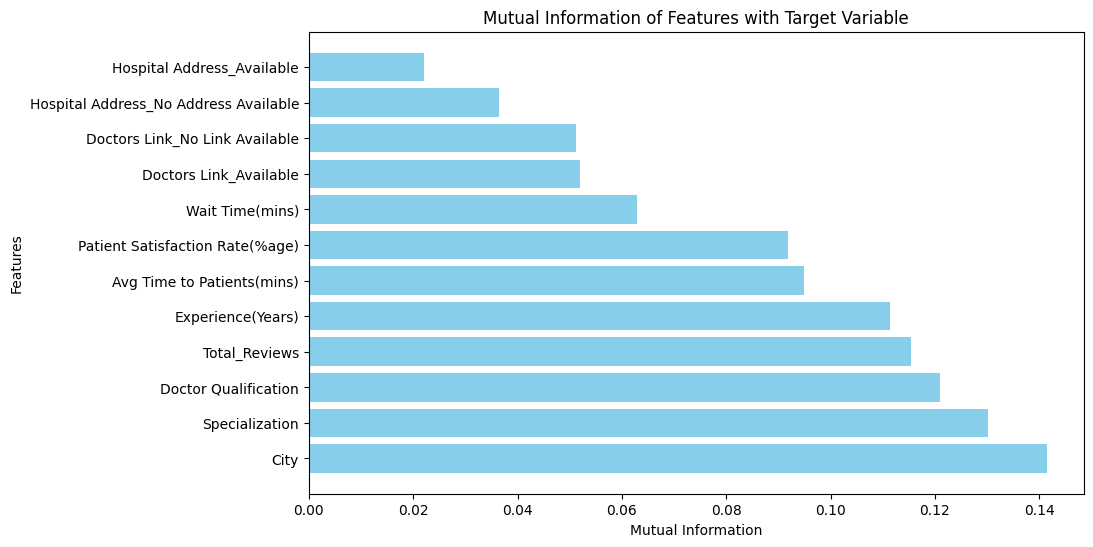

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(train_data_scaled.iloc[:,:-1], train_data_scaled['Fee Category'])

feature_mi_df = pd.DataFrame({'Feature': train_data_scaled.iloc[:,:-1].columns, 'Mutual_Information': mutual_info})
feature_mi_df = feature_mi_df.sort_values(by='Mutual_Information', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_mi_df['Feature'], feature_mi_df['Mutual_Information'], color='skyblue')
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.title('Mutual Information of Features with Target Variable')
plt.show()


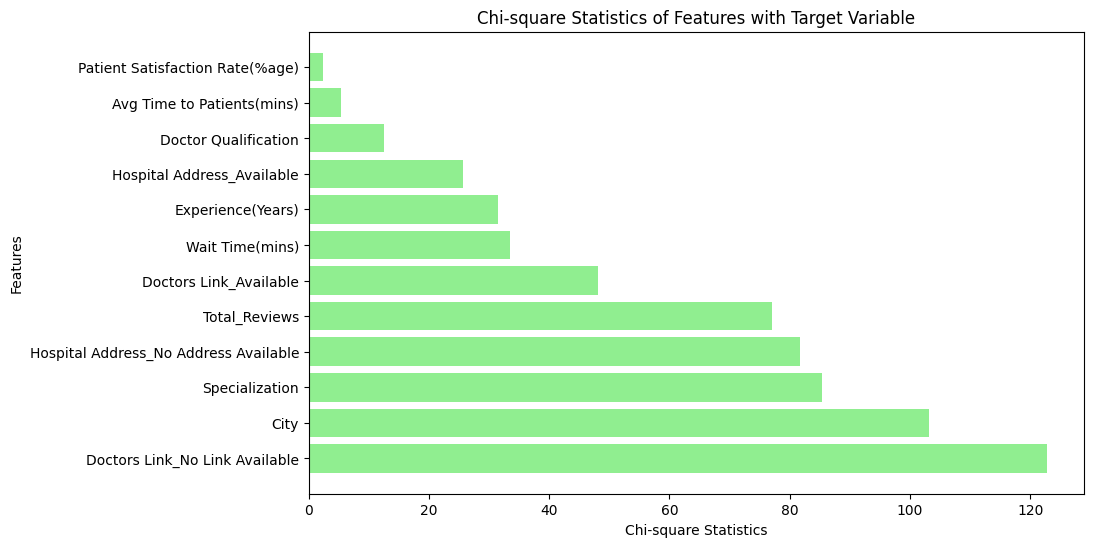

In [ ]:
from sklearn.feature_selection import chi2

chi2_stat, _ = chi2(train_data_scaled.iloc[:,:-1], train_data_scaled['Fee Category'])

feature_chi2_df = pd.DataFrame({'Feature': train_data_scaled.iloc[:,:-1].columns, 'Chi2_Statistics': chi2_stat})
feature_chi2_df = feature_chi2_df.sort_values(by='Chi2_Statistics', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_chi2_df['Feature'], feature_chi2_df['Chi2_Statistics'], color='lightgreen')
plt.xlabel('Chi-square Statistics')
plt.ylabel('Features')
plt.title('Chi-square Statistics of Features with Target Variable')
plt.show()


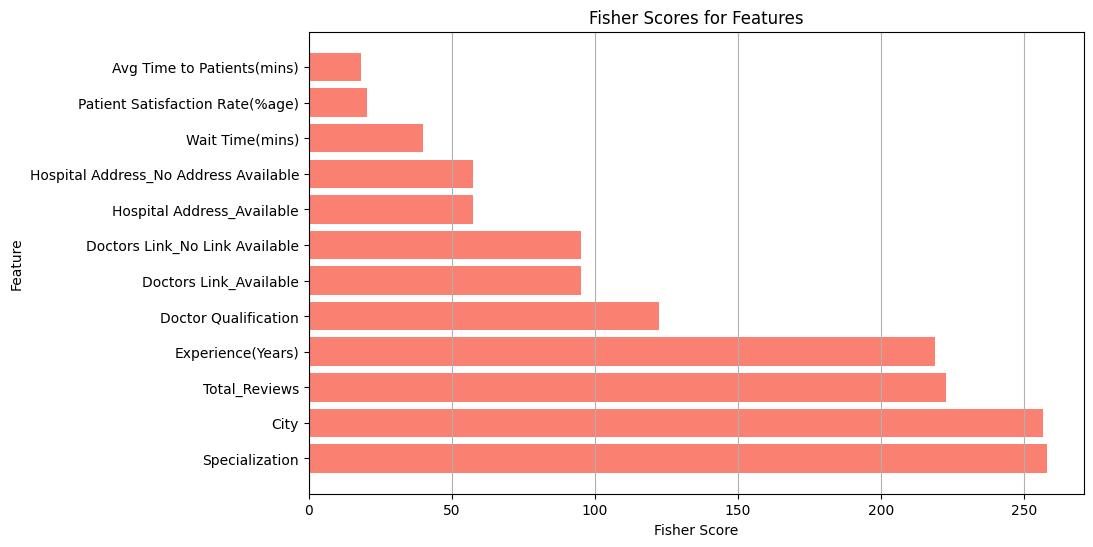

In [ ]:
from sklearn.feature_selection import f_classif

fisher_scores, _ = f_classif(train_data_scaled.iloc[:,:-1], train_data_scaled['Fee Category'])

features_df = pd.DataFrame({'Feature': train_data_scaled.iloc[:,:-1].columns, 'Fisher Score': fisher_scores})
features_df = features_df.sort_values(by='Fisher Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Fisher Score'], color='salmon')
plt.xlabel('Fisher Score')
plt.ylabel('Feature')
plt.title('Fisher Scores for Features')
plt.grid(axis='x')
plt.show()

* After conducting an analysis of feature selection methods, we decide to retain features that demonstrate consistently high scores across three or at least two of the techniques employed. Conversely, features with low scores in at least two of the methods are discarded.
 > Which are **[City , Specialization , 	Doctor Qualification ,	Experience(Years) ,	Total_Reviews ,	Doctors Link_Available ,	Doctors Link_No Link Available]**

--------

# **[4] Modeling**

Creating the training, validation, and testing datasets using the final selected features.

In [ ]:
X_train = train_data_scaled.drop(['Fee Category','Patient Satisfaction Rate(%age)','Wait Time(mins)','Avg Time to Patients(mins)','Hospital Address_No Address Available','Hospital Address_Available'], axis=1)
y_train = train_data_scaled['Fee Category']

X_val = val_data_scaled.drop(['Fee Category','Patient Satisfaction Rate(%age)','Wait Time(mins)','Avg Time to Patients(mins)','Hospital Address_No Address Available','Hospital Address_Available'], axis=1)
y_val = val_data_scaled['Fee Category']

X_test = test_data_scaled.drop(['Fee Category','Patient Satisfaction Rate(%age)','Wait Time(mins)','Avg Time to Patients(mins)','Hospital Address_No Address Available','Hospital Address_Available'], axis=1)
y_test =test_data_scaled['Fee Category']

In [ ]:
X_train.head(1)

City  Specialization  Doctor Qualification  Experience(Years)  \
0   0.5             0.5              0.043478            0.57806   

   Total_Reviews  Doctors Link_Available  Doctors Link_No Link Available  
0       0.350527                     1.0                             0.0

Creating **`models_eval`** dataframe to facilitate the storage of metrics values for each model used, post-training and evaluation, thus aiding in the final analysis and model selection.


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

models_eval = pd.DataFrame(columns=['Model','F1 score','Accuracy'])

----

Exploring multiple machine learning classification models to identify the most suitable one based on achieving high accuracies while minimizing misclassifications across all classes. Initially, Choosing **Logistic Regression** as primary choice for its suitability in classification tasks, we will assess its performance and compare it against other models to determine the most effective approach.

### **4.1) Logistic Regression**

Creating a Logistic Regression model with assigning it class weights to prioritize the **"Expensive"** class due to its lower proportion in the dataset. In order to minimize misclassifications and preserve the balance between the three classes.

In [ ]:
class_weights = {0: 2, 1: 2, 2:3}

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(class_weight = class_weights)

In [ ]:
logistic_regression.fit(X_train,y_train)

LogisticRegression(class_weight={0: 2, 1: 2, 2: 3})

In [ ]:
y_pred_train_logistic = logistic_regression.predict(X_train)
y_pred_logistic = logistic_regression.predict(X_val)

In [ ]:
print("Evaluating Training Metrics :\n")

print(f"Training Accuracy of Logistic Regression : {accuracy_score(y_train,y_pred_train_logistic)*100:.2f}")
print(f"Training F1 Score of Logistic Regression: {f1_score(y_train,y_pred_train_logistic,average='weighted')*100:.2f}")

Evaluating Training Metrics :

Training Accuracy of Logistic Regression : 65.45
Training F1 Score of Logistic Regression: 65.54


In [ ]:
print("Evaluating Validation Metrics :\n")

print(f"Validation Accuracy of Logistic Regression : {accuracy_score(y_val,y_pred_logistic)*100:.2f}")
print(f"Validation F1 Score of Logistic Regression: {f1_score(y_val,y_pred_logistic,average='weighted')*100:.2f}")

models_eval.loc[len(models_eval)]=['Logistic Regression',(f1_score(y_val,y_pred_logistic,average='weighted')*100),(accuracy_score(y_val,y_pred_logistic)*100)]

Evaluating Validation Metrics :

Validation Accuracy of Logistic Regression : 70.00
Validation F1 Score of Logistic Regression: 69.69


* After evaluating the training and validation metrics of logistic regression, we found it performed well, achieving 70 % accuracy with no signs of overfitting, while achieving a notable F1 score of 0.70 for validation, indicating low misclassifications and Assessing it by reviewing the confusion matrix to evaluate classification predictions.

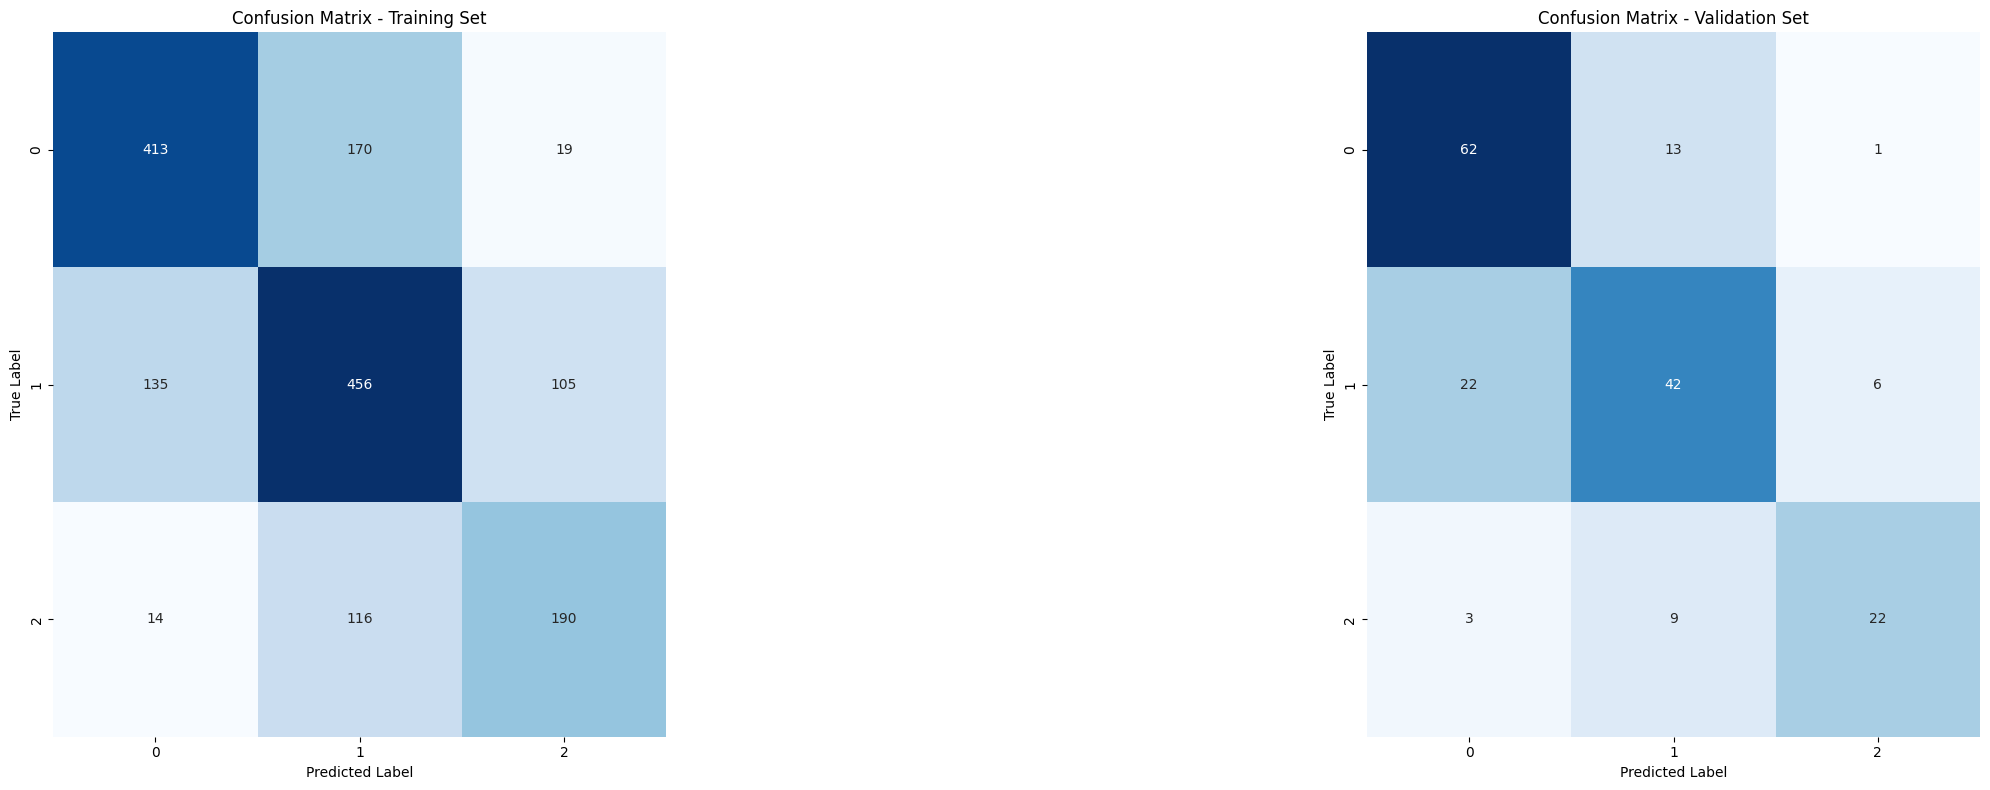

In [ ]:
cm_train = confusion_matrix(y_train, y_pred_train_logistic)
cm_val = confusion_matrix(y_val, y_pred_logistic)

classes = np.unique(y_train)

plt.figure(figsize=(20, 8))

# Confusion matrix for training set
plt.subplot(1, 3, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 2)
plt.gca().set_visible(False)

# Confusion matrix for validation set
plt.subplot(1, 3, 3)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout(w_pad=0.05)
plt.show()




In [ ]:
print("Classification Report : \n" ,classification_report(y_val, y_pred_logistic))

Classification Report : 
               precision    recall  f1-score   support

           0       0.71      0.82      0.76        76
           1       0.66      0.60      0.63        70
           2       0.76      0.65      0.70        34

    accuracy                           0.70       180
   macro avg       0.71      0.69      0.70       180
weighted avg       0.70      0.70      0.70       180



* Upon analyzing the confusion matrix and classification report of Logistic Regression, we observed that the model maintained a well-balanced set of metrics (precision, recall, and F1-score) for each class. This balance exhibited a good ratio between all metrics without favoring any particular class, while also keeping the number of misclassifications between all classes relatively low. These findings indicate a good performance of the model.

### **4.2) KNN**

To select the optimal K value for training the KNN model, Plotting the accuracy and F1-score against each K value,to identify the K value that maximizes both accuracy and F1-score, ensuring the selection of the best K value for the model.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_values = list(range(1, 21))

train_accuracies = []
val_accuracies = []
train_f1_scores = []
val_f1_scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)

    knn_model.fit(X_train, y_train)

    train_pred = knn_model.predict(X_train)
    val_pred = knn_model.predict(X_val)

    train_accuracy = accuracy_score(y_train, train_pred)
    val_accuracy = accuracy_score(y_val, val_pred)
    train_f1 = f1_score(y_train, train_pred, average='weighted')
    val_f1 = f1_score(y_val, val_pred, average='weighted')

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    train_f1_scores.append(train_f1)
    val_f1_scores.append(val_f1)

fig = make_subplots(rows=1, cols=2, subplot_titles=("Accuracy vs. K", "F1 Scores vs. K"))

fig.add_trace(go.Scatter(x=k_values, y=train_accuracies, mode='lines+markers', name='Train Accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=k_values, y=val_accuracies, mode='lines+markers', name='Validation Accuracy'), row=1, col=1)

fig.add_trace(go.Scatter(x=k_values, y=train_f1_scores, mode='lines+markers', name='Train F1 Score'), row=1, col=2)
fig.add_trace(go.Scatter(x=k_values, y=val_f1_scores, mode='lines+markers', name='Validation F1 Score'), row=1, col=2)

# Update layout for accuracy plot
fig.update_xaxes(title_text="K (Number of Neighbors)", row=1, col=1)
fig.update_yaxes(title_text="Accuracy", row=1, col=1)
# fig.update_layout(title_text="Accuracy vs. K")

# Update layout for F1 score plot
fig.update_xaxes(title_text="K (Number of Neighbors)", row=1, col=2)
fig.update_yaxes(title_text="F1 Score", row=1, col=2)

fig.show()


* Validation accuracy remains consistently the highest across K values ranging from 12 to 19, close to the training accuracy, suggesting no overfitting issues within this range. Among these values,**K = 16** emerges as the optimal choice, having the highest validation accuracy while remaining closely aligned with the training accuracy.


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=16)

knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [ ]:
train_pred_knn = knn_model.predict(X_train)
val_pred_knn = knn_model.predict(X_val)

In [ ]:
print("Evaluating Training Metrics :\n")

print(f"Training Accuracy of KNN : {accuracy_score(y_train,train_pred_knn)*100:.2f}")
print(f"Training F1 Score of KNN : {f1_score(y_train,train_pred_knn,average='weighted')*100:.2f}")

Evaluating Training Metrics :

Training Accuracy of KNN : 67.92
Training F1 Score of KNN : 67.67


In [ ]:
print("Evaluating Validation Metrics :\n")

print(f"Validation Accuracy of KNN : {accuracy_score(y_val,val_pred_knn)*100:.2f}")
print(f"Validation F1 Score of KNN : {f1_score(y_val,val_pred_knn,average='weighted')*100:.2f}")

models_eval.loc[len(models_eval)]=['KNN',(f1_score(y_val,val_pred_knn,average='weighted')*100),(accuracy_score(y_val,val_pred_knn)*100)]

Evaluating Validation Metrics :

Validation Accuracy of KNN : 64.44
Validation F1 Score of KNN : 63.14


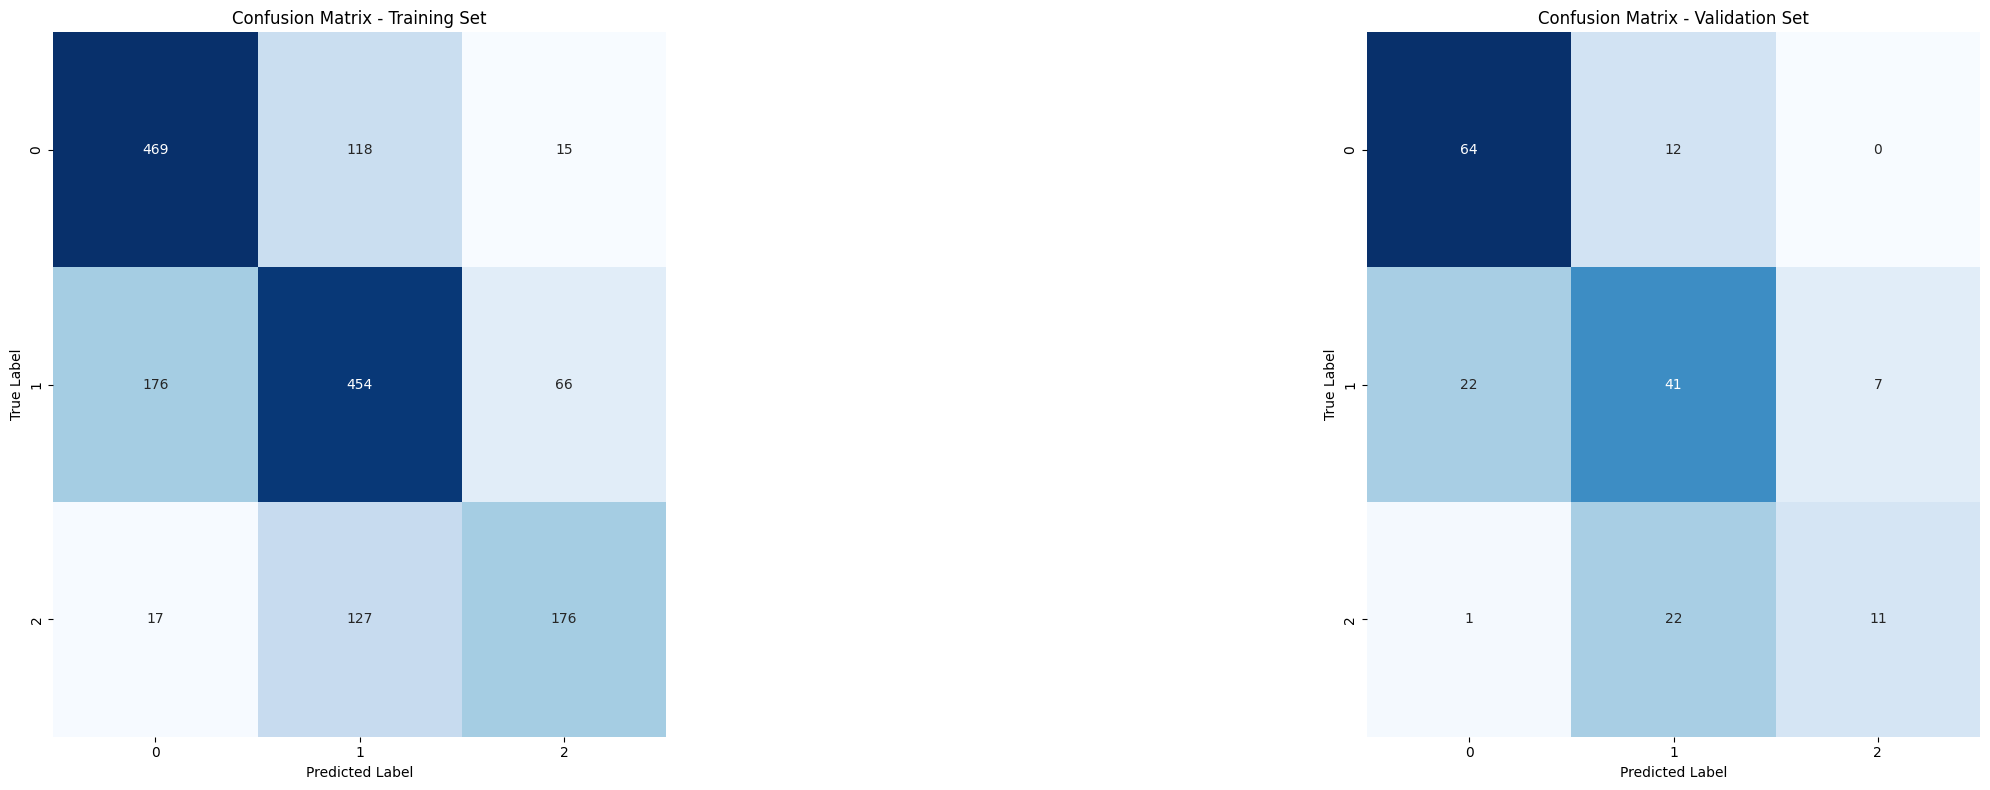

In [ ]:
cm_train = confusion_matrix(y_train, train_pred_knn)
cm_val = confusion_matrix(y_val, val_pred_knn)

classes = np.unique(y_train)

plt.figure(figsize=(20, 8))

# Confusion matrix for training set
plt.subplot(1, 3, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 2)
plt.gca().set_visible(False)

# Confusion matrix for validation set
plt.subplot(1, 3, 3)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout(w_pad=0.05)
plt.show()

In [ ]:
print("Classification Report for Validation : \n" ,classification_report(y_val, val_pred_knn))

Classification Report for Validation : 
               precision    recall  f1-score   support

           0       0.74      0.84      0.79        76
           1       0.55      0.59      0.57        70
           2       0.61      0.32      0.42        34

    accuracy                           0.64       180
   macro avg       0.63      0.58      0.59       180
weighted avg       0.64      0.64      0.63       180



* After analyzing the training and validation metrics of KNN, the model's performance is found to be unsatisfactory. High misclassifications were observed for the **"expensive"** class, and notable differences were noted between the metrics for each class. These indications suggest inferior performance compared to logistic regression.

### **4.3) Random Forest**

To select the optimal hyperparameter values and fine-tune them for the Random Forest model, we will experiment by plotting various values for the hyperparameters against accuracy.To identify the optimal values that can produce a high-performing model while reducing overfitting concerns.

Plotting the **min_samples_split** values along the accuracy.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

min_samples_split_list = [2, 10, 20, 30, 50, 70, 80, 100, 150, 200, 300]

train_scores = []
test_scores = []

for split in min_samples_split_list:
    clf = RandomForestClassifier(min_samples_split=split, random_state=42)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    train_scores.append(accuracy_score(y_train, y_train_pred))

    y_test_pred = clf.predict(X_val)
    test_scores.append(accuracy_score(y_val, y_test_pred))

fig = go.Figure()

# Add training accuracy trace
fig.add_trace(go.Scatter(x=min_samples_split_list,
                         y=train_scores,
                         mode='lines+markers',
                         name='Training',
                         hoverinfo='x+y',
                         hovertemplate='min_samples_split: %{x}<br>Accuracy: %{y}'))

# Add testing accuracy trace
fig.add_trace(go.Scatter(x=min_samples_split_list,
                         y=test_scores,
                         mode='lines+markers',
                         name='Validation',
                         hoverinfo='x+y',
                         hovertemplate='min_samples_split: %{x}<br>Accuracy: %{y}'))

fig.update_layout(title='Random Forest Train x Validation Accuracy for Min Samples Split',
                   xaxis_title='min_samples_split',
                   yaxis_title='Accuracy',
                   hovermode='closest')

fig.show()

* Upon observing this graph,  **min_samples_split** = 250-300 looks to have  acceptable Accuracy values for both the training and validation sets. Moreover, this choice helps to mitigate overfitting by minimizing the disparity between the two sets.

Plotting the **max_depth** values along the accuracy.

In [ ]:
max_depth_list = [1, 2, 3, 4, 8, 10, 13, 16, 20, 25, 32, 64, None]

train_scores = []
test_scores = []

for depth in max_depth_list:
    clf = RandomForestClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    train_scores.append(accuracy_score(y_train, y_train_pred))

    y_test_pred = clf.predict(X_val)
    test_scores.append(accuracy_score(y_val, y_test_pred))

fig = go.Figure()

# Add training accuracy trace
fig.add_trace(go.Scatter(x=max_depth_list,
                         y=train_scores,
                         mode='lines+markers',
                         name='Training',
                         hoverinfo='x+y',
                         hovertemplate='Max Depth: %{x}<br>Accuracy: %{y}'))

# Add testing accuracy trace
fig.add_trace(go.Scatter(x=max_depth_list,
                         y=test_scores,
                         mode='lines+markers',
                         name='Validation',
                         hoverinfo='x+y',
                         hovertemplate='Max Depth: %{x}<br>Accuracy: %{y}'))

fig.update_layout(title='Random Forest Train x Validation Accuracy for Max Depth',
                   xaxis_title='Max Depth',
                   yaxis_title='Accuracy',
                   hovermode='closest')

fig.show()


* Upon observing this graph as well,  **max_depth** = 4 - 5 looks to have  acceptable accuracy values for both the training and validation sets. Moreover, this choice helps to reduce overfitting by minimizing the difference between the two sets.

Plotting the **n_estimators** values along the accuracy.

In [ ]:
n_estimators_list = [10, 50, 100, 200, 300, 500, 700, 900, 1000]

train_scores = []
test_scores = []

for n_estimators in n_estimators_list:
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    train_scores.append(accuracy_score(y_train, y_train_pred))

    y_test_pred = clf.predict(X_val)
    test_scores.append(accuracy_score(y_val, y_test_pred))

fig = go.Figure()

# Add training accuracy trace
fig.add_trace(go.Scatter(x=n_estimators_list,
                         y=train_scores,
                         mode='lines+markers',
                         name='Training',
                         hoverinfo='x+y',
                         hovertemplate='n_estimators: %{x}<br>Accuracy: %{y}'))

# Add testing accuracy trace
fig.add_trace(go.Scatter(x=n_estimators_list,
                         y=test_scores,
                         mode='lines+markers',
                         name='Validation',
                         hoverinfo='x+y',
                         hovertemplate='n_estimators: %{x}<br>Accuracy: %{y}'))

fig.update_layout(title='Random Forest Train x Validation Accuracy for N estimators',
                   xaxis_title='n_estimators',
                   yaxis_title='Accuracy',
                   hovermode='closest')

fig.show()

* Upon observing this graph as well,  **n_estimators** = 700 looks to have highest validation accuracy.

Creating a Random Forest model with the chosen values for **(n_estimators,min_samples_split,max-depth)**, with assigning class weights, where the "**expensive**" class is given a higher weight, aims to address the misclassification issues observed with the KNN model for this class.To achieve reasonable metric values for all classes by adjusting the class weights accordingly.

In [ ]:
class_weights = {0: 1, 1: 1.2, 2:1.7}

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators = 700,
                                             min_samples_split = 200,
                                             max_depth = 4,
                                            class_weight=class_weights,
                                             random_state=42)

random_forest_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 2, 1: 2, 2: 3}, max_depth=4,
                       min_samples_split=200, n_estimators=700,
                       random_state=42)

In [ ]:
y_pred_rf_train = random_forest_model.predict(X_train)

y_pred_rf = random_forest_model.predict(X_val)

In [ ]:
print("Evaluating Training Metrics :\n")

print(f"Training Accuracy of Random Forest : {accuracy_score(y_train,y_pred_rf_train)*100:.2f}")
print(f"Training F1 Score of Random Forest : {f1_score(y_train,y_pred_rf_train,average='weighted')*100:.2f}")

Evaluating Training Metrics :

Training Accuracy of Random Forest : 66.07
Training F1 Score of Random Forest : 66.08


In [ ]:
print("Evaluating Validation Metrics :\n")

print(f"Validation Accuracy of Random Forest : {accuracy_score(y_val,y_pred_rf)*100:.2f}")
print(f"Validation F1 Score of Random Forest : {f1_score(y_val,y_pred_rf,average='weighted')*100:.2f}")

models_eval.loc[len(models_eval)]=['Random Forest',(f1_score(y_val,y_pred_rf,average='weighted')*100),(accuracy_score(y_val,y_pred_rf)*100)]

Evaluating Validation Metrics :

Validation Accuracy of Random Forest : 66.11
Validation F1 Score of Random Forest : 65.70


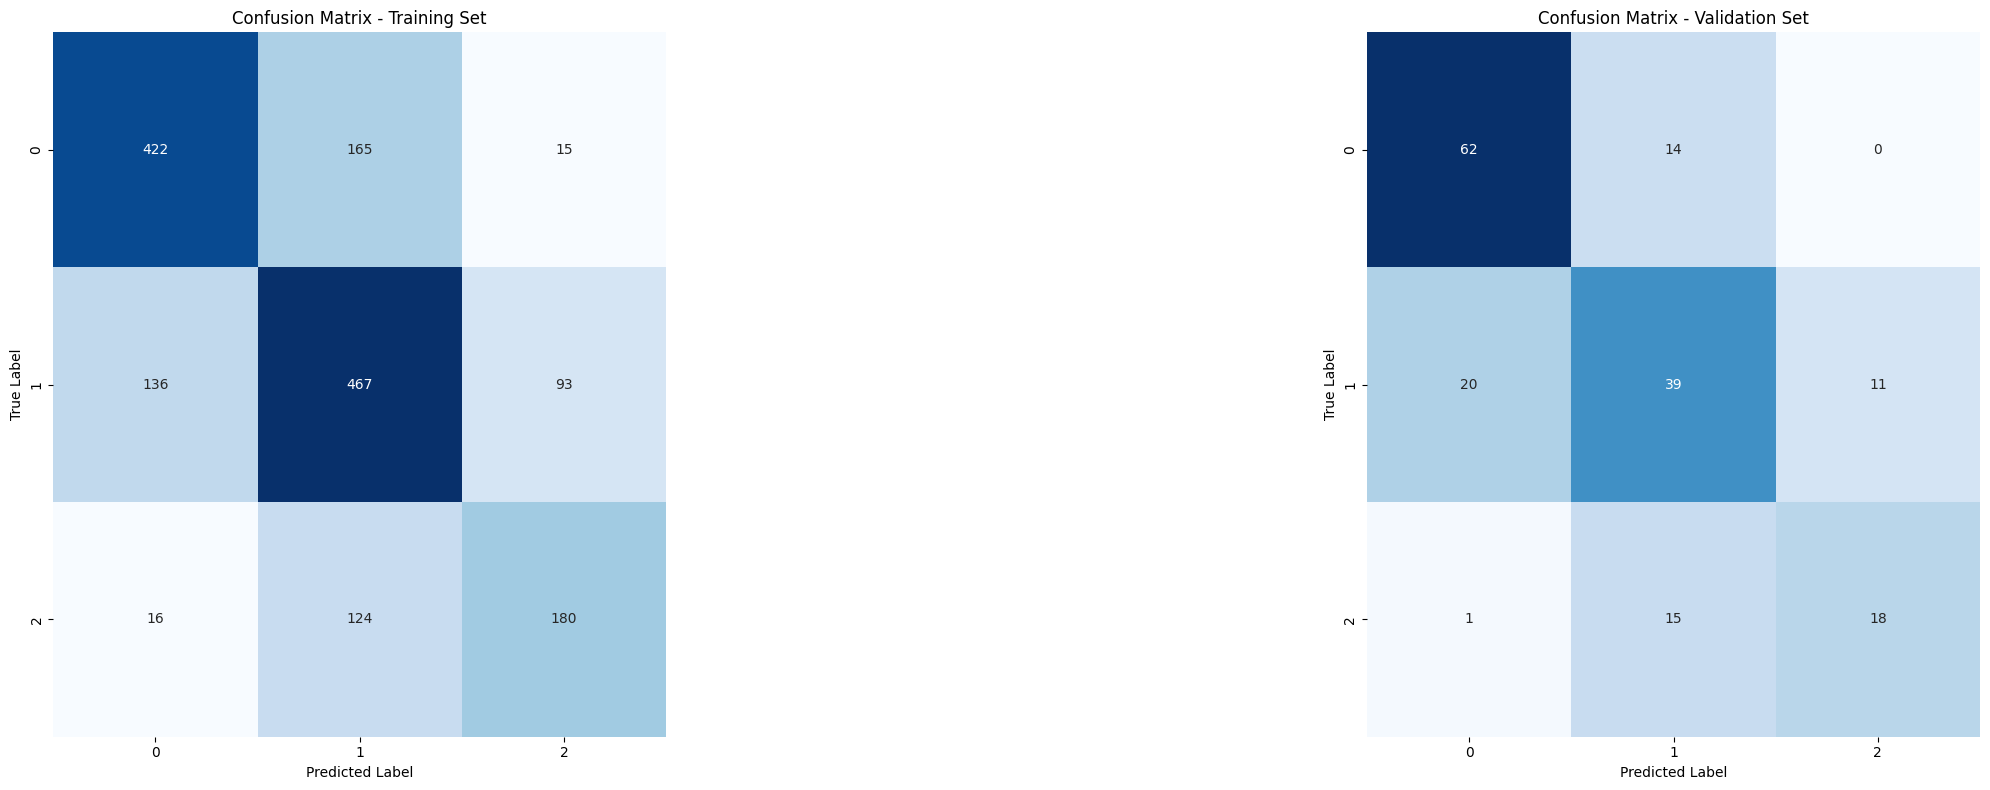

In [ ]:
cm_train = confusion_matrix(y_train, y_pred_rf_train)
cm_val = confusion_matrix(y_val, y_pred_rf)

classes = np.unique(y_train)

plt.figure(figsize=(20, 8))

# Confusion matrix for training set
plt.subplot(1, 3, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 2)
plt.gca().set_visible(False)

# Confusion matrix for validation set
plt.subplot(1, 3, 3)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout(w_pad=0.05)
plt.show()


In [ ]:
print("Classification Report for Validation : \n" ,classification_report(y_val, y_pred_rf))

Classification Report for Validation : 
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        76
           1       0.57      0.56      0.57        70
           2       0.62      0.53      0.57        34

    accuracy                           0.66       180
   macro avg       0.65      0.63      0.64       180
weighted avg       0.66      0.66      0.66       180



* By analyzing the Random forest model performance,compared to KNN it achieved better performance,more close classes metrics and having higher accuracy and higher f1 score. but still lower performance compared to logistic regression.

### **4.4) XGBoost**

In [ ]:
%%capture
!pip install scikit-optimize

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

Performing hyperparameter tuning for the XGBoost model using GriSearch  to identify the optimal combinations that yield the highest accuracy.

In [ ]:
xgb_param_grid = {
    'n_estimators': [100,300,500,700,1000],
    'max_depth': [4, 8, 12, 16, 20, 24],
    'learning_rate': [0.01, 0.1, 0.5, 0.9],
    'min_samples_split': [5, 10,50,150,200],
    'gamma': [0.1, 0.2,2]
}

xgb = XGBClassifier(random_state=42)
xgb_grid_search = GridSearchCV(estimator=xgb,
                               param_grid=xgb_param_grid,
                               cv=5, scoring='accuracy')

xgb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'gamma': [0.1, 0.2, 2],
                         'learning_rate': [0.01, 0.1, 0.5, 0.9],
                         'max_depth': [4, 8, 12, 16, 20, 24],
                         'min_samples_split': [5, 10, 50, 150, 200],
                         'n_estimators': [100, 300, 500, 700, 1000]},
             scoring='accuracy')

In [ ]:
best_params = xgb_grid_search.best_params_
best_score = xgb_grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)

Best Parameters: {'gamma': 2, 'learning_rate': 0.5, 'max_depth': 12, 'min_samples_split': 5, 'n_estimators': 100}
Best Score (Accuracy): 0.6625539884569812


In [ ]:
xgb_model = XGBClassifier(
    gamma=2,
    learning_rate=0.5,
    max_depth=12,
    n_estimators=100,
    min_samples_split=5
)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, min_samples_split=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_train_pred_xgb = xgb_model.predict(X_train)

y_pred_xgb = xgb_model.predict(X_val)

In [ ]:
print("Evaluating Training Metrics :\n")

print(f"Training Accuracy of XGBoost : {accuracy_score(y_train,y_train_pred_xgb)*100:.2f}")
print(f"Training F1 Score of XGBoost : {f1_score(y_train,y_train_pred_xgb,average='weighted')*100:.2f}")

Evaluating Training Metrics :

Training Accuracy of XGBoost : 69.72
Training F1 Score of XGBoost : 69.66


In [ ]:
print("Evaluating Validation Metrics :\n")

print(f"Validation Accuracy of XGBoost : {accuracy_score(y_val,y_pred_xgb)*100:.2f}")
print(f"Validation F1 Score of XGBoost : {f1_score(y_val,y_pred_xgb,average='weighted')*100:.2f}")

models_eval.loc[len(models_eval)]=['XGBoost',(f1_score(y_val,y_pred_xgb,average='weighted')*100),(accuracy_score(y_val,y_pred_xgb)*100)]

Evaluating Validation Metrics :

Validation Accuracy of XGBoost : 66.67
Validation F1 Score of XGBoost : 65.71


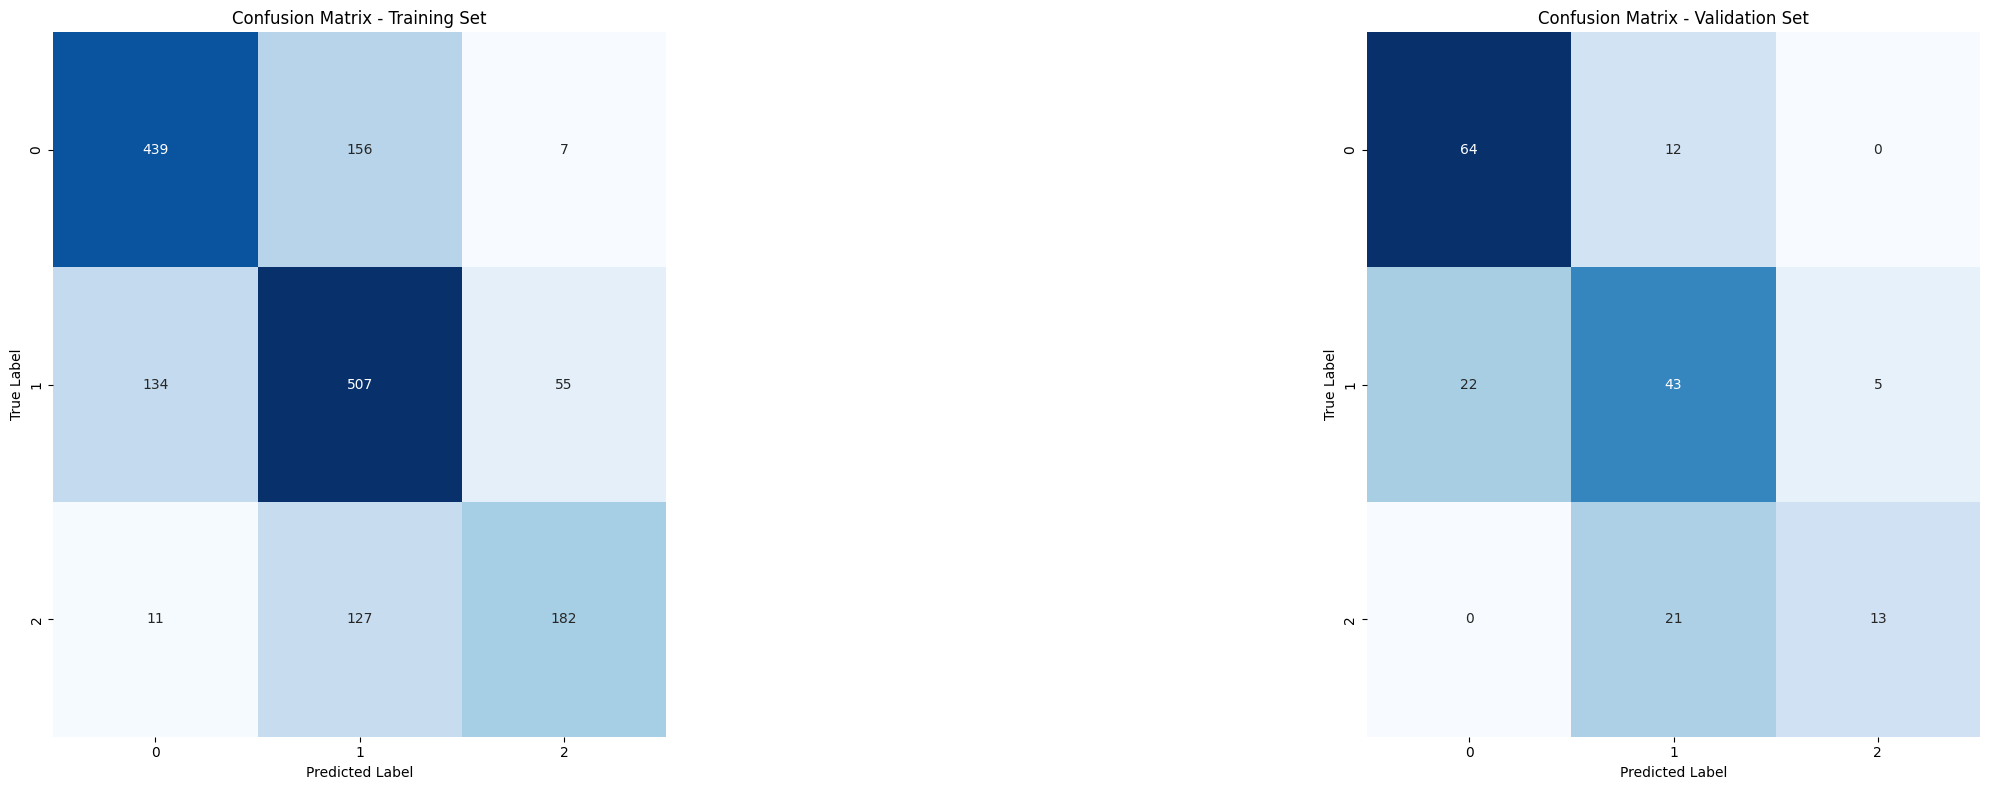

In [ ]:
cm_train = confusion_matrix(y_train, y_train_pred_xgb)
cm_val = confusion_matrix(y_val, y_pred_xgb)

classes = np.unique(y_train)

plt.figure(figsize=(20, 8))

# Confusion matrix for training set
plt.subplot(1, 3, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 2)
plt.gca().set_visible(False)

# Confusion matrix for validation set
plt.subplot(1, 3, 3)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout(w_pad=0.05)
plt.show()


In [ ]:
print("Classification Report for Validation : \n" ,classification_report(y_val, y_pred_xgb))

Classification Report for Validation : 
               precision    recall  f1-score   support

           0       0.74      0.84      0.79        76
           1       0.57      0.61      0.59        70
           2       0.72      0.38      0.50        34

    accuracy                           0.67       180
   macro avg       0.68      0.61      0.63       180
weighted avg       0.67      0.67      0.66       180



* XGBoost performance seems to not be very good,due to the problem of missclassifications of class 2,having a very low f1-score and low recall.

### **4.5) Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight
# from skopt import BayesSearchCV

Tuning the hyperparameters of the Gradient Boosting model using Bayesian optimization (**BayesSearch**) to select the optimal hyperparameter values that maximize the model's accuracy.

In [ ]:
%%time
param_grid = {
    'n_estimators': (200, 600),
    'learning_rate': (0.01, 0.1),
    'max_depth': (4, 15),
    'min_samples_split': (5, 25)
}

gb_classifier = GradientBoostingClassifier(random_state = 42)
gb_bayes_search = BayesSearchCV(
    gb_classifier,
    search_spaces=param_grid,
    n_iter=120,
    cv=5,
    scoring='accuracy',
    verbose=0
)

gb_bayes_search.fit(X_train, y_train)

CPU times: user 19min 47s, sys: 46.2 s, total: 20min 33s
Wall time: 20min 8s


BayesSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
              scoring='accuracy',
              search_spaces={'learning_rate': (0.01, 0.1), 'max_depth': (4, 15),
                             'min_samples_split': (5, 25),
                             'n_estimators': (200, 600)})

In [ ]:
best_params = gb_bayes_search.best_params_
best_score = gb_bayes_search.best_score_

print("Best Parameters:", best_params)
print("Best Score :", best_score)

Best Parameters: OrderedDict([('learning_rate', 0.01), ('max_depth', 4), ('min_samples_split', 5), ('n_estimators', 200)])
Best Score : 0.6489641860642892


In [ ]:
class_weights = {0: 2, 1: 2.4, 2: 5.5}
sample_weights = compute_sample_weight(class_weight=class_weights, y=y_train)

In [ ]:
# gb_model = gb_bayes_search.best_estimator_
gb_model = GradientBoostingClassifier(learning_rate=0.01,max_depth=4,
                                      min_samples_split=5,
                                      n_estimators=200,
                                      random_state = 42)
gb_model.fit(X_train,y_train,sample_weight=sample_weights)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, min_samples_split=5,
                           n_estimators=200, random_state=42)

In [ ]:
y_train_pred_gb = gb_model.predict(X_train)
y_pred_gb = gb_model.predict(X_val)

In [ ]:
print("Evaluating Training Metrics :\n")

print(f"Training Accuracy of Gradient Boosting : {accuracy_score(y_train,y_train_pred_gb)*100:.2f}")
print(f"Training F1 Score of Gradient Boosting : {f1_score(y_train,y_train_pred_gb,average='weighted')*100:.2f}")

Evaluating Training Metrics :

Training Accuracy of Gradient Boosting : 68.60
Training F1 Score of Gradient Boosting : 68.66


In [ ]:
print("Evaluating Validation Metrics :\n")

print(f"Validation Accuracy of Gradient Boosting : {accuracy_score(y_val,y_pred_gb)*100:.2f}")
print(f"Validation F1 Score of Gradient Boosting : {f1_score(y_val,y_pred_gb,average='weighted')*100:.2f}")

models_eval.loc[len(models_eval)]=['Gradient Boosting',(f1_score(y_val,y_pred_gb,average='weighted')*100),(accuracy_score(y_val,y_pred_gb)*100)]

Evaluating Validation Metrics :

Validation Accuracy of Gradient Boosting : 66.11
Validation F1 Score of Gradient Boosting : 65.80


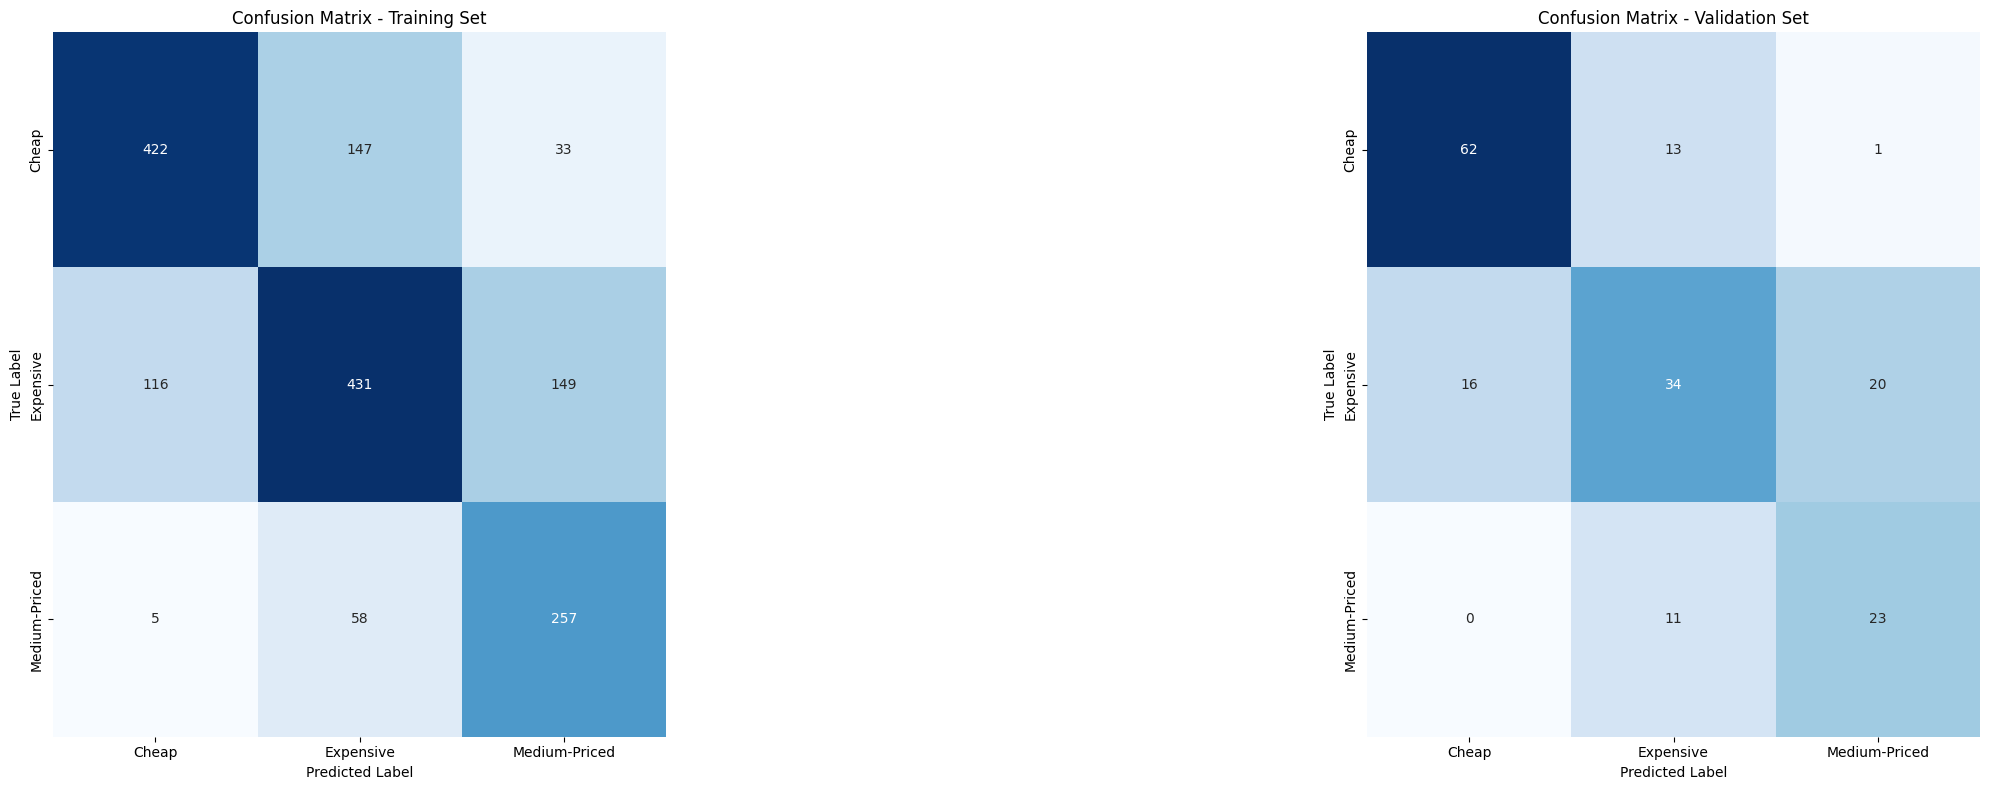

In [ ]:
cm_train = confusion_matrix(y_train, y_train_pred_gb)
cm_val = confusion_matrix(y_val, y_pred_gb)

classes = np.unique(data['Fee Category'])

plt.figure(figsize=(20, 8))

# Confusion matrix for training set
plt.subplot(1, 3, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 2)
plt.gca().set_visible(False)

# Confusion matrix for validation set
plt.subplot(1, 3, 3)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout(w_pad=0.05)
plt.show()


In [ ]:
print("Classification Report for Validation : \n" ,classification_report(y_val, y_pred_gb))

Classification Report for Validation : 
               precision    recall  f1-score   support

           0       0.79      0.82      0.81        76
           1       0.59      0.49      0.53        70
           2       0.52      0.68      0.59        34

    accuracy                           0.66       180
   macro avg       0.63      0.66      0.64       180
weighted avg       0.66      0.66      0.66       180



### **4.6) SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
param_dist = {
    'C': [0.1, 0.5,0.9 ,1.0,2.5,3,5,25],
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'degree': [1, 3, 5,7],
    'class_weight': [{0: 1, 1: 2,2:3}, {0: 3, 1: 3.5,2:5}, {0: 2.5, 1: 3,2:4.5}, {0: 3, 1: 4,2:5.5}, {0: 2.8, 1: 3.4,2:5.6}]
}
svc = SVC(random_state = 42)
grid_search = GridSearchCV(estimator=svc,
                           param_grid=param_dist,
                           cv=5, scoring='accuracy',
                           verbose=3)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)


Fitting 5 folds for each of 640 candidates, totalling 3200 fits
[CV 1/5] END C=0.1, class_weight={0: 1, 1: 2, 2: 3}, degree=1, kernel=linear;, score=0.620 total time=   0.1s
[CV 2/5] END C=0.1, class_weight={0: 1, 1: 2, 2: 3}, degree=1, kernel=linear;, score=0.602 total time=   0.1s
[CV 3/5] END C=0.1, class_weight={0: 1, 1: 2, 2: 3}, degree=1, kernel=linear;, score=0.617 total time=   0.1s
[CV 4/5] END C=0.1, class_weight={0: 1, 1: 2, 2: 3}, degree=1, kernel=linear;, score=0.619 total time=   0.1s
[CV 5/5] END C=0.1, class_weight={0: 1, 1: 2, 2: 3}, degree=1, kernel=linear;, score=0.625 total time=   0.1s
[CV 1/5] END C=0.1, class_weight={0: 1, 1: 2, 2: 3}, degree=1, kernel=rbf;, score=0.654 total time=   0.1s
[CV 2/5] END C=0.1, class_weight={0: 1, 1: 2, 2: 3}, degree=1, kernel=rbf;, score=0.623 total time=   0.1s
[CV 3/5] END C=0.1, class_weight={0: 1, 1: 2, 2: 3}, degree=1, kernel=rbf;, score=0.636 total time=   0.1s
[CV 4/5] END C=0.1, class_weight={0: 1, 1: 2, 2: 3}, degree=1, ke

In [ ]:
# svm_model = grid_search.best_estimator_
svm_model = SVC(C=50,class_weight ={0: 3, 1: 3.3, 2: 5.8},
                kernel='rbf',
                random_state = 42)
svm_model.fit(X_train,y_train)

SVC(C=50, class_weight={0: 3, 1: 3.3, 2: 5.8}, random_state=42)

In [ ]:
y_train_pred_svm = svm_model.predict(X_train)

y_pred_svm = svm_model.predict(X_val)

In [ ]:
print("Evaluating Training Metrics :\n")

print(f"Training Accuracy of SVM : {accuracy_score(y_train,y_train_pred_svm)*100:.2f}")
print(f"Training F1 Score of SVM : {f1_score(y_train,y_train_pred_svm,average='weighted')*100:.2f}")

Evaluating Training Metrics :

Training Accuracy of SVM : 67.61
Training F1 Score of SVM : 67.67


In [ ]:
print("Evaluating Validation Metrics :\n")

print(f"Validation Accuracy of SVM : {accuracy_score(y_val,y_pred_svm)*100:.2f}")
print(f"Validation F1 Score of SVM : {f1_score(y_val,y_pred_svm,average='weighted')*100:.2f}")

models_eval.loc[len(models_eval)]=['SVM',(f1_score(y_val,y_pred_svm,average='weighted')*100),(accuracy_score(y_val,y_pred_svm)*100)]

Evaluating Validation Metrics :

Validation Accuracy of SVM : 68.89
Validation F1 Score of SVM : 68.33


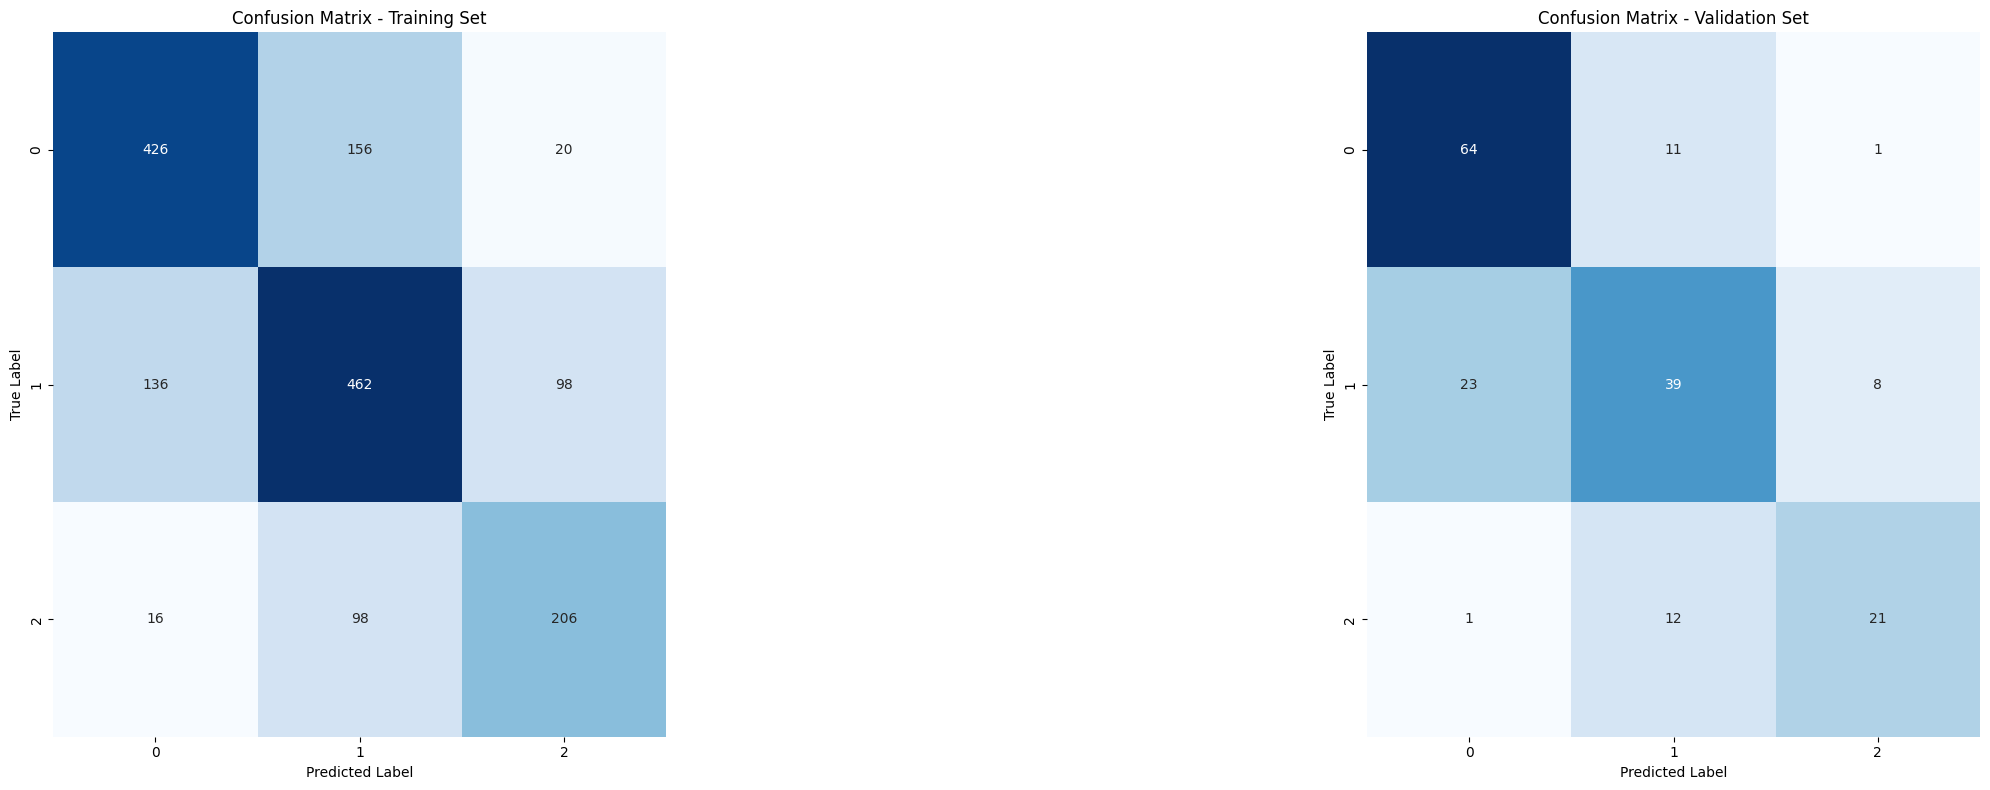

In [ ]:
cm_train = confusion_matrix(y_train, y_train_pred_svm)
cm_val = confusion_matrix(y_val, y_pred_svm)

classes = np.unique(y_train)

plt.figure(figsize=(20, 8))

# Confusion matrix for training set
plt.subplot(1, 3, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 2)
plt.gca().set_visible(False)

# Confusion matrix for validation set
plt.subplot(1, 3, 3)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout(w_pad=0.05)
plt.show()


In [ ]:
print("Classification Report for Validation : \n" ,classification_report(y_val, y_pred_svm))

Classification Report for Validation : 
               precision    recall  f1-score   support

           0       0.73      0.84      0.78        76
           1       0.63      0.56      0.59        70
           2       0.70      0.62      0.66        34

    accuracy                           0.69       180
   macro avg       0.69      0.67      0.68       180
weighted avg       0.68      0.69      0.68       180



### **4.7) Ensemble Learning**

To improve models accuracy,we will experiment by trying two different ensemble learning techniques (Voting,Stacking) in order to improve individual models predictions by combining them and focusing on their weaknesses.

#### **4.7.1 Voting**

Creating a voting classifier,between **[Logistic Regression,Random Forest,SVM]** to enhance their overall predictions by choosingoccurring predicition between them the representative final predcition for the combined model.

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting_clf = VotingClassifier(estimators=[('Logistic Regression', logistic_regression),
                                ('Random Forest', random_forest_model),
                                 ('SVM', svm_model),
                                          ]
                                  , voting='hard')

In [ ]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(class_weight={0: 2, 1: 2,
                                                               2: 3})),
                             ('Random Forest',
                              RandomForestClassifier(class_weight={0: 2, 1: 2,
                                                                   2: 3},
                                                     max_depth=4,
                                                     min_samples_split=200,
                                                     n_estimators=700,
                                                     random_state=42)),
                             ('SVM',
                              SVC(C=50, class_weight={0: 3, 1: 3.3, 2: 5.8},
                                  random_state=42))])

In [ ]:
y_pred_voting = voting_clf.predict(X_val)

In [ ]:
print("Evaluating Validation Metrics :\n")

print(f"Validation Accuracy of Voting Classifier : {accuracy_score(y_val,y_pred_voting)*100:.2f}")
print(f"Validation F1 Score of Voting Classifier : {f1_score(y_val,y_pred_voting,average='weighted')*100:.2f}")

models_eval.loc[len(models_eval)]=['Voting Classifier',(f1_score(y_val,y_pred_voting,average='weighted')*100),(accuracy_score(y_val,y_pred_voting)*100)]

Evaluating Validation Metrics :

Validation Accuracy of Voting Classifier : 68.89
Validation F1 Score of Voting Classifier : 68.45


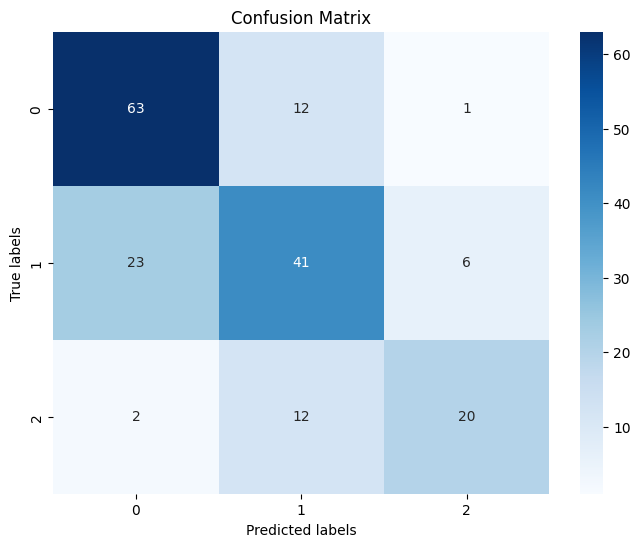

In [ ]:
cm = confusion_matrix(y_val, y_pred_voting)

classes = np.unique(y_train)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#### **4.7.2 Stacking**

Creating a stacking classifier with base models as **[XGBoost,Random Forest,Logistic Regression]** to improve their overall performance and choosing svm as the final estimator.

In [ ]:
estimators = [
     ('Gradient Boosting', gb_model),
      ('XGBoost', xgb_model),
     ('KNN',knn_model),
     ('Random Forest',random_forest_model),
     ('Logistic',logistic_regression)]

In [ ]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
                 estimators=estimators,
                 final_estimator=svm_model)

In [ ]:
clf.fit(X_train,y_train)

StackingClassifier(estimators=[('Gradient Boosting',
                                GradientBoostingClassifier(learning_rate=0.01,
                                                           max_depth=4,
                                                           min_samples_split=5,
                                                           n_estimators=200,
                                                           random_state=42)),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_cate...
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('KNN', KNeighborsClassifier(n_neighbors=16)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight={0: 2, 1: 2,
                                                                     2: 3},
                                                       max_depth=4,
                                                       min_samples_split=200,
                                                       n_estimators=700,
                                                       random_state=42)),
                               ('Logistic',
                                LogisticRegression(class_weight={0: 2, 1: 2,
                                                                 2: 3}))],
                   final_estimator=SVC(C=50,
                                       class_weight={0: 3, 1: 3.3, 2: 5.8},
                                       random_state=42))

In [ ]:
clf.score(X_val,y_val)

0.6888888888888889

In [ ]:
stacking_preds = clf.predict(X_val)

In [ ]:
print("Evaluating Validation Metrics :\n")

print(f"Validation Accuracy of Stacking Classifier: {accuracy_score(y_val,stacking_preds)*100:.2f}")
print(f"Validation F1 Score of Stacking Classifier: {f1_score(y_val,stacking_preds,average='weighted')*100:.2f}")

models_eval.loc[len(models_eval)]=['Stacking Classifier',(f1_score(y_val,stacking_preds,average='weighted')*100),(accuracy_score(y_val,stacking_preds)*100)]

Evaluating Validation Metrics :

Validation Accuracy of Stacking Classifier: 68.89
Validation F1 Score of Stacking Classifier: 68.26


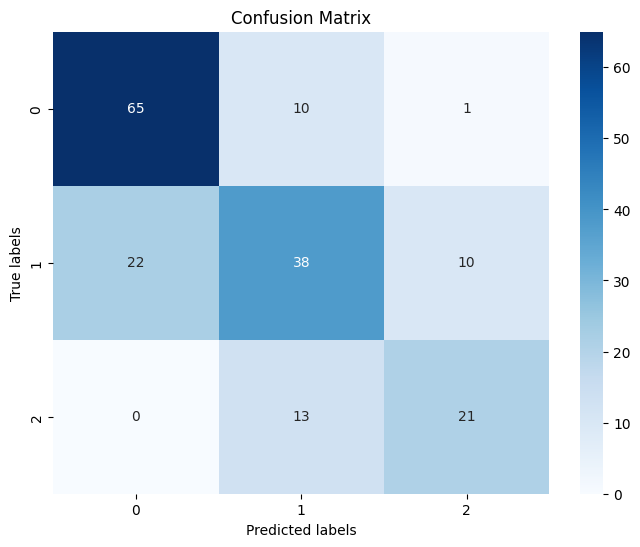

In [ ]:
cm = confusion_matrix(y_val, stacking_preds)

classes = np.unique(y_train)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# **[5] Conclusion**


Reviewing the **`models_eval`** dataframe post models tuning and training to assess the performance of each model and determine the best model based on its metrics for selection as our final model

In [ ]:
models_eval

Model   F1 score   Accuracy
0  Logistic Regression  69.690322  70.000000
1                  KNN  63.139891  64.444444
2        Random Forest  65.702349  66.111111
3              XGBoost  65.712366  66.666667
4    Gradient Boosting  65.796437  66.111111
5                  SVM  68.329561  68.888889
6    Voting Classifier  68.446580  68.888889
8  Stacking Classifier  68.255860  68.888889

In [ ]:
models_eval.drop([7], inplace=True)

Creating a plot to visualize the models along with their metrics scores, facilitating the identification of the best model by highlighting the one with the highest **Accuracy** and
**f1 score**

In [ ]:
model_names = models_eval['Model']
accuracy_scores = models_eval['Accuracy']/100
f1_scores = models_eval['F1 score']/100

max_accuracy_index = accuracy_scores.idxmax()
max_f1_score_index = f1_scores.idxmax()

fig = go.Figure(data=[
    go.Bar(name='Accuracy Score', x=model_names, y=accuracy_scores, marker_color=['lightskyblue' if i != max_accuracy_index else 'orange' for i in range(len(model_names))],width=0.35),
    go.Bar(name='F1-Score', x=model_names, y=f1_scores, marker_color=['lightskyblue' if i != max_f1_score_index else 'orange' for i in range(len(model_names))],width=0.35)
])

fig.update_layout(barmode='group', title='Model Evaluation Metrics', xaxis_title='Model', yaxis_title='Score')
fig.show()

Evaluating the training and testing times of each model.

In [ ]:
models = {
    'Logistic Regression': logistic_regression,
    'KNN': knn_model,
    'SVM': svm_model,
    'Random Forest': random_forest_model,
    'XGBoost' :xgb_model,
    'Gradient Boosting':gb_model,
    'voting':voting_clf,
    'Stacking':clf
}

In [ ]:
training_times = []
testing_times = []

for model_name, model in models.items():
    # calculate each model's training time
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    # calculate each model's testing time
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()
    testing_time = end_time - start_time

    training_times.append((model_name, training_time))
    testing_times.append((model_name, testing_time))

training_df = pd.DataFrame(training_times, columns=['Model', 'Training Time'])
testing_df = pd.DataFrame(testing_times, columns=['Model', 'Testing Time'])

Plot the moodels tarining times

In [ ]:
training_df_sorted = training_df.sort_values(by='Training Time', ascending=False)
max_training_time_model_index = training_df_sorted['Training Time'].idxmax()

training_bar = go.Bar(x=training_df_sorted['Model'],
                      y=training_df_sorted['Training Time'],
                      name='Training Time',
                      marker_color=['lightskyblue' if model_idx != max_training_time_model_index else 'orange' for model_idx in training_df_sorted.index],
                      width=0.5)  # Adjust the width of the bars here (0.5 for example)
training_layout = go.Layout(title='Training Time for Each Model',
                            xaxis=dict(title='Model'),
                            yaxis=dict(title='Time (seconds)'))

training_fig = go.Figure(data=[training_bar], layout=training_layout)
training_fig.show()

* Stacking classifier has the highest training time compared to all models.

Plot the moodels testing times

In [ ]:
testing_df_sorted = testing_df.sort_values(by='Testing Time', ascending=False)
max_testing_time_model_index = testing_df_sorted['Testing Time'].idxmax()

testing_bar = go.Bar(x=testing_df_sorted['Model'],
                     y=testing_df_sorted['Testing Time'],
                     name='Testing Time',
                     marker_color=['lightskyblue' if model_idx != max_testing_time_model_index else 'orange' for model_idx in testing_df_sorted.index],
                     width=0.5)
testing_layout = go.Layout(title='Testing Time for Each Model',
                           xaxis=dict(title='Model'),
                           yaxis=dict(title='Time (seconds)'))

testing_fig = go.Figure(data=[testing_bar], layout=testing_layout)
testing_fig.show()

* Stacking classifier has the highest testing time compared to all models.

Merging the train and validation datasets into a single training set for training the model.


In [ ]:
X_train_final = np.concatenate((X_train, X_val), axis=0)

y_train_final = np.concatenate((y_train, y_val), axis=0)

Plotting the Learning Curve to verify the final selected model's Generalization Performance


In [ ]:
from sklearn.model_selection import learning_curve

train_sizes_abs, train_scores, val_scores = learning_curve(logistic_regression, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_sizes_abs, y=train_scores_mean, mode='lines+markers', name='Training Accuracy', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=train_sizes_abs, y=val_scores_mean, mode='lines+markers', name='Validation Accuracy', line=dict(color='red')))

fig.update_layout(title="Learning Curve For Logistic Regression", xaxis_title="Training Examples", yaxis_title="Accuracy")
fig.show()

* The learning curve indicates no signs of overfitting,as the gap between the training and validation curves decreases as more training examples are provided. However, the overall model appears to suffer from underfitting, as there is no significant improvement observed with additional training examples. This suggests that the data itself may not be very informative, and the model may struggle to identify better patterns and this the best performance it can achieve. It is likely that different features are needed to improve model performance, along with the possibility of requiring additional training examples to enhance the model's learning capability.

Train the **`logistic regression`** model on the combined training set and use it to predict the test set.

In [ ]:
logistic_regression.fit(X_train_final,y_train_final)

LogisticRegression(class_weight={0: 2, 1: 2, 2: 3})

In [ ]:
predictions = logistic_regression.predict(X_test)

In [ ]:
print("Evaluating Test Metrics :\n")

print(f"Test Accuracy  : {accuracy_score(y_test,predictions)*100:.2f}")
print(f"Test F1 Score : {f1_score(y_test,predictions,average='weighted')*100:.2f}")

Evaluating Test Metrics :

Test Accuracy  : 57.33
Test F1 Score : 57.43


Save the final model

In [ ]:
joblib.dump(logistic_regression,'Logistic Regression model MS2-FinalModel.joblib')

['Logistic Regression model MS2-FinalModel.joblib']



> <font size="+2" color="black"> **Final Notes**</font>

 ➢	The dataset is small and contains a significant number of errors, which we try to fix it through our intensive analysis and preprocessing.

➢	  The dataset lacks substantial information, making it challenging for models to identify significant patterns. Alternative features may be required to improve model performance.

➢	  With extensive tuning for all models, none of the classification models were able to attain a validation accuracy exceeding 70%, with no noticeable reduction in misclassifications.

➢ After experimenting with multiple models, **`Logistic Regression** emerges as the optimal choice .
  

## **Credits :**

> <font size='4'>**Team Members :**</font>

- [Mohamed Samy](https://www.linkedin.com/in/mohamed-samy10/)
- [Yomna Mohammed](https://www.linkedin.com/in/yomna-muhammed-b964a6270)
- [Nadine Haitham](http://www.linkedin.com/in/nadine-elkady-4b45792b1)
- [Ammar Mohamed](https://www.linkedin.com/in/ammar-hassan-5a16551a1/)
- [Mohamed Ashraf Mahran](https://www.linkedin.com/in/mohamed-mahran-002b9b24b/)
- [Youssef Tamer](https://www.linkedin.com/in/youssef-eldeeb-1a4269253)



